In [1]:
# Import your newly installed selenium package
from selenium import webdriver
import requests
from bs4 import BeautifulSoup as soup
from selenium.webdriver.chrome.options import Options
from time import sleep
from random import randint
import datetime
import re
import numpy as np
import pandas as pd
import openpyxl
import alluvial
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from ipysankeywidget import SankeyWidget
import plotly.plotly as py
import json
import urllib3
from lxml import etree

In [2]:
url = "http://www.ufc.ca/fighter/khabib-Nurmagomedov"

In [3]:
chrome_options = Options()
# chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")

In [4]:
# driver = webdriver.Chrome(chrome_options=chrome_options, executable_path="/media/dodz/Data/Linux/Development/drivers/chromedriver")
driver = webdriver.Chrome(options=chrome_options)
# A new Chrome (or other browser) window should open up

# Now just tell it wherever you want it to go
driver.get(url)


In [5]:
# Save a screenshot; check and see what was going on or capture something specific
driver.save_screenshot('khabib-Nurmagomedov.png')

True

Resulted Image: 
![alt text](./khabib-Nurmagomedov.png)


In [6]:
def get_fighter_details(page_soup, name):
    try:
        summary = page_soup.find("td", {"id":"fighter-skill-summary", "class":"value"}).get_text()
    except:
        summary = ""
    
    try:
        ffrom = ((((page_soup.find("div", {"id":"fighter-info", "class":"fighter-info"}).find_all("tr"))[1]).find_all("td"))[1]).get_text()
        ffrom = re.sub('[\n\t]','',ffrom)
    except:
        ffrom = ""
    try:
        age = (page_soup.find("td", {"id":"fighter-age"})).get_text()
    except:
        age = ""

    try:
        reach = (page_soup.find("td", {"id":"fighter-reach"})).get_text()
    except:
        reach = ""

    try:
        leg = (page_soup.find("td", {"id":"fighter-leg-reach"})).get_text()
    except:
        leg = ""
    # takedown-defense-percentage striking-defense-pecentage
    
    info = page_soup.find_all("div", {"class":"overall-stats"})
    if(len(info) > 0):
        try:
            total_strikes = page_soup.find_all("div", {"class":"overall-stats"})[0].find("div", {"class":"max-number"}).get_text()
        except:
            total_strikes = ""
        try:
            success_strikes = re.sub('[\n\t]','',page_soup.find_all("div", {"class":"overall-stats"})[0].find("div", {"id":"total-takedowns-number"}).get_text())
        except:
            success_strikes = ""
        try:
            standing_portion_percent = re.sub('[\n\t%Standing]','',page_soup.find_all("div", {"class":"overall-stats"})[0].find("div",{"id":"standing-portion-percent"}).get_text())
        except:
            standing_portion_percent = ""
        try:
            clinch_portion_percent = re.sub('[\n\t%]','',page_soup.find_all("div", {"class":"overall-stats"})[0].find("div",{"id":"clinch-portion-percent"}).get_text())
        except:
            clinch_portion_percent = ""
        try:
            ground_portion_percent = re.sub('[\n\t%]','',page_soup.find_all("div", {"class":"overall-stats"})[0].find("div",{"id":"ground-portion-percent"}).get_text())
        except:
            ground_portion_percent = ""
        try:
            striking_defense_pecentage = re.sub('[\n\t%]','',page_soup.find_all("div", {"class":"overall-stats"})[0].find("div",{"id":"striking-defense-pecentage"}).get_text())
        except:
            striking_defense_pecentage = ""

        total_takedowns = page_soup.find_all("div", {"class":"overall-stats"})[1].find("div", {"class":"max-number"}).get_text()
        success_takedowns = re.sub('[\n\t]','',page_soup.find_all("div", {"class":"overall-stats"})[1].find("div", {"id":"total-takedowns-number"}).get_text())
        td_defense_pecentage = re.sub('[\n\t%]','',page_soup.find_all("div", {"class":"overall-stats"})[1].find("div",{"id":"takedown-defense-percentage"}).get_text())
        grappling_totals_by_type_graph = (page_soup.find("div", {"id":"grappling-totals-by-type-graph"}))
        successful_submissions = (page_soup.find("div", {"id":"successful-submissions"})).get_text()
        successful_passes = (page_soup.find("div", {"id":"successful-passes"})).get_text()
        successful_sweeps = (page_soup.find("div", {"id":"successful-sweeps"})).get_text()

    else:
        total_strikes = success_strikes = standing_portion_percent = clinch_portion_percent = ground_portion_percent = striking_defense_pecentage = total_takedowns = success_takedowns = td_defense_pecentage = successful_submissions = successful_passes = successful_sweeps = ""
    record = [name, summary,
              ffrom.strip(), 
              age.strip(), 
              reach.strip(), 
              leg.strip(),  
              total_strikes, 
              success_strikes.strip(), 
              striking_defense_pecentage.strip(), 
              standing_portion_percent, 
              clinch_portion_percent, 
              ground_portion_percent, 
              total_takedowns, 
              success_takedowns, 
              td_defense_pecentage.strip(), 
              successful_submissions, 
              successful_passes, 
              successful_sweeps]
    print(record)
    return record

In [ ]:
result_element = (fight.find('td',{"class":"result"})).find('div')
result_element.attrs['class'][0]

In [116]:
result_element = (fight.find('td',{"class":"result"})).find('div')

if(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-lose'):
    result = 'Loss'
elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-win'):
    result = 'Win'
elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'title-fight'):
    result = 'Title'
else:
    result = result_element.get_text()

result

'Loss'

In [8]:
def get_history(fighter_history):
    records = []
    event_regex = r'(?P<event>title=\"(?P<name>[^\"]*)\".*\s*).*href=\"(?P<url>.*)\">(?P<remarks>[^<]*)[\s\S]*(?P<date>(?P<month>Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s(?P<day>\d{1,2}),\s*(?P<year>\d{4}))'
    round_regex = r'(?P<round>R\d)\s*(?P<method>.*)\s+'
    eurl_regex = r'href="(?P<event_url>.*)"'

    for fight in fighter_history:
        try:
            result_element = (fight.find('td',{"class":"result"})).find('div')
            if(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-lose'):
                result = 'Loss'
            elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-win'):
                result = 'Win'
            elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'title-fight'):
                result = 'Title'
            else:
                result = result_element.get_text()                
        except:
            result = ""
        try:
            method = (fight.find('td', {"class":"method"})).get_text()
            method = re.sub('[\n\t]',' ',method)

            end_round = re.search(round_regex, method).group('round')
            finish_method = re.search( round_regex, method).group('method')
            method = [end_round, finish_method.strip()]            
        except:
            method = []
        try:
            score = (fight.find_all('div', {"class":"numeric"}))
            fighter1_str = score[0].get_text()
            fighter2_str = score[1].get_text()
            fighter1_td = score[2].get_text()
            fighter2_td = score[3].get_text()
            fighter1_sub = score[4].get_text()
            fighter2_sub = score[5].get_text()
            fighter1_pass = score[6].get_text()
            fighter2_pass = score[7].get_text()
            scores = [fighter1_str, fighter2_str, fighter1_td, fighter2_td, fighter1_sub, fighter2_sub, fighter1_pass, fighter2_pass]
        except:
            scores = []
        try:
            fighters = (fight.find('td', {"class":"fighter"})).find_all('div')
            fighter1 = fighters[0].get_text().strip()
            fighter2 = fighters[1].get_text().strip()
        except:
            fighter1 = fighter2 = ""
        try:
            event = (fight.find('td', {"class":"event"}))
            event_text = event.get_text()
            event_text = re.sub('[\n\t]','',event.get_text())
            match = re.search( event_regex, str(event),flags=re.S)
            event_name = match.group('name')
            event_date = match.group('date')
            remarks = match.group('remarks')
            event_url = match.group('url')
        except:
            if not 'event' in locals():
                event = ""
            if not 'event_url' in locals():
                event_url = ""
            if not 'event_name' in locals():
                event_name = ""
            if not 'event_date' in locals():
                event_date = ""
            if not 'remarks' in locals():
                remarks = ""

        record = [fighter1.strip(), fighter2.strip(), event_name.strip(), event_date.strip(), event_url, remarks.strip(), result.strip()] + method + scores
        records.append(record)
        print(record)

    return records

In [9]:
# driver.find_element_by_xpath('//*[@id="toggleResults"]/div/a').click()
# sleep(randint(1, 2))
base_url = 'http://www.ufc.ca'
fighters = pd.read_excel('Datasets/ufc-fighters-full.xlsx')
fighters
links, names = fighters['link'].values.tolist(), fighters['name'].values.tolist()
links, names

(['/fighter/viviane-Pereira',
  '/fighter/danielle-taylor',
  '/fighter/hannah-Cifers',
  '/fighter/carla-Esparza',
  '/fighter/jamie-moyle',
  '/fighter/tecia-Torres',
  '/fighter/rin-Nakai',
  '/fighter/angela-Magana',
  '/fighter/jessica-Andrade',
  '/fighter/tina-Lahdemaki',
  '/fighter/aisling-Daly',
  '/fighter/seohee-ham',
  '/fighter/aaron-Phillips',
  '/fighter/aaron-Riley',
  '/fighter/aaron-Rosa',
  '/fighter/aaron-Simpson',
  '/fighter/silvana-Juarez',
  '/fighter/rachael-Ostovich',
  '/fighter/alexandra-Albu',
  '/fighter/alex-Chambers',
  '/fighter/jamie-Colleen',
  '/fighter/amanda-cooper',
  '/fighter/jodie-Esquibel',
  '/fighter/angela-Hill',
  '/fighter/karolina-kowalkiewicz',
  '/fighter/tiffany-Masters',
  '/fighter/michelle-waterson',
  '/fighter/aaron-Wilkinson',
  '/fighter/abdul-Razak-Alhassan',
  '/fighter/abdul-kerim-edilov',
  '/fighter/abel-Trujillo',
  '/fighter/rosi-Sexton',
  '/fighter/anna-elmose',
  '/fighter/emily-Kagan',
  '/fighter/abner-Lloveras',
 

In [115]:
page = requests.get('http://www.ufc.ca/fighter/aaron-Riley')
sleep(5)
page_soup = soup(page.content, "html.parser")
page_soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<script src="https://www.google.com/jsapi?key=ABQIAAAAjw0NXZjCYSfX-ePxoHZLsxRtUksJmhk-boWfOBdNRDThXhPjCRSY514xQPk7PZjqkGeJDu1LwjY4Gg" type="text/javascript"></script>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js" type="text/javascript"></script>
<script src="//media.ufc.tv/ufc_system_assets/ufc_201808120501/bootstrap/js/bootstrap.js" type="text/javascript"></script>
<script src="//media.ufc.tv/ufc_system_assets/ufc_201808120501/js/startup.js" type="text/javascript"></script>
<script src="//media.ufc.tv/ufc_system_assets/ufc_201808120501/js/jquery/jquery.jcarousel.min.js" type="text/javascript"></script>
<script src="//media.ufc.tv/ufc_system_assets/ufc_201808120501/js/jquery.mainMenu.js" type="text/javascript"></script>
<script src="//media.ufc.tv/ufc_system_assets/ufc_201

In [150]:
#(?P<date>(?P<month>Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s(?P<day>\d{1,2}),\s*(?P<year>\d{4}))
fighter_history = page_soup.find_all("tr", {"class":"fight"})
records = []
event_regex = r'(?P<event>title=\"(?P<name>[^\"]*)\".*\s*).*href=\"(?P<url>.*)\">(?P<remarks>[^<]*)[\s\S]*(?P<date>(?P<month>Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s(?P<day>\d{1,2}),\s*(?P<year>\d{4}))'
round_regex = r'(?P<round>R\d)\s*(?P<method>.*)\s+'
eurl_regex = r'href="(?P<event_url>.*)"'

for fight in fighter_history:
    try:
        result_element = (fight.find('td',{"class":"result"})).find('div')
        if(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-lose'):
            result = 'Loss'
        elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-win'):
            result = 'Win'
        elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'title-fight'):
            result = 'Title'
        else:
            result = result_element.get_text()                
    except:
        result = ""
    try:
        method = (fight.find('td', {"class":"method"})).get_text()
        method = re.sub('[\n\t]',' ',method)

        end_round = re.search(round_regex, method).group('round')
        finish_method = re.search( round_regex, method).group('method')
        method = [end_round, finish_method.strip()]            
    except:
        method = []
    try:
        score = (fight.find_all('div', {"class":"numeric"}))
        fighter1_str = score[0].get_text()
        fighter2_str = score[1].get_text()
        fighter1_td = score[2].get_text()
        fighter2_td = score[3].get_text()
        fighter1_sub = score[4].get_text()
        fighter2_sub = score[5].get_text()
        fighter1_pass = score[6].get_text()
        fighter2_pass = score[7].get_text()
        scores = [fighter1_str, fighter2_str, fighter1_td, fighter2_td, fighter1_sub, fighter2_sub, fighter1_pass, fighter2_pass]
    except:
        scores = []
    try:
        fighters = (fight.find('td', {"class":"fighter"})).find_all('div')
        fighter1 = fighters[0].get_text().strip()
        fighter2 = fighters[1].get_text().strip()
    except:
        fighter1 = fighter2 = ""
    try:
        event = (fight.find('td', {"class":"event"}))
        event_text = event.get_text()
        event_text = re.sub('[\n\t]','',event.get_text())
        match = re.search( event_regex, str(event),flags=re.S)
        event_name = match.group('name')
        event_date = match.group('date')
        remarks = match.group('remarks')
        event_url = match.group('url')
    except:
        if not 'event' in locals():
            event = ""
        if not 'event_url' in locals():
            event_url = ""
        if not 'event_name' in locals():
            event_name = ""
        if not 'event_date' in locals():
            event_date = ""
        if not 'remarks' in locals():
            remarks = ""

    record = [fighter1.strip(), fighter2.strip(), event_name.strip(), event_date.strip(), event_url, remarks.strip(), result.strip()] + method + scores
    records.append(record)
    print(record)


['Bradley Scott', 'Scott Askham', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Mar 18, 2017', '/event/ufc-fight-night-london-2017', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '72', '86', '0', '1', '0', '0', '0', '1']
['Scott Askham', 'Jack Hermansson', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '37', '88', '0', '1', '2', '0', '0', '1']
['Scott Askham', 'Chris Dempsey', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Win', 'R1', 'KO/TKO', '7', '6', '1', '1', '0', '0', '1', '1']
['Scott Askham', 'Krzysztof Jotko', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Oct 24, 2015', '/event/ufc-

In [144]:
event_regex = r'(?P<event>title=\"(?P<name>[^\"]*)\".*\s*).*href=\"(?P<url>.*)\">(?P<remarks>[^<]*)[\s\S]*(?P<date>(?P<month>Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s(?P<day>\d{1,2}),\s*(?P<year>\d{4}))'

fight = fighter_history[1]
event = (fight.find('td', {"class":"event"}))
match = re.search( event_regex, str(event),flags=re.S)
event_name = match.group('name')
event_date = match.group('date')
remarks = match.group('remarks')
event_url = match.group('url')
rec = [event_name, event_date, remarks, event_url]
rec

['The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3',
 'Jul 6, 2018',
 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3',
 '/event/the-ultimate-fighter-finale-july-6-2018']

In [10]:
fighters_history = []
fighters_details = []

In [11]:
last_index = len(fighters_details)
last_index

0

In [12]:
%%time
for i in range(last_index, len(names)):
    try:
        link = links[i]
        name = names[i]
        url = base_url + link
        print(url)
        # Now just tell it wherever you want it to go
        page = requests.get(url)
        sleep(5)
        page_soup = soup(page.content, "html.parser")
        fighter_history = page_soup.find_all("tr", {"class":"fight"})
        fighter_detail = get_fighter_details(page_soup, name)
        history = get_history(fighter_history)
        print(history)    
        fighters_history.append(history)
        fighters_details.append(fighter_detail)
    except:
        last_index = i

print(fighters_history)

http://www.ufc.ca/fighter/viviane-Pereira
['Viviane Pereira', 'Striking power', 'Taua, Ceara Brazil', '25', '63"', '35"', '540', '162', '58', '87 ', '', '', '1', '1', '29', '1', '1', '0']
['Viviane Pereira', 'Yan Xiaonan', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '44', '71', '0', '0', '0', '0', '0', '0']
['Tatiana Suarez', 'Viviane Pereira', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '71', '13', '4', '0', '0', '1', '13', '0']
['Viviane Pereira', 'Jamie Moyle', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '80', '80', '0', '0', '0', '0', '0', '0'

['Jamie Moyle', 'Well rounded', 'Sacramento, California United States', '29', '65"', '35"', '394', '203', '66', '77 ', '16', '', '14', '3', '50', '0', '2', '0']
['Jamie Moyle', 'Emily Whitmire', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '50', '53', '0', '1', '0', '0', '0', '1']
['Viviane Pereira', 'Jamie Moyle', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '80', '80', '0', '0', '0', '0', '0', '0']
['Kailin Curran', 'Jamie Moyle', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Dec 3, 2016', '/event/the-ultimate-fighter-24-finale', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '47', '73', '0', '3', '1', '0', '0', '2']
[['Jamie Moyle', 'Emily Whitmire', '

['Angela Magana', 'Well-rounded', 'Los Angeles, California USA', '35', '65"', '36"', '200', '57', '42', '84 ', '14', '', '4', '1', '29', '1', '0', '0']
['Amanda Cooper', 'Angela Magana', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '40', '12', '1', '0', '1', '0', '9', '0']
['Angela Magana', 'Michelle Waterson', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Jul 12, 2015', '/event/the-ultimate-fighter-team-att-team-blackzilians', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Loss', 'R3', 'Submission', '8', '47', '1', '3', '1', '4', '0', '9']
['Tecia Torres', 'Angela Magana', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Dec 12, 2014', '/event/the-ultimate-fighter-a-champion-will-be-crowned', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '96', '37', '1', '0', '0', '0', '1', '0']
[['Amanda Cooper', 'Angela

['Tina Lahdemaki', 'Versatility, ruggedness, pressure resistance', 'Turku Finland', '30', '62"', '', '141', '29', '57', '90 ', '', '', '0', '0', '17', '0', '0', '0']
['Claudia Gadelha', 'Tina Lahdemaki', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Jul 16, 2014', '/event/ufc-fight-night-atlantic-city', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '70', '29', '5', '0', '2', '0', '5', '0']
[['Claudia Gadelha', 'Tina Lahdemaki', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Jul 16, 2014', '/event/ufc-fight-night-atlantic-city', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '70', '29', '5', '0', '2', '0', '5', '0']]
http://www.ufc.ca/fighter/aisling-Daly
['Aisling Daly', 'BJJ and striking', 'Dublin Ireland', '30', '64"', '37"', '196', '102', '56', '16', '27', '57 Ground', '12', '5', '33', '2', '7', '0']
['Aisling Daly', 'Ericka Almeida', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS

['Aaron Rosa', 'Striking and conditioning', 'San Antonio, Texas USA', '35', '', '', '290', '132', '45', '61 ', '39 Clinch', '', '1', '0', '86', '0', '0', '0']
['James Te Huna', 'Aaron Rosa', 'UFC :Alves vs. Kampmann', 'Mar 2, 2012', '/event/UFCFX2', 'UFC :Alves vs. Kampmann', 'Loss', 'R1', 'KO/TKO', '22', '0', '0', '0', '0', '0', '0', '0']
['Aaron Rosa', 'Matt  Lucas', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'Win', 'R3', 'Decision - Majority', '59', '19', '0', '1', '0', '0', '0', '1']
['Joey Beltran', 'Aaron Rosa', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Jun 11, 2011', '/event/UFC131', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Loss', 'R3', 'KO/TKO', '88', '73', '1', '0', '0', '0', '1', '0']
['Rafael Cavalcante', 'Aaron Rosa', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Jun 11, 2011', '/event/UFC131', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Loss', 'R2', 'KO/TKO', '34', '18', '1', '0', '0', '0', '0', '0']
['Aaron Rosa', 'Anthony Ruiz', 'UFC® 131:DOS

['Alexandra Albu', 'Striking, judo, karate', 'Moscow Russia', '28', '62"', '35"', '243', '124', '42', '61 ', '27', '12', '9', '5', '82', '1', '2', '0']
['Kailin Curran', 'Alexandra Albu', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '86', '82', '1', '5', '0', '0', '2', '2']
['Izabela Badurek', 'Alexandra Albu', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Win', 'R2', 'Submission', '32', '42', '1', '0', '0', '1', '0', '0']
[['Kailin Curran', 'Alexandra Albu', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '86', '82', '1', '5', '0', '0', '2', '2'], ['Izabela Badurek', 'Alexandra Albu', 'UFC Fight Night Gonzaga vs.

['Jodie Esquibel', 'Well-rounded', 'Albuquerque, New Mexico United States', '32', '64"', '37"', '365', '146', '52', '89 ', '', '', '3', '0', '88', '0', '0', '0']
['Jessica Aguilar', 'Jodie Esquibel', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '128', '81', '0', '0', '0', '0', '0', '0']
['Karolina Kowalkiewicz', 'Jodie Esquibel', 'UFC Fight Night Cerrone vs Till:Live on Fight Network', 'Oct 21, 2017', '/event/ufc-fight-night-poland-2017', 'UFC Fight Night Cerrone vs Till:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '127', '65', '1', '0', '0', '0', '1', '0']
[['Jessica Aguilar', 'Jodie Esquibel', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '128', '81', '0', '0', '0', '0', '0

['Tiffany Masters', "I've got that wrestling strength", 'Fond du Lac, Wisconsin United States', '24', '65"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Tiffany Masters', 'Jamie Colleen', '', '', '', '', 'Loss', 'R3', 'Submission', '52', '38', '3', '1', '0', '3', '5', '1']
[['Tiffany Masters', 'Jamie Colleen', '', '', '', '', 'Loss', 'R3', 'Submission', '52', '38', '3', '1', '0', '3', '5', '1']]
http://www.ufc.ca/fighter/michelle-waterson
['Michelle Waterson', 'Well-rounded, flexibility, speed', 'Aurora, Colorado United States', '32', '62"', '35"', '439', '274', '52', '53 ', '26', '21', '16', '10', '63', '6', '16', '1']
['Michelle Waterson', 'Felice Herrig', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '76', '51', '0', '1', '0', '0', '2', '0']
['Michelle Waterson', 'Cortney Casey', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14

['Abdul-Kerim Edilov', 'Combat sambo', 'Grozny Russia', '26', '78"', '42"', '125', '77', '92', '12', '', '81 Ground', '2', '2', 'N/A', '1', '0', '0']
['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0']
[['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/abel-Trujillo
['Abel Trujillo', 'Explosive', 'Greensboro, North Carolina United States', '35', '70"', '39"', '662', '273', '60', '53 ', '23', '24', '33', '15', '40', '3', '4', '0']
['John  Makdessi', 'Abel Trujillo', 'UFC Fight Night Lawler vs Dos Anjos:Live on CT

['Anna Elmose', 'Speed and power', 'Aarhus Denmark', '34', '65"', '37"', '139', '69', '57', '70 ', '', '20', '5', '0', '33', '0', '2', '0']
['Anna Elmose', 'Amanda Cooper', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Nov 19, 2016', '/event/ufc-fight-night-belfast', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '63', '69', '0', '2', '0', '1', '2', '5']
['Germaine de Randamie', 'Anna Elmose', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'May 8, 2016', '/event/ufc-fight-night-rotterdam-2016', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'Loss', 'R1', 'KO/TKO', '18', '6', '0', '0', '0', '0', '1', '0']
[['Anna Elmose', 'Amanda Cooper', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Nov 19, 2016', '/event/ufc-fight-night-belfast', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '6

['Adam Wieczorek', 'Good stamina', 'Chorzow Poland', '26', '81"', '46"', '160', '62', '49', '69 ', '19', '11', '3', '1', '59', '1', '2', '0']
['Adam Wieczorek', 'Marcos Rogerio De Lima', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '7', '28', '1', '3', '0', '0', '1', '3']
['Arjan Singh Bhullar', 'Adam Wieczorek', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Win', 'R2', 'Submission', '9', '13', '2', '0', '0', '1', '1', '0']
['Anthony Hamilton', 'Adam Wieczorek', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '32', '42', '2', '0', '0', '0', '5', '1']
[['Adam Wieczorek', 'Marcos Rogerio De Lima', 'UFC 230 Co

['Sijara Eubanks', 'Jiu-jitsu, striking, cardio', 'Springfield, Massachusetts United States', '33', '', '', '388', '132', '69', '80 ', '', '16', '8', '5', '83', '0', '4', '0']
['Sijara Eubanks', 'Roxanne Modafferi', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '57', '28', '3', '1', '0', '0', '2', '1']
['Sijara Eubanks', 'Lauren Murphy', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '75', '49', '2', '0', '0', '0', '2', '0']
[['Sijara Eubanks', 'Roxanne Modafferi', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '57', '28', '3', '1', '0', '0', '2', '1'], ['Sijara Eubanks', 'Lauren Murphy', 'UFC Fight Night Rivera

['Jessica Aguilar', 'Well-rounded', 'Houston , Texas United States', '36', '63"', '35"', '494', '255', '60', '67 ', '24', '', '14', '4', '33', '0', '1', '0']
['Zhang Weili', 'Jessica Aguilar', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jessica Aguilar', 'Jodie Esquibel', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '128', '81', '0', '0', '0', '0', '0', '0']
['Jessica Aguilar', 'Cortney Casey', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '57', '103', '4', '0', '0', '0', '1', '0']
['Claudia Gadelha', 'Jessica Aguilar', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC190', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Loss', 'R3', 'Decisi

['Pearl Gonzalez', 'Grappling', 'Chicago, Illinois United States', '32', '', '', '170', '64', '57', '84 ', '14', '', '18', '2', 'N/A', '1', '2', '0']
['Pearl Gonzalez', 'Poliana Botelho', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '27', '67', '0', '1', '0', '0', '0', '0']
['Cynthia Calvillo', 'Pearl Gonzalez', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Apr 8, 2017', '/event/ufc-210', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '50', '37', '1', '2', '3', '1', '4', '2']
[['Pearl Gonzalez', 'Poliana Botelho', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '27', '67', '0', '1', '0', '0', '0', '0'], ['Cynthia Calvillo', 'Pearl Gonzalez', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Apr 8,

['Amanda Ribas', '', '5\' 4" ( 162 cm )', '25', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/livinha-Souza
['Livinha Souza', 'BJJ, judo and striking', 'Araraquara Brazil', '27', '', '', '18', '10', '56', '60 ', '20', '20', '1', '1', 'N/A', '1', '2', '0']
['Livinha Souza', 'Alex Chambers', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R1', 'Submission', '10', '4', '1', '0', '1', '0', '2', '0']
[['Livinha Souza', 'Alex Chambers', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R1', 'Submission', '10', '4', '1', '0', '1', '0', '2', '0']]
http://www.ufc.ca/fighter/maia-Stevenson
['Maia Stevenson', 'Striking and submissions', 'San Diego, California United States', '36', '62"', '36"', '11', '6', '33', '67 ', '33'

['Akbarh Arreola', 'Perseverance', 'Tijuana, Baja California Mexico', '35', '71"', '40"', '214', '97', '57', '72 ', '', '24', '3', '3', '33', '1', '5', '0']
['Jake Matthews', 'Akbarh Arreola', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Nov 14, 2015', '/event/UFC193', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Loss', 'R2', "TKO - Doctor's Stoppage", '62', '21', '1', '0', '0', '0', '0', '1']
['Francisco Trinaldo', 'Akbarh Arreola', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R3', 'Decision - Unanimous', '39', '34', '3', '0', '0', '0', '0', '0']
['Yves Edwards', 'Akbarh Arreola', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Nov 22, 2014', '/event/ufc-fight-night-austin', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Win', 'R1', 'Submission', '5', '12', '0', '1', '0', '1', '0', '3']
['Akbarh Arreola', 'Tiago Trator', 'UFC Fight Night Lawler vs. Brown:Sportsn

['Alan Belcher', 'Well-rounded, good conditioning, experienced', 'Jonesboro, Arkansas USA', '34', '75"', '', '889', '372', '60', '68 ', '16', '17', '15', '4', '55', '8', '9', '2']
['Michael Bisping', 'Alan Belcher', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Apr 27, 2013', '/event/UFC159', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Loss', 'R3', 'Decision - Unanimous', '93', '29', '0', '0', '0', '0', '0', '0']
['Yushin Okami', 'Alan Belcher', 'UFC 155:Dos Santos vs. Velasquez II', 'Dec 29, 2012', '/event/UFC155', 'UFC 155:Dos Santos vs. Velasquez II', 'Loss', 'R3', 'Decision - Unanimous', '20', '6', '1', '0', '0', '2', '8', '2']
['Rousimar Palhares', 'Alan Belcher', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Win', 'R1', 'KO/TKO', '0', '20', '1', '0', '1', '1', '0', '0']
['Alan Belcher', 'Jason MacDonald', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER'

['Alan Omer', 'Creative, dynamic, flexible, relentless and well-rounded fighter with natural born killer instinct', 'Stuttgart Germany', '30', '71"', '', '167', '93', '65', '49 ', '33', '17', '7', '3', '67', '0', '3', '0']
['Alan Omer', 'Arnold Allen', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Jun 20, 2015', '/event/ufc-fight-night-berlin-germany-2015', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Loss', 'R3', 'Submission', '35', '23', '2', '1', '0', '1', '2', '0']
['Alan Omer', 'Jim Alers', 'UFC Fight Night Nogueira vs. Nelson:UFC Fight Pass', 'Apr 11, 2014', '/event/ufc-abu-dhabi-nogueira-nelson', 'UFC Fight Night Nogueira vs. Nelson:UFC Fight Pass', 'Loss', 'R3', 'Decision - Split', '58', '36', '1', '2', '0', '0', '1', '0']
[['Alan Omer', 'Arnold Allen', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Jun 20, 2015', '/event/ufc-fight-night-berlin-germany-2015', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Loss', 'R3', 'Submission', '35', '

['Lisa Ellis', 'Grappling', 'Olympia, Washington USA', '36', '62"', '', '22', '11', '57', '27', '36 Clinch', '36 Ground', '6', '3', '50', '1', '1', '1']
['Bec Rawlings', 'Lisa Ellis', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'May 9, 2015', '/event/ufc-fight-night-adelaide-australia-2015', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'Loss', 'R1', 'Submission', '21', '7', '0', '1', '1', '0', '2', '1']
['Felice Herrig', 'Lisa Ellis', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Dec 12, 2014', '/event/the-ultimate-fighter-a-champion-will-be-crowned', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Loss', 'R2', 'Submission', '8', '4', '1', '2', '3', '1', '8', '0']
['Jessica Penne', 'Lisa Ellis', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Dec 12, 2014', '/event/the-ultimate-fighter-a-champion-will-be-crowned', 'The Ultimate Fighter Esparza vs. Namajunas:Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '29', '31', '1', '4', '0', '0', '4', '6'

['Alberto Mina', 'Submissions, Judo throws', 'Campina Grande, Paraiba Brazil', '36', '77"', '42"', '336', '131', '47', '73 ', '', '16', '24', '5', '50', '0', '1', '1']
['Alberto Mina', 'Ramazan Emeev', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '12', '39', '1', '3', '0', '0', '0', '0']
['Mike Pyle', 'Alberto Mina', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '2', '16', '0', '2', '1', '0', '0', '0']
['Yoshihiro Akiyama', 'Alberto Mina', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Win', 'R3', 'Decision - Split', '78', '69', '0', '2', '0', '0', '1', '0']
['Alberto M

['Aleksandar Rakic', 'Striking, grappling, cardio ', 'Vienna Austria', '26', '78"', '46"', '294', '150', '56', '45 ', '', '52 Ground', '4', '3', '87', '0', '4', '0']
['Devin Clark', 'Aleksandar Rakic', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Justin Ledet', 'Aleksandar Rakic', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '12', '104', '0', '3', '0', '0', '0', '4']
['Francimar Barroso', 'Aleksandar Rakic', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '24', '46', '2', '0', '0', '0', '1', '0']
[['Devin Clark', 'Aleksandar Rakic', 'UFC 23

['Alessio Sakara', 'striking', 'Rome Italy', '37', '72"', '', '626', '299', '59', '44 ', '19', '37 Ground', '14', '11', '63', '0', '4', '2']
['Alessio Sakara', 'Nico Musoke', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Oct 26, 2013', '/event/ufc-fight-night-machida-munoz', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Loss', 'R1', 'Submission', '20', '12', '1', '1', '0', '1', '1', '1']
['Patrick Cote', 'Alessio Sakara', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Loss', 'R1', 'DQ', '14', '24', '0', '0', '0', '0', '0', '0']
['Brian Stann', 'Alessio Sakara', 'UFC® Live:Gustafsson vs. Silva', 'Apr 14, 2012', '/event/UFCSweden', 'UFC® Live:Gustafsson vs. Silva', 'Loss', 'R1', 'KO/TKO', '18', '7', '0', '0', '0', '0', '0', '0']
['Alessio Sakara', 'Chris Weidman', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Mar 3, 2011', '/event/UFCLive3', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Loss', 'R3', 'Decision - Unanimous', '27', '45', '0

['Alex Enlund', 'Grappling', 'South Shields England', '31', '73"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
[]
http://www.ufc.ca/fighter/alex-Garcia
['Alex Garcia', 'Well-rounded', 'Santiago Dominican Republic', '31', '72"', '39"', '676', '212', '59', '75 ', '14', '', '55', '29', '67', '1', '18', '1']
['Alex Garcia', 'Court McGee', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '27', '51', '1', '2', '0', '0', '2', '4']
['Ryan LaFlare', 'Alex Garcia', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '24', '11', '1', '5', '0', '0', '1', '1']
['Muslim Salikhov', 'Alex Garcia', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Nov 25, 2017', '/event/ufc-fight-night-shanghai-nov-25-2017', '

['Jessica-Rose Clark', 'Speed and footwork', 'Innisfail Australia', '30', '64"', '39"', '411', '207', '62', '79 ', '', '12', '6', '4', '57', '2', '7', '2']
['Jessica-Rose Clark', 'Andrea Lee', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jessica-Rose Clark', 'Jessica Eye', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '51', '67', '0', '1', '0', '0', '0', '2']
['Paige VanZant', 'Jessica-Rose Clark', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '54', '55', '0', '2', '0', '1', '0', '4']
['Bec Rawlings', 'Jessica-Rose Clark', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Ni

['JJ Aldrich', 'Striking', 'Westminster, Colorado United States', '26', '67"', '37"', '559', '223', '64', '80 ', '17', '', '6', '1', '58', '0', '2', '0']
['Polyana Viana', 'JJ Aldrich', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '46', '40', '1', '0', '0', '0', '1', '1']
['Danielle Taylor', 'JJ Aldrich', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '38', '54', '0', '1', '0', '0', '0', '1']
['JJ Aldrich', 'Chanmi Jeon', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '98', '92', '0', '0', '0', '0', '0', '0']
['Juliana Lima', 'JJ Aldrich', 'UFC Fight Night L

['Nadia Kassem', 'Boxing, wrestling.', 'Wentworthville Austrália', '23', '66"', '38"', '105', '52', '36', '69 ', '21', '', '1', '0', '43', '6', '1', '2']
['Alex Chambers', 'Nadia Kassem', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '45', '52', '4', '0', '0', '6', '4', '1']
[['Alex Chambers', 'Nadia Kassem', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '45', '52', '4', '0', '0', '6', '4', '1']]
http://www.ufc.ca/fighter/juliana-Lima
['Juliana Lima', 'Muay Thai, ground and pound and takedowns', 'Belo Horizonte, MG Brazil', '36', '65"', '39"', '422', '186', '56', '44 ', '35 Clinch', '21', '35', '11', '71', '0', '5', '3']
['Randa Markos', 'Juliana Lima', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV

['Jessica Penne', 'Submissions, composure, well-rounded', 'Huntington Beach, California United States', '35', '67"', '38"', '455', '160', '48', '73 ', '18', '', '27', '5', '20', '0', '9', '1']
['Jessica Penne', 'Danielle Taylor', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '69', '72', '1', '0', '0', '0', '1', '0']
['Jessica Penne', 'Jessica Andrade', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Jun 4, 2016', '/event/UFC-199', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '27', '117', '0', '0', '0', '0', '0', '0']
['Joanna Jedrzejczyk', 'Jessica Penne', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Jun 20, 2015', '/event/ufc-fight-night-berlin-germany-2015', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Loss', 'R3', 'KO/TKO', '126', '25', '0', '0', '0', '0', '0', '0']
['Jessi

['Emily Whitmire', 'Blending MMA', 'Portland, Oregon United States', '27', '63"', '38"', '198', '62', '58', '74 ', '', '19', '2', '1', '75', '0', '1', '1']
['Jamie Moyle', 'Emily Whitmire', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '50', '53', '0', '1', '0', '0', '0', '1']
['Gillian Robertson', 'Emily Whitmire', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R1', 'Submission', '2', '9', '1', '0', '1', '0', '2', '0']
[['Jamie Moyle', 'Emily Whitmire', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '50', '53', '0', '1', '0', '0', '0', '1'], ['Gillian Robertson', 'Emily Whitmire', 'The U

['Alex Nicholson', 'Fighting', 'Apopka, Florida United States', '28', '81"', '', '268', '117', '47', '93 ', '', '', '0', '0', '50', '1', '0', '0']
['Jack Hermansson', 'Alex Nicholson', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '23', '1', '1', '0', '0', '1', '2', '0']
['Sam Alvey', 'Alex Nicholson', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Nov 5, 2016', '/event/ufc-fight-night-mexico-city-2016', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '63', '82', '0', '0', '0', '0', '0', '0']
['Devin Clark', 'Alex Nicholson', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Jul 13, 2016', '/event/ufc-fight-night-sioux-falls', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '14', '18', '1', '0', '1', '0', '2', '0']
['Misha Cirkunov', 'Alex Nicholson', 'UFC 

['Alex Perez', 'Freestyle ', 'Lemoore, California United States', '26', '65"', '38"', '284', '137', '62', '71 ', '20', '', '16', '7', '100', '3', '2', '0']
['Joseph Benavidez', 'Alex Perez', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Alex Perez', 'Jose Torres', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '84', '29', '0', '0', '0', '0', '0', '0']
['Eric Shelton', 'Alex Perez', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Feb 24, 2018', '/event/ufc-fight-night-orlando-february-24-2018', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '41', '29', '0', '5', '0', '0', '0', '1']
['Carls John De Tomas', 'Alex Perez', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Win', 

['Alexander Gustafss...', 'Aggressiveness, good standup', 'Arboga Sweden', '31', '79"', '46"', '1584', '641', '53', '74 ', '', '17', '45', '18', '85', '5', '17', '0']
['Jon Jones', 'Alexander Gustafsson', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Alexander Gustafsson', 'Glover Teixeira', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'Win', 'R5', 'KO/TKO', '97', '42', '1', '1', '0', '0', '2', '0']
['Alexander Gustafsson', 'Jan Blachowicz', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '50', '28', '4', '0', '0', '0', '2', '0']
['Daniel Cormier', 'Alexander Gustafsson', 'UFC 192 Cormier vs. Gustafsson:Live on Pay-Per-View', 'Oct 3,

['Alexander Volkanov...', 'Power and accuracy', 'Shellharbour, NSW Australia', '30', '71"', '36"', '593', '378', '64', '46 ', '15', '39 Ground', '39', '16', '82', '3', '14', '1']
['Chad Mendes', 'Alexander Volkanovski', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Darren Elkins', 'Alexander Volkanovski', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '82', '100', '1', '2', '0', '3', '0', '0']
['Alexander Volkanovski', 'Jeremy Kennedy', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '73', '8', '2', '0', '0', '0', '4', '0']
['Alexander Volkanovski', 'Shane Young', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:L

['Alexandre  Ferreira', ' Excellent grappling, submission expert.', 'Rio de Janeiro Brazil', '39', '', '', '10', '6', '42', '50 ', '50 Clinch', '', '3', '0', 'N/A', '0', '0', '0']
['Vladimir Matyushenko', 'Alexandre  Ferreira', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Loss', 'R1', 'KO/TKO', '19', '6', '2', '0', '0', '0', '3', '0']
[['Vladimir Matyushenko', 'Alexandre  Ferreira', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Loss', 'R1', 'KO/TKO', '19', '6', '2', '0', '0', '0', '3', '0']]
http://www.ufc.ca/fighter/alexandre-Pantoja
['Alexandre Pantoja', 'Aggressive style, my family', 'Rio de Janeiro Brazil', '28', '67"', '36"', '550', '258', '60', '79 ', '16', '', '6', '3', '61', '7', '11', '3']
['Alexandre Pantoja', 'Ulka Sasaki', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5

['Milana Dudieva', 'Well-rounded', 'Alagir Russia', '29', '61"', '37"', '88', '28', '58', '64 ', '32', '', '11', '5', 'N/A', '0', '4', '0']
['Marion Reneau', 'Milana Dudieva', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Nov 19, 2016', '/event/ufc-fight-night-belfast', 'UFC Fight Night Mousasi vs Hall 2:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R3', 'KO/TKO', '48', '17', '1', '2', '1', '0', '1', '1']
['Julianna Peña', 'Milana Dudieva', 'UFC Fight Night Mendes vs. Lamas:TSN 2', 'Apr 4, 2015', '/event/ufc-fight-night-fairfax-2015', 'UFC Fight Night Mendes vs. Lamas:TSN 2', 'Loss', 'R1', 'KO/TKO', '37', '0', '1', '1', '0', '0', '3', '1']
['Elizabeth Phillips', 'Milana Dudieva', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Aug 23, 2014', '/event/ufc-fight-night-macao-cotai-arena', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Win', 'R3', 'Decision - Split', '25', '11', '0', '2', '0', '0', '1', '2']
[['Marion Reneau', 'Milana Dudieva'

['Julie Kedzie', 'Constant desire to improve', 'Chicago, IL USA', '37', '64"', '', '262', '82', '47', '80 ', '20', '', '9', '2', '79', '0', '1', '0']
['Julie Kedzie', 'Bethe Correia', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Dec 6, 2013', '/event/ufc-fight-night-hunt-bigfoot', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Loss', 'R3', 'Decision - Split', '54', '65', '0', '1', '0', '0', '0', '0']
['Julie Kedzie', 'Germaine de Randamie', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Jul 27, 2013', '/event/FOX8', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Loss', 'R3', 'Decision - Split', '28', '50', '2', '0', '0', '0', '1', '0']
['Miesha Tate', 'Julie Kedzie', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Jul 27, 2013', '/event/FOX8', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Loss', 'R3', 'Submission', '17', '52', '2', '0', '5', '0', '1', '0']
['Julie Kedzie', 'Alexis Davis', 'UFC on FOX 8 Live from Seattle:Johnson vs. 

['Aljamain Sterling', 'Wrestling, scrambling, tough, creative, cardio and being a savage!', 'Long Island, New York United States', '29', '71"', '39"', '1056', '526', '69', '52 ', '21', '27', '57', '21', '52', '9', '18', '1']
['Aljamain Sterling', 'Cody Stamann', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Win', 'R2', 'Submission', '33', '12', '2', '3', '2', '0', '4', '0']
['Aljamain Sterling', 'Brett Johns', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '89', '27', '3', '1', '0', '0', '2', '1']
['Marlon Moraes', 'Aljamain Sterling', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '7', '3', '0', '0', '0', '0', '0', '0']
['Al

['Alptekin Ozkilic', 'Cardio, takedowns, power', 'Istanbul Turkey', '32', '65"', '', '588', '190', '59', '81 ', '13', '', '24', '14', '75', '0', '8', '0']
['Alptekin Ozkilic', 'Ben Nguyen', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'May 9, 2015', '/event/ufc-fight-night-adelaide-australia-2015', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'Loss', 'R1', 'KO/TKO', '15', '27', '1', '0', '0', '0', '0', '0']
['John Lineker', 'Alptekin Ozkilic', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Jul 16, 2014', '/event/ufc-fight-night-atlantic-city', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '133', '88', '2', '1', '0', '0', '0', '1']
['Alptekin Ozkilic', 'Louis Smolka', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Jan 15, 2014', '/event/ufc-fight-night-atlanta', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Loss', 'R3', 'Decision - Unanimous', '60', '92', '9', '0', '0', '1', '7', '2']
['Darren Uyenoyama', '

['Anderson dos Santos', '', '5\' 7" ( 170 cm )', '33', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/anderson-Silva
['Anderson Silva', 'Very well-rounded, phenomenal striker, speed', 'Curitiba Brazil', '43', '77"', '42"', '1213', '740', '62', '65 ', '16', '19', '4', '3', '69', '6', '3', '1']
['Anderson Silva', 'Derek Brunson', 'UFC 208 Brooklyn, NY:Live on Pay-Per-View', 'Feb 11, 2017', '/event/ufc-208', 'UFC 208 Brooklyn, NY:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '43', '54', '0', '2', '0', '0', '0', '0']
['Daniel Cormier', 'Anderson Silva', 'UFC 200 Tate vs Nunes:Live on Pay-Per-View', 'Jul 9, 2016', '/event/UFC-200', 'UFC 200 Tate vs Nunes:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '33', '17', '3', '0', '0', '0', '3', '0']
['Anderson Silva', 'Michael Bisping', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:L

['Andre Ewell', 'Standup, footwork, reach, speed, power', 'Riverside, California United States of America', '30', '76"', '', '123', '53', '56', '98 ', '', '', '1', '1', '40', '0', '0', '0']
['Renan Barao', 'Andre Ewell', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '44', '53', '3', '1', '2', '0', '3', '0']
[['Renan Barao', 'Andre Ewell', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '44', '53', '3', '1', '2', '0', '3', '0']]
http://www.ufc.ca/fighter/andre-Fili
['Andre Fili', 'Well-rounded, dangerous everywhere', 'Federal Way, Washington United States', '28', '74"', '40"', '1242', '459', '54', '81 ', '', '', '50', '23', '70', '2', '12', '3']
['Michael Johnson', 'Andre Fili', 'UFC Fight Night Ga

['Andre Winner', 'Speed, good chin, mentally strong', '37', '37', '', '', '505', '169', '52', '54 ', '44 Clinch', '', '3', '0', '74', '0', '0', '0']
['Anthony Njokuani', 'Andre Winner', 'UFC® 132:Cruz vs. Faber', 'Jul 2, 2011', '/event/UFC132', 'UFC® 132:Cruz vs. Faber', 'Loss', 'R3', 'Decision - Unanimous', '116', '15', '2', '0', '0', '0', '0', '0']
['Dennis Siver', 'Andre Winner', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Loss', 'R1', 'Submission', '30', '13', '0', '0', '1', '0', '1', '0']
['Andre Winner', 'Nik Lentz', 'UFC® 118:EDGAR vs PENN 2', 'Aug 28, 2010', '/event/UFC118', 'UFC® 118:EDGAR vs PENN 2', 'Loss', 'R3', 'Decision - Unanimous', '20', '23', '0', '7', '0', '1', '0', '2']
['Andre Winner', 'Rafaello Oliveira', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Mar 31, 2010', '/event/UFC-Fight-Night-FLORIAN-vs-GOMI', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Win', 'R3', 'Decision - Unanimous', '61', '52', '0', '0', '0', '0', '0', 

['Andrew Craig', 'Composure', 'Houston, TX USA', '32', '76"', '', '512', '205', '51', '73 ', '13', '14', '8', '3', '72', '0', '7', '2']
['Andrew Craig', 'Lyman Good', 'UFC Fight Night Mir vs. Duffee:TSN 4/5', 'Jul 15, 2015', '/event/ufc-fight-night-san-diego-2015', 'UFC Fight Night Mir vs. Duffee:TSN 4/5', 'Loss', 'R2', 'KO/TKO', '20', '55', '0', '0', '0', '0', '0', '1']
['Cezar Ferreira', 'Andrew Craig', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Jun 28, 2014', '/event/ufn-san-antonio-fs1', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '20', '16', '2', '0', '0', '0', '1', '0']
['Luke Barnatt', 'Andrew Craig', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Oct 26, 2013', '/event/ufc-fight-night-machida-munoz', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Loss', 'R2', 'Submission', '39', '26', '1', '0', '1', '0', '2', '0']
['Chris Leben', 'Andrew Craig', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Jul 6,

['Andrew Todhunter', 'Striking, grappling, athleticism, conditioning, mental toughness ', 'Catoosa, OK United States', '30', '72"', '41"', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/andy-Enz
['Andy Enz', 'Wrestling, jiu-jitsu', 'Anchorage, Alaska USA', '27', '78"', '', '482', '112', '58', '98 ', '', '', '1', '0', '58', '0', '0', '0']
['Thiago Santos', 'Andy Enz', 'UFC 183 Silva vs. Diaz:Live on Pay-Per-View', 'Jan 31, 2015', '/event/UFC183', 'UFC 183 Silva vs. Diaz:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '20', '1', '0', '0', '0', '0', '0', '0']
['Marcelo Guimaraes', 'Andy Enz', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Jun 28, 2014', '/event/ufn-san-antonio-fs1', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '78', '42', '3', '0', '0', '0', '0', '0']
['Clint Hester', 'Andy Enz', 'UFC 169 Live on Pay-Per-View:Barao vs. Faber', 'Feb 1, 2014', '/event/UFC169', 'UFC 169 Live on Pay-Per-View:Barao

['Anthony Christodou...', 'Cardio, well-rounded, fight finisher', 'Athens Greece', '31', '72"', '', '150', '40', '45', '83 ', '18', '', '1', '0', '40', '0', '0', '0']
['Anthony Christodoulou', 'Scott Holtzman', 'UFC Fight Night Teixeira vs. Saint Preux:TSN 2', 'Aug 8, 2015', '/event/ufc-fight-night-nashville-2015', 'UFC Fight Night Teixeira vs. Saint Preux:TSN 2', 'Loss', 'R3', 'Submission', '31', '71', '0', '1', '0', '1', '0', '2']
['Mairbek Taisumov', 'Anthony Christodoulou', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Jan 24, 2015', '/event/ufc-fight-night-stockholm-sweden', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Loss', 'R2', 'KO/TKO', '37', '9', '2', '0', '0', '0', '0', '0']
[['Anthony Christodoulou', 'Scott Holtzman', 'UFC Fight Night Teixeira vs. Saint Preux:TSN 2', 'Aug 8, 2015', '/event/ufc-fight-night-nashville-2015', 'UFC Fight Night Teixeira vs. Saint Preux:TSN 2', 'Loss', 'R3', 'Submission', '31', '71', '0', '1', '0', '1', '0', '2'], ['Mairbek

['Anthony Lapsley', 'Wrestling, ground and pound, submissions', 'Fort Wayne, IN USA', '38', '71"', '', '29', '10', '67', '50 ', '', '50 Ground', '5', '0', '20', '0', '1', '1']
['Anthony Lapsley', 'Albert Tumenov', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '2', '6', '0', '0', '0', '0', '0', '0']
['Jason High', 'Anthony Lapsley', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Loss', 'R3', 'Decision - Unanimous', '5', '8', '4', '0', '4', '0', '11', '1']
[['Anthony Lapsley', 'Albert Tumenov', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '2', '6', '0', '0', '0', '0', '0', '0'], ['Jason High', 'Anthony Lapsley', 'UFC 167 Live on Pay-Per-View:St-Pierre 

['Anthony Pettis', 'Excellent Standup, Strong Ground Game, Creativity', 'Milwaukee, Wisconsin United States', '31', '72"', '40"', '1483', '672', '55', '82 ', '', '11', '22', '12', '59', '20', '19', '11']
['Tony Ferguson', 'Anthony Pettis', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '114', '45', '0', '0', '0', '0', '0', '0']
['Michael Chiesa', 'Anthony Pettis', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R2', 'Submission', '12', '9', '2', '0', '0', '2', '1', '0']
['Dustin Poirier', 'Anthony Pettis', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '53', '34', '5', '1', '0', '4', '3', '2']
['Anthony Pettis', 'Jim Miller', 'UFC 213 Nunes vs Sh

['Anthony Smith', 'Standup, Jiu-Jitsu', 'Corpus Christi, Texas United States', '30', '76"', '44"', '667', '329', '47', '77 ', '16', '', '14', '4', '47', '4', '5', '2']
['Volkan Oezdemir', 'Anthony Smith', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Win', 'R3', 'Submission', '77', '63', '1', '1', '0', '2', '2', '1']
['Mauricio Rua', 'Anthony Smith', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '4', '23', '0', '0', '0', '0', '0', '0']
['Rashad Evans', 'Anthony Smith', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '1', '6', '0', '0', '0', '0', '0', '0']
['Thiago Santos', 'Anthony Smith', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Feb 3, 2018'

['Mayra Bueno Silva', 'Muay thai', 'Uberlandia, Minas Gerais Brazil', '27', '', '', '32', '11', '39', '45 ', '', '55 Ground', '0', '0', '67', '1', '0', '0']
['Mayra Bueno Silva', 'Gillian Robertson', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R1', 'Submission', '11', '11', '0', '1', '1', '0', '0', '2']
['Mayra Bueno Silva', 'Mayana Kellem', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R1', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
[['Mayra Bueno Silva', 'Gillian Robertson', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R1', 'Submission', '11', '11', '0', '1', '1', '0', '0', '2'], ['Mayra Bueno Silva'

['Julianna Peña', 'Jiu-Jitsu, wrestling', 'Spokane, Washington USA', '29', '69"', '39"', '273', '143', '44', '', '29', '62 Ground', '17', '9', '22', '4', '19', '1']
['Valentina Shevchenko', 'Julianna Peña', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Jan 28, 2017', '/event/ufc-fight-night-denver-2017', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Loss', 'R2', 'Submission', '13', '27', '2', '1', '1', '0', '2', '0']
['Cat Zingano', 'Julianna Peña', 'UFC 200 Tate vs Nunes:Live on Pay-Per-View', 'Jul 9, 2016', '/event/UFC-200', 'UFC 200 Tate vs Nunes:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '11', '12', '3', '2', '0', '1', '2', '6']
['Jessica Eye', 'Julianna Peña', 'UFC 192 Cormier vs. Gustafsson:Live on Pay-Per-View', 'Oct 3, 2015', '/event/UFC192', 'UFC 192 Cormier vs. Gustafsson:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '30', '34', '1', '3', '1', '3', '3', '6']
['Julianna Peña', 'Milana Dudieva', 'UFC Fight Night Mendes vs. Lamas:TSN 

['Yana Kunitskaya', 'Determination', 'Albuquerque, New Mexico United States', '29', '68"', '40"', '122', '77', '42', '47 ', '40 Clinch', '13', '12', '6', 'N/A', '1', '3', '0']
['Lina Lansberg', 'Yana Kunitskaya', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '43', '72', '0', '5', '1', '1', '0', '2']
['Cris Cyborg', 'Yana Kunitskaya', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '33', '5', '1', '1', '0', '0', '0', '1']
[['Lina Lansberg', 'Yana Kunitskaya', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '43', '72', '0', '5', '1', '1', '0', '2'], ['Cris Cyborg', 'Yana Kunitskaya', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-

['Alexis Davis', 'Jiu-Jitsu', 'San Jose, California United States', '34', '68"', '37"', '878', '348', '56', '72 ', '16', '12', '15', '6', '35', '9', '10', '4']
['Alexis Davis', 'Katlyn Chookagian', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '70', '62', '1', '0', '0', '0', '0', '0']
['Alexis Davis', 'Liz Carmouche', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '23', '49', '1', '4', '2', '0', '2', '2']
['Alexis Davis', 'Cindy Dandois', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '51', '47', '0', '5', '2', '0', '2', '0']
['Sara McMann', 

['Melinda Fábián', 'Well-rounded', 'Budapest Hungary', '31', '66"', '37"', '290', '121', '63', '81 ', '19', '', '1', '0', '100', '0', '0', '0']
['Ji Yeon Kim', 'Melinda Fábián', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '73', '72', '0', '0', '0', '0', '0', '0']
['DeAnna Bennett', 'Melinda Fábián', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'DRAW', 'R3', 'Decision - Majority', '47', '49', '0', '0', '1', '0', '0', '0']
[['Ji Yeon Kim', 'Melinda Fábián', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '73', '72', '0', '0', '

['Joanna Jedrzejczyk', 'Muay Thai, boxing', 'Olsztyn Poland', '31', '65"', '35"', '2649', '1267', '67', '81 ', '17', '', '3', '2', '83', '0', '0', '0']
['Valentina Shevchenko', 'Joanna Jedrzejczyk', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Joanna Jedrzejczyk', 'Tecia Torres', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '62', '33', '0', '0', '0', '0', '0', '0']
['Rose Namajunas', 'Joanna Jedrzejczyk', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View', 'Apr 7, 2018', '/event/UFC-223', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '105', '145', '1', '0', '0', '0', '0', '0']
['Joanna Jedrzejczyk', 'Rose Namajunas', 'UFC 217 Bisping vs St-

['Anton Zafir', 'Work rate', 'Cannonvale, Queensland Australia', '31', '72"', '39"', '34', '22', '53', '41 ', '27', '32', '5', '3', 'N/A', '0', '2', '0']
['Li Jingliang', 'Anton Zafir', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Jul 8, 2016', '/event/the-ultimate-fighter-finale-team-joanna-team-claudia', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Loss', 'R1', 'KO/TKO', '6', '5', '1', '2', '0', '0', '1', '1']
['James Moontasri', 'Anton Zafir', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Nov 14, 2015', '/event/UFC193', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '11', '17', '0', '1', '0', '0', '0', '1']
[['Li Jingliang', 'Anton Zafir', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Jul 8, 2016', '/event/the-ultimate-fighter-finale-team-joanna-team-claudia', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Loss', 'R1', 'KO/TKO', '6', '5', '1', '2', '0', '0', '1', '1'], ['Ja

['Antonio Braga Neto', 'Ground game and submissions', 'Rio de Janeiro Brazil', '31', '77"', '', '120', '40', '45', '63 ', '', '30', '16', '6', 'N/A', '1', '10', '1']
['Antonio Braga Neto', 'Trevin Giles', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '18', '70', '2', '0', '0', '0', '2', '0']
['Clint Hester', 'Antonio Braga Neto', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Jun 28, 2014', '/event/ufn-san-antonio-fs1', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '40', '16', '1', '3', '0', '0', '0', '7']
['Antonio Braga Neto', 'Anthony Smith', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Win', 'R1', 'Submission', '6', '5', '1', '0', '1', '0', '1', '0']
[['Antonio Braga Neto', 'Trevin Giles', 'UFC

['Antonio Jones', 'Freestyle', 'Petersburg, Virginia United States', '33', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/antonio-mckee
['Antonio McKee', '', 'Long Beach, CA USA', '48', '', '', '55', '25', '74', '68 ', '16', '16', '4', '1', '57', '0', '0', '1']
['Shinya Aoki', 'Antonio McKee', '', '', '', '', 'Loss', 'R2', 'KO/TKO', '5', '3', '2', '1', '0', '0', '1', '0']
['Jacob Volkmann', 'Antonio McKee', 'UFC® 125:RESOLUTION', 'Jan 1, 2011', '/event/UFC125', 'UFC® 125:RESOLUTION', 'Loss', 'R3', 'Decision - Split', '10', '25', '1', '1', '2', '0', '2', '0']
['Antonio McKee', 'Jason Black', 'UFC® 125:RESOLUTION', 'Jan 1, 2011', '/event/UFC125', 'UFC® 125:RESOLUTION', 'DRAW', 'R3', 'Decision - Split', '--', '--', '--', '--', '--', '--', '--', '--']
[['Shinya Aoki', 'Antonio McKee', '', '', '', '', 'Loss', 'R2', 'KO/TKO', '5', '3', '2', '1', '0', '0', '1', '0'], ['Jacob Volkmann', 'Antonio McKee', 'UFC® 125:RESOLUTION', 'Jan 1, 2011', '/event/UFC125'

['Antonio Silva', 'Agility, strength and technique', 'Brasilia Brazil', '39', '80"', '43"', '382', '194', '50', '68 ', '22', '', '10', '0', '67', '0', '3', '0']
['Roy Nelson', 'Antonio Silva', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Sep 24, 2016', '/event/ufc-fight-night-brasilia-2016', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '36', '27', '0', '0', '0', '0', '0', '0']
['Antonio Silva', 'Stefan Struve', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'May 8, 2016', '/event/ufc-fight-night-rotterdam-2016', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'Loss', 'R1', 'KO/TKO', '0', '13', '0', '0', '0', '0', '0', '0']
['Mark Hunt', 'Antonio Silva', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Nov 14, 2015', '/event/UFC193', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '12', '9', '0', '0', '0', '0', '0', '0']
['Antonio Silva', 'Soa Palelei', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC

['Arjan Singh Bhullar', 'Olympic Wrestling pedigree (My father wrestled before me, so I have been wrestling since birth), supreme confidence and mental toughness.', 'Vancouver, British Columbia Canada', '32', '75"', '43"', '152', '80', '61', '56 ', '23', '21', '6', '4', '100', '0', '2', '0']
['Arjan Singh Bhullar', 'Marcelo Golm', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '47', '43', '1', '0', '0', '0', '0', '0']
['Arjan Singh Bhullar', 'Adam Wieczorek', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'Submission', '9', '13', '2', '0', '0', '1', '1', '0']
['Luis Henrique', 'Arjan Singh Bhullar', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-P

['Ashkan Mokhtarian', 'Power and looks', 'Tehran Iran', '33', '67"', '38"', '124', '54', '44', '94 ', '', '', '6', '1', '33', '0', '0', '0']
['Ashkan Mokhtarian', 'Kai Kara-France', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Ryan Benoit', 'Ashkan Mokhtarian', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '45', '42', '0', '0', '0', '0', '0', '0']
['John Moraga', 'Ashkan Mokhtarian', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '56', '12', '2', '1', '4', '0', '10', '0']
[['Ashkan Mokhtarian', 'Kai Kara-France', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Ryan Benoit', 'Ashkan Mokhtarian', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 20

['Austin Springer', 'Well-rounded', 'Vancouver, Washington United States', '31', '71"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/austin-Tweedy
['Austin Tweedy', 'Grappling, striking', 'Indianapolis, IN United States', '', '68"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/austin-Vanderford
['Austin Vanderford', 'Freestyle', 'Santa Rosa, California United States', '28', '74"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/azamat-Gashimov
['Azamat Gashimov', 'Wrestling', 'Fairfield, NJ USA', '', '', '', '51', '11', '53', '64 ', '', '36 Ground', '4', '1', 'N/A', '0', '0', '0']
['John Lineker', 'Azamat Gashimov', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'May 18, 2013', '/event/FX8', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'Loss', 'R2', 'KO/TKO', '36', '7', '0', '0', '0', '0', '0', '0']
['Ivan Menjivar', 'Azamat Gashimov', 'UFC® 154:St-Pierre vs. Condit', 

['Belal Muhammad', 'Everything', 'Chicago, Illinois United States', '30', '72"', '40"', '971', '420', '60', '87 ', '', '', '38', '15', '90', '1', '12', '0']
['Belal Muhammad', 'Geoff Neal', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Belal Muhammad', 'Chance Rencountre', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '70', '16', '3', '0', '1', '0', '1', '0']
['Tim Means', 'Belal Muhammad', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '91', '88', '0', '1', '0', '0', '0', '1']
['Jordan Mein', 'Belal Muhammad', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Jul 8, 2017', '/event/ufc-213', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous'

['Ben Saunders', 'Striking, jiu-jitsu, aggressiveness', 'Fort Lauderdale, Florida United States', '35', '77"', '45"', '855', '428', '51', '59 ', '33', '', '5', '2', '69', '9', '5', '0']
['Lyman Good', 'Ben Saunders', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '14', '12', '0', '0', '0', '0', '0', '0']
['Sergio Moraes', 'Ben Saunders', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Loss', 'R2', 'Submission', '2', '1', '2', '0', '2', '0', '4', '1']
['Jake Ellenberger', 'Ben Saunders', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '5', '10', '0', '0', '0', '0', '0', '0']
['Ben Saunders', 'Alan Jouban', 'UFC Fight Night Emmett vs Stephens:Live o

['Ben Wall', 'Top game', 'Albury, NSW Australia', '29', '73"', '', '17', '5', '29', '40 ', '60 Clinch', '', '1', '0', '100', '0', '0', '0']
['Justin Salas', 'Ben Wall', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '20', '4', '0', '0', '0', '0', '0', '0']
['Ben Wall', 'Alex Garcia', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Dec 6, 2013', '/event/ufc-fight-night-hunt-bigfoot', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Loss', 'R1', 'KO/TKO', '1', '9', '0', '0', '0', '0', '0', '0']
[['Justin Salas', 'Ben Wall', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '20', '4', '0', '0', '0', '0', '0', '0'], ['Ben Wall', 'Alex Garcia', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Dec 6, 2013', '/event/ufc-fight-nig

['Elizabeth Phillips', 'Brawling', 'Spokane, WA USA', '32', '65"', '37"', '459', '156', '58', '76 ', '', '17', '12', '3', '53', '1', '9', '3']
['Raquel Pennington', 'Elizabeth Phillips', 'UFC 202 Diaz vs McGregor 2:Live on Pay-Per-View', 'Aug 20, 2016', '/event/UFC-202', 'UFC 202 Diaz vs McGregor 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '33', '15', '3', '1', '1', '0', '2', '2']
['Jessamyn Duke', 'Elizabeth Phillips', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Jul 25, 2015', '/event/ufc-fight-night-chicago-2015', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '36', '49', '2', '2', '3', '1', '1', '6']
['Elizabeth Phillips', 'Milana Dudieva', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Aug 23, 2014', '/event/ufc-fight-night-macao-cotai-arena', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Split', '25', '11', '0', '2', '0', '0', '1', '2']
['Valerie  Letourneau', 'Elizabeth

['Ariel Beck', 'Striking', 'Bozeman, Montana United States', '28', '66"', '', '102', '35', '64', '97 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Ariel Beck', 'Shana Dobson', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '35', '34', '0', '0', '0', '0', '0', '0']
[['Ariel Beck', 'Shana Dobson', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '35', '34', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/ericka-almeida
['Ericka Almeida', 'Submissions, finishing ability', 'Sorocaba, Sao Paulo Brazil', '29', '68"', '38"', '81', '32', '44', '50 ', '41 Clinch', '', '3', '1', '38', '0', '2', '0']
['Aisling Daly', 'Ericka Almeida', 'UFC Fight Night

['Bentley Syler', 'Striking, grappling, endurance, fight IQ', 'Santa Cruz Bolivia', '35', '', '', '79', '15', '80', '93 ', '', '', '0', '0', '75', '0', '0', '0']
['Bentley Syler', 'Fredy Serrano', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R3', 'KO/TKO', '15', '20', '0', '2', '0', '0', '0', '1']
[['Bentley Syler', 'Fredy Serrano', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R3', 'KO/TKO', '15', '20', '0', '2', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/bernardo-Magalhaes
['Bernardo Magalhaes', 'Ground and pound, submissions', 'Rio de Janeiro Brazil', '37', '', '', '200', '54', '68', '100 ', '', '', '18', '0', 'N/A', '1', '0', '1']
['Henry Martinez', 'Bernardo Magalhaes', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R

['Blagoy Ivanov', 'Sambo, Judo, well rounded, strength', 'Sofia Bulgaria', '32', '73"', '42"', '229', '51', '56', '96 ', '', '', '0', '0', '100', '0', '0', '0']
['Junior Dos Santos', 'Blagoy Ivanov', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R5', 'Decision - Unanimous', '110', '51', '0', '0', '0', '0', '0', '0']
[['Junior Dos Santos', 'Blagoy Ivanov', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R5', 'Decision - Unanimous', '110', '51', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/bobby-Green
['Bobby Green', 'Slams, well-rounded finisher', 'Fontana, California United States', '32', '71"', '40"', '1150', '557', '63', '75 ', '17', '', '25', '6', '72', '1', '6', '3']
['Bobby Green', 'Drakkar Klose', '', '', '', '', 'UPCOMING', '--', '--

['Bobby Nash', 'Wrestling and striking', 'Mt. Clemens, Michigan United States', '28', '74"', '42"', '172', '65', '51', '69 ', '28', '', '9', '3', '100', '2', '2', '0']
['Song Kenan', 'Bobby Nash', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Nov 25, 2017', '/event/ufc-fight-night-shanghai-nov-25-2017', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '14', '1', '0', '0', '0', '0', '0', '0']
['Danny Roberts', 'Bobby Nash', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R2', 'KO/TKO', '24', '25', '0', '2', '0', '0', '0', '1']
['Bobby Nash', 'Li Jingliang', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Jan 28, 2017', '/event/ufc-fight-night-denver-2017', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '39', '37', '1', '0', '2', '0', '1', '1']
[['Song Kenan', 'Bobby Nash', 'UFC Figh

['Boston Salmon', 'Athleticism and experience', 'Honolulu, Hawaii United States', '28', '69"', '39"', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Boston Salmon', 'Ricky Turcios', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '61', '110', '0', '0', '0', '0', '0', '0']
[['Boston Salmon', 'Ricky Turcios', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '61', '110', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/brad-Katona
['Brad Katona', 'Ability to fight anywhere. Ability to quickly adapt and make adjustments within the fight.', 'Winnipeg, Manitoba Canada', '26', '65"', '', '111', '71', '78', '70 ', '', '30',

['Brad Tavares', 'Striking, toughness', 'Las Vegas, Nevada United States', '30', '74"', '43"', '1704', '696', '56', '79 ', '16', '', '59', '16', '78', '0', '9', '2']
['Brad Tavares', 'Israel Adesanya', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Loss', 'R5', 'Decision - Unanimous', '40', '119', '1', '0', '0', '1', '1', '2']
['Krzysztof Jotko', 'Brad Tavares', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Win', 'R3', 'KO/TKO', '24', '46', '0', '0', '0', '0', '0', '0']
['Thales Leites', 'Brad Tavares', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '46', '70', '0', '0', '0', '0', '0', '0']
['Brad Tavare

['Bradley Scott', 'Endurance and striking to break an opponent down', 'Bath England', '29', '76"', '44"', '787', '327', '57', '82 ', '14', '', '13', '2', '64', '4', '3', '1']
['Bradley Scott', 'Carlo Pedersoli', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-night-liverpool-2018', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '58', '67', '0', '3', '0', '0', '0', '1']
['Bradley Scott', 'Jack Hermansson', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Aug 5, 2017', '/event/ufc-fight-night-mexico-city-2017', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '0', '38', '0', '1', '1', '0', '0', '2']
['Bradley Scott', 'Scott Askham', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Mar 18, 2017', '/event/ufc-fight-night-london-2017', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Win', 'R3', 'Decision - Split', '72', '86', '0', '1', '0', '0', '0', '1']
['Bradley Scott'

['Brandon Thatch', 'Calculated striker', 'Denver, Colorado USA', '33', '74"', '43"', '278', '119', '53', '66 ', '26', '', '6', '4', '50', '2', '0', '0']
['Brandon Thatch', 'Niko Price', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Dec 30, 2016', '/event/ufc-207', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '8', '6', '0', '1', '2', '2', '0', '2']
['Brandon Thatch', 'Siyar Bahadurzada', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per-View', 'Mar 5, 2016', '/event/UFC196', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '30', '84', '1', '3', '0', '1', '0', '4']
['Gunnar Nelson', 'Brandon Thatch', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Jul 11, 2015', '/event/UFC189', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '6', '8', '0', '0', '1', '0', '3', '0']
['Benson Henderson', 'Brandon Thatch', 'UFC Fight Night Henderson vs. Thatch:TSN 5', 'Feb 14, 2015', '/event/ufc-fight-night-broomfie

['Brandon Wolff', 'Bloodline, Endurance, Toughness', '43', '43', '', '', '6', '2', '19', '50 ', '50 Clinch', '', '1', '0', 'N/A', '0', '0', '0']
['Yoshiyuki Yoshida', 'Brandon Wolff', 'UFC® 98:EVANS vs MACHIDA', 'May 23, 2009', '/event/UFC-98-EVANS-vs-MACHIDA', 'UFC® 98:EVANS vs MACHIDA', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '1', '0']
['Ben Saunders', 'Brandon Wolff', 'UFC® Fight Night™:FIGHT FOR THE TROOPS', 'Dec 10, 2008', '/event/UFC-Fight-Night-FIGHT-FOR-THE-TROOPS', 'UFC® Fight Night™:FIGHT FOR THE TROOPS', 'Loss', 'R1', 'KO/TKO', '42', '0', '0', '0', '0', '0', '0', '0']
[['Yoshiyuki Yoshida', 'Brandon Wolff', 'UFC® 98:EVANS vs MACHIDA', 'May 23, 2009', '/event/UFC-98-EVANS-vs-MACHIDA', 'UFC® 98:EVANS vs MACHIDA', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '1', '0'], ['Ben Saunders', 'Brandon Wolff', 'UFC® Fight Night™:FIGHT FOR THE TROOPS', 'Dec 10, 2008', '/event/UFC-Fight-Night-FIGHT-FOR-THE-TROOPS', 'UFC® Fight Night™:FIGHT FOR THE TROOPS', 

['Brett Johns', 'Wrestling', 'Swansea Wales', '26', '71"', '39"', '450', '206', '55', '63 ', '', '29', '31', '15', '79', '2', '6', '0']
['Pedro Munhoz', 'Brett Johns', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '117', '73', '0', '0', '1', '0', '4', '0']
['Aljamain Sterling', 'Brett Johns', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '89', '27', '3', '1', '0', '0', '2', '1']
['Joe Soto', 'Brett Johns', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Win', 'R1', 'Submission', '0', '1', '0', '0', '0', '1', '0', '0']
['Brett Johns', 'Albert Morales', 'UFC Figh

['Brian Ebersole', 'Former Div. I Wrestler, experience, unorthodox style', 'La Porte, Indiana USA', '37', '73"', '', '492', '241', '56', '59 ', '17', '24', '53', '10', '62', '1', '7', '2']
['Brian Ebersole', 'Omari Akhmedov', 'UFC Fight Night Boetsch vs. Henderson:TSN 5', 'Jun 6, 2015', '/event/ufc-fight-night-new-orleans-2015', 'UFC Fight Night Boetsch vs. Henderson:TSN 5', 'Loss', 'R1', 'KO/TKO', '2', '15', '0', '0', '0', '0', '0', '0']
['John  Howard', 'Brian Ebersole', 'UFC 178 Johnson vs. Cariaso:Live on Pay-Per-View', 'Sep 27, 2014', '/event/UFC178', 'UFC 178 Johnson vs. Cariaso:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '42', '49', '2', '1', '0', '0', '2', '2']
['Brian Ebersole', 'Rick Story', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Loss', 'R3', 'Decision - Unanimous', '42', '71', '0', '2', '0', '0', '0', '2']
['Brian Ebersole', 'James Head', 'UFC® 149:Faber vs.

['Brian Melancon', 'Power, strength, very well-rounded', 'Houston, TX USA', '36', '72"', '', '63', '31', '65', '65 ', '', '32', '1', '1', '67', '0', '1', '0']
['Kelvin Gastelum', 'Brian Melancon', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Aug 28, 2013', '/event/ufc-fight-night-condit-kampmann2', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R1', 'Submission', '14', '7', '1', '0', '1', '0', '1', '0']
['Seth Baczynski', 'Brian Melancon', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Jul 6, 2013', '/event/UFC162', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Win', 'R1', 'KO/TKO', '13', '24', '0', '1', '0', '0', '0', '1']
['Brian Melancon', 'Felipe Portela', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Jul 6, 2013', '/event/UFC162', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Win', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['Brian Melancon', 'Isaac Vallie-Flagg', 

['Bristol Marunde', 'Good wrestling', 'Las Vegas, NV USA', '36', '71"', '', '98', '21', '47', '81 ', '19', '', '9', '3', '14', '0', '0', '0']
['Viscardi Andrade', 'Bristol Marunde', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R1', 'KO/TKO', '12', '0', '0', '0', '0', '0', '0', '0']
['Bristol Marunde', 'Clint Hester', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R3', 'KO/TKO', '21', '66', '3', '0', '0', '0', '0', '0']
['Ronaldo Souza', 'Bristol Marunde', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R3', 'Submission', '46', '19', '6', '0', '2', '0', '5', '0']
[['Viscardi Andrade', 'Bristol Marunde', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event

['Bryan Barberena', 'Heart, toughness, and the beard', 'Montclair, California Untied States', '29', '72"', '39"', '881', '435', '50', '63 ', '23', '14', '5', '2', '47', '2', '1', '0']
['Jake Ellenberger', 'Bryan Barberena', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '12', '19', '0', '0', '0', '0', '0', '0']
['Leon Edwards', 'Bryan Barberena', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '23', '44', '3', '0', '3', '1', '5', '0']
['Bryan Barberena', 'Joe Proctor', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '28', '8', '0', '0', '0', '0', '0', '0']
['Bryan Barberena'

['Bryce Mitchell', 'Ground game', 'Texarkana, Texas United States', '24', '', '', '69', '38', '52', '34 ', '18', '47 Ground', '10', '3', '25', '1', '0', '0']
['Tyler Diamond', 'Bryce Mitchell', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Win', 'R3', 'Decision - Majority', '51', '38', '3', '3', '0', '1', '5', '0']
[['Tyler Diamond', 'Bryce Mitchell', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Win', 'R3', 'Decision - Majority', '51', '38', '3', '3', '0', '1', '5', '0']]
http://www.ufc.ca/fighter/cindy-Dandois
['Cindy Dandois', 'Judo, wrestling, grappling ', 'Borgerhout Belgium', '34', '', '', '146', '47', '59', '60 ', '17', '23', '9', '5', 'N/A', '0', '0', '0']
['Alexis Davis', 'Cindy Dan

['Raquel Pennington', 'Well-rounded', 'Colorado Springs, Colorado United States', '30', '67"', '37"', '1027', '487', '63', '58 ', '32', '', '39', '11', '65', '9', '7', '0']
['Raquel Pennington', 'Germaine de Randamie', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '24', '42', '0', '0', '0', '0', '0', '0']
['Amanda Nunes', 'Raquel Pennington', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R5', 'KO/TKO', '124', '64', '3', '1', '0', '0', '2', '1']
['Miesha Tate', 'Raquel Pennington', 'UFC 205 Alvarez vs McGregor:Live on Pay-Per-View', 'Nov 12, 2016', '/event/ufc-205', 'UFC 205 Alvarez vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '21', '43', '1', '1', '0', '3', '0', '1']
['Raquel Pennington', 'Elizabeth Phillips'

['Tonya Evinger', 'Wrestling, boxing ', 'Moses Lake, Washington United States', '37', '70"', '', '101', '41', '42', '76 ', '24', '', '5', '1', '29', '0', '0', '0']
['Aspen Ladd', 'Tonya Evinger', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '50', '9', '0', '0', '0', '0', '1', '0']
['Cris Cyborg', 'Tonya Evinger', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '74', '32', '0', '1', '0', '0', '0', '0']
['Sara McMann', 'Tonya Evinger', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '18', '8', '5', '0', '1', '1', '4', '0']
['Gina Carano', 'Tonya Evinger', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UF

['Lauren Murphy', 'Strong, tough, huge heart', 'Anchorage, Alaska United States', '35', '67"', '38"', '821', '335', '61', '60 ', '16', '24', '20', '6', '63', '0', '3', '0']
['Sijara Eubanks', 'Lauren Murphy', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '75', '49', '2', '0', '0', '0', '2', '0']
['Barb Honchak', 'Lauren Murphy', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R3', 'Decision - Split', '71', '59', '0', '2', '2', '0', '0', '1']
['Lauren Murphy', 'Katlyn Chookagian', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Jul 13, 2016', '/event/ufc-fight-night-sioux-falls', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '38', '45', '1', '0', '0', '0', '0', '0']
['Lauren Murphy', 'Kelly Fa

['Maryna Moroz', 'Physical strength', 'Volnogorsk Ukraine', '27', '67"', '37"', '969', '241', '55', '88 ', '', '', '5', '1', '47', '3', '3', '0']
['Maryna Moroz', 'Angela Hill', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Feb 24, 2018', '/event/ufc-fight-night-orlando-february-24-2018', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '84', '114', '0', '1', '0', '0', '0', '1']
['Carla Esparza', 'Maryna Moroz', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '40', '38', '6', '0', '0', '1', '0', '0']
['Maryna Moroz', 'Danielle Taylor', 'UFC Fight Night Rodriguez vs Caceres:Live on TSN 5', 'Aug 6, 2016', '/event/ufc-fight-night-salt-lake-city', 'UFC Fight Night Rodriguez vs Caceres:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '17', '17', '0', '1', '0', '0', '0', '0']
['Maryna Moroz', 'Cris

['Bubba McDaniel', 'Striking, Grappling, Ground and Pound', 'Childress, TX USA', '35', '75"', '', '120', '53', '57', '60 ', '15', '25', '4', '2', '50', '3', '11', '2']
['Bubba McDaniel', 'Sean Strickland', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Mar 15, 2014', '/event/UFC171', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '4', '20', '1', '1', '0', '1', '0', '3']
['Brad Tavares', 'Bubba McDaniel', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Aug 28, 2013', '/event/ufc-fight-night-condit-kampmann2', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R3', 'Decision - Unanimous', '30', '14', '0', '1', '0', '0', '0', '3']
['Bubba McDaniel', 'Gilbert Smith', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Win', 'R3', 'Submission', '35', '14', 

['Caio Magalhaes', 'Very strong, jiu-jitsu specialist', 'Fortaleza, Ceara Brazil', '30', '73"', '42"', '321', '129', '56', '60 ', '22', '19', '26', '4', '58', '6', '5', '1']
['Brad Tavares', 'Caio Magalhaes', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Sep 10, 2016', '/event/UFC-203', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '46', '26', '0', '1', '0', '1', '0', '0']
['Josh Samman', 'Caio Magalhaes', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Jul 12, 2015', '/event/the-ultimate-fighter-team-att-team-blackzilians', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Loss', 'R1', 'Submission', '12', '3', '0', '0', '1', '0', '1', '0']
['Caio Magalhaes', 'Trevor Smith', 'UFC Fight Night Shogun vs. Saint Preux:UFC FIGHT PASS', 'Nov 8, 2014', '/event/ufc-fight-night-uberlandia', 'UFC Fight Night Shogun vs. Saint Preux:UFC FIGHT PASS', 'Win', 'R1', 'KO/TKO', '9', '2', '0', '0', '0', '0', '0', '0']
['Caio Magalhaes', 'Luke Zachrich', 'UFC F

['Carlos Condit', 'Striking, submissions, endurance', 'Albuquerque, New Mexico United States', '34', '75"', '44"', '2287', '891', '58', '74 ', '11', '15', '18', '10', '38', '19', '42', '7']
['Carlos Condit', 'Michael Chiesa', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Carlos Condit', 'Alex Oliveira', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'Submission', '12', '9', '1', '3', '1', '1', '2', '4']
['Carlos Condit', 'Neil Magny', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Dec 30, 2017', '/event/UFC-219', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '32', '0', '6', '0', '0', '0', '1']
['Demian Maia', 'Carlos Condit', 'UFC Fight Night Maia vs Condit:Live on CTV Two', 'Aug 27, 2016', '/event/ufc-fight-night-vancouver-2016', 'UFC Fight Night Maia vs Condit:Live on CTV Two', 

['Carlos Eduardo Roc...', 'BJJ Black Belt, heart of a lion, hard worker', 'Cabedelo, Paraiba Brazil', '37', '', '', '117', '40', '56', '68 ', '30', '', '5', '0', '53', '3', '4', '2']
['Mike Pierce', 'Carlos Eduardo Rocha', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '32', '17', '3', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Carlos Eduardo Rocha', 'UFC® 126:SILVA vs BELFORT', 'Feb 5, 2011', '/event/UFC126', 'UFC® 126:SILVA vs BELFORT', 'Loss', 'R3', 'Decision - Split', '25', '21', '3', '0', '0', '2', '1', '3']
['Kris McCray', 'Carlos Eduardo Rocha', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Win', 'R1', 'Submission', '3', '2', '2', '0', '0', '1', '2', '1']
[['Mike Pierce', 'Carlos Eduardo Rocha', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '32', '17', '3', '0', '0', '0', '0', '0

['CB Dollaway', 'Wrestling', 'Mt. Gilead, Ohio United States', '35', '76"', '42"', '918', '436', '54', '57 ', '14', '30', '71', '39', '63', '13', '39', '6']
['Khalid Murtazaliev', 'CB Dollaway', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '48', '4', '5', '2', '0', '3', '5', '2']
['CB Dollaway', 'Hector Lombard', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Win', 'R1', 'DQ', '13', '19', '0', '0', '0', '0', '0', '0']
['Ed Herman', 'CB Dollaway', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '24', '54', '1', '6', '3', '1', '3', '5']
['CB Dollaway', 'Nate Marquardt', 

['Cesar Arzamendia', 'Clinch, Knees, Kicks', 'Asuncion Paraguay', '27', '71"', '42"', '73', '33', '56', '73 ', '27', '', '4', '3', 'N/A', '1', '0', '0']
['Cesar Arzamendia', 'Damien Brown', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '17', '22', '0', '0', '1', '0', '0', '1']
['Cesar Arzamendia', 'Marco Polo Reyes', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-fight-night-monterrey-mexico-2015', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Loss', 'R1', 'KO/TKO', '16', '10', '3', '0', '0', '0', '0', '0']
[['Cesar Arzamendia', 'Damien Brown', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '17', '22', '0', '0', '1', '0', '0', '1'], ['Cesar Arzamendia', 'Marco Polo Reyes', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-f

['Chad Griggs', 'Quick, heavy hands, agility, aggressive, able to finish the fight if opponent shows weakness', 'Tucson, Arizona USA', '40', '', '', '6', '2', '46', '100 ', '', '', '2', '1', '42', '0', '0', '0']
['Cyrille Diabate', 'Chad Griggs', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Loss', 'R1', 'Submission', '6', '2', '2', '1', '1', '0', '4', '0']
['Travis Browne', 'Chad Griggs', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Loss', 'R1', 'Submission', '4', '0', '1', '0', '1', '0', '2', '0']
['Valentijn Overeem', 'Chad Griggs', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R1', 'KO/TKO', '1', '12', '0', '1', '1', '0', '0', '1']
['Gian Villante', 'Chad Griggs', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R1', 'KO/TKO', '12', '25', '0', '0', '0', '0', '0', '0']
['Bobby Lashley', '

['Chael Sonnen', 'Excellent wrestler, constant pressure, stamina', 'West Linn, OR USA', '41', '74"', '', '1288', '565', '63', '30', '14', '56 Ground', '78', '46', '67', '5', '41', '1']
['Rashad Evans', 'Chael Sonnen', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Loss', 'R1', 'KO/TKO', '20', '3', '1', '0', '0', '0', '3', '0']
['Mauricio Rua', 'Chael Sonnen', 'UFC: Shogun vs. Sonnen Live on SN 360:Live from Boston', 'Aug 17, 2013', '/event/ufc-fight-night-shogun-sonnen', 'UFC: Shogun vs. Sonnen Live on SN 360:Live from Boston', 'Win', 'R1', 'Submission', '0', '5', '0', '2', '0', '2', '0', '3']
['Jon Jones', 'Chael Sonnen', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Apr 27, 2013', '/event/UFC159', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Loss', 'R1', 'KO/TKO', '20', '6', '3', '0', '0', '0', '0', '0']
['Anderson Silva', 'Chael Sonnen', 'UFC® 148:Silva vs. Sonnen II', 'Jul 

['Chan Sung Jung', 'Punching power, granite jaw, aggressiveness', 'Po-Hang South Korea', '31', '72"', '38"', '973', '380', '60', '79 ', '13', '', '12', '5', '75', '4', '8', '0']
['Chan Sung Jung', 'Yair Rodriguez', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R5', 'KO/TKO', '126', '119', '0', '0', '0', '0', '0', '0']
['Dennis Bermudez', 'Chan Sung Jung', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Feb 4, 2017', '/event/ufc-fight-night-houston-2017', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Win', 'R1', 'KO/TKO', '20', '17', '0', '0', '0', '0', '0', '0']
['Jose Aldo', 'Chan Sung Jung', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R4', 'KO/TKO', '32', '17', '5', '0', '0', '0', '2', '0']
['Chan Sung Jung', 'Dustin Poirier', 'UFC:Ko

['Charles Rosa', 'Striking, grappling, conditioning, mental toughness', 'Peabody, Massachusetts United States', '32', '69"', '39"', '765', '276', '51', '89 ', '', '', '41', '14', '50', '5', '15', '3']
['Shane Burgos', 'Charles Rosa', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Apr 8, 2017', '/event/ufc-210', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '77', '86', '0', '1', '0', '0', '0', '0']
['Charles Rosa', 'Kyle Bochniak', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Jan 17, 2016', '/event/ufc-fight-night-boston-2016', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Win', 'R3', 'Decision - Unanimous', '92', '52', '1', '1', '0', '0', '0', '0']
['Yair Rodriguez', 'Charles Rosa', 'UFC 188 Velasquez vs. Werdum:Live on Pay-Per-View', 'Jun 13, 2015', '/event/UFC188', 'UFC 188 Velasquez vs. Werdum:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '56', '39', '1', '5', '2', '0', '1', '4']
['Charles Rosa', 'Sean Soriano', 'UFC Fight Night McGr

['Charlie Valencia', 'Wrestling', '44', '44', '', '', '584', '221', '78', '63 ', '20', '17', '15', '8', '75', '3', '7', '2']
['Ivan Menjivar', 'Charlie Valencia', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Loss', 'R1', 'KO/TKO', '8', '5', '0', '0', '0', '0', '0', '0']
['Miguel Torres', 'Charlie Valencia', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Loss', 'R2', 'Submission', '28', '12', '0', '0', '1', '0', '2', '0']
['Charlie Valencia', 'Akitoshi Tamura', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Win', 'R3', 'Decision - Split', '42', '29', '1', '0', '0', '2', '0', '1']
['Charlie Valencia', 'Coty Wheeler', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Win', 'R3', 'Decision - Unanimous', '46', '41', '2', '0', '0', '2', '3', '0']
['Charlie Valencia', 'Seth Dik

['Chase Hooper', 'I have good grappling, good cardio, and a hard style to mimic. My main focus is fighting, so I’m always in the gym, and I’m strong mentally and will not give up easily.', 'Enumclaw, Washington United States', '19', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/chase-sherman
['Chase Sherman', 'Dynamic style, athleticism', "D'Iberville, Mississippi United States", '29', '78"', '43"', '1016', '446', '51', '85 ', '', '', '0', '0', '78', '0', '1', '0']
['Augusto Sakai', 'Chase Sherman', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '111', '79', '1', '0', '0', '0', '1', '0']
['Justin Willis', 'Chase Sherman', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '7

['Christina Marks', 'Muay Thai', 'San Diego, California United States', '33', '68"', '', '17', '10', '65', '70 ', '30', '', '1', '1', 'N/A', '0', '0', '0']
['Christina Marks', 'Montana De La Rosa', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R1', 'Submission', '10', '6', '1', '0', '0', '1', '0', '0']
[['Christina Marks', 'Montana De La Rosa', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R1', 'Submission', '10', '6', '1', '0', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/jocelyn-jones-lybarger
['Jocelyn Jones-Lyba...', 'Boxing', 'Glendale, Arizona United States', '33', '64"', '38"', '414', '129', '56', '90 ', '', '', '4', '1', '82', '0', '0', '0']
['Jocelyn Jones-Lybarg

['Cheyden  Leialoha', 'Adaptability ', 'Puna, Hawaii United States', '24', '73"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['John Castaneda', 'Cheyden  Leialoha', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 1, 2017', '/event/contender-series-august-1-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '48', '28', '2', '2', '0', '0', '3', '2']
[['John Castaneda', 'Cheyden  Leialoha', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 1, 2017', '/event/contender-series-august-1-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '48', '28', '2', '2', '0', '0', '3', '2']]
http://www.ufc.ca/fighter/chibwikem-Onyenegecha
['Chibwikem Onyenege...', 'A whole lotta heart and these hands', 'Oklahoma City, Oklahoma United States', '24', '76"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.uf

['Chris Birchler', 'Will to win', 'Livingston, New Jersey United States', '31', '79"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/chris-Camozzi
['Chris Camozzi', 'Muay Thai, BJJ', 'Lakewood, Colorado United States', '32', '76"', '42"', '1780', '800', '56', '82 ', '16', '', '21', '4', '58', '7', '7', '1']
['Trevor Smith', 'Chris Camozzi', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '39', '10', '4', '0', '0', '1', '5', '0']
['Daniel Kelly', 'Chris Camozzi', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '39', '56', '4', '0', '0', '0', '4', '0']
['Thales Leites', 'Chris Camozzi', 'UFC Fight Night Rodriguez vs Caceres:Live on TSN 5', 'Aug 

['Chris Cariaso', 'Muay Thai, Golden Gloves champion, leg kicks', 'San Jose, California USA', '37', '63"', '', '1513', '657', '61', '66 ', '23', '11', '29', '11', '58', '8', '21', '4']
['Chris Cariaso', 'Sergio Pettis', 'UFC 192 Cormier vs. Gustafsson:Live on Pay-Per-View', 'Oct 3, 2015', '/event/UFC192', 'UFC 192 Cormier vs. Gustafsson:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '37', '0', '3', '1', '0', '3', '6']
['Chris Cariaso', 'Henry Cejudo', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Mar 14, 2015', '/event/UFC185', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '22', '50', '0', '6', '0', '1', '0', '7']
['Demetrious Johnson', 'Chris Cariaso', 'UFC 178 Johnson vs. Cariaso:Live on Pay-Per-View', 'Sep 27, 2014', '/event/UFC178', 'UFC 178 Johnson vs. Cariaso:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '27', '6', '1', '0', '2', '0', '4', '0']
['Chris Cariaso', 'Louis Smolka', 'UFC Fight Night Brown vs

['Chris Clements', 'Speed and punching power', 'Chatham, Ontario Canada', '42', '70"', '', '331', '165', '45', '65 ', '24', '11', '2', '0', '32', '1', '0', '0']
['Nordine Taleb', 'Chris Clements', 'UFC 186 Johnson vs. Horiguchi:Live on Pay-Per-View', 'Apr 25, 2015', '/event/UFC186', 'UFC 186 Johnson vs. Horiguchi:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '36', '17', '6', '0', '0', '1', '5', '0']
['Vik Grujic', 'Chris Clements', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Nov 7, 2014', '/event/ufc-fight-night-sydney-australia', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Win', 'R1', 'KO/TKO', '7', '25', '1', '0', '0', '0', '1', '0']
['Chris Clements', 'Stephen Thompson', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Sep 21, 2013', '/event/UFC165', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Loss', 'R2', 'KO/TKO', '17', '23', '0', '2', '0', '0', '0', '3']
['Chris Clements', 'Matthew Riddle', 'UFC® 149:Faber vs. Barao', 'Jul 21,

['Chris Fishgold', 'Finishing ability', 'Liverpool England', '26', '', '', '75', '20', '50', '95 ', '', '', '2', '1', 'N/A', '0', '0', '0']
['Calvin Kattar', 'Chris Fishgold', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '24', '20', '0', '1', '0', '0', '0', '0']
[['Calvin Kattar', 'Chris Fishgold', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '24', '20', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/chris-Gruetzemacher
['Chris Gruetzemacher', 'Jiu-jitsu', 'Page, Arizona United States', '32', '68"', '39"', '518', '305', '57', '67 ', '26', '', '0', '0', '63', '0', '0', '0']
['Joe Lauzon', 'Chris Gruetzemacher', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View', 'Apr 7, 2018', '/event/UFC-223', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View

['Chris Leben', 'Punching power, great chin, veteran experience', 'Portland, OR USA', '38', '74"', '', '1379', '600', '52', '49 ', '28', '23', '41', '17', '54', '12', '23', '0']
['Chris Leben', 'Uriah Hall', 'UFC 168 Live on Pay-Per-View:Weidman vs. Silva 2', 'Dec 28, 2013', '/event/UFC168', 'UFC 168 Live on Pay-Per-View:Weidman vs. Silva 2', 'Loss', 'R1', "TKO - Doctor's Stoppage", '11', '20', '0', '0', '0', '0', '0', '0']
['Chris Leben', 'Andrew Craig', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Jul 6, 2013', '/event/UFC162', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Loss', 'R3', 'Decision - Split', '30', '64', '0', '2', '0', '0', '0', '4']
['Chris Leben', 'Derek Brunson', 'UFC 155:Dos Santos vs. Velasquez II', 'Dec 29, 2012', '/event/UFC155', 'UFC 155:Dos Santos vs. Velasquez II', 'Loss', 'R3', 'Decision - Unanimous', '40', '41', '0', '4', '0', '1', '0', '4']
['Chris Leben', 'Mark Munoz', 'UFC® 138:LEBEN vs. MUNOZ', 'Nov 5, 2011', '/event/UFC138', 'UFC® 138:LEBEN vs. 

['Chris Lytle', 'striking and submissions', 'Indianapolis, Indiana USA', '44', '', '', '1948', '883', '58', '71 ', '20', '', '20', '11', '55', '37', '20', '10']
['Dan Hardy', 'Chris Lytle', 'UFC LIVE:Hardy vs. Lytle', 'Aug 14, 2011', '/event/UVS5', 'UFC LIVE:Hardy vs. Lytle', 'Win', 'R3', 'Submission', '61', '127', '1', '0', '0', '1', '0', '1']
['Brian Ebersole', 'Chris Lytle', 'UFC® 127:PENN vs. FITCH', 'Feb 26, 2011', '/event/UFC127', 'UFC® 127:PENN vs. FITCH', 'Loss', 'R3', 'Decision - Unanimous', '32', '24', '4', '0', '1', '5', '0', '1']
['Matt Serra', 'Chris Lytle', 'UFC® 119:MIR vs CRO COP', 'Sep 25, 2010', '/event/UFC119', 'UFC® 119:MIR vs CRO COP', 'Win', 'R3', 'Decision - Unanimous', '124', '153', '0', '0', '0', '0', '0', '0']
['Chris Lytle', 'Matt Brown', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Win', 'R2', 'Submission', '19', '25', '0', '1', '4', '1', '1', '0']
['Chris Lytle', 'Brian Foster', 'UFC® 110:NOGUE

['Chris Saunders', 'Leg kicks, head kicks, elbows', 'Long Beach, California USA', '32', '', '', '27', '6', '76', '100 ', '', '', '1', '1', 'N/A', '0', '0', '0']
['Myles Jury', 'Chris Saunders', 'The Ultimate Fighter Live®:Finale', 'Jun 1, 2012', '/event/TUF-Live-1-Finale', 'The Ultimate Fighter Live®:Finale', 'Loss', 'R1', 'Submission', '12', '6', '0', '1', '1', '0', '0', '0']
[['Myles Jury', 'Chris Saunders', 'The Ultimate Fighter Live®:Finale', 'Jun 1, 2012', '/event/TUF-Live-1-Finale', 'The Ultimate Fighter Live®:Finale', 'Loss', 'R1', 'Submission', '12', '6', '0', '1', '1', '0', '0', '0']]
http://www.ufc.ca/fighter/chris-Spang
['Chris Spang', 'Punches', 'Vaxjo Sweden', '30', '', '', '57', '5', '60', '80 ', '20', '', '0', '0', '50', '0', '0', '0']
['Chris Spang', 'Adlan Amagov', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Apr 6, 2013', '/event/FUEL9', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Loss', 'R3', 'Decision - Unanimous', '5', '38', '0', '6', '

['Chris Weidman', 'Wrestling, athleticism, quick learner', 'Mineola, New York United States', '34', '78"', '42"', '1084', '465', '51', '63 ', '', '26', '71', '37', '73', '10', '33', '0']
['Chris Weidman', 'Ronaldo Souza', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '68', '74', '1', '0', '0', '0', '0', '0']
['Chris Weidman', 'Kelvin Gastelum', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Win', 'R3', 'Submission', '36', '26', '7', '0', '2', '0', '5', '0']
['Chris Weidman', 'Gegard Mousasi', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Apr 8, 2017', '/event/ufc-210', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '13', '49', '4', '0', '1', '0', '2', '0']
['Chris Weidman', 'Yoel Romero', 'UFC 205 Alvarez vs McGregor:L

['Christian Colombo', 'Muay Thai', 'Copenhagen Denmark', '38', '80"', '48"', '181', '81', '42', '49 ', '48 Clinch', '', '1', '0', '33', '0', '0', '0']
['Marcelo Golm', 'Christian Colombo', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Loss', 'R1', 'Submission', '35', '2', '1', '0', '1', '0', '2', '0']
['Luis Henrique', 'Christian Colombo', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Nov 19, 2016', '/event/ufc-fight-night-brazil-nov-19-2016', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Loss', 'R3', 'Submission', '31', '3', '6', '0', '2', '0', '4', '0']
['Jarjis Danho', 'Christian Colombo', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'DRAW', 'R3', 'Decision - Majority', '52', '76', '1', 

["Chuck O'Neil", 'Counter Striking, Always Looking for the Finish, Strength and Conditioning.', 'Bourne, MA USA', '33', '', '', '125', '47', '72', '87 ', '13', '', '2', '0', 'N/A', '0', '0', '0']
["Chuck O'Neil", 'Chris Cope', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '47', '66', '0', '0', '0', '0', '0', '0']
[["Chuck O'Neil", 'Chris Cope', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '47', '66', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/CJ-Hamilton
['CJ Hamilton', 'Karate', 'Hartwell, Georgia United States', '32', '68"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['CJ Hamilton', 'Casey  Kenney', 'Tuesday Night Contender Series Live on UF

['Clay Guida', 'Wrestling, solid chin, great flexibility and endurance, quality training partners', 'Round Lake, Illinois United States', '36', '70"', '38"', '2271', '732', '66', '55 ', '14', '31', '173', '63', '70', '14', '51', '1']
['Clay Guida', 'Charles Oliveira', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '9', '14', '0', '0', '0', '1', '0', '0']
['Joe Lauzon', 'Clay Guida', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '1', '24', '0', '0', '0', '0', '0', '0']
['Clay Guida', 'Erik Koch', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '38', '13', '2', '0', '0', '0', '4', '0']
['

['Clay Harvison', 'Finishing ability, submissions, standup', 'Atlanta, Georgia USA', '38', '', '', '156', '75', '59', '51 ', '35 Clinch', '15', '1', '1', '68', '2', '2', '1']
['DaMarques Johnson', 'Clay Harvison', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'Loss', 'R1', 'KO/TKO', '6', '6', '0', '0', '0', '0', '0', '0']
['Clay Harvison', 'Seth Baczynski', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Loss', 'R2', 'Submission', '12', '41', '0', '0', '0', '1', '0', '2']
['Clay Harvison', 'Justin  Edwards', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Win', 'R3', 'Decision - Split', '57', '42', '1', '7', '2', '0', '2', '5']
[['DaMarques Johnson', 'Clay Harvison', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC

['Cody East', 'Wrestling, boxing', 'Albuquerque, New Mexico USA', '30', '74"', '41"', '109', '47', '40', '79 ', '17', '', '3', '3', '17', '0', '0', '0']
['Cody East', 'Curtis Blaydes', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Oct 1, 2016', '/event/ufc-fight-night-portland', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '21', '52', '3', '5', '0', '0', '0', '3']
['Walt Harris', 'Cody East', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Apr 23, 2016', '/event/ufc-197', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '31', '26', '0', '0', '0', '0', '0', '0']
[['Cody East', 'Curtis Blaydes', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Oct 1, 2016', '/event/ufc-fight-night-portland', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '21', '52', '3', '5', '0', '0', '0', '3'], ['Walt Harris', 'Cody East', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Apr 23, 2016', '/event/u

['Cody Pfister', 'Tenacity, heart, aggression, physical strength', 'Amarillo, Texas USA', '28', '73"', '40"', '231', '60', '52', '58 ', '22', '20', '26', '8', 'N/A', '0', '7', '2']
['Scott Holtzman', 'Cody Pfister', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Jul 13, 2016', '/event/ufc-fight-night-sioux-falls', 'UFC Fight Night McDonald vs Lineker:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '28', '3', '1', '1', '0', '5', '1']
['Sage Northcutt', 'Cody Pfister', 'UFC Fight Night Namajunas vs VanZant:Fight Network', 'Dec 10, 2015', '/event/ufc-fight-night-las-vegas-2015', 'UFC Fight Night Namajunas vs VanZant:Fight Network', 'Loss', 'R2', 'Submission', '8', '5', '2', '2', '1', '0', '2', '1']
['Yosdenis Cedeno', 'Cody Pfister', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Jul 11, 2015', '/event/UFC189', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '26', '15', '0', '5', '1', '0', '0', '5']
['James Moontasri', 'Cod

['Cole Miller', 'Good submissions, extremely calm, good hands', 'Augusta, Georgia USA', '34', '74"', '41"', '1816', '605', '59', '79 ', '12', '', '22', '8', '39', '24', '28', '9']
['Cole Miller', 'Mizuto Hirota', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Dec 17, 2016', '/event/ufc-fight-night-sacramento', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Loss', 'R3', 'Decision - Unanimous', '21', '57', '0', '6', '0', '0', '0', '6']
['Cole Miller', 'Alex Caceres', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Jun 4, 2016', '/event/UFC-199', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '33', '97', '3', '5', '1', '0', '4', '4']
['Cole Miller', 'Jim Alers', 'UFC Fight Night dos Anjos vs Cowboy 2:Live on FOX', 'Dec 19, 2015', '/event/ufc-fight-night-orlando-2015', 'UFC Fight Night dos Anjos vs Cowboy 2:Live on FOX', 'NO CONTEST', 'R2', 'Could Not Continue', '28', '25', '0', '0', '0', '0', '0', '0']
['M

['Colin Fletcher', 'Very unpredictable', 'Sunderland England', '35', '', '', '268', '93', '62', '92 ', '', '', '2', '0', '27', '0', '1', '0']
['Mike Ricci', 'Colin Fletcher', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '47', '37', '2', '0', '0', '0', '2', '0']
['Colin Fletcher', 'Norman Parke', 'UFC on FX:Sotiropoulos vs. Pearson', 'Dec 14, 2012', '/event/FX6', 'UFC on FX:Sotiropoulos vs. Pearson', 'Loss', 'R3', 'Decision - Unanimous', '56', '42', '0', '6', '0', '0', '1', '7']
[['Mike Ricci', 'Colin Fletcher', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '47', '37', '2', '0', '0', '0', '2', '0'], ['Colin Fletcher', 'Norman Parke', 'UFC on FX:Sotiropoulos vs. Pearson', 'Dec 14, 2012', '/event/FX6', 'UFC on FX:Sotiropoulos vs. Pearson'

['Corey Anderson', 'Wrestling', 'Rockton, Illinois United States', '29', '79"', '44"', '1371', '648', '59', '57 ', '16', '27', '100', '52', '75', '0', '34', '0']
['Ilir Latifi', 'Corey Anderson', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Glover Teixeira', 'Corey Anderson', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '20', '48', '0', '7', '1', '0', '0', '7']
['Corey Anderson', 'Patrick Cummins', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '64', '31', '12', '0', '0', '0', '6', '0']
['Ovince Saint Preux', 'Corey Anderson', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Loss', 'R3

['Costas Philippou', 'Striking', 'Long Island , New York USA', '38', '73"', '', '695', '244', '54', '72 ', '12', '16', '7', '3', '66', '2', '2', '1']
['Gegard Mousasi', 'Costas Philippou', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Loss', 'R3', 'Decision - Unanimous', '56', '9', '4', '0', '0', '0', '6', '0']
['Costas Philippou', 'Lorenz Larkin', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Win', 'R1', 'KO/TKO', '15', '16', '0', '0', '0', '0', '0', '0']
['Luke Rockhold', 'Costas Philippou', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Jan 15, 2014', '/event/ufc-fight-night-atlanta', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Loss', 'R1', 'KO/TKO', '12', '4', '0', '0', '0', '0', '0', '0']
['Costas Philippou', 'Francis Carmont', 'UFC 165 Live on Pay-Per-View:Jon

['Craig White', 'Grappling', 'Exmouth, Devon England', '28', '76"', '42"', '59', '24', '40', '54 ', '', '38 Ground', '2', '0', '50', '1', '0', '0']
['Diego Sanchez', 'Craig White', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '46', '18', '3', '0', '0', '1', '5', '0']
['Neil Magny', 'Craig White', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-night-liverpool-2018', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '18', '6', '0', '0', '0', '0', '1', '0']
[['Diego Sanchez', 'Craig White', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '46', '18', '3', '0', '0', '1', '5', '0'], ['Neil Magny', 'Craig White', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-nigh

['Amanda Nunes', 'Power and aggressiveness', 'Salvador, Bahia Brazil', '30', '69"', '41"', '787', '404', '57', '70 ', '', '25', '26', '11', '79', '4', '14', '0']
['Cris Cyborg', 'Amanda Nunes', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Amanda Nunes', 'Raquel Pennington', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Title', 'R5', 'KO/TKO', '124', '64', '3', '1', '0', '0', '2', '1']
['Amanda Nunes', 'Valentina Shevchenko', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Title', 'R5', 'Decision - Split', '86', '72', '2', '0', '0', '0', '2', '0']
['Amanda Nunes', 'Ronda Rousey', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Dec 30, 2016', '/event/ufc-207', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '27', '7', '0', '0', '0', '0', '0', '0'

['Ketlen Vieira', 'Judo, jiu-jitsu', 'Manaus, Amazonas Brazil', '27', '', '', '384', '142', '56', '61 ', '25', '14', '14', '8', '92', '3', '12', '0']
['Cat Zingano', 'Ketlen Vieira', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '41', '0', '2', '0', '1', '0', '7']
['Sara McMann', 'Ketlen Vieira', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Win', 'R2', 'Submission', '29', '17', '1', '1', '0', '2', '2', '1']
['Ashlee Evans-Smith', 'Ketlen Vieira', 'UFC Fight Night Johnson vs Reis:Live on CTV TWO &amp; TSN 5', 'Apr 15, 2017', '/event/ufc-fight-night-kansas-city-2017', 'UFC Fight Night Johnson vs Reis:Live on CTV TWO &amp; TSN 5', 'Win', 'R3', 'Decision - Unanimous', '68', '71', '0', '1', '0', '0', '0', '1']
['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lin

['Holly Holm', 'Conditioning and kickboxing', 'Albuquerque, New Mexico United States', '37', '69"', '38"', '1327', '453', '58', '83 ', '12', '', '19', '6', '78', '1', '9', '0']
['Holly Holm', 'Megan Anderson', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '47', '26', '4', '0', '1', '0', '9', '0']
['Cris Cyborg', 'Holly Holm', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Dec 30, 2017', '/event/UFC-219', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '118', '44', '0', '0', '0', '0', '0', '0']
['Holly Holm', 'Bethe Correia', 'UFC Fight Night Holm vs Correia:Live on Fight Network', 'Jun 17, 2017', '/event/ufc-fight-night-singapore-2017', 'UFC Fight Night Holm vs Correia:Live on Fight Network', 'Win', 'R3', 'KO/TKO', '25', '15', '0', '0', '0', '0', '0', '0']
['Holly Holm', 'Germaine de Randamie', 'UFC 208 Brooklyn, NY:Li

['Antonina Shevchenko', 'Well-rounded, kicks, punches, elbows, knees, clinch', 'Bishkek Kyrgyzstan', '34', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/poliana-botelho
['Poliana Botelho', 'Striking', 'Rio de Janeiro Brazil', '29', '', '', '138', '82', '50', '28', '63 Clinch', '', '1', '1', '89', '0', '0', '0']
['Cynthia Calvillo', 'Poliana Botelho', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Loss', 'R1', 'Submission', '22', '6', '2', '0', '1', '0', '2', '0']
['Poliana Botelho', 'Syuri Kondo', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'May 19, 2018', '/event/fight-night-santiago-2018', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '9', '2', '0', '0', '0', '0', '0', '0']
['Pearl Gonzalez', 'Poliana Botelho', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson 

['Curtis Blaydes', 'Cardio, stength, aggression', 'Chicago, Illinois United States', '27', '80"', '46"', '599', '305', '56', '36 ', '18', '47 Ground', '57', '33', '25', '0', '22', '0']
['Curtis Blaydes', 'Francis Ngannou', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Alistair Overeem', 'Curtis Blaydes', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '7', '37', '0', '4', '2', '0', '0', '6']
['Mark Hunt', 'Curtis Blaydes', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '14', '56', '0', '10', '0', '0', '0', '10']
['Aleksei Oleinik', 'Curtis Blaydes', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Win', 'R2', "TKO - Doctor's St

['Cyrille Diabate', 'Striking', 'Celle Saint Cloud, Paris France', '45', '81"', '', '349', '254', '61', '70 ', '', '21', '6', '5', '53', '1', '7', '2']
['Cyrille Diabate', 'Ilir Latifi', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Mar 8, 2014', '/event/ufc-london', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Loss', 'R1', 'Submission', '0', '0', '0', '1', '0', '2', '0', '1']
['Jimi Manuwa', 'Cyrille Diabate', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Feb 16, 2013', '/event/FUEL7', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Loss', 'R1', "TKO - Doctor's Stoppage", '18', '9', '3', '0', '0', '0', '1', '0']
['Cyrille Diabate', 'Chad Griggs', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Win', 'R1', 'Submission', '6', '2', '2', '1', '1', '0', '4', '0']
['Cyrille Diabate', 'Tom DeBlass', 'UFC® Live:Gustafsson vs. Silva', 'Apr 14, 2012', '/event/UFCSweden', 'UFC® Live

['DaMarques Johnson', 'Well-rounded, heart, versatile', 'Salt Lake City, UT USA', '36', '', '', '355', '134', '51', '60 ', '15', '25', '9', '5', '19', '3', '12', '2']
['DaMarques Johnson', 'Gunnar Nelson', 'UFC®:Struve vs. Miocic', 'Sep 29, 2012', '/event/FUEL5', 'UFC®:Struve vs. Miocic', 'Loss', 'R1', 'Submission', '1', '9', '0', '1', '0', '2', '0', '4']
['Mike Swick', 'DaMarques Johnson', 'UFC® on FOX:Shogun vs. Vera', 'Aug 4, 2012', '/event/FOX4', 'UFC® on FOX:Shogun vs. Vera', 'Loss', 'R2', 'KO/TKO', '19', '17', '1', '2', '0', '0', '0', '1']
['DaMarques Johnson', 'John Maguire', 'UFC® Live:Gustafsson vs. Silva', 'Apr 14, 2012', '/event/UFCSweden', 'UFC® Live:Gustafsson vs. Silva', 'Loss', 'R2', 'Submission', '15', '6', '0', '3', '1', '1', '1', '4']
['DaMarques Johnson', 'Clay Harvison', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'Win', 'R1', 'KO/TKO', '6', '6', '0', '0', '0', '0', '0', '0']
['DaMarques Johnson', 'Amir Sa

['Damien Brown', 'Wrestling, striking', 'Albury, NSW Austrailia', '33', '68"', '42"', '627', '242', '50', '86 ', '', '', '11', '3', '54', '3', '4', '0']
['Damien Brown', 'Dong Hyun Kim', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '46', '67', '0', '0', '0', '0', '0', '0']
['Damien Brown', 'Frank Camacho', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '104', '154', '2', '1', '1', '0', '1', '1']
['Damien Brown', 'Vinc Pichel', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '21', '19', '0', '0', '0', '0', '0', '0']
['Damien Brown', 'Jon Tuck', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov

['Dan Hardy', 'Striking, Resilience, Speed', 'Nottingham England', '36', '72"', '', '860', '304', '51', '66 ', '23', '12', '17', '6', '35', '3', '0', '0']
['Dan Hardy', 'Amir Sadollah', 'UFC®:Struve vs. Miocic', 'Sep 29, 2012', '/event/FUEL5', 'UFC®:Struve vs. Miocic', 'Win', 'R3', 'Decision - Unanimous', '65', '61', '3', '0', '0', '0', '0', '0']
['Dan Hardy', 'Duane Ludwig', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Win', 'R1', 'KO/TKO', '18', '17', '0', '0', '0', '0', '0', '0']
['Dan Hardy', 'Chris Lytle', 'UFC LIVE:Hardy vs. Lytle', 'Aug 14, 2011', '/event/UVS5', 'UFC LIVE:Hardy vs. Lytle', 'Loss', 'R3', 'Submission', '61', '127', '1', '0', '0', '1', '0', '1']
['Anthony Johnson', 'Dan Hardy', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Mar 26, 2011', '/event/UFN24', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Loss', 'R3', 'Decision - Unanimous', '20', '2', '4', '0', '2', '3', '3', '0']
['Dan Hardy', 'Carlos Condit', 'UFC® 120:BISPING v

['Dan Hooker', 'Well-rounded', 'Auckland New Zealand', '28', '75"', '42"', '762', '335', '57', '81 ', '13', '', '7', '3', '77', '3', '2', '2']
['Edson Barboza', 'Dan Hooker', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Dan Hooker', 'Gilbert Burns', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '22', '13', '0', '0', '1', '0', '0', '0']
['Jim Miller', 'Dan Hooker', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '10', '24', '1', '0', '0', '0', '0', '0']
['Dan Hooker', 'Marc Diakiese', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Dec 30, 2017', '/event/UFC-219', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Win', 'R3', 'Submission', '17', '24', '2', '0', '1', '0', '1', '0']
['Dan Hooker', 'Ross Pearson', 'UFC Fight N

['Dan Moret', 'Well-rounded', 'Mankato, Minnesota United States', '32', '73"', '42"', '58', '20', '52', '95 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Gilbert Burns', 'Dan Moret', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '31', '20', '2', '0', '0', '0', '2', '0']
[['Gilbert Burns', 'Dan Moret', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '31', '20', '2', '0', '0', '0', '2', '0']]
http://www.ufc.ca/fighter/dan-Stittgen
['Dan Stittgen', 'Physical strength, stamina, submission skills', 'Woodstock, Illinois USA', '38', '', '', '123', '57', '37', '81 ', '19', '', '1', '1', '100', '0', '0', '0']
['Marcelo Guimaraes', 'Dan Stittgen', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Jul 11, 2012', '/event/FUEL4', 'UF

['Daniel Jolly', 'Explosiveness ', 'Fairfield , California United States', '34', '75"', '43"', '17', '6', '45', '83 ', '17', '', '2', '0', '50', '0', '1', '0']
['Daniel Jolly', 'Alonzo Menifield', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R1', "TKO - Doctor's Stoppage", '8', '9', '2', '0', '0', '0', '1', '0']
['Daniel Jolly', 'Khalil Rountree Jr.', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Feb 4, 2017', '/event/ufc-fight-night-houston-2017', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Loss', 'R1', 'KO/TKO', '0', '3', '0', '0', '0', '0', '0', '0']
['Misha Cirkunov', 'Daniel Jolly', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Aug 23, 2015', '/event/ufc-fight-night-saskatoon-canada-2015', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Loss', 'R1', 'KO/TKO', '24', '6', '3', '0', '0', '0', '5', '1']
[[

['Daniel Pineda', 'Wrestling', 'Dallas, TX USA', '33', '70"', '', '351', '154', '48', '59 ', '', '32', '20', '5', '48', '7', '9', '3']
['Daniel Pineda', 'Rob Whiteford', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Mar 15, 2014', '/event/UFC171', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '24', '26', '1', '5', '3', '0', '1', '4']
['Diego Brandao', 'Daniel Pineda', 'UFC: Shogun vs. Sonnen Live on SN 360:Live from Boston', 'Aug 17, 2013', '/event/ufc-fight-night-shogun-sonnen', 'UFC: Shogun vs. Sonnen Live on SN 360:Live from Boston', 'Loss', 'R3', 'Decision - Unanimous', '42', '61', '8', '0', '0', '0', '3', '1']
['Justin Lawrence', 'Daniel Pineda', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Win', 'R1', 'Submission', '0', '1', '0', '2', '0', '1', '0', '3']
['Antonio  Carvalho', 'Daniel Pin

['Daniel Spitz', 'Striking', 'Spokane, Washington United States', '28', '82"', '45"', '184', '73', '51', '84 ', '11', '', '3', '2', 'N/A', '0', '0', '0']
['Walt Harris', 'Daniel Spitz', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '29', '17', '0', '0', '0', '0', '0', '0']
['Anthony Hamilton', 'Daniel Spitz', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Sep 16, 2017', '/event/ufc-fight-night-pittsburgh-2017', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Win', 'R1', 'KO/TKO', '0', '5', '0', '1', '0', '0', '0', '0']
['Mark Godbeer', 'Daniel Spitz', 'UFC 209 Woodley vs Thompson 2:Live on Pay-Per-View', 'Mar 4, 2017', '/event/ufc-209', 'UFC 209 Woodley vs Thompson 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '92', '51', '0', '1', '0', '0', '0', '0']
[['Walt Harris', 'Daniel Spitz', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', '

['Danny Henry', 'Well rounded, durable ', 'Endinburgh Scotland', '30', '73"', '40"', '179', '95', '45', '54 ', '', '40 Ground', '3', '1', '100', '3', '8', '0']
['Danny Henry', 'Hakeem Dawodu', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Win', 'R1', 'Submission', '2', '3', '0', '0', '1', '0', '0', '0']
['Danny Henry', 'Daniel Teymur', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Win', 'R3', 'Decision - Unanimous', '93', '69', '1', '0', '2', '0', '8', '0']
[['Danny Henry', 'Hakeem Dawodu', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGH

['Darko Stosic', 'Speed, strength', 'Belgrade Serbia', '26', '76"', '42"', '16', '9', '75', '11', '', '89 Ground', '0', '0', '100', '0', '0', '0']
['Jeremy Kimball', 'Darko Stosic', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '4', '9', '0', '0', '0', '0', '0', '0']
[['Jeremy Kimball', 'Darko Stosic', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '4', '9', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/daron-Cruickshank
['Daron Cruickshank', 'Striking, good wrestling, athletic ability', 'Wayne, Michigan USA', '33', '72"', '', '1001', '381', '57', '72 ', '16', '11', '43', '18', '60', '2', '6', '2']
['Paul Felder', 'Daron Cruickshank', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Jan 17, 2016', '/event/ufc-fight-night-boston-2016

['Darrell Montague', 'Accuracy, speed', 'Whittier, CA USA', '31', '67"', '', '155', '40', '53', '98 ', '', '', '4', '1', '33', '2', '0', '0']
['Darrell Montague', 'Willie Gates', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Jul 12, 2015', '/event/the-ultimate-fighter-team-att-team-blackzilians', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Loss', 'R1', 'KO/TKO', '4', '19', '0', '0', '0', '0', '0', '0']
['Kyoji Horiguchi', 'Darrell Montague', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '65', '26', '2', '1', '0', '2', '0', '0']
['John Dodson', 'Darrell Montague', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Oct 19, 2013', '/event/UFC166', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Loss', 'R1', 'KO/TKO', '28', '10', '0', '0', '0', '0', '0', '0']
[['Darrell Montague', 'Willie Gates', 'UFC Fight Night Ellenberger vs.

['Darren Stewart', 'Speed and Movement ', 'London England', '27', '74"', '41"', '316', '135', '55', '53 ', '39 Clinch', '', '14', '6', '65', '0', '2', '0']
['Darren Stewart', 'Edmen Shahbazyan', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Charles Byrd', 'Darren Stewart', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '38', '24', '0', '0', '0', '0', '0', '0']
['Eric Spicely', 'Darren Stewart', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-night-liverpool-2018', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'Win', 'R2', 'KO/TKO', '15', '34', '0', '0', '0', '0', '0', '0']
['Julian Marquez', 'Darren Stewart', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Loss', 'R2', 'Submission', '32', '

['Dashawn Boatwright', 'Intelligence, Big Blackness, and Silverbackness', 'Long Island, New York United States', '30', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/dashon-Johnson
['Dashon Johnson', 'Power, speed, heart', 'Fontana, CA USA', '30', '70"', '', '26', '18', '35', '44 ', '39 Clinch', '17', '3', '1', '64', '1', '0', '1']
['Godofredo Pepey', 'Dashon Johnson', 'UFC Fight Night Bigfoot vs. Arlovski:UFC FIGHT PASS', 'Sep 13, 2014', '/event/ufc-fight-night-brasilia', 'UFC Fight Night Bigfoot vs. Arlovski:UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '8', '7', '0', '1', '2', '0', '0', '0']
['Jake Matthews', 'Dashon Johnson', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Jun 28, 2014', '/event/ufn-auckland-nz', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Loss', 'R3', 'Submission', '60', '11', '4', '0', '1', '1', '4', '0']
[['Godofredo Pepey', 'Dashon Johnson', 'UFC Fight Night Bigfoot vs. Arlovski:UFC FIGHT PASS', 'Sep 13

['David Branch', 'Intelligence, speed and dynamic movement', 'Brooklyn, New York United States', '37', '81"', '', '338', '136', '56', '49 ', '35 Clinch', '15', '43', '14', '43', '0', '11', '0']
['David Branch', 'Jared Cannonier', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '10', '26', '3', '0', '0', '0', '0', '0']
['David Branch', 'Thiago Santos', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '5', '14', '0', '0', '0', '0', '1', '0']
['Luke Rockhold', 'David Branch', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Sep 16, 2017', '/event/ufc-fight-night-pittsburgh-2017', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Loss', 'R2', 'KO/TKO', '58', '25', '2', '1', '0', '0', '2', '0']
['Krzysztof Jotko', 'David Branch', 'UFC 211 Miocic vs Dos S

['Kelly Faszholz', 'Brazilian Jiu-jitsu', 'Santa Rose, California USA', '33', '67"', '40"', '249', '120', '53', '81 ', '17', '', '3', '0', '44', '0', '0', '0']
['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Oct 1, 2016', '/event/ufc-fight-night-portland', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '44', '13', '0', '4', '0', '0', '0', '3']
['Lauren Murphy', 'Kelly Faszholz', 'UFC Fight Night Cowboy vs. Cowboy:Live on TSN 2', 'Feb 21, 2016', '/event/ufc-fight-night-pittsburgh-2016', 'UFC Fight Night Cowboy vs. Cowboy:Live on TSN 2', 'Loss', 'R3', 'KO/TKO', '95', '76', '1', '0', '0', '0', '2', '0']
[['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Oct 1, 2016', '/event/ufc-fight-night-portland', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '44', '13', '0', '4', '0', '0', '0', '3'], ['Lauren Murphy', 'Kelly Faszholz', 'UFC Fight N

['Demian Maia', 'Submissions, BJJ black belt, BJJ world champion', 'Sao Paulo Brazil', '41', '72"', '42"', '1501', '642', '64', '46 ', '11', '43 Ground', '238', '60', '66', '24', '89', '5']
['Demian Maia', 'Kamaru Usman', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'May 19, 2018', '/event/fight-night-santiago-2018', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'Loss', 'R5', 'Decision - Unanimous', '27', '66', '0', '0', '0', '0', '0', '0']
['Demian Maia', 'Colby Covington', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '88', '0', '0', '0', '0', '0', '0']
['Tyron Woodley', 'Demian Maia', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '57', '28', '0', '0', '0', '0', '0', '0']
['Demian Maia', 'Jorge 

['Dennis Bermudez', 'Takedowns, Ground-and-Pound, Great Cardio', 'Saugerties, New York United States', '31', '66"', '38"', '1759', '807', '59', '54 ', '19', '27', '118', '46', '83', '12', '31', '3']
['Dennis Bermudez', 'Rick Glenn', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '42', '48', '6', '0', '0', '1', '1', '0']
['Dennis Bermudez', 'Andre Fili', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '103', '80', '1', '4', '0', '0', '1', '1']
['Dennis Bermudez', 'Darren Elkins', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '69',

['Dennis Bryant', 'Wrestling', 'Kodiak, Alaska United States', '33', '72"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/dennis-Hallman
['Dennis Hallman', 'Submissions, wrestling ability', 'Olympia, Washington USA', '42', '', '', '209', '94', '44', '24', '21', '54 Ground', '33', '10', '25', '12', '12', '2']
['John  Makdessi', 'Dennis Hallman', 'UFC® 140:Jones vs. Machida', 'Dec 10, 2011', '/event/UFC140', 'UFC® 140:Jones vs. Machida', 'Win', 'R1', 'Submission', '0', '20', '0', '1', '0', '1', '0', '2']
['Dennis Hallman', 'Brian Ebersole', 'UFC® 133:Evans vs. Ortiz', 'Aug 6, 2011', '/event/UFC133', 'UFC® 133:Evans vs. Ortiz', 'Loss', 'R1', 'KO/TKO', '0', '19', '1', '0', '1', '0', '1', '1']
['Karo Parisyan', 'Dennis Hallman', 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Win', 'R1', 'KO/TKO', '2', '10', '0', '0', '0', '0', '0', '0']
['Ben Saunders', 'Dennis Hallman', 'UFC® 117:SILVA vs SONNEN', 'Aug 7, 2

['Derek Brunson', 'Speed, power', 'Wilmington, North Carolina United States', '34', '77"', '43"', '609', '259', '51', '56 ', '22', '22', '54', '13', '100', '3', '14', '0']
['Derek Brunson', 'Israel Adesanya', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '3', '13', '0', '0', '0', '0', '0', '0']
['Ronaldo Souza', 'Derek Brunson', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '9', '8', '0', '0', '0', '0', '0', '0']
['Derek Brunson', 'Lyoto Machida', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '10', '3', '0', '0', '0', '0', '0', '0']
['Derek Brunson', 'Daniel Kelly', 'UFC Fight Night Lew

['Derrick Lewis', 'Heart', 'New Orleans, Louisiana United States', '33', '79"', '43"', '822', '419', '44', '39 ', '16', '46 Ground', '21', '5', '53', '0', '16', '2']
['Daniel Cormier', 'Derrick Lewis', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '19', '4', '4', '0', '1', '0', '4', '0']
['Derrick Lewis', 'Alexander Volkov', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '39', '121', '0', '1', '0', '0', '0', '3']
['Francis Ngannou', 'Derrick Lewis', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '11', '20', '0', '0', '0', '0', '0', '0']
['Derrick Lewis', 'Marcin Tybura', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/even

['Desmond Green', 'Wrestling', 'Rochester, New York United States', '29', '73"', '40"', '570', '241', '71', '89 ', '', '', '14', '5', '74', '0', '1', '0']
['Mairbek Taisumov', 'Desmond Green', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '27', '27', '0', '0', '0', '0', '0', '0']
['Desmond Green', 'Gleison Tibau', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '77', '28', '0', '0', '0', '0', '0', '0']
['Michel Prazeres', 'Desmond Green', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Feb 3, 2018', '/event/ufc-fight-night-belem-february-3-2018', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '36', '33', '3', '3', '3', '0', '3', '1']
['Rustam 

['Devonte Smith', 'Winning is my strength', 'Cleveland, Ohio United States', '25', '76"', '', '19', '13', '55', '69 ', '', '31', '0', '0', '100', '0', '0', '0']
['Devonte Smith', 'Julian Erosa', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '13', '4', '0', '0', '0', '0', '0', '0']
['Joseph Lowry', 'Devonte Smith', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '17', '34', '0', '0', '0', '0', '0', '0']
[['Devonte Smith', 'Julian Erosa', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '13', '4', '0', '0', '0', '0', '0', '0'], ['Joseph Lowry', 'Devonte Smith', 'UFC Fight Night Korea

['Diego Ferreira', 'BJJ, ground game', 'Pharr, Texas USA', '33', '74"', '40"', '433', '167', '54', '69 ', '11', '19', '9', '1', '63', '3', '7', '2']
['John  Makdessi', 'Diego Ferreira', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jared Gordon', 'Diego Ferreira', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '8', '29', '0', '0', '0', '0', '0', '2']
['Olivier Aubin-Mercier', 'Diego Ferreira', 'UFC Fight Night Johnson vs. Bader:Live on FOX', 'Jan 30, 2016', '/event/ufc-fight-night-new-jersey', 'UFC Fight Night Johnson vs. Bader:Live on FOX', 'Win', 'R3', 'Decision - Unanimous', '49', '65', '1', '0', '0', '0', '0', '4']
['Dustin Poirier', 'Diego Ferreira', 'UFC Fight Night Mendes vs. Lamas:TSN

['Diego Rivas', 'Punching power and takedowns', 'Temuco Chile', '27', '69"', '39"', '171', '69', '52', '61 ', '23', '16', '10', '6', '64', '3', '7', '4']
['Diego Rivas', 'Guido Cannetti', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'May 19, 2018', '/event/fight-night-santiago-2018', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '22', '25', '2', '1', '1', '1', '0', '4']
['Jose Quinonez', 'Diego Rivas', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Aug 5, 2017', '/event/ufc-fight-night-mexico-city-2017', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '59', '27', '1', '1', '0', '2', '2', '1']
['Noad Lahat', 'Diego Rivas', 'UFC Fight Night Hendricks vs. Thompson:Live on TSN 1', 'Feb 6, 2016', '/event/fight-night-hendricks-vs-thompson', 'UFC Fight Night Hendricks vs. Thompson:Live on TSN 1', 'Win', 'R2', 'KO/TKO', '7', '5', '1', '1', '3', '0', '6', '0']
['Diego Rivas', 'Rodolfo Rubio', 'UFC Fight Night S

['Dileno Lopes', 'Jiu-Jitsu', 'Manaus Brazil', '34', '65"', '37"', '196', '71', '54', '68 ', '28', '', '16', '5', '100', '3', '3', '0']
['Anthony Birchak', 'Dileno Lopes', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '41', '25', '0', '2', '0', '0', '0', '2']
['Reginaldo Vieira', 'Dileno Lopes', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC190', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '59', '46', '0', '3', '2', '3', '1', '1']
[['Anthony Birchak', 'Dileno Lopes', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '41', '25', '0', '2', '0', '0', '0', '2'], ['Reginaldo V

['Dominick Reyes', 'Speed, athleticism, intellect ', 'Hesperia, California United States', '28', '77"', '43"', '238', '143', '51', '67 ', '20', '13', '4', '1', '86', '1', '2', '0']
['Ovince Saint Preux', 'Dominick Reyes', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '38', '94', '1', '0', '0', '0', '0', '0']
['Jared Cannonier', 'Dominick Reyes', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'May 19, 2018', '/event/fight-night-santiago-2018', 'UFC Fight Night Maia vs Usman:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '6', '20', '0', '0', '0', '0', '0', '0']
['Jeremy Kimball', 'Dominick Reyes', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '4', '16', '1', '1', '0', '1', '0', '2']
['Joachim Christensen', 'Dominick Reyes', 'UFC Fight Night Chiesa vs Lee:Liv

['Donavon Frelow', 'Boxing and Jiu-Jitsu ', 'Las Vegas , Nevada United States', '', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Ricky Simon', 'Donavon Frelow', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Split', '48', '36', '14', '1', '0', '0', '6', '0']
[['Ricky Simon', 'Donavon Frelow', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Split', '48', '36', '14', '1', '0', '0', '6', '0']]
http://www.ufc.ca/fighter/dong-hyun-the-mestro-kim
['Dong Hyun Kim', 'Well-rounded', 'Busan South Korea', '30', '70"', '42"', '444', '203', '53', '76 ', '15', '', '10', '6', '33', '0', '10', '1']
['Damien Brown', 'Dong Hyun Kim', 'UFC 221 Romero v

['Dongi Yang', 'Attacking style', 'Seoul South Korea', '33', '71"', '40"', '428', '219', '64', '66 ', '', '29', '17', '7', '62', '2', '11', '1']
['Dongi Yang', 'Jake Collier', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Win', 'R2', 'KO/TKO', '29', '22', '1', '0', '0', '0', '0', '2']
['Brad Tavares', 'Dongi Yang', 'UFC:Korean Zombie vs. Poirier', 'May 15, 2012', '/event/FUEL3', 'UFC:Korean Zombie vs. Poirier', 'Loss', 'R3', 'Decision - Unanimous', '39', '32', '2', '1', '0', '0', '0', '0']
['Court McGee', 'Dongi Yang', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Loss', 'R3', 'Decision - Unanimous', '62', '50', '2', '1', '1', '0', '3', '0']
['Rob Kimmons', 'Dongi Yang', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Mar 3, 2011', '/event/UFCLive3', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', '

['Drakkar Klose', 'Heart, explosiveness, exciting ', 'Glendale, Arizona United States', '30', '70"', '39"', '387', '201', '63', '64 ', '31', '', '20', '8', '69', '0', '2', '0']
['Bobby Green', 'Drakkar Klose', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Lando Vannata', 'Drakkar Klose', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '50', '55', '1', '1', '0', '0', '1', '0']
['David Teymur', 'Drakkar Klose', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '52', '39', '1', '2', '0', '0', '0', '1']
['Marc Diakiese', 'Drakkar Klose', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on

['Drew McFedries', 'Stand up', 'Ames, Iowa USA', '40', '', '', '211', '108', '52', '53 ', '24', '23', '2', '2', '56', '1', '1', '0']
['Tomasz Drwal', 'Drew McFedries', 'UFC® 103:FRANKLIN vs BELFORT', 'Sep 19, 2009', '/event/UFC-103-FRANKLIN-vs-BELFORT', 'UFC® 103:FRANKLIN vs BELFORT', 'Loss', 'R2', 'Submission', '31', '17', '3', '0', '1', '0', '4', '0']
['Drew McFedries', 'Xavier Foupa-Pokam', 'UFC® 98:EVANS vs MACHIDA', 'May 23, 2009', '/event/UFC-98-EVANS-vs-MACHIDA', 'UFC® 98:EVANS vs MACHIDA', 'Win', 'R1', 'KO/TKO', '8', '0', '0', '0', '0', '0', '0', '0']
['Thales Leites', 'Drew McFedries', 'UFC® 90:SILVA vs COTE', 'Oct 25, 2008', '/event/UFC-90-SILVA-vs-COTE', 'UFC® 90:SILVA vs COTE', 'Loss', 'R1', 'Submission', '0', '1', '1', '0', '1', '0', '1', '0']
['Mike Massenzio', 'Drew McFedries', 'UFC® Fight Night™:Diaz vs Neer', 'Sep 17, 2008', '/event/UFC-Fight-Night-Diaz-vs-Neer', 'UFC® Fight Night™:Diaz vs Neer', 'Loss', 'R1', 'Submission', '0', '3', '1', '0', '1', '1', '2', '0']
['Dre

['Dustin Hazelett', 'submissions, heart, flexibility', 'Cincinnati, Ohio USA', '32', '77"', '', '302', '122', '47', '66 ', '', '24', '4', '2', '25', '15', '0', '1']
['Mark Bocek', 'Dustin Hazelett', 'UFC® 124:ST-PIERRE vs KOSCHECK', 'Dec 11, 2010', '/event/UFC124', 'UFC® 124:ST-PIERRE vs KOSCHECK', 'Loss', 'R1', 'Submission', '9', '0', '1', '0', '1', '0', '3', '0']
['Dustin Hazelett', 'Rick Story', 'UFC® 117:SILVA vs SONNEN', 'Aug 7, 2010', '/event/UFC117', 'UFC® 117:SILVA vs SONNEN', 'Loss', 'R2', 'KO/TKO', '7', '75', '0', '3', '2', '0', '0', '1']
['Paul Daley', 'Dustin Hazelett', 'UFC® 108:EVANS vs SILVA', 'Jan 2, 2010', '/event/UFC-108-EVANS-vs-SILVA', 'UFC® 108:EVANS vs SILVA', 'Loss', 'R1', 'KO/TKO', '8', '4', '0', '0', '0', '0', '0', '0']
['Dustin Hazelett', 'Tamdan McCrory', 'UFC® 91:COUTURE vs LESNAR', 'Nov 15, 2008', '/event/UFC-91-COUTURE-vs-LESNAR', 'UFC® 91:COUTURE vs LESNAR', 'Win', 'R1', 'Submission', '10', '15', '0', '0', '3', '0', '0', '0']
['Dustin Hazelett', 'Joshua B

['Dustin Neace', 'BJJ and Boxing', 'Franklin, Indiana USA', '32', '', '', '55', '18', '57', '83 ', '', '17', '1', '0', 'N/A', '1', '0', '0']
['Bryan Caraway', 'Dustin Neace', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Dec 3, 2011', '/event/TUF14-Finale', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Loss', 'R2', 'Submission', '23', '18', '3', '0', '1', '1', '5', '0']
['Jeff Curran', 'Dustin Neace', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Dec 3, 2011', '/event/TUF14-Finale', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Loss', 'R1', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
[['Bryan Caraway', 'Dustin Neace', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Dec 3, 2011', '/event/TUF14-Finale', 'The Ultimate Fighter Finale:Team Miller vs. Team Bisping', 'Loss', 'R2', 'Submission', '23', '18', '3', '0', '1', '1', '5', '0'], ['Jeff Curran', 'Dustin Neace', 'The Ultimate Fighter Finale:Team M

['Dustin Pague', 'Striking', 'Harrisburg, PA USA', '31', '', '', '179', '96', '41', '60 ', '14', '26', '9', '4', '56', '10', '10', '2']
['Dustin Pague', 'Kyoji Horiguchi', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Oct 19, 2013', '/event/UFC166', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Loss', 'R2', 'KO/TKO', '9', '30', '1', '1', '1', '0', '1', '3']
['Yves Jabouin', 'Dustin Pague', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Jun 15, 2013', '/event/UFC161', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Loss', 'R3', 'Decision - Split', '20', '15', '1', '1', '0', '7', '1', '6']
['Dustin Pague', 'Chico Camus', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Loss', 'R3', 'Decision - Unanimous', '22', '32', '1', '2', '1', '1', '1', '4']
['Ken Stone', 'Dustin Pague', 'UFC on FX:Maynard vs. Guida', 'Jun 22, 2012', '/event/FX4', 'UFC on FX:Maynard vs. Guida', 'Loss', 'R3', 'Decision - Split',

['Dwight Grant', 'Hitting people', 'Brooklyn, New York United States', '', '78"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/dylan-Andrews
['Dylan Andrews', 'Wrestling, boxing', 'Wellington New Zealand', '39', '74"', '', '163', '82', '47', '55 ', '23', '22', '14', '7', '57', '1', '5', '0']
['Dylan Andrews', 'Bradley Scott', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'May 9, 2015', '/event/ufc-fight-night-adelaide-australia-2015', 'UFC Fight Night Miocic vs. Hunt:FIGHT NETWORK', 'Loss', 'R2', 'Submission', '25', '42', '1', '1', '1', '1', '0', '2']
['Dylan Andrews', 'Sam Alvey', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Nov 7, 2014', '/event/ufc-fight-night-sydney-australia', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '4', '6', '2', '0', '0', '0', '2', '1']
['Dylan Andrews', 'Clint Hester', 'UFC Fight Night Live on Sportsnet One:Hunt vs. Bigfoot', 'Dec 6, 2013', '/event/ufc-fight-night-hunt-bigf

['Eddie Alvarez', 'Striking, boxing, wrestling', 'Philadelphia, Pennsylvania United States', '34', '69"', '40"', '970', '400', '56', '78 ', '18', '', '46', '12', '93', '1', '3', '0']
['Eddie Alvarez', 'Dustin Poirier', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '26', '54', '0', '0', '1', '2', '1', '0']
['Eddie Alvarez', 'Justin Gaethje', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '155', '122', '1', '0', '0', '0', '0', '0']
['Eddie Alvarez', 'Dustin Poirier', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'NO CONTEST', 'R2', 'Could Not Continue', '44', '73', '1', '0', '0', '2', '0', '0']
['Eddie Alvarez', 'Conor McGregor', 'UFC 205 Al

['Eddie Mendez', 'Boxing, wrestling', 'Van Nuys, California USA', '34', '', '', '12', '4', '11', '100 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Daniel Sarafian', 'Eddie Mendez', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Loss', 'R1', 'Submission', '8', '4', '1', '0', '1', '0', '2', '0']
['Fernando Gonzalez', 'Eddie Mendez', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Win', 'R3', 'Decision - Split', '--', '--', '--', '--', '--', '--', '--', '--']
[['Daniel Sarafian', 'Eddie Mendez', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Loss', 'R1', 'Submission', '8', '4', '1', '0', '1', '0', '2', '0'], ['Fernando Gonzalez', 'Eddie Mendez', 'UFC on FUEL TV 10 Live from Brazil:Nogueira

['Eddie Yagin', 'Well-Rounded', 'Hilo, Hawaii USA', '39', '', '', '310', '94', '42', '87 ', '', '12', '0', '0', '63', '2', '0', '0']
['Mark Hominick', 'Eddie Yagin', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R3', 'Decision - Split', '110', '84', '0', '0', '0', '0', '0', '0']
['Junior Assuncao', 'Eddie Yagin', 'UFC® 135:JONES vs. RAMPAGE', 'Sep 24, 2011', '/event/UFC135', 'UFC® 135:JONES vs. RAMPAGE', 'Loss', 'R3', 'Decision - Unanimous', '63', '10', '3', '0', '0', '2', '2', '0']
['Vitor Ribeiro', 'Eddie Yagin', 'UFC® 135:JONES vs. RAMPAGE', 'Sep 24, 2011', '/event/UFC135', 'UFC® 135:JONES vs. RAMPAGE', 'Loss', 'R2', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
[['Mark Hominick', 'Eddie Yagin', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R3', 'Decision - Split', '110', '84', '0', '0', '0', '0', '0', '0'], ['Junior Assuncao', 'Eddie Yagin', 'UFC® 135:JONES vs. RAMP

['Edwin Figueroa', 'Striking', 'McKinney, TX USA', '34', '69"', '', '489', '193', '52', '62 ', '', '34 Ground', '1', '1', '37', '3', '5', '5']
['Erik Perez', 'Edwin Figueroa', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Loss', 'R3', 'Decision - Unanimous', '50', '18', '7', '0', '0', '0', '5', '0']
['Roland Delorme', 'Edwin Figueroa', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Jun 15, 2013', '/event/UFC161', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '22', '42', '6', '0', '2', '2', '11', '2']
['Edwin Figueroa', 'Francisco Rivera', 'UFC 156:Aldo vs. Edgar', 'Feb 2, 2013', '/event/UFC156', 'UFC 156:Aldo vs. Edgar', 'Loss', 'R2', 'KO/TKO', '24', '51', '1', '2', '0', '0', '0', '1']
['Alex Caceres', 'Edwin Figueroa', 'UFC® 143:Diaz vs. Condit', 'Feb 4, 2012', '/event/UFC143', 'UFC® 143:Diaz vs. Condit', 'Win', 'R3', 'Decision - Split', '55

['Leslie Smith', 'Aggressive', 'Santa Ana, California United States', '36', '66"', '39"', '1183', '477', '51', '74 ', '24', '', '5', '0', '63', '0', '0', '0']
['Leslie Smith', 'Amanda Lemos', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Win', 'R2', 'KO/TKO', '101', '68', '0', '1', '0', '0', '0', '1']
['Leslie Smith', 'Irene Aldana', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Dec 17, 2016', '/event/ufc-fight-night-sacramento', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Win', 'R3', 'Decision - Unanimous', '169', '108', '0', '1', '0', '0', '0', '0']
['Cris Cyborg', 'Leslie Smith', 'UFC 198 Werdum vs. Miocic:Live on Pay-Per-View', 'May 14, 2016', '/event/UFC-198', 'UFC 198 Werdum vs. Miocic:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '26', '2', '0', '0', '0', '0', '1', '0']
['Leslie Smith', 'Rin Nakai', 'UFC Fight Night Hunt vs. Mir:L

['Eiji Mitsuoka', 'Takedowns, ground and pound', 'Tokyo Japan', '42', '', '', '76', '37', '46', '97 ', '', '', '6', '1', '20', '1', '1', '0']
['Nik Lentz', 'Eiji Mitsuoka', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Loss', 'R1', 'KO/TKO', '33', '5', '4', '0', '0', '0', '1', '0']
['Takanori Gomi', 'Eiji Mitsuoka', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'Loss', 'R2', 'KO/TKO', '48', '32', '0', '1', '0', '1', '0', '1']
['Eiji Mitsuoka', 'Bruno Carvalho', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'Win', 'R2', 'Decision - Unanimous', '14', '9', '3', '0', '2', '4', '5', '0']
['Kyosuke Sasaki', 'Eiji Mitsuoka', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'DRAW', 'R2', 'Other', '5', '14', '0', '2', '0', '2', '1', '8']
['Chris Brennan', 'Eiji Mitsuoka', 'UFC® 144:Edgar

['Elias Urbina', '', 'Weslaco, Texas United States', '25', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Bevon Lewis', 'Elias Urbina', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 29, 2017', '/event/contender-series-august-29-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '48', '30', '0', '0', '0', '0', '1', '0']
[['Bevon Lewis', 'Elias Urbina', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 29, 2017', '/event/contender-series-august-29-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '48', '30', '0', '0', '0', '0', '1', '0']]
http://www.ufc.ca/fighter/eliot-Marshall
['Eliot Marshall', 'BJJ', 'Franklinville, New Jersey USA', '38', '', '', '455', '123', '68', '85 ', '', '', '6', '2', '79', '4', '4', '0']
['Brandon Vera', 'Eliot Marshall', 'UFC® 137:Penn vs. Diaz', 'Oct 29, 2011', '/event/UFC137', 'UFC® 137:Penn vs. D

['Emil Meek', 'Striking, power', 'Trondheim Norway', '30', '74"', '40"', '265', '101', '32', '57 ', '', '35 Ground', '2', '1', '48', '4', '3', '0']
['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '21', '35', '0', '6', '1', '0', '0', '8']
['Kamaru Usman', 'Emil Meek', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '50', '30', '8', '0', '0', '2', '7', '0']
['Jordan Mein', 'Emil Meek', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Dec 10, 2016', '/event/ufc-206', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '34', '50', '3', '1', '0', '1', '1', '3']
[['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith:

['Eric Spicely', 'Brazilian Jiu-Jitsu', 'Stoughton, Massachusetts United States', '32', '73"', '41"', '152', '62', '58', '55 ', '', '39 Ground', '20', '4', 'N/A', '3', '3', '0']
['Eric Spicely', 'Darren Stewart', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-night-liverpool-2018', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '15', '34', '0', '0', '0', '0', '0', '0']
['Eric Spicely', 'Gerald Meerschaert', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '17', '36', '1', '0', '1', '0', '1', '0']
['Antonio Carlos Junior', 'Eric Spicely', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '12', '17', '1', '1', '2', '0', '5', '0']
['Eric Spicely', 'Alessi

['Erik Koch', 'Power, striking, toughness', 'Cedar Rapids, Iowa United States', '30', '71"', '40"', '666', '272', '46', '57 ', '23', '20', '10', '5', '80', '9', '13', '1']
['Erik Koch', 'Dwight Grant', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Erik Koch', 'Bobby Green', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '56', '110', '1', '1', '0', '0', '2', '2']
['Clay Guida', 'Erik Koch', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '38', '13', '2', '0', '0', '0', '4', '0']
['Erik Koch', 'Shane Campbell', 'UFC Fight Night Almeida vs. Garbrandt:TSN 5', 'May 29, 2016', '/event/ufc-fight-night-las-vegas-may-2016', 'UFC Fight Night Almeida vs. Ga

['Ernest Chavez', 'Grappling and clinchwork', 'Brawley, CA USA', '35', '70"', '', '231', '94', '59', '86 ', '13', '', '6', '2', '50', '0', '5', '0']
['Zubaira Tukhugov', 'Ernest Chavez', 'UFC Fight Night Nelson vs. Story:UFC FIGHT PASS', 'Oct 4, 2014', '/event/ufc-fight-night-stockholm', 'UFC Fight Night Nelson vs. Story:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '40', '12', '0', '0', '0', '0', '0', '0']
['Elias Silverio', 'Ernest Chavez', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'May 31, 2014', '/event/ufn-sao-paulo-tuf-brazil', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'Loss', 'R3', 'Submission', '65', '54', '1', '0', '1', '0', '1', '0']
['Ernest Chavez', 'Yosdenis Cedeno', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Feb 22, 2014', '/event/UFC170', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '28', '26', '2', '0', '0', '0', '5', '0']
[['Zubaira Tukhugov', 'Ernest Chavez', 'UFC Fight Night Nelson vs. Story:UFC FIGHT

['Everett Sims', 'Kickboxing ', 'Coconut Creek, Florida  United States', '30', '77"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Everett Sims', 'Shelton  Graves', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'KO/TKO', '10', '27', '0', '4', '1', '0', '0', '7']
[['Everett Sims', 'Shelton  Graves', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'KO/TKO', '10', '27', '0', '4', '1', '0', '0', '7']]
http://www.ufc.ca/fighter/fabio-Maldonado
['Fabio Maldonado', 'Good cardio, granite chin, heavy hands, Jiu-Jitsu Brown Belt', 'Sorocaba, Sao Paolo Brazil', '38', '75"', '41"', '1218', '717', '54', '67 ', '26', '', '7', '4', '62', '5', '5', '1']
['Fabio Maldonado', 'C

['Fabricio Werdum', 'Ground game', 'Porto Alegre Brazil', '41', '77"', '45"', '1491', '833', '57', '76 ', '12', '12', '47', '12', '32', '4', '22', '2']
['Fabricio Werdum', 'Alexander Volkov', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R4', 'KO/TKO', '48', '48', '3', '2', '0', '0', '3', '0']
['Fabricio Werdum', 'Marcin Tybura', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R5', 'Decision - Unanimous', '155', '127', '1', '1', '0', '0', '2', '0']
['Fabricio Werdum', 'Walt Harris', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '0', '0', '1', '0', '1', '0', '2', '0']
['Fabricio Werdu

['Felipe Arantes', 'Strong Kicks, Fast Hands, Athletic', 'Sao Paulo Brazil', '30', '73"', '39"', '758', '342', '64', '70 ', '', '23', '19', '9', '41', '7', '9', '7']
['Felipe Arantes', 'Song Yadong', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '8', '39', '0', '1', '0', '1', '0', '3']
['Felipe Arantes', 'Josh Emmett', 'UFC Fight Night Cerrone vs Till:Live on Fight Network', 'Oct 21, 2017', '/event/ufc-fight-night-poland-2017', 'UFC Fight Night Cerrone vs Till:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '43', '67', '0', '1', '0', '0', '0', '1']
['Erik Perez', 'Felipe Arantes', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Nov 5, 2016', '/event/ufc-fight-night-mexico-city-2016', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '36', '34', '3', '0', '0', '2', '7', '3']
['Fel

['Fernando Bruno', 'Jiu-Jitsu, MMA', 'Rio de Janeiro Brazil', '36', '70"', '39"', '133', '52', '48', '75 ', '25', '', '18', '4', '56', '1', '1', '0']
['Gray Maynard', 'Fernando Bruno', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Jul 8, 2016', '/event/the-ultimate-fighter-finale-team-joanna-team-claudia', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '30', '32', '3', '2', '1', '1', '3', '0']
['Glaico Franca', 'Fernando Bruno', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC190', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '23', '20', '4', '2', '1', '0', '3', '1']
[['Gray Maynard', 'Fernando Bruno', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Jul 8, 2016', '/event/the-ultimate-fighter-finale-team-joanna-team-claudia', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '

['Forrest Petz', 'Punching power, solid wrestling defense', 'Cleveland, Ohio USA', '43', '72"', '', '622', '184', '57', '67 ', '24', '', '7', '7', '67', '0', '4', '2']
['Brian Foster', 'Forrest Petz', 'UFC® Fight Night™::MARQUARDT vs PALHARES', 'Sep 15, 2010', '/event/ufc-fight-night-palhares-marquardt', 'UFC® Fight Night™::MARQUARDT vs PALHARES', 'Loss', 'R1', 'KO/TKO', '17', '1', '0', '0', '0', '0', '0', '0']
['Forrest Petz', 'Daniel Roberts', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Loss', 'R3', 'Decision - Split', '21', '5', '1', '6', '0', '2', '1', '6']
['Joshua Burkman', 'Forrest Petz', 'UFC® 77:HOSTILE TERRITORY', 'Oct 20, 2007', '/event/UFC-77-HOSTILE-TERRITORY', 'UFC® 77:HOSTILE TERRITORY', 'Loss', 'R3', 'Decision - Split', '44', '65', '3', '0', '2', '0', '0', '0']
['Forrest Petz', 'Luigi Fioravanti', 'UFC® Fight Night™:STOUT vs FISHER', 'Jun 12, 2007', '/event/UFC-Fight-Night-Sam-Stout-vs-Spencer-Fisher', 'UF

['Francis Carmont', 'Striking', 'Paris France', '37', '78"', '', '543', '224', '59', '52 ', '20', '28', '33', '13', '73', '5', '26', '2']
['Francis Carmont', 'Thales Leites', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Aug 23, 2014', '/event/ufc-fight-night-bok-center-tulsa', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Loss', 'R2', 'KO/TKO', '18', '18', '0', '0', '0', '0', '0', '0']
['Francis Carmont', 'CB Dollaway', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Aug 23, 2014', '/event/ufc-fight-night-bok-center-tulsa', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '29', '44', '1', '3', '1', '0', '0', '7']
['Ronaldo Souza', 'Francis Carmont', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Feb 15, 2014', '/event/ufn-jaragua-do-sul', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '16', '19', '2', '0', '3', '0', '3', '0']
['Costas Phili

['Francisco Rivera', 'Striking', 'Whittier, California USA', '37', '68"', '38"', '1024', '422', '68', '84 ', '', '', '11', '7', '68', '4', '1', '0']
['Francisco Rivera', 'Erik Perez', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '55', '54', '0', '2', '0', '0', '0', '1']
['Francisco Rivera', 'Brad Pickett', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '69', '39', '2', '3', '0', '0', '0', '3']
['Francisco Rivera', 'John Lineker', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Sep 5, 2015', '/event/UFC191', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '16', '28', '0', '0', '0', '1', '0', '0']
['Francisco Rivera', 'Alex Caceres', 'UFC Fight Night Boetsch vs. Hend

['Frank Camacho', ' Strong puncher, great top game jiu-jitsu, tough', 'Tamuning Guam', '29', '73"', '38"', '699', '320', '53', '89 ', '', '', '11', '5', '80', '0', '5', '2']
['Geoff Neal', 'Frank Camacho', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '59', '25', '0', '0', '0', '0', '0', '0']
['Drew Dober', 'Frank Camacho', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '145', '106', '0', '3', '0', '0', '0', '3']
['Damien Brown', 'Frank Camacho', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '104', '154', '2', '1', '1', '0', '1', '1']
['Li Jingliang', 'Frank Camacho', 'UFC F

['Frankie Edgar', 'Wrestling, cardio, boxing', 'Summit, New Jersey United States', '37', '68"', '37"', '3640', '1463', '70', '65 ', '', '26', '198', '67', '66', '10', '48', '3']
['Frankie Edgar', 'Cub Swanson', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '58', '48', '0', '0', '0', '0', '0', '0']
['Frankie Edgar', 'Brian Ortega', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '27', '25', '0', '0', '0', '0', '0', '0']
['Frankie Edgar', 'Yair Rodriguez', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Win', 'R2', "TKO - Doctor's Stoppage", '72', '16', '1', '0', '0', '1', '1', '0']
['Frankie Edgar', 'Jeremy Stephens', 'UFC 205 Alvarez vs

['Frankie Perez', 'Jiu-Jitsu, boxing', 'Howell, New Jersey United States', '29', '73"', '40"', '168', '70', '54', '63 ', '', '31', '12', '5', '50', '1', '2', '0']
['Frankie Perez', 'Chris Wade', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '22', '23', '3', '3', '0', '2', '0', '7']
['Frankie Perez', 'Marc Diakiese', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Dec 9, 2016', '/event/ufc-fight-night-albany', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '20', '9', '1', '6', '0', '0', '1', '3']
['Sam Stout', 'Frankie Perez', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Aug 23, 2015', '/event/ufc-fight-night-saskatoon-canada-2015', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Win', 'R1', 'KO/TKO', '2', '12', '0', '0

['Fredy Serrano', 'Grappling', 'Bogotá Colombia', '39', '65"', '36"', '250', '67', '62', '85 ', '12', '', '32', '8', '85', '0', '6', '0']
['Hector Sandoval', 'Fredy Serrano', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Dec 17, 2016', '/event/ufc-fight-night-sacramento', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Loss', 'R3', 'Decision - Unanimous', '33', '22', '2', '0', '2', '0', '0', '0']
['Ryan Benoit', 'Fredy Serrano', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '31', '22', '0', '5', '0', '0', '1', '4']
['Yao Zhikui', 'Fredy Serrano', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Win', 'R1', 'KO/TKO', '1', '3', '0', '1', '0', '0', '0', '1']
['Bentley Syler', 'Fredy Serrano', 'UFC Fight Night Mai

['Gadzhimurad Antigu...', 'Wrestling', 'Makhachkala Russia', '31', '70"', '40"', '26', '14', '22', '', '64 Clinch', '29', '10', '5', 'N/A', '2', '2', '0']
['Gadzhimurad Antigulov', 'Ion Cutelaba', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '12', '40', '3', '0', '0', '0', '0', '0']
['Joachim Christensen', 'Gadzhimurad Antigulov', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '1', '2', '0', '1', '0', '1', '0', '1']
['Marcos Rogerio De Lima', 'Gadzhimurad Antigulov', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Nov 19, 2016', '/event/ufc-fight-night-brazil-nov-19-2016', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Win', 'R1', 'Submission', '2', '0', '0', '1', '0', '1', '0', '1']
[['Gadzhimurad Antigulov', 'I

['Gavin Tucker', 'Left kick, speed, pace', 'St. Anthony , Newfoundland Canada', '32', '', '', '245', '78', '53', '83 ', '14', '', '5', '1', '43', '1', '0', '0']
['Gavin Tucker', 'Rick Glenn', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '23', '142', '0', '4', '1', '1', '0', '1']
['Sam Sicilia', 'Gavin Tucker', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Feb 19, 2017', '/event/ufc-fight-night-halifax-2017', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '10', '55', '0', '1', '0', '0', '0', '0']
[['Gavin Tucker', 'Rick Glenn', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '23', '142', '0', '4', '1', '1', '0', '1'], ['Sam Sicilia', 'Gavin Tucker', 'UFC Fight Night Lewis vs Browne:Li

['Geoff Neal', 'Speed, power and explosiveness', 'Austin, Texas United States', '28', '75"', '41"', '133', '73', '63', '82 ', '', '', '0', '0', '80', '1', '0', '0']
['Belal Muhammad', 'Geoff Neal', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Geoff Neal', 'Frank Camacho', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '59', '25', '0', '0', '0', '0', '0', '0']
['Geoff Neal', 'Brian Camozzi', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Win', 'R1', 'Submission', '14', '7', '0', '0', '1', '0', '0', '0']
['Geoff Neal', 'Chase Waldon', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win'

['George Sotiropoulos', 'Well Rounded, Good Cardio and Stamina, Good Work Ethic', 'Vancouver, WA USA', '41', '', '', '1050', '281', '68', '77 ', '', '19', '54', '17', '54', '12', '34', '2']
['George Sotiropoulos', 'KJ Noons', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Oct 19, 2013', '/event/UFC166', 'UFC 166 Live on Pay-Per-View:Velasquez vs. Dos Santos 3', 'Loss', 'R3', 'Decision - Unanimous', '50', '56', '1', '0', '0', '0', '0', '0']
['George Sotiropoulos', 'Ross Pearson', 'UFC on FX:Sotiropoulos vs. Pearson', 'Dec 14, 2012', '/event/FX6', 'UFC on FX:Sotiropoulos vs. Pearson', 'Loss', 'R3', 'KO/TKO', '34', '50', '1', '0', '0', '0', '1', '0']
['George Sotiropoulos', 'Rafael Dos Anjos', 'UFC® 132:Cruz vs. Faber', 'Jul 2, 2011', '/event/UFC132', 'UFC® 132:Cruz vs. Faber', 'Loss', 'R1', 'KO/TKO', '2', '2', '0', '0', '0', '0', '0', '0']
['George Sotiropoulos', 'Dennis Siver', 'UFC® 127:PENN vs. FITCH', 'Feb 26, 2011', '/event/UFC127', 'UFC® 127:PENN vs. FITCH', 'Loss', 'R

['Georges St-Pierre', 'Athleticism, very well rounded, discipline', 'Montreal, Quebec Canada', '37', '76"', '42"', '2470', '1313', '73', '58 ', '', '35 Ground', '122', '90', '84', '24', '119', '5']
['Michael Bisping', 'Georges St-Pierre', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Title', 'R3', 'Submission', '27', '59', '0', '3', '0', '1', '0', '2']
['Georges St-Pierre', 'Johny Hendricks', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Title', 'R5', 'Decision - Split', '101', '85', '3', '2', '1', '0', '0', '0']
['Georges St-Pierre', 'Nick Diaz', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Title', 'R5', 'Decision - Unanimous', '105', '41', '9', '0', '0', '1', '2', '0']
['Georges St-Pierre', 'Carlos Condi

['Gerald Harris', 'Wrestling Background, Powerful Slams', 'Tulsa, Oklahoma USA', '39', '', '', '216', '56', '63', '68 ', '', '23', '14', '8', '73', '0', '1', '1']
['Kazuhiro Nakamura', 'Gerald Harris', '', '', '', '', 'Win', 'R3', 'Decision - Split', '28', '30', '1', '4', '0', '0', '0', '0']
['Gerald Harris', 'Maiquel Falcao', 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Loss', 'R3', 'Decision - Unanimous', '8', '25', '2', '1', '0', '3', '0', '3']
['Gerald Harris', 'David Branch', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Win', 'R3', 'KO/TKO', '10', '20', '5', '0', '0', '0', '0', '0']
['Gerald Harris', 'Mario Miranda', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Mar 31, 2010', '/event/UFC-Fight-Night-FLORIAN-vs-GOMI', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Win', 'R1', 'KO/TKO', '17', '16', '0', '0', '0', '0', '0', '0']
['Gerald Harris', 'John Salter', 'UFC® Fight Night™:

['Giga Chikadze', 'Striking', 'Tbilisi Georgia', '30', '72"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/gilbert-Burns
['Gilbert Burns', 'Submissions, takedowns, knockout power', 'Niteroi, Rio de Janeiro Brasil', '32', '71"', '39"', '614', '241', '57', '78 ', '15', '', '36', '13', '38', '5', '12', '0']
['Olivier Aubin-Mercier', 'Gilbert Burns', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Dan Hooker', 'Gilbert Burns', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '22', '13', '0', '0', '1', '0', '0', '0']
['Gilbert Burns', 'Dan Moret', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV 

['Gilbert Smith', 'Power, Speed, Well-Rounded', 'Jersey City, New Jersey USA', '37', '74"', '', '34', '14', '35', '86 ', '14', '', '5', '3', 'N/A', '1', '0', '1']
['Bubba McDaniel', 'Gilbert Smith', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Loss', 'R3', 'Submission', '35', '14', '0', '3', '3', '1', '8', '0']
[['Bubba McDaniel', 'Gilbert Smith', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Loss', 'R3', 'Submission', '35', '14', '0', '3', '3', '1', '8', '0']]
http://www.ufc.ca/fighter/gilbert-Yvel
['Gilbert Yvel', 'Kicks, knees, world-class experience', 'Amsterdam Holland', '42', '', '', '81', '36', '50', '22', '14', '64 Ground', '1', '0', '26', '2', '1', '3']
['Jon Madsen', 'Gilbert Yvel', 'UFC® 121:LES

['Gleison Tibau', 'BJJ', 'Coconut Creek, Florida United States', '35', '71"', '39"', '1889', '601', '63', '64 ', '16', '20', '157', '84', '92', '17', '64', '1']
['Desmond Green', 'Gleison Tibau', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '77', '28', '0', '0', '0', '0', '0', '0']
['Islam Makhachev', 'Gleison Tibau', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Jan 20, 2018', '/event/UFC-220', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '3', '2', '0', '0', '0', '0', '0', '0']
['Gleison Tibau', 'Abel Trujillo', 'UFC Fight Night Belfort vs Henderson:FS1', 'Nov 7, 2015', '/event/ufc-fight-night-sao-paulo-2015', 'UFC Fight Night Belfort vs Henderson:FS1', 'Loss', 'R1', 'DQ', '3', '0', '2', '0', '1', '0', '3', '0']
['Tony Ferguson', 'Gleison Tibau', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', 

['Glover Teixeira', 'Strikings, Jiu-Jitsu', 'Danbury, Connecticut United States', '39', '76"', '42"', '1235', '535', '57', '52 ', '', '39 Ground', '47', '22', '61', '8', '42', '1']
['Glover Teixeira', 'Ion Cutelaba', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Glover Teixeira', 'Corey Anderson', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '20', '48', '0', '7', '1', '0', '0', '7']
['Glover Teixeira', 'Misha Cirkunov', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Win', 'R1', 'KO/TKO', '13', '21', '1', '0', '1', '0', '2', '0']
['Alexander Gustafsson', 'Glover Teixeira', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fi

['Godofredo Pepey', 'Ground game', 'Fortaleza, Ceara Brazil', '31', '73"', '41"', '495', '189', '48', '69 ', '13', '18', '27', '2', '35', '8', '6', '4']
['Mirsad Bektic', 'Godofredo Pepey', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '12', '5', '0', '0', '0', '0', '0', '0']
['Shane Burgos', 'Godofredo Pepey', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '102', '51', '1', '0', '0', '0', '0', '0']
['Godofredo Pepey', 'Mike De La Torre', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Sep 24, 2016', '/event/ufc-fight-night-brasilia-2016', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Win', 'R1', 'Submission', '24', '6', '1', '0', '2', '0', '1', '0']
['Darren Elki

['Grant Dawson', 'Making people give up', 'Cambria, Wisconsin United States', '24', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Grant Dawson', 'Adrian Diaz', '', '', '', '', 'Win', 'R2', 'Submission', '24', '3', '1', '1', '2', '0', '4', '0']
[['Grant Dawson', 'Adrian Diaz', '', '', '', '', 'Win', 'R2', 'Submission', '24', '3', '1', '1', '2', '0', '4', '0']]
http://www.ufc.ca/fighter/gray-Maynard
['Gray Maynard', 'Wrestling, conditioning, striking', 'Las Vegas, Nevada United States', '39', '70"', '39"', '1515', '493', '67', '65 ', '15', '20', '105', '50', '81', '12', '39', '4']
['Gray Maynard', 'Nik Lentz', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '13', '75', '0', '2', '0', '1', '0', '3']
['Gray Maynard', 'Teruto Ishihara', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale'

['Greg Hardy', 'Athletic Ability', 'Coconut Creek, Florida United States', '30', '80"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/greg-rebello
['Greg Rebello', 'Striking', 'United States', '36', '73"', '40"', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Greg Rebello', 'Josh Parisian', '', '', '', '', 'Loss', 'R1', 'KO/TKO', '4', '8', '0', '0', '0', '0', '0', '0']
['Greg Rebello', 'Zu Anyanwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '21', '20', '0', '1', '0', '0', '0', '0']
[['Greg Rebello', 'Josh Parisian', '', '', '', '', 'Loss', 'R1', 'KO/TKO', '4', '8', '0', '0', '0', '0', '0', '0'], ['Greg Rebello', 'Zu Anyanwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender

['Gunnar Nelson', 'Submissions', 'Reykjavik Iceland', '30', '72"', '39"', '322', '183', '51', '61 ', '', '32', '16', '10', '70', '7', '25', '2']
['Alex Oliveira', 'Gunnar Nelson', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Gunnar Nelson', 'Santiago Ponzinibbio', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R1', 'KO/TKO', '5', '7', '0', '0', '0', '0', '0', '0']
['Gunnar Nelson', 'Alan Jouban', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Mar 18, 2017', '/event/ufc-fight-night-london-2017', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Win', 'R2', 'Submission', '8', '17', '1', '0', '1', '0', '5', '0']
['Albert Tumenov', 'Gunnar Nelson', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', '

['Hakeem Dawodu', 'Muay Thai, kickboxing', 'Calgary, Alberta Canada', '27', '73"', '40"', '173', '78', '66', '94 ', '', '', '1', '0', '100', '0', '0', '0']
['Hakeem Dawodu', 'Kyle Bochniak', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Hakeem Dawodu', 'Austin Arnett', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '75', '23', '0', '0', '0', '0', '0', '0']
['Danny Henry', 'Hakeem Dawodu', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '2', '3', '0', '0', '1', '0', '0', '0']
[['Hakeem Da

['Heath Herring', 'Size and agility', 'Waco, TX USA', '40', '', '', '412', '172', '55', '32', '11', '57 Ground', '6', '5', '33', '1', '6', '6']
['Brock Lesnar', 'Heath Herring', 'UFC® 87:SEEK AND DESTROY', 'Aug 9, 2008', '/event/UFC-87-SEEK-AND-DESTROY', 'UFC® 87:SEEK AND DESTROY', 'Loss', 'R3', 'Decision - Unanimous', '45', '9', '5', '0', '1', '0', '6', '0']
['Heath Herring', 'Cheick Kongo', 'UFC® 82:PRIDE OF A CHAMPION', 'Mar 1, 2008', '/event/UFC-82-PRIDE-OF-A-CHAMPION', 'UFC® 82:PRIDE OF A CHAMPION', 'Win', 'R3', 'Decision - Split', '57', '45', '3', '5', '0', '0', '3', '5']
['Minotauro Nogueira', 'Heath Herring', 'UFC® 73:STACKED', 'Jul 7, 2007', '/event/UFC-73-STACKED', 'UFC® 73:STACKED', 'Loss', 'R3', 'Decision - Unanimous', '55', '31', '4', '0', '2', '0', '7', '0']
['Heath Herring', 'Brad Imes', 'UFC® 69:SHOOTOUT', 'Apr 7, 2007', '/event/UFC-69-SHOOTOUT', 'UFC® 69:SHOOTOUT', 'Win', 'R3', 'Decision - Unanimous', '64', '19', '1', '1', '0', '2', '3', '1']
["Jake O'Brien", 'Heath He

['Hector Aldana', 'Punching Power', 'Mexicali Mexico', '30', '72"', '40"', '260', '108', '63', '94 ', '', '', '2', '2', 'N/A', '0', '0', '0']
['Laureano Staropoli', 'Hector Aldana', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '97', '69', '0', '0', '0', '0', '0', '0']
['Song Kenan', 'Hector Aldana', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '32', '39', '0', '2', '0', '0', '0', '0']
[['Laureano Staropoli', 'Hector Aldana', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '97', '69', '0', '0', '0', '0', '0', '0'], ['Song Kenan', 'Hector Aldana', '

['Hector Urbina', 'Will to win', 'Monterrey Mexico', '31', '73"', '40"', '49', '19', '39', '53 ', '37 Clinch', '', '1', '0', '38', '5', '1', '1']
['Vicente Luque', 'Hector Urbina', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Sep 24, 2016', '/event/ufc-fight-night-brasilia-2016', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '11', '5', '0', '0', '0', '0', '0', '0']
['Hector Urbina', 'Bartosz Fabinski', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-fight-night-monterrey-mexico-2015', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Loss', 'R3', 'Decision - Unanimous', '10', '25', '0', '6', '3', '0', '0', '9']
['Edgar Garcia', 'Hector Urbina', 'UFC 180 Werdum vs. Hunt:Live on Pay-Per-View', 'Nov 15, 2014', '/event/UFC180', 'UFC 180 Werdum vs. Hunt:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '12', '4', '2', '0', '0', '2', '1', '1']
[['Vicente Luque', 'Hector Urbina', 'UFC Fight Night Cyborg vs Lansberg:Live on TSN 5', 'Sep 24, 

['Henry Cejudo', 'Wrestling, striking, knees and elbows, ground & pound', 'Los Angeles, California United States', '31', '64"', '37"', '991', '422', '67', '62 ', '26', '12', '53', '19', '89', '1', '12', '0']
['Demetrious Johnson', 'Henry Cejudo', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Title', 'R5', 'Decision - Split', '81', '51', '1', '3', '0', '0', '0', '2']
['Henry Cejudo', 'Sergio Pettis', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '36', '25', '3', '0', '0', '0', '3', '0']
['Henry Cejudo', 'Wilson Reis', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '34', '5', '2', '0', '0', '0', '0', '0']
['Joseph Benavidez', 'Henry Cejudo', 'The Ul

['Hugo Viana', 'Good boxing, evasive', 'Maua, Sao Paulo Brazil', '36', '67"', '', '532', '205', '58', '87 ', '', '', '15', '1', '50', '0', '0', '0']
['Hugo Viana', 'Guido Cannetti', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC190', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '13', '32', '1', '4', '0', '0', '0', '2']
['Hugo Viana', 'Aljamain Sterling', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Jul 16, 2014', '/event/ufc-fight-night-atlantic-city', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '15', '62', '0', '4', '0', '0', '0', '5']
['Junior Hernandez', 'Hugo Viana', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Jan 25, 2014', '/event/FOX10', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Win', 'R3', 'Decision - Unanimous', '40', '79', '0', '0', '0', '0', '0', '0']
['TJ Dillashaw', 'Hugo Viana', 'UFC on FOX 7 Live from San Jose:Hender

['Ian Entwistle', 'Fast, explosive, leg attacks', 'Accrington, Lancashire England', '32', '64"', '35"', '13', '1', '32', '', '100 Clinch', '', '3', '0', 'N/A', '7', '0', '0']
['Ian Entwistle', 'Alejandro Perez', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Apr 10, 2016', '/event/ufc-fight-night-zagreb-2016', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Loss', 'R1', 'KO/TKO', '0', '48', '0', '0', '1', '0', '0', '1']
['Anthony Birchak', 'Ian Entwistle', 'UFC Fight Night Dos Santos vs. Miocic:Sportsnet 360', 'Dec 13, 2014', '/event/ufc-fight-night-phoenix', 'UFC Fight Night Dos Santos vs. Miocic:Sportsnet 360', 'Win', 'R1', 'Submission', '4', '0', '1', '0', '0', '3', '0', '0']
['Dan Hooker', 'Ian Entwistle', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Jun 28, 2014', '/event/ufn-auckland-nz', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '12', '1', '0', '0', '0', '3', '0', '0']
[['Ian Entwistle', 'Alejandro Perez', 'UFC Fight Night R

['Igor Pokrajac', 'All-around fighter, durability', 'Zagreb Croatia', '39', '74"', '', '592', '272', '40', '56 ', '30', '14', '24', '7', '51', '2', '9', '3']
['Igor Pokrajac', 'Jan Blachowicz', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Apr 10, 2016', '/event/ufc-fight-night-zagreb-2016', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '35', '98', '0', '4', '0', '0', '3', '4']
['Marcos Rogerio De Lima', 'Igor Pokrajac', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Dec 20, 2014', '/event/ufc-fight-night-barueri', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '18', '3', '0', '0', '0', '0', '0', '0']
['Rafael Cavalcante', 'Igor Pokrajac', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Nov 9, 2013', '/event/ufn-belfort-henderson', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Loss', 'R1', 'KO/TKO', '16', '9', '0', '0', '0', '0', '0', '0']
['Ryan Jimmo', 'Igor Pokrajac'

['Iliarde Santos', 'Jiu-Jitsu', 'Belem, Para Brazil', '38', '66"', '', '270', '81', '57', '88 ', '', '', '13', '3', '83', '0', '1', '0']
['Iliarde Santos', 'Chris Cariaso', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', '/event/ufc-fight-night-maia-shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Loss', 'R2', 'KO/TKO', '35', '54', '2', '0', '0', '0', '1', '1']
['Ian McCall', 'Iliarde Santos', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R3', 'Decision - Unanimous', '92', '43', '1', '1', '0', '0', '1', '0']
['Iuri Alcantara', 'Iliarde Santos', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'May 18, 2013', '/event/FX8', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'Loss', 'R1', 'KO/TKO', '19', '3', '0', '0', '0', '0', '0', '0']
[['Iliarde Santos', 'Chris Cariaso', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', 

['Isaac Vallie-Flagg', 'Good conditioning', 'Albuquerque, New Mexico USA', '40', '70"', '', '619', '284', '45', '65 ', '33', '', '8', '1', '59', '0', '0', '0']
['Matt Wiman', 'Isaac Vallie-Flagg', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Nov 22, 2014', '/event/ufc-fight-night-austin', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '68', '80', '0', '0', '0', '0', '3', '0']
['Takanori Gomi', 'Isaac Vallie-Flagg', 'UFC 172 Jones vs. Teixeira:Live on Pay-Per-View', 'Apr 26, 2014', '/event/UFC172', 'UFC 172 Jones vs. Teixeira:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '130', '107', '0', '1', '0', '0', '2', '0']
['Isaac Vallie-Flagg', 'Elias Silverio', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Jan 15, 2014', '/event/ufc-fight-night-atlanta', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Loss', 'R3', 'Decision - Unanimous', '21', '81', '0', '4', '0', '0', '0', '7']
['Yves Edwards',

['Issei Tamura', 'Durability, ground game, cardio', 'Tokyo Japan', '34', '', '', '58', '31', '45', '52 ', '23', '26', '4', '1', '33', '0', '2', '0']
['TJ Dillashaw', 'Issei Tamura', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R2', 'KO/TKO', '30', '11', '2', '0', '0', '0', '0', '0']
['Raphael Assuncao', 'Issei Tamura', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Jul 11, 2012', '/event/FUEL4', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Loss', 'R2', 'KO/TKO', '39', '5', '0', '0', '0', '0', '0', '0']
['Tiequan Zhang', 'Issei Tamura', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'Win', 'R2', 'KO/TKO', '6', '15', '0', '1', '1', '0', '0', '2']
[['TJ Dillashaw', 'Issei Tamura', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R2', 'KO/TKO', '30', '11', '2', '

['Ivan Jorge', 'Groundfighting ', 'Florianopolis, Santa Catarina Brazil', '38', '74"', '', '332', '164', '60', '65 ', '35 Clinch', '', '31', '5', '75', '2', '4', '1']
['Joe Duffy', 'Ivan Jorge', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Jul 18, 2015', '/event/ufc-fight-night-glasgow-2015', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Loss', 'R1', 'Submission', '8', '7', '0', '0', '1', '0', '0', '0']
['Ivan Jorge', 'Josh Shockley', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Feb 22, 2015', '/event/ufc-fight-night-porto-alegre', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Win', 'R3', 'Decision - Unanimous', '25', '22', '3', '0', '1', '0', '4', '1']
['Rodrigo Damm', 'Ivan Jorge', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Feb 15, 2014', '/event/ufn-jaragua-do-sul', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '68', '63', '1', '0', '1', '1', '0', '0']
['Keith Wisniewski', 'Ivan Jorge', 'UFC : Teixeira vs. Bader Teixeir

['J.R. Coughran', 'Freestyle', 'Oklahoma City, Oklahoma United States', '24', '71"', '39"', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/jack-hermansson
['Jack Hermansson', 'Boxing, ground-and-pound, wrestling', 'Uddevalla Sweden', '30', '77"', '46"', '372', '203', '64', '47 ', '16', '37 Ground', '13', '6', '69', '1', '6', '0']
['Gerald Meerschaert', 'Jack Hermansson', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Thales Leites', 'Jack Hermansson', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '11', '35', '3', '3', '3', '1', '4', '1']
['Thiago Santos', 'Jack Hermansson', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '28', '5', '0', '0', '0', '0', '0', '0']
['Bradley Sco

['Jacob Volkmann', 'Wrestling, Jiu-Jitsu', 'Henning, MN USA', '38', '', '', '389', '134', '53', '33', '', '59 Ground', '49', '24', '53', '15', '35', '2']
['Jacob Volkmann', 'Bobby Green', 'UFC 156:Aldo vs. Edgar', 'Feb 2, 2013', '/event/UFC156', 'UFC 156:Aldo vs. Edgar', 'Loss', 'R3', 'Submission', '6', '54', '4', '1', '0', '1', '5', '4']
['Jacob Volkmann', 'Shane Roller', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Win', 'R1', 'Submission', '8', '0', '1', '0', '2', '0', '1', '0']
['Jacob Volkmann', 'Paul Sass', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Loss', 'R1', 'Submission', '2', '1', '0', '0', '0', '2', '1', '0']
['Jacob Volkmann', 'Efrain Escudero', 'UFC® 141:Lesnar vs. Overeem', 'Dec 30, 2011', '/event/UFC141', 'UFC® 141:Lesnar vs. Overeem', 'Win', 'R3', 'Decision - Unanimous', '17', '7', '3', '0', '2', '4', '5', '0']
['Jacob Volkmann', 'Danny Castillo', 'UFC LIVE:Hardy vs. Lytle', 'Au

['Jake Ellenberger', 'Heavy hands, granite chin, heart, very experienced, well-rounded', 'Omaha, Nebraska United States', '33', '71"', '39"', '1060', '417', '61', '62 ', '20', '18', '48', '23', '86', '4', '6', '3']
['Jake Ellenberger', 'Bryan Barberena', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '12', '19', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Ben Saunders', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '5', '10', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Mike Perry', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '17', '26', '1', '0', '0', '0', '0', '0']
['Jake Ellenberger', '

['Jake Hecht', 'Wrestling, Boxing, BJJ', 'St. Louis, Missouri USA', '34', '', '', '151', '72', '56', '35 ', '26', '39 Ground', '8', '3', '40', '0', '2', '0']
['Jake Hecht', 'Sean Pierson', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '37', '41', '3', '1', '0', '1', '2', '1']
['TJ Waldburger', 'Jake Hecht', 'UFC :Alves vs. Kampmann', 'Mar 2, 2012', '/event/UFCFX2', 'UFC :Alves vs. Kampmann', 'Loss', 'R1', 'Submission', '3', '2', '1', '0', '1', '0', '0', '0']
['Rich Attonito', 'Jake Hecht', 'UFC® 140:Jones vs. Machida', 'Dec 10, 2011', '/event/UFC140', 'UFC® 140:Jones vs. Machida', 'Win', 'R2', 'KO/TKO', '17', '33', '1', '0', '0', '0', '2', '0']
[['Jake Hecht', 'Sean Pierson', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '37', '41', '3', '1', '0', '1', '2', '1'], ['TJ Waldburger', 'Jake Hecht', 'UFC :Alves vs. Kampmann', 'Mar 2, 2012', '/

['Jake Shields', 'Highly competitive, great grappling/jiu jitsu and good striking skills, a Cesar Gracie BJJ black belt and an All-American wrestler.  Exceptional conditioning allows him to put non-stop pressure on his opponents.', 'San Francisco, CA USA', '39', '', '', '1103', '349', '56', '71 ', '21', '', '81', '10', '36', '1', '23', '1']
['Jake Shields', 'Hector Lombard', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Mar 15, 2014', '/event/UFC171', 'UFC 171 Hendricks vs. Lawler:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '4', '27', '0', '5', '1', '0', '0', '2']
['Demian Maia', 'Jake Shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', '/event/ufc-fight-night-maia-shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Win', 'R5', 'Decision - Split', '24', '35', '3', '1', '0', '0', '1', '5']
['Jake Shields', 'Tyron Woodley', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Jun 15, 2013', '/event/UFC161', 'UFC 161 Live from

['Jalin Turner', 'Creativity, timing, Fight IQ', 'Los Angeles, California United States', '23', '77"', '', '58', '31', '44', '100 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Vicente Luque', 'Jalin Turner', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '41', '31', '0', '0', '0', '0', '0', '0']
['Jalin Turner', 'Max Mustaki', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 10, 2018', '/event/contender-series-july-10-2018', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R1', "TKO - Doctor's Stoppage", '65', '41', '1', '0', '0', '0', '0', '0']
[['Vicente Luque', 'Jalin Turner', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '41', '31', '0', '0', '0', '0', '0', '0'], ['Jalin Turner', 'Max Mustaki', 'Tuesday Night Cont

['James Krause', 'Striking and unorthodox BJJ', 'Newport News, Virginia USA', '32', '73"', '40"', '1240', '581', '62', '89 ', '', '', '55', '10', '46', '6', '9', '3']
['James Krause', 'Warlley Alves', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Win', 'R2', 'KO/TKO', '59', '28', '0', '1', '0', '0', '0', '0']
['James Krause', 'Alex White', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '35', '56', '3', '1', '2', '0', '4', '0']
['James Krause', 'Tom Gallicchio', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '106', '53', '0', '1', '0', '0', '0', '1']
[

['James Mulheron', 'Cardio and speed', 'South Shields England', '30', '73"', '41"', '114', '36', '43', '83 ', '17', '', '0', '0', '25', '0', '0', '0']
['James Mulheron', 'Justin Willis', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '36', '52', '0', '3', '0', '0', '0', '2']
[['James Mulheron', 'Justin Willis', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '36', '52', '0', '3', '0', '0', '0', '2']]
http://www.ufc.ca/fighter/james-Te-Huna
['James Te Huna', 'Athletic, ground and pound', 'Penrith Australia', '37', '75"', '44"', '471', '242', '63', '57 ', '14', '29', '29', '11', '59', '1', '9', '0']
['James Te Huna', 'Steve Bosse', 'UFC Fight Night Hunt vs. Mir:Live on TSN 2', 'Mar 19, 2016

['James Wilks', 'Speed', 'Leicester England', '40', '', '', '190', '86', '50', '48 ', '41 Clinch', '12', '18', '4', '67', '12', '4', '4']
['James Wilks', 'Claude Patrick', 'UFC® 120:BISPING vs AKIYAMA', 'Oct 16, 2010', '/event/UFC120-london-event', 'UFC® 120:BISPING vs AKIYAMA', 'Loss', 'R3', 'Decision - Unanimous', '12', '23', '0', '3', '0', '0', '0', '8']
['James Wilks', 'Peter Sobotta', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Jun 12, 2010', '/event/UFC-115-LIDDELL-vs-FRANKLIN', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Win', 'R3', 'Decision - Unanimous', '38', '15', '1', '1', '1', '2', '1', '1']
['Matt Brown', 'James Wilks', 'UFC® 105:COUTURE vs VERA', 'Nov 14, 2009', '/event/UFC-105-COUTURE-vs-VERA', 'UFC® 105:COUTURE vs VERA', 'Loss', 'R3', 'KO/TKO', '45', '19', '0', '1', '3', '3', '2', '2']
['James Wilks', 'DaMarques Johnson', 'The Ultimate Fighter® :Team US vs Team UK FINALE', 'Jun 20, 2009', '/event/the-Ultimate-Fighter-Team-US-vs-Team-UK-FINALE', 'The Ultimate Fighter® :Team US vs Team UK

['Jamie Yager', 'Stand up', 'Pasadena, California USA', '34', '', '', '74', '29', '63', '83 ', '14', '', '1', '0', '67', '0', '0', '0']
['Jamie Yager', 'Rich Attonito', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Jun 19, 2010', '/event/the-Ultimate-Fighter-Team-Liddell-vs-Team-Ortiz-FINALE', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Loss', 'R2', 'KO/TKO', '29', '24', '0', '1', '0', '0', '0', '1']
[['Jamie Yager', 'Rich Attonito', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Jun 19, 2010', '/event/the-Ultimate-Fighter-Team-Liddell-vs-Team-Ortiz-FINALE', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Loss', 'R2', 'KO/TKO', '29', '24', '0', '1', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/jan-Blachowicz
['Jan Blachowicz', 'Well-rounded, Jiu-Jitsu, Muay Thai', 'Warsaw Poland', '35', '78"', '44"', '891', '446', '54', '66 ', '16', '17', '24', '13', '56', '3', '12', '0']
['Jan Blachowicz', 'Nikita Krylov', 'UFC Fight Night Hunt 

['Jared Gordon', 'Boxing and carido', 'New York City, New York United States', '30', '68"', '38"', '348', '176', '68', '36 ', '', '55 Ground', '14', '6', '100', '0', '9', '0']
['Jared Gordon', 'Joaquim Silva', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jared Gordon', 'Diego Ferreira', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '8', '29', '0', '0', '0', '0', '0', '2']
['Hacran Dias', 'Jared Gordon', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '32', '101', '0', '2', '1', '0', '0', '4']
['Jared Gordon', 'Michel Quinones', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chie

['Jarjis Danho', 'Power, agility, endurance', 'Malkiya Syria', '35', '74"', '42"', '186', '90', '48', '58 ', '36 Clinch', '', '5', '1', '100', '0', '1', '0']
['Jarjis Danho', 'Christian Colombo', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'DRAW', 'R3', 'Decision - Majority', '52', '76', '1', '0', '0', '0', '1', '0']
['Daniel Omielanczuk', 'Jarjis Danho', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Loss', 'R3', 'Decision - Majority', '77', '38', '0', '0', '0', '0', '0', '0']
[['Jarjis Danho', 'Christian Colombo', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fig

['Jason Gonzalez', 'Jiu-jitsu, muay thai, boxing', 'Torrance, California United States', '28', '74"', '43"', '91', '36', '60', '81 ', '17', '', '0', '0', '38', '1', '0', '0']
['Gregor Gillespie', 'Jason Gonzalez', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Sep 16, 2017', '/event/ufc-fight-night-pittsburgh-2017', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Loss', 'R2', 'Submission', '20', '22', '4', '0', '1', '0', '6', '0']
['Jason Gonzalez', 'J.C. Cottrell', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Jan 28, 2017', '/event/ufc-fight-night-denver-2017', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Win', 'R1', 'Submission', '4', '1', '0', '1', '1', '0', '0', '3']
['Drew Dober', 'Jason Gonzalez', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Sep 10, 2016', '/event/UFC-203', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '20', '10', '0', '0', '0', '0', '0', '0']
[['Gregor Gillespie', 'Jason Gonzalez', 'UFC Fight Night R

['Jason Jackson', 'Striking and Grappling ', 'Kingston Jamaica', '28', '78"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']
[['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']]
http://www.ufc.ca/fighter/jason-knight
['Jason Knight', 'Jiu-Jitsu', 'Jackson, Mississippi United States', '26', '71"', '39"', '1002', '338', '52', '77 ', '', '18', '32', '10', '47', '13', '4', '3']
['Jason Knight', 'Jordan Rinaldi', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View'

['Jason MacDonald', 'Conditioning, clinch, submissions, and standup', 'New Glasgow, Nova Scotia Canada', '43', '', '', '246', '130', '47', '18', '47 Clinch', '35 Ground', '49', '8', '35', '11', '13', '4']
['Jason MacDonald', 'Tom Lawlor', 'UFC:Korean Zombie vs. Poirier', 'May 15, 2012', '/event/FUEL3', 'UFC:Korean Zombie vs. Poirier', 'Loss', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
['Alan Belcher', 'Jason MacDonald', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Loss', 'R1', 'KO/TKO', '25', '2', '0', '0', '0', '0', '2', '0']
['Jason MacDonald', 'Ryan Jensen', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Win', 'R1', 'Submission', '0', '0', '0', '0', '1', '1', '1', '0']
['Jason MacDonald', 'John Salter', 'UFC® 113:MACHIDA vs SHOGUN 2', 'May 8, 2010', '/event/UFC-113-MACHIDA-vs-SHOGUN-2', 'UFC® 113:MACHIDA vs SHOGUN 2', 'Loss', 'R1

['Jason Saggo', 'Grappling', 'Charlottetown, Prince Edward Island Canada', '33', '71"', '40"', '405', '161', '52', '63 ', '', '33', '25', '10', '23', '0', '20', '2']
['Jason Saggo', 'Gilbert Burns', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Sep 16, 2017', '/event/ufc-fight-night-pittsburgh-2017', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Loss', 'R2', 'KO/TKO', '35', '42', '1', '2', '0', '0', '0', '0']
['Jason Saggo', 'Rustam Khabilov', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Dec 10, 2016', '/event/ufc-206', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '19', '42', '0', '4', '0', '0', '0', '0']
['Jason Saggo', 'Leandro Silva', 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Jun 18, 2016', '/event/ufc-fight-night-ottawa', 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '48', '47', '1', '2', '0', '0', '2', '0']
['Jason Saggo', 'Justin Salas', 'UFC 196 McGregor vs.

['Jay Hieron', 'Striking, wrestling, well-rounded', 'Freeport, NY USA', '42', '', '', '164', '47', '62', '85 ', '', '', '17', '9', '67', '3', '8', '0']
['Tyron Woodley', 'Jay Hieron', 'UFC 156:Aldo vs. Edgar', 'Feb 2, 2013', '/event/UFC156', 'UFC 156:Aldo vs. Edgar', 'Loss', 'R1', 'KO/TKO', '15', '0', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Jay Hieron', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Loss', 'R3', 'Decision - Unanimous', '25', '32', '2', '0', '0', '0', '0', '0']
['Jay Hieron', 'Joe Riggs', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Win', 'R3', 'Decision - Unanimous', '21', '6', '3', '0', '0', '0', '0', '0']
['Jay Hieron', 'Jesse Taylor', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Win', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['Jay Hieron', 'Jason High', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX

['Jeremy Kimball', 'Striking, speed', 'Burlington, Vermont United States', '27', '72"', '41"', '64', '30', '49', '63 ', '', '30', '5', '1', '50', '0', '0', '0']
['Jeremy Kimball', 'Darko Stosic', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '4', '9', '0', '0', '0', '0', '0', '0']
['Jeremy Kimball', 'Dominick Reyes', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '4', '16', '1', '1', '0', '1', '0', '2']
['Joshua Stansbury', 'Jeremy Kimball', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '4', '17', '0', '0', '0', '0', '0', '0']
['Marcos Rogerio De Lima', 'Jeremy Kimball', 'UFC Fight Night Shevchenko vs Pena:Live on TSN

['Jerrod Sanders', 'Wrestling', 'El Reno, OK USA', '39', '72"', '39"', '37', '24', '47', '29', '17', '54 Ground', '12', '4', '50', '3', '9', '3']
['Felipe Arantes', 'Jerrod Sanders', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Loss', 'R2', 'Submission', '3', '6', '0', '1', '1', '0', '0', '1']
['Russell Doane', 'Jerrod Sanders', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Jul 12, 2015', '/event/the-ultimate-fighter-team-att-team-blackzilians', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Win', 'R3', 'Decision - Unanimous', '13', '15', '1', '3', '3', '3', '6', '8']
['Pedro Munhoz', 'Jerrod Sanders', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Oct 4, 2014', '/event/ufc-fight-night-halifax', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '2', '1', '0', '0', '1', '0', '0', '0']
['Y

['Jesse Taylor', 'Scrappy, strong, real athletic', 'San Diego, California USA', '35', '73"', '42"', '37', '25', '38', '', '12', '84 Ground', '6', '3', '100', '2', '5', '1']
['Dhiego Lima', 'Jesse Taylor', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Title', 'R2', 'Submission', '4', '21', '0', '2', '0', '2', '0', '5']
['Luke Rockhold', 'Jesse Taylor', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Loss', 'R1', 'Submission', '0', '1', '0', '3', '1', '0', '1', '0']
['Jay Hieron', 'Jesse Taylor', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Loss', 'R3', 'D

['Jim Miller', 'Submissions, Cardio, Wrestling', 'Sparta, New Jersey United States', '35', '71"', '40"', '2193', '885', '60', '67 ', '17', '16', '87', '36', '48', '40', '43', '5']
['Jim Miller', 'Charles Oliveira', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jim Miller', 'Alex White', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Sep 8, 2018', '/event/ufc-228', 'UFC 228 Woodley vs. Till:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '15', '5', '1', '0', '1', '0', '2', '0']
['Jim Miller', 'Dan Hooker', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '10', '24', '1', '0', '0', '0', '0', '0']
['Francisco Trinaldo', 'Jim Miller', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Loss', 'R3', 'Decision - Unani

['Jimi Manuwa', 'KO power', 'Sacramento, California United States', '38', '79"', '43"', '488', '260', '50', '65 ', '33', '', '14', '3', '71', '2', '1', '0']
['Jimi Manuwa', 'Thiago Santos', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jimi Manuwa', 'Jan Blachowicz', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '37', '97', '0', '1', '0', '0', '0', '0']
['Jimi Manuwa', 'Volkan Oezdemir', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '2', '12', '0', '0', '0', '0', '0', '0']
['Jimi Manuwa', 'Corey Anderson', 'UFC Fight

['Jimmy Quinlan', 'Wrestling, Brazilian Jiu Jitsu', 'Methuen, MA USA', '32', '', '', '10', '7', '17', '100 ', '', '', '4', '1', 'N/A', '0', '1', '0']
['Dylan Andrews', 'Jimmy Quinlan', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Loss', 'R1', 'KO/TKO', '20', '7', '0', '1', '0', '0', '0', '1']
[['Dylan Andrews', 'Jimmy Quinlan', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Apr 13, 2013', '/event/TUF17-Finale', 'The Ultimate Fighter 17 Finale Live from Las Vegas:Faber vs. Jorgensen', 'Loss', 'R1', 'KO/TKO', '20', '7', '0', '1', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/jim-wallhead
['Jimmy Wallhead', 'Well-rounded, finisher, experience', 'Leicester England', '34', '73"', '40"', '295', '79', '50', '95 ', '', '', '2', '0', '100', '0', '0', '0']
['Luan Chagas', 'Jimmy Wallhead', 'UFC 212 Aldo vs Holloway:Live on Pay

['Joao Zeferino', 'BJJ, conditioning, striking', 'Florianopolis, Santa Catarina Brazil', '32', '', '', '68', '25', '48', '80 ', '12', '', '18', '1', '50', '2', '1', '0']
['Joao Zeferino', 'Elias Silverio', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Sep 4, 2013', '/event/ufc-fight-night-teixeira-bader', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Loss', 'R3', 'Decision - Unanimous', '11', '49', '1', '1', '0', '0', '0', '1']
['Rafael Natal', 'Joao Zeferino', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'May 18, 2013', '/event/FX8', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'Loss', 'R3', 'Decision - Unanimous', '29', '14', '1', '0', '0', '2', '6', '1']
[['Joao Zeferino', 'Elias Silverio', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Sep 4, 2013', '/event/ufc-fight-night-teixeira-bader', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Loss', 'R3', 'Decision - Unani

['Joe Duffy', 'Well-rounded', 'Donegal Ireland', '30', '73"', '41"', '403', '139', '59', '83 ', '', '', '2', '2', '71', '3', '4', '1']
['James Vick', 'Joe Duffy', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '42', '25', '0', '2', '0', '0', '0', '0']
['Joe Duffy', 'Reza Madadi', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Mar 18, 2017', '/event/ufc-fight-night-london-2017', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '51', '28', '0', '2', '0', '0', '2', '0']
['Joe Duffy', 'Mitch Clarke', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Win', 'R1', 'Submission', '3', '1', '0', '0', '1', '0', '2', '0']
['Dustin Poirier', 'Joe Duffy', 'UFC 195 Lawler vs Condit:Live on 

['Joe Merritt', 'Speed, athleticism, well-balanced ', 'Oakdale, Louisiana United States', '34', '73"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/joe-Proctor
['Joe Proctor', 'Jiu-jitsu, power, takedown defense', 'Pembroke, Massachusetts United States', '33', '72"', '39"', '608', '222', '60', '82 ', '14', '', '0', '0', '70', '8', '1', '0']
['Bryan Barberena', 'Joe Proctor', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '28', '8', '0', '0', '0', '0', '0', '0']
['Joe Proctor', 'Magomed Mustafaev', 'UFC 194 Aldo vs McGregor:Live on Pay-Per-View', 'Dec 12, 2015', '/event/UFC194', 'UFC 194 Aldo vs McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '9', '18', '0', '0', '0', '0', '0', '0']
['Joe Proctor', 'Justin  Edwards', 'UFC Fight Night Boetsch vs. Henderson:TSN 5', 'Jun 6, 2015', '/event/ufc-fight-night-new-orlean

['Joe Soto', 'Wrestling and BJJ', 'Porterville, California United States', '31', '65"', '36"', '570', '238', '67', '89 ', '', '', '19', '4', '70', '9', '10', '0']
['Iuri Alcantara', 'Joe Soto', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Feb 3, 2018', '/event/ufc-fight-night-belem-february-3-2018', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '17', '1', '0', '0', '0', '0', '1', '0']
['Joe Soto', 'Brett Johns', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Loss', 'R1', 'Submission', '0', '1', '0', '0', '0', '1', '0', '0']
['Rani Yahya', 'Joe Soto', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Mar 11, 2017', '/event/ufc-fight-night-brazil-march-2017', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '59', '54', '1', '1', '0', '2', '1', '6']
['Marco Be

['Joey Beltran', 'Heavy hands, conditioning, sets fast pace', 'San Diego, CA USA', '36', '75"', '', '1572', '583', '54', '61 ', '32', '', '27', '5', '76', '0', '4', '1']
['Fabio Maldonado', 'Joey Beltran', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', '/event/ufc-fight-night-maia-shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Loss', 'R3', 'Decision - Split', '87', '57', '0', '1', '1', '0', '0', '0']
['Igor Pokrajac', 'Joey Beltran', 'UFC on FX:Sotiropoulos vs. Pearson', 'Dec 14, 2012', '/event/FX6', 'UFC on FX:Sotiropoulos vs. Pearson', 'NO CONTEST', 'R3', 'Overturned', '48', '65', '0', '0', '0', '0', '0', '0']
['James Te Huna', 'Joey Beltran', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Jul 11, 2012', '/event/FUEL4', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Loss', 'R3', 'Decision - Unanimous', '122', '73', '3', '1', '0', '0', '1', '0']
['Joey Beltran', 'Lavar Johnson', 'UFC® :Evans vs. Davis', 'Jan 28, 2012', '/event/UFCFox2', 'UFC® :Evans vs. Davis',

['John  Howard', 'Boxing, heart', 'Boston, Massachusetts USA', '35', '71"', '40"', '727', '369', '51', '60 ', '27', '13', '63', '31', '54', '5', '19', '3']
['Tim Means', 'John  Howard', 'UFC Fight Night Namajunas vs VanZant:Fight Network', 'Dec 10, 2015', '/event/ufc-fight-night-las-vegas-2015', 'UFC Fight Night Namajunas vs VanZant:Fight Network', 'Loss', 'R2', 'KO/TKO', '37', '20', '0', '3', '0', '0', '0', '0']
['Cathal Pendred', 'John  Howard', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Jul 11, 2015', '/event/UFC189', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '45', '48', '0', '0', '1', '0', '0', '0']
['John  Howard', 'Lorenz Larkin', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Jan 18, 2015', '/event/ufc-fight-night-boston-2015', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Loss', 'R1', 'KO/TKO', '10', '29', '0', '0', '0', '0', '0', '0']
['John  Howard', 'Brian Ebersole', 'UFC 178 Johnson vs. Cariaso:Live on Pay-Per-View', 'Sep 27

['John Albert', 'Extremely strong for weight class, good transition skills, good grappler, good striker  ', 'Reno, NV USA', '32', '', '', '135', '67', '35', '51 ', '22', '27', '3', '0', '50', '9', '4', '1']
['John Albert', 'Yaotzin Meza', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Jul 27, 2013', '/event/FOX8', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Loss', 'R2', 'Submission', '4', '4', '0', '1', '3', '4', '1', '2']
['Scott Jorgensen', 'John Albert', 'UFC®:Henderson vs. Diaz', 'Dec 8, 2012', '/event/FOX5', 'UFC®:Henderson vs. Diaz', 'Loss', 'R1', 'Submission', '12', '5', '0', '0', '1', '1', '2', '1']
['John Albert', 'Erik Perez', 'The Ultimate Fighter Live®:Finale', 'Jun 1, 2012', '/event/TUF-Live-1-Finale', 'The Ultimate Fighter Live®:Finale', 'Loss', 'R1', 'Submission', '6', '18', '0', '0', '2', '1', '1', '1']
['Ivan Menjivar', 'John Albert', 'UFC® :Sanchez vs. Ellenberger', 'Feb 15, 2012', '/event/UFCFUEL1', 'UFC® :Sanchez vs. Ellenberger', 'Loss', 'R1', 'Sub

['John Gunderson', 'Well rounded', 'Houston, Texas USA', '39', '71"', '', '171', '47', '59', '43 ', '', '49 Ground', '15', '5', '11', '6', '7', '0']
['Yves Edwards', 'John Gunderson', 'UFC® Fight Night™::MARQUARDT vs PALHARES', 'Sep 15, 2010', '/event/ufc-fight-night-palhares-marquardt', 'UFC® Fight Night™::MARQUARDT vs PALHARES', 'Loss', 'R3', 'Decision - Unanimous', '54', '15', '1', '0', '1', '2', '3', '0']
['John Gunderson', 'Mark Holst', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Jun 19, 2010', '/event/the-Ultimate-Fighter-Team-Liddell-vs-Team-Ortiz-FINALE', 'The Ultimate Fighter® FINALE:Team Liddell vs Team Ortiz', 'Win', 'R3', 'Decision - Unanimous', '31', '2', '4', '1', '0', '3', '7', '1']
['Rafaello Oliveira', 'John Gunderson', 'UFC® 108:EVANS vs SILVA', 'Jan 2, 2010', '/event/UFC-108-EVANS-vs-SILVA', 'UFC® 108:EVANS vs SILVA', 'Loss', 'R3', 'Decision - Unanimous', '21', '1', '6', '1', '4', '4', '13', '0']
[['Yves Edwards', 'John Gunderson', 'UFC® Fight Night™:

['John Maguire', 'Submissions (Gypsy Jiu-Jitsu)', 'Peterborough, Cambridgeshire UK', '35', '69"', '', '236', '98', '65', '65 ', '15', '19', '28', '13', '78', '5', '14', '1']
['Mitch Clarke', 'John Maguire', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Jun 15, 2013', '/event/UFC161', 'UFC 161 Live from Winnipeg:Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '41', '15', '0', '3', '0', '0', '1', '2']
['Matthew Riddle', 'John Maguire', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Loss', 'R3', 'Decision - Unanimous', '45', '37', '1', '0', '0', '2', '0', '0']
['John Hathaway', 'John Maguire', 'UFC®:Struve vs. Miocic', 'Sep 29, 2012', '/event/FUEL5', 'UFC®:Struve vs. Miocic', 'Loss', 'R3', 'Decision - Unanimous', '41', '13', '1', '1', '0', '0', '4', '1']
['DaMarques Johnson', 'John Maguire', 'UFC® Live:Gustafsson vs. Silva', 'Apr 14, 2012', '/event/UFCSweden', 'UFC® Live:Gustafsson vs. Silva', 'Win', 'R2', 'Submission',

['John Phillips', 'KO Power', 'Swansea Wales', '33', '75"', '42"', '1', '0', '21', '', '', '', '0', '0', 'N/A', '0', '0', '0']
['Kevin Holland', 'John Phillips', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['John Phillips', 'Charles Byrd', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '0', '11', '0', '1', '0', '1', '0', '3']
[['Kevin Holland', 'John Phillips', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['John Phillips', 'Charles Byrd', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '0', '11', '0', '1', '0', '1', '0', '3']]


['Johnny Eduardo', 'Striking, rear naked choke', 'Rio de Janeiro Brazil', '40', '71"', '38"', '455', '173', '64', '90 ', '', '', '4', '0', '63', '2', '0', '0']
['Johnny Eduardo', 'Nathaniel Wood', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R2', 'Submission', '37', '33', '0', '0', '0', '1', '0', '1']
['Johnny Eduardo', 'Matthew Lopez', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '16', '43', '0', '1', '1', '0', '0', '0']
['Johnny Eduardo', 'Manny Gamburyan', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Nov 19, 2016', '/event/ufc-fight-night-brazil-nov-19-2016', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Win', 'R2', 'KO/TKO', '26', '11', '0', '0', '0', '0', '0', '0']
['Aljamain Sterling', 'Johnny Eduardo', 'UFC Fight Night Namajunas vs VanZant:Fight Ne

['Jon Delos Reyes', 'Brazilian Jiu-Jitsu, striking', 'Tamuning Guam', '31', '67"', '39"', '182', '70', '52', '47 ', '31', '21', '6', '5', '56', '3', '5', '1']
['Neil Seery', 'Jon Delos Reyes', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Oct 24, 2015', '/event/ufc-fight-night-dublin-2015', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Loss', 'R2', 'Submission', '38', '25', '2', '3', '2', '0', '0', '2']
['Roldan Sangcha-an', 'Jon Delos Reyes', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Win', 'R2', 'Submission', '27', '23', '2', '1', '0', '3', '3', '3']
['Kyoji Horiguchi', 'Jon Delos Reyes', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Sep 20, 2014', '/event/ufc-fight-night-saitama-arena-japan', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '31', '13', '0', '0', '0', '0', '1', '0']
['Dustin Kimura', 'Jon Delos Reyes', 'UFC Fight Night Saffiedine vs.

['Jon Jones', 'Wrestling, Jiu-Jitsu, Muay Thai', 'Rochester, New York USA', '31', '84"', '45"', '2001', '1116', '65', '62 ', '18', '20', '72', '36', '95', '10', '26', '0']
['Jon Jones', 'Alexander Gustafsson', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Daniel Cormier', 'Jon Jones', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'NO CONTEST', 'R3', 'Overturned', '58', '95', '0', '0', '0', '0', '0', '0']
['Jon Jones', 'Ovince Saint Preux', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Apr 23, 2016', '/event/ufc-197', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Title', 'R5', 'Decision - Unanimous', '105', '57', '3', '0', '0', '0', '4', '0']
['Jon Jones', 'Daniel Cormier', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Jan 3, 2015', '/event/UFC182', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Title', 'R5', 'Decision - Unanimous', '92', '

['Jon Madsen', 'Wrestling', 'Alexandria, Minnesota USA', '38', '', '', '341', '140', '81', '57 ', '24', '19', '7', '5', '70', '0', '4', '0']
['Jon Madsen', 'Mike Russow', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Mar 26, 2011', '/event/UFN24', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Loss', 'R2', "TKO - Doctor's Stoppage", '27', '14', '0', '3', '0', '0', '0', '0']
['Jon Madsen', 'Gilbert Yvel', 'UFC® 121:LESNAR vs VELASQUEZ', 'Oct 23, 2010', '/event/UFC121', 'UFC® 121:LESNAR vs VELASQUEZ', 'Win', 'R1', 'KO/TKO', '18', '0', '1', '0', '0', '0', '0', '0']
['Jon Madsen', 'Karlos Vemola', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Win', 'R3', 'Decision - Unanimous', '37', '16', '3', '0', '0', '1', '4', '0']
['Jon Madsen', 'Mostapha Al Turk', 'UFC® 112:INVINCIBLE', 'Apr 10, 2010', '/event/UFC-112-INVINCIBLE', 'UFC® 112:INVINCIBLE', 'Win', 'R3', 'Decision - Unanimous', '32', '20', '1', '0', '0', '0', '0', '0']
['Jon Madsen', 'Ju

['Jonathan Martinez', 'Striking', 'Los Angeles, California United States', '24', '', '', '111', '71', '43', '34 ', '25', '41 Ground', '2', '1', 'N/A', '0', '1', '0']
['Andre Soukhamthath', 'Jonathan Martinez', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '79', '71', '3', '1', '1', '0', '1', '1']
[['Andre Soukhamthath', 'Jonathan Martinez', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '79', '71', '3', '1', '1', '0', '1', '1']]
http://www.ufc.ca/fighter/jonathan-meunier
['Jonathan Meunier', 'Striking, cardio, composure', 'Quebec City, Quebec Canada', '31', '75"', '43"', '178', '90', '70', '70 ', '18', '12', '3', '1', '59', '0', '2', '0']
['Rich Walsh', 'Jonathan Meunier', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5',

['Jordan Mein', 'Speed, experience', 'Lethbridge, Alberta Canada', '29', '73"', '41"', '593', '281', '69', '72 ', '', '18', '23', '14', '67', '2', '14', '2']
['Jordan Mein', 'Alex Morono', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '14', '20', '3', '0', '0', '1', '5', '3']
['Jordan Mein', 'Erick Silva', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '51', '13', '3', '0', '1', '0', '4', '0']
['Jordan Mein', 'Belal Muhammad', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Jul 8, 2017', '/event/ufc-213', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '36', '45', '1', '4', '1', '0', '0', '3']
['Jordan Mein', 'Emil Meek', 'UF

['Jordan Williams', 'Well-rounded', 'Madison, Wisconsin United States', '28', '75"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/jordan-Wright
['Jordan Wright', 'Kickboxing, grappling, my belief', 'San Antonio, Texas United States', '', '77"', '39"', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/jorge-de-oliveira
['Jorge de Oliveira', 'Kickboxing', 'Nilopolis, Rio de Janeiro Brazil', '38', '71"', '', '72', '23', '49', '70 ', '30', '', '0', '0', '22', '0', '0', '0']
['Jorge de Oliveira', 'Christos Giagos', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R1', 'Submission', '0', '18', '0', '1', '0', '1', '0', '4']
['Dhiego Lima', 'Jorge de Oliveira', 'UFC Fight Night Shogun vs. Saint Preux:UFC FIGHT PASS', 'Nov 8, 2014', '/event/ufc-fight-night-uberlandia', 'UFC Fight Night Shogun vs. Saint Preux:UFC FIGHT PASS', 'Lo

['Jorge Rivera', 'Well rounded', 'Framingham, Massachussetts USA', '46', '', '', '761', '378', '54', '30', '44 Clinch', '26', '14', '7', '64', '1', '5', '4']
['Jorge Rivera', 'Eric Schafer', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Win', 'R2', 'KO/TKO', '6', '6', '0', '2', '0', '0', '0', '3']
['Jorge Rivera', 'Costas Philippou', 'UFC® 133:Evans vs. Ortiz', 'Aug 6, 2011', '/event/UFC133', 'UFC® 133:Evans vs. Ortiz', 'Loss', 'R3', 'Decision - Split', '25', '35', '1', '2', '0', '1', '0', '2']
['Michael Bisping', 'Jorge Rivera', 'UFC® 127:PENN vs. FITCH', 'Feb 26, 2011', '/event/UFC127', 'UFC® 127:PENN vs. FITCH', 'Loss', 'R2', 'KO/TKO', '50', '8', '3', '0', '0', '0', '0', '0']
['Nate Quarry', 'Jorge Rivera', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Mar 31, 2010', '/event/UFC-Fight-Night-FLORIAN-vs-GOMI', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Win', 'R2', 'KO/TKO', '19', '29', '0', '0', '0', '0', '0', '0']
['Jorge Rivera', 'Rob Kimmons', '

['Jorgen Kruth', 'Knees, kicks, and Thai clinch', 'Stockholm Sweden', '44', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
[]
http://www.ufc.ca/fighter/jose-Aldo
['Jose Aldo', 'Very strong ground game, knockout power, stamina', 'Rio de Janeiro Brazil', '32', '70"', '40"', '2115', '943', '67', '83 ', '', '14', '19', '13', '92', '3', '19', '0']
['Jose Aldo', 'Jeremy Stephens', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Win', 'R1', 'KO/TKO', '29', '20', '0', '0', '0', '0', '1', '0']
['Max Holloway', 'Jose Aldo', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '174', '87', '0', '0', '0', '0', '1', '0']
['Jose Aldo', 'Max Holloway', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Liv

['Jose Maria', 'Grappling', 'Limoeira do Norte Brazil', '36', '', '', '116', '62', '52', '76 ', '19', '', '11', '3', '33', '3', '1', '0']
['Jose Maria', 'Dustin Ortiz', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Nov 9, 2013', '/event/ufn-belfort-henderson', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Loss', 'R3', 'KO/TKO', '43', '55', '2', '4', '2', '0', '1', '7']
['John Lineker', 'Jose Maria', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Aug 3, 2013', '/event/UFC163', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zombie', 'Loss', 'R2', 'KO/TKO', '22', '19', '2', '1', '0', '1', '0', '0']
[['Jose Maria', 'Dustin Ortiz', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Nov 9, 2013', '/event/ufn-belfort-henderson', 'UFC Fight Night Live on Sportsnet 360:Belfort vs. Henderson', 'Loss', 'R3', 'KO/TKO', '43', '55', '2', '4', '2', '0', '1', '7'], ['John Lineker', 'Jose Maria', 'UFC 163 Live on Pay-Per-View:Aldo vs. Korean Zomb

['Joseph Lowry', 'Wrestling, punching power', 'Philadelphia , Pennsylvania  United States', '28', '72"', '38"', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/joseph-Morales
['Joseph Morales', 'Well-rounded', 'Clovis, California United States', '24', '69"', '', '121', '45', '61', '53 ', '', '42 Ground', '2', '1', '23', '5', '1', '0']
['Joseph Morales', 'Eric Shelton', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '24', '16', '1', '7', '4', '0', '0', '1']
['Deiveson Figueiredo', 'Joseph Morales', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Feb 3, 2018', '/event/ufc-fight-night-belem-february-3-2018', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '31', '9', '2', '0', '1', '0', '3', '0']
['Joseph Morales', 'Roberto Sanchez', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5',

['Josh Copeland', 'Striking and grappling', 'Salmon, Idaho USA', '36', '75"', '', '92', '29', '55', '66 ', '34 Clinch', '', '0', '0', '57', '0', '0', '0']
['Jared Rosholt', 'Josh Copeland', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Mar 14, 2015', '/event/UFC185', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '22', '9', '2', '0', '0', '0', '2', '0']
['Ruslan Magomedov', 'Josh Copeland', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Nov 22, 2014', '/event/ufc-fight-night-austin', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '63', '20', '1', '0', '0', '0', '0', '0']
[['Jared Rosholt', 'Josh Copeland', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Mar 14, 2015', '/event/UFC185', 'UFC 185 Pettis vs. dos Anjos:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '22', '9', '2', '0', '0', '0', '2', '0'], ['Ruslan Magomedov', 'Josh Copeland', 'UFC Fight Night Edgar vs. Swanson:Sportsnet 360', 'Nov 22

['Josh Janousek', 'Wrestling', 'Bloomington, Minnesota USA', '38', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
[]
http://www.ufc.ca/fighter/josh-Koscheck
['Josh Koscheck', 'Wrestling, athleticism, former NCAA champion', 'Fresno, California USA', '40', '73"', '', '1183', '428', '63', '48 ', '', '42 Ground', '83', '40', '64', '7', '48', '1']
['Erick Silva', 'Josh Koscheck', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R1', 'Submission', '14', '4', '0', '0', '1', '0', '0', '0']
['Jake Ellenberger', 'Josh Koscheck', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '15', '7', '0', '1', '1', '0', '1', '0']
['Josh Koscheck', 'Tyron Woodley', 'UFC 167 Live on Pay-Per-View:St-Pierre vs. Hendricks', 'Nov 16, 2013', '/event/UFC167', 'UFC 167 Live on Pay-Pe

['Josh Neer', 'Knockouts, submissions, toughness.', 'Des Moines, IA USA', '35', '', '', '1059', '473', '59', '47 ', '29', '24', '24', '10', '46', '13', '5', '2']
['Court McGee', 'Josh Neer', 'UFC 157:Rousey vs. Carmouche', 'Feb 23, 2013', '/event/UFC157', 'UFC 157:Rousey vs. Carmouche', 'Loss', 'R3', 'Decision - Unanimous', '166', '63', '2', '0', '0', '0', '2', '0']
['Josh Neer', 'Justin  Edwards', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Loss', 'R1', 'Submission', '0', '6', '0', '0', '0', '1', '0', '0']
['Mike Pyle', 'Josh Neer', 'UFC®:Browne vs. Bigfoot', 'Oct 5, 2012', '/event/FX5', 'UFC®:Browne vs. Bigfoot', 'Loss', 'R1', 'KO/TKO', '18', '19', '1', '0', '0', '0', '1', '0']
['Duane Ludwig', 'Josh Neer', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Win', 'R1', 'Submission', '24', '5', '0', '1', '0', '1', '0', '0']
['Josh Neer', 'Keith Wisniewski', 'UFC LIVE 6:Cruz vs. Johnson', 'Oct 1, 2011', '/ev

['Josh Sampo', 'Endurance, wrestling', 'Las Vegas, Nevada USA', '34', '66"', '', '233', '85', '56', '75 ', '12', '13', '9', '3', '40', '6', '8', '1']
['Justin Scoggins', 'Josh Sampo', 'UFC 187 Johnson vs. Cormier:Live on Pay-Per-View', 'May 23, 2015', '/event/UFC187', 'UFC 187 Johnson vs. Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '64', '35', '1', '1', '0', '0', '0', '0']
['Paddy Holohan', 'Josh Sampo', 'UFC Fight Night McGregor vs. Brandao:UFC Fight Pass', 'Jul 19, 2014', '/event/ufn-dublin-ireland', 'UFC Fight Night McGregor vs. Brandao:UFC Fight Pass', 'Loss', 'R1', 'Submission', '10', '3', '0', '0', '1', '1', '2', '0']
['Zach Makovsky', 'Josh Sampo', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Feb 22, 2014', '/event/UFC170', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '34', '19', '5', '0', '0', '0', '3', '1']
['Josh Sampo', 'Ryan Benoit', 'TUF 18 Finale Live on Sportsnet 360:Maynard vs. Diaz', 'Nov 30, 201

['Joshua Burkman', 'Well-rounded', 'Salt Lake City, Utah United States', '38', '72"', '39"', '1245', '543', '52', '67 ', '23', '', '92', '34', '73', '4', '12', '1']
['Joshua Burkman', 'Alex Morono', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Loss', 'R1', 'Submission', '4', '7', '0', '0', '0', '1', '0', '0']
['Joshua Burkman', 'Drew Dober', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '11', '15', '0', '0', '0', '0', '0', '0']
['Michel Prazeres', 'Joshua Burkman', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Mar 11, 2017', '/event/ufc-fight-night-brazil-march-2017', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Loss', 'R1', 'Submission', '24', '1', '2', '0', '1', '0', '2', '0']
['Joshua Burkman', 'Zak Ottow', 'UFC Fight Night Line

['Joshua Stansbury', 'Wrestling, boxing', 'East Liverpool, Ohio United States', '34', '74"', '', '185', '101', '55', '63 ', '22', '15', '5', '0', '88', '2', '5', '0']
['Joshua Stansbury', 'Jeremy Kimball', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '4', '17', '0', '0', '0', '0', '0', '0']
['Joshua Stansbury', 'Devin Clark', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Dec 3, 2016', '/event/the-ultimate-fighter-24-finale', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '36', '47', '0', '1', '2', '0', '0', '1']
['Cory Hendricks', 'Joshua Stansbury', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Jul 8, 2016', '/event/the-ultimate-fighter-finale-team-joanna-team-claudia', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia:TSN 5', 'Win', 'R3'

['Julio Arce', 'Well-rounded', 'Bayside, New York United States', '29', '70"', '39"', '498', '160', '68', '85 ', '11', '', '6', '1', '94', '3', '2', '0']
['Julio Arce', 'Sheymon Moraes', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '25', '32', '1', '0', '2', '0', '1', '0']
['Julio Arce', 'Daniel Teymur', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R3', 'Submission', '63', '37', '0', '0', '1', '0', '1', '0']
['Dan Ige', 'Julio Arce', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Jan 20, 2018', '/event/UFC-220', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '35', '72', '1', '0', '0', '0', '0', '0']
['Peter Petties', 'Julio Arce', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/ev

['Junior Hernandez', 'Durability, cardio, striking', 'Muscatine, IA USA', '32', '', '', '154', '44', '65', '100 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Junior Hernandez', 'Hugo Viana', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Jan 25, 2014', '/event/FOX10', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Loss', 'R3', 'Decision - Unanimous', '40', '79', '0', '0', '0', '0', '0', '0']
['Lucas Martins', 'Junior Hernandez', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Sep 4, 2013', '/event/ufc-fight-night-teixeira-bader', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Loss', 'R1', 'Submission', '10', '4', '0', '0', '1', '0', '1', '0']
[['Junior Hernandez', 'Hugo Viana', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Jan 25, 2014', '/event/FOX10', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Loss', 'R3', 'Decision - Unanimous', '40', '79', '0', '0', '0', '0', '0'

['Justin Gaethje', 'Striking, wrestling', 'Safford, Arizona United States', '30', '70"', '40"', '638', '348', '54', '82 ', '17', '', '1', '0', '80', '0', '0', '0']
['Justin Gaethje', 'James Vick', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '7', '10', '0', '0', '0', '0', '0', '0']
['Dustin Poirier', 'Justin Gaethje', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R4', 'KO/TKO', '174', '115', '0', '0', '0', '0', '0', '0']
['Eddie Alvarez', 'Justin Gaethje', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '155', '122', '1', '0', '0', '0', '0', '0']
['Michael Johnson', 'Justin Gaethje', 'The Ultimate Fighter Finale Johnson vs Gaet

['Justin Scoggins', 'Striking', 'Spartanburg, South Carolina United States', '26', '66"', '39"', '694', '359', '56', '62 ', '', '28', '36', '23', '83', '3', '32', '0']
['Justin Scoggins', 'Said Nurmagomedov', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '32', '65', '0', '1', '0', '0', '0', '0']
['Justin Scoggins', 'Ulka Sasaki', 'UFC Fight Night Holm vs Correia:Live on Fight Network', 'Jun 17, 2017', '/event/ufc-fight-night-singapore-2017', 'UFC Fight Night Holm vs Correia:Live on Fight Network', 'Loss', 'R2', 'Submission', '37', '21', '1', '2', '0', '1', '1', '2']
['Pedro Munhoz', 'Justin Scoggins', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Nov 19, 2016', '/event/ufc-fight-night-brazil-nov-19-2016', 'UFC Fight Night Bader vs Nogueira:Live on TSN 5', 'Loss', 'R2', 'Submission', '28', '44', '0', '1', '1', '0', '0', '0']
['Ray Borg', 

['Kamal Shalorus', 'Wrestling, Jiu-Jitsu', 'Heris Iran', '46', '', '', '685', '222', '70', '77 ', '', '18', '20', '10', '81', '0', '3', '0']
['Rafael Dos Anjos', 'Kamal Shalorus', 'UFC:Korean Zombie vs. Poirier', 'May 15, 2012', '/event/FUEL3', 'UFC:Korean Zombie vs. Poirier', 'Loss', 'R1', 'Submission', '5', '2', '0', '0', '1', '0', '1', '0']
['Kamal Shalorus', 'Khabib Nurmagomedov', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Loss', 'R3', 'Submission', '13', '35', '0', '3', '0', '1', '0', '7']
['Jim Miller', 'Kamal Shalorus', 'UFC® 128:SHOGUN vs JONES', 'Mar 19, 2011', '/event/UFC128', 'UFC® 128:SHOGUN vs JONES', 'Loss', 'R3', 'KO/TKO', '43', '26', '1', '1', '2', '0', '1', '0']
['Bart Palaszewski', 'Kamal Shalorus', 'UFC® 128:SHOGUN vs JONES', 'Mar 19, 2011', '/event/UFC128', 'UFC® 128:SHOGUN vs JONES', 'Win', 'R3', 'Decision - Split', '51', '64', '0', '4', '0', '0', '0', '2']
['Jamie Varner', 'Kamal Shalorus', 'UFC® 128:SHOGUN vs JONES',

['Karlos Vemola', 'Ground and pound', 'London England', '33', '75"', '', '206', '91', '38', '30', '16', '54 Ground', '27', '7', '31', '6', '4', '1']
['Caio Magalhaes', 'Karlos Vemola', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Loss', 'R2', 'Submission', '21', '30', '1', '2', '5', '0', '4', '2']
['Karlos Vemola', 'Francis Carmont', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Jul 11, 2012', '/event/FUEL4', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Loss', 'R2', 'Submission', '3', '4', '1', '0', '2', '2', '2', '3']
['Mike Massenzio', 'Karlos Vemola', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Win', 'R2', 'Submission', '11', '16', '1', '2', '0', '2', '2', '0']
['Ronny Markes', 'Karlos Vemola', 'UFC LIVE:Hardy vs. Lytle', 'Aug 14, 2011', '/event/UVS5', 'UFC LIVE:Hardy vs. Lytle', 'Loss', 'R3', 'Decision - Unanimous', '40', '8', '6', '0', '0', '1', '5', '0']

['Katsunori Kikuno', 'Striking - especially kicks to the body', 'Tokyo Japan', '37', '66"', '', '175', '79', '62', '90 ', '', '', '5', '4', '77', '1', '9', '1']
['Katsunori Kikuno', 'Diego Brandao', 'UFC Fight Night Nelson vs. Barnett:TSN 5', 'Sep 26, 2015', '/event/ufc-fight-night-japan-2015', 'UFC Fight Night Nelson vs. Barnett:TSN 5', 'Loss', 'R1', 'KO/TKO', '1', '14', '0', '0', '0', '0', '0', '0']
['Kevin Souza', 'Katsunori Kikuno', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Loss', 'R1', 'KO/TKO', '5', '1', '0', '0', '0', '0', '0', '0']
['Katsunori Kikuno', 'Sam Sicilia', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Sep 20, 2014', '/event/ufc-fight-night-saitama-arena-japan', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Win', 'R2', 'Submission', '32', '36', '1', '0', '1', '0', '0', '0']
['Tony Ferguson', 'Katsunori Kikuno', 'UFC 173 Barao vs. Dillashaw:Live on Pay-Per

['Keith Berish', 'Wrestling, BJJ and Muay Thai', 'Poughkeepsie, New York USA', '33', '73"', '38"', '168', '61', '63', '93 ', '', '', '5', '2', 'N/A', '0', '2', '0']
['Keith Berish', 'Ryan Janes', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Dec 9, 2016', '/event/ufc-fight-night-albany', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '61', '82', '2', '0', '0', '0', '2', '1']
['Robert Drysdale', 'Keith Berish', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'Jul 6, 2014', '/event/TUF19-Finale', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '0', '0', '1', '0', '3', '0', '1', '0']
[['Keith Berish', 'Ryan Janes', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Dec 9, 2016', '/event/ufc-fight-night-albany', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Un

['Keith Wisniewski', 'Ring generalship, clinch work, and positioning', 'Hobart, IN USA', '37', '', '', '247', '125', '43', '46 ', '43 Clinch', '11', '14', '6', '79', '1', '8', '1']
['Keith Wisniewski', 'Ivan Jorge', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Sep 4, 2013', '/event/ufc-fight-night-teixeira-bader', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Loss', 'R3', 'Decision - Unanimous', '42', '69', '0', '2', '0', '0', '0', '0']
['Keith Wisniewski', 'Chris Clements', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Loss', 'R3', 'Decision - Split', '28', '68', '3', '0', '1', '0', '5', '0']
['Josh Neer', 'Keith Wisniewski', 'UFC LIVE 6:Cruz vs. Johnson', 'Oct 1, 2011', '/event/UVS6', 'UFC LIVE 6:Cruz vs. Johnson', 'Loss', 'R2', "TKO - Doctor's Stoppage", '93', '41', '0', '0', '1', '0', '0', '0']
['Nick Thompson', 'Keith Wisniewski', 'UFC® 56:Full Force', 'Nov 19, 2005', '/event/UFC-56-Fu

['Ken Stone', 'Well-rounded', 'Coconut Creek, Florida USA', '36', '', '', '188', '93', '49', '73 ', '26', '', '6', '2', '60', '1', '2', '0']
['Ken Stone', 'Erik Perez', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Loss', 'R1', 'KO/TKO', '2', '9', '0', '0', '0', '0', '0', '1']
['Ken Stone', 'Dustin Pague', 'UFC on FX:Maynard vs. Guida', 'Jun 22, 2012', '/event/FX4', 'UFC on FX:Maynard vs. Guida', 'Win', 'R3', 'Decision - Split', '63', '41', '0', '0', '0', '0', '0', '0']
['Ken Stone', 'Donny Walker', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Win', 'R1', 'Submission', '7', '1', '2', '0', '1', '0', '2', '0']
['Scott Jorgensen', 'Ken Stone', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R1', 'KO/TKO', '15', '18', '1'

['Kennedy Nzechukwu', 'Speed', 'Imo State, Nigeria United States', '26', '82"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Kennedy Nzechukwu', 'Dennis Bryant', '', '', '', '', 'Win', 'R1', 'KO/TKO', '19', '19', '0', '0', '0', '0', '0', '0']
['Anton Berzin', 'Kennedy Nzechukwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 22, 2017', '/event/contender-series-august-22-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'Decision - Split', '66', '102', '2', '0', '1', '0', '1', '0']
[['Kennedy Nzechukwu', 'Dennis Bryant', '', '', '', '', 'Win', 'R1', 'KO/TKO', '19', '19', '0', '0', '0', '0', '0', '0'], ['Anton Berzin', 'Kennedy Nzechukwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 22, 2017', '/event/contender-series-august-22-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'Decision - Split', '66', '102', '2', '0', '1', '0', '1', '0']]
http

['Kenny Robertson', 'Wrestling', 'Washington, Illinois USA', '34', '74"', '', '695', '327', '52', '59 ', '20', '21', '30', '8', '57', '5', '14', '3']
['Roan Carneiro', 'Kenny Robertson', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Sep 17, 2016', '/event/ufc-fight-night-hidalgo', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Loss', 'R3', 'Decision - Split', '33', '28', '2', '0', '0', '0', '2', '2']
['Kenny Robertson', 'Ben Saunders', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Jul 25, 2015', '/event/ufc-fight-night-chicago-2015', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '91', '98', '2', '0', '0', '0', '1', '0']
['Kenny Robertson', 'Sultan Aliev', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Jan 24, 2015', '/event/ufc-fight-night-stockholm-sweden', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Win', 'R1', 'KO/TKO', '14', '8', '0', '0', '0', '0', '0', '0']
['Kenny Robertson', 'Ildema

['Kevin Holland', 'Anywhere the opponent is weak, I am strong, and where they are strong, I’m stronger', 'Riverside, California United States', '26', '81"', '', '55', '31', '56', '55 ', '', '42 Ground', '1', '0', '56', '1', '2', '0']
['Kevin Holland', 'John Phillips', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Thiago Santos', 'Kevin Holland', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '69', '31', '3', '0', '1', '1', '8', '2']
['Kevin Holland', 'Will Santiago', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '83', '22', '0', '1', '0', '0', '0', '0']
[['Kevin Holland', 'John Phillips', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Thiago Santos', '

['Kevin Souza', 'Striking', 'Florianopolis Brazil', '34', '74"', '44"', '348', '155', '58', '82 ', '', '', '0', '0', '50', '0', '1', '0']
['Kevin Souza', 'Chas Skelly', 'UFC Fight Night Belfort vs Henderson:FS1', 'Nov 7, 2015', '/event/ufc-fight-night-sao-paulo-2015', 'UFC Fight Night Belfort vs Henderson:FS1', 'Loss', 'R2', 'Submission', '19', '7', '0', '2', '0', '2', '1', '3']
['Kevin Souza', 'Katsunori Kikuno', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Mar 21, 2015', '/event/ufc-fight-night-rio-de-janeiro-2015', 'UFC Fight Night Maia vs. LaFlare:TSN 1', 'Win', 'R1', 'KO/TKO', '5', '1', '0', '0', '0', '0', '0', '0']
['Kevin Souza', 'Mark Eddiva', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'May 31, 2014', '/event/ufn-sao-paulo-tuf-brazil', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'Win', 'R2', 'KO/TKO', '79', '54', '0', '0', '0', '0', '0', '0']
['Felipe Arantes', 'Kevin Souza', 'UFC : Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Sep 4, 201

['Khalid Taha', 'Explosiveness, knockout power, iron will', 'Warendorf Germany', '26', '69"', '37"', '57', '32', '35', '66 ', '22', '13', '0', '0', '45', '0', '0', '2']
['Khalid Taha', 'Nad Narimani', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '32', '45', '0', '6', '0', '0', '0', '6']
[['Khalid Taha', 'Nad Narimani', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '32', '45', '0', '6', '0', '0', '0', '6']]
http://www.ufc.ca/fighter/khalil-rountree
['Khalil Rountree Jr.', 'Striking', 'Las Vegas, Nevada United States', '28', '74"', '', '290', '100', '39', '69 ', '15', '16', '0', '0', '50', '1', '0', '0']
['Khalil Rountree Jr.', 'Johnny Walker', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 201

['Konstantin Erokhin', 'Punching power', 'Magadan Russia', '35', '73"', '41"', '87', '32', '47', '78 ', '22', '', '0', '0', '70', '0', '0', '0']
['Gabriel Gonzaga', 'Konstantin Erokhin', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Dec 11, 2015', '/event/the-ultimate-fighter-finale-team-mcgregor-team-faber', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Loss', 'R3', 'Decision - Unanimous', '20', '15', '2', '0', '0', '0', '3', '0']
['Viktor Pesta', 'Konstantin Erokhin', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Jan 24, 2015', '/event/ufc-fight-night-stockholm-sweden', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Loss', 'R3', 'Decision - Unanimous', '35', '17', '4', '0', '0', '0', '4', '0']
[['Gabriel Gonzaga', 'Konstantin Erokhin', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Dec 11, 2015', '/event/the-ultimate-fighter-finale-team-mcgregor-team-faber', 'The Ultimate Fighter Finale Team McGrego

['Krzysztof Soszynski', 'Conditioning, kimura', 'Stalowa Wola Poland', '41', '', '', '699', '288', '59', '57 ', '23', '21', '11', '3', '72', '6', '10', '0']
['Krzysztof Soszynski', 'Igor Pokrajac', 'UFC® 140:Jones vs. Machida', 'Dec 10, 2011', '/event/UFC140', 'UFC® 140:Jones vs. Machida', 'Loss', 'R1', 'KO/TKO', '4', '21', '0', '0', '0', '0', '0', '0']
['Mike Massenzio', 'Krzysztof Soszynski', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Jun 11, 2011', '/event/UFC131', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Win', 'R3', 'Decision - Unanimous', '17', '66', '2', '0', '0', '0', '1', '1']
['Krzysztof Soszynski', 'Goran Reljic', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Win', 'R3', 'Decision - Unanimous', '57', '23', '0', '2', '3', '0', '1', '1']
['Krzysztof Soszynski', 'Stephan Bonnar', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Loss', 'R2', 'KO/TKO', '32', '48', '0', '2', '0', '0', '0

['Kurt Pellegrino', 'Wrestling (body slams) and BJJ', 'Point Pleasant, New Jersey USA', '39', '', '', '699', '304', '63', '46 ', '11', '43 Ground', '44', '24', '69', '7', '41', '4']
['Kurt Pellegrino', 'Gleison Tibau', 'UFC® 128:SHOGUN vs JONES', 'Mar 19, 2011', '/event/UFC128', 'UFC® 128:SHOGUN vs JONES', 'Loss', 'R3', 'Decision - Split', '47', '44', '1', '2', '0', '0', '1', '1']
['George Sotiropoulos', 'Kurt Pellegrino', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Loss', 'R3', 'Decision - Unanimous', '48', '39', '1', '3', '0', '0', '4', '1']
['Kurt Pellegrino', 'Fabricio Camoes', 'UFC® 111:ST-PIERRE vs HARDY', 'Mar 27, 2010', '/event/UFC-111-STPIERRE-vs-HARDY', 'UFC® 111:ST-PIERRE vs HARDY', 'Win', 'R2', 'Submission', '16', '8', '1', '1', '2', '2', '8', '1']
['Kurt Pellegrino', 'Josh Neer', 'UFC® 101:DECLARATION', 'Aug 8, 2009', '/event/UFC-101-DECLARATION', 'UFC® 101:DECLARATION', 'Win', 'R3', 'Decision - Unanimous', '

['Kyle Kingsbury', 'Strength, power, conditioning', 'San Jose, CA USA', '36', '76"', '', '744', '304', '51', '68 ', '27', '', '43', '18', '52', '0', '9', '0']
['Kyle Kingsbury', 'Patrick Cummins', 'UFC Fight Night Lawler vs. Brown:Sportsnet 360', 'Jul 26, 2014', '/event/FOX12', 'UFC Fight Night Lawler vs. Brown:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '22', '73', '0', '10', '0', '0', '0', '8']
['Kyle Kingsbury', 'Jimi Manuwa', 'UFC®:Struve vs. Miocic', 'Sep 29, 2012', '/event/FUEL5', 'UFC®:Struve vs. Miocic', 'Loss', 'R2', "TKO - Doctor's Stoppage", '28', '53', '2', '0', '0', '1', '4', '0']
['Kyle Kingsbury', 'Glover Teixeira', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Loss', 'R1', 'Submission', '5', '15', '0', '0', '0', '1', '0', '1']
['Stephan Bonnar', 'Kyle Kingsbury', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Nov 19, 2011', '/event/UFC139', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Loss', '

['Kyle Stewart', 'Powerful striker / wrestler ', 'Mesa, Arizona United States', '29', '76"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']
[['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 25, 2017', '/event/contender-series-july-25-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']]
http://www.ufc.ca/fighter/kyle-Watson
['Kyle Watson', 'Well-rounded, excellent ground skills, always looking for the finish', 'Granite City, IL ISA', '39', '', '', '276', '97', '63', '78 ', '22', '', '15', '0', '100', '0', '0', '0']
['John  Makdessi', 'Kyle Watson', '

['Lance Benoist', 'BJJ, Muay Thai', 'St. Louis, MO USA', '30', '72"', '', '432', '221', '57', '62 ', '14', '25', '18', '6', '62', '0', '11', '1']
['Bobby Voelker', 'Lance Benoist', '', '', '', '', 'Win', 'R3', 'Decision - Unanimous', '37', '56', '0', '2', '0', '0', '0', '6']
['Sean Pierson', 'Lance Benoist', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Sep 22, 2012', '/event/UFC152', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Loss', 'R3', 'Decision - Unanimous', '74', '91', '0', '0', '0', '0', '0', '2']
['Seth Baczynski', 'Lance Benoist', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Split', '25', '35', '1', '3', '0', '0', '1', '0']
['Matthew Riddle', 'Lance Benoist', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Win', 'R3', 'Decision - Unanimous', '26', '39', '4', '1', '0', '0', '3', '3']
[['Bobby Voelker', 'Lance Benoist

['Leandro Issa', 'BJJ', 'Ubatuba, Sao Paulo Brazil', '35', '69"', '39"', '346', '131', '58', '73 ', '', '18', '45', '10', '50', '5', '16', '2']
['Taylor Lapilus', 'Leandro Issa', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '63', '19', '0', '3', '0', '0', '0', '0']
['Iuri Alcantara', 'Leandro Issa', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Aug 1, 2015', '/event/UFC190', 'UFC 190 Rousey vs. Correia:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '53', '26', '0', '1', '0', '0', '4', '4']
['Leandro Issa', 'Ulka Sasaki', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Dec 20, 2014', '/event/ufc-fight-night-barueri', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Win', 'R2', 'Submission', '25', '8', '2', '1', '1', '1', '5', '1']
['Jumabieke Tuerxun'

['Leonard Garcia', 'Submissions, stamina', 'Plainview, Texas United States', '39', '', '', '2234', '552', '53', '84 ', '', '', '15', '4', '42', '7', '7', '5']
['Leonard Garcia', 'Cody McKenzie', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Apr 27, 2013', '/event/UFC159', 'UFC 159  Live on Pay-Per View:Jones vs. Sonnen', 'Loss', 'R3', 'Decision - Unanimous', '15', '30', '0', '5', '0', '4', '0', '5']
['Leonard Garcia', 'Max Holloway', 'UFC 155:Dos Santos vs. Velasquez II', 'Dec 29, 2012', '/event/UFC155', 'UFC 155:Dos Santos vs. Velasquez II', 'Loss', 'R3', 'Decision - Split', '89', '120', '2', '0', '0', '0', '1', '0']
['Leonard Garcia', 'Matt Grice', 'UFC®:Johnson vs. McCall', 'Jun 8, 2012', '/event/FX3', 'UFC®:Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '2', '61', '0', '4', '0', '1', '0', '8']
['Leonard Garcia', 'Nam Phan', 'UFC® 136:EDGAR vs. MAYNARD III', 'Oct 8, 2011', '/event/UFC136', 'UFC® 136:EDGAR vs. MAYNARD III', 'Loss', 'R3', 'Decision - Unanimous', '100'

['Leonardo Augusto L...', 'Well-rounded', 'Salvador Brazil', '33', '73"', '41"', '125', '70', '45', '56 ', '17', '27', '0', '0', '53', '2', '2', '0']
['Antonio Carlos Junior', 'Leonardo Augusto Leleco', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Sep 17, 2016', '/event/ufc-fight-night-hidalgo', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Loss', 'R3', 'Submission', '32', '6', '7', '0', '1', '2', '5', '0']
['Anthony Smith', 'Leonardo Augusto Leleco', 'UFC Fight Night Cowboy vs. Cowboy:Live on TSN 2', 'Feb 21, 2016', '/event/ufc-fight-night-pittsburgh-2016', 'UFC Fight Night Cowboy vs. Cowboy:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '57', '64', '2', '0', '0', '0', '2', '2']
[['Antonio Carlos Junior', 'Leonardo Augusto Leleco', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Sep 17, 2016', '/event/ufc-fight-night-hidalgo', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Loss', 'R3', 'Submission', '32', '6', '7', '0', '1', '2', '5', '0'], ['A

['Lewis Gonzalez', '', 'Turlock, California United States', '31', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/li-Jingliang
['Li Jingliang', 'Sanda, wrestling, Jiu-Jitsu', 'Xinjiang China', '30', '71"', '40"', '1158', '504', '60', '85 ', '', '12', '25', '8', '56', '0', '6', '2']
['Li Jingliang', 'David Zawada', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Li Jingliang', 'Daichi Abe', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '96', '45', '0', '0', '0', '0', '0', '0']
['Jake Matthews', 'Li Jingliang', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '63', '49', '2', '0', '1', '0', '4', '0']
['Li Jingliang', 'Zak Ottow', 'UFC Fight

['Louis Gaudinot', 'Standup, heart', 'Yonkers, New York USA', '34', '63"', '', '332', '124', '49', '80 ', '', '', '5', '2', '31', '4', '0', '0']
['Kyoji Horiguchi', 'Louis Gaudinot', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Jan 3, 2015', '/event/UFC182', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '44', '23', '1', '0', '0', '2', '0', '0']
['Phil Harris', 'Louis Gaudinot', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Mar 8, 2014', '/event/ufc-london', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'NO CONTEST', 'R1', 'Overturned', '3', '2', '0', '0', '0', '1', '0', '0']
['Louis Gaudinot', 'Tim Elliott', 'UFC 164 Henderson vs. Pettis:Live on Pay-Per-View', 'Aug 31, 2013', '/event/UFC164', 'UFC 164 Henderson vs. Pettis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '28', '116', '0', '6', '0', '2', '0', '6']
['Louis Gaudinot', 'John Lineker', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®

['Louis Taylor', 'Power, grappling', 'Chicago, Illinois United States', '39', '74"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Joe Riggs', 'Louis Taylor', '', '', '', '', 'Loss', 'R3', 'KO/TKO', '15', '25', '0', '2', '0', '0', '1', '1']
['Nate Moore', 'Louis Taylor', '', '', '', '', 'Loss', 'R2', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']
[['Joe Riggs', 'Louis Taylor', '', '', '', '', 'Loss', 'R3', 'KO/TKO', '15', '25', '0', '2', '0', '0', '1', '1'], ['Nate Moore', 'Louis Taylor', '', '', '', '', 'Loss', 'R2', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']]
http://www.ufc.ca/fighter/luan-chagas
['Luan Chagas', 'Stength and BJJ', 'Navirai, MS Brazil', '25', '75"', '41"', '410', '193', '62', '88 ', '', '', '8', '1', '86', '1', '5', '2']
['Siyar Bahadurzada', 'Luan Chagas', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R2', 'KO/

['Luis Pena', 'Unorthodox striking, good defensive wrestling, high Jiu-Jitsu finish rate ', 'Little Rock, Arkansas United States', '25', '76"', '', '108', '31', '47', '90 ', '', '', '10', '2', '40', '1', '2', '2']
['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '51', '23', '1', '1', '1', '0', '0', '1']
['Luis Pena', 'Richie Smullen', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Win', 'R1', 'Submission', '8', '7', '1', '2', '1', '0', '1', '1']
[['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision -

['Luke Flores', '', 'Mission, Texas United States', '30', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Matt Frevola', 'Luke Flores', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 29, 2017', '/event/contender-series-august-29-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'Submission', '20', '18', '2', '0', '2', '1', '4', '0']
[['Matt Frevola', 'Luke Flores', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 29, 2017', '/event/contender-series-august-29-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'Submission', '20', '18', '2', '0', '2', '1', '4', '0']]
http://www.ufc.ca/fighter/luke-Jumeau
['Luke Jumeau', 'Stricking, Jiu-Jitsu', 'Hamilton, Waikato New Zealand', '30', '72"', '40"', '308', '152', '55', '71 ', '27', '', '1', '1', '92', '0', '0', '0']
['Luke Jumeau', 'Daichi Abe', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10

['Luke Sanders', 'Well-rounded, athleticism, tough', 'Brenham, Texas United States', '32', '67"', '36"', '393', '204', '56', '52 ', '', '39 Ground', '3', '1', '70', '1', '1', '0']
['Rani Yahya', 'Luke Sanders', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '2', '0', '0', '0']
['Luke Sanders', 'Patrick Williams', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '59', '61', '0', '1', '0', '0', '0', '0']
['Luke Sanders', 'Andre Soukhamthath', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '23', '20', '0', '0', '0', '0', '0', '0']
['Iuri Alcantara', 'Luke S

['Mac Danzig', 'My mind, experience', 'Los Angeles, CA USA', '38', '70"', '', '986', '492', '57', '69 ', '20', '12', '32', '12', '46', '6', '20', '3']
['Joe Lauzon', 'Mac Danzig', 'UFC Fight Night Live on Sportsnet 360:Johnson vs. Benavidez 2', 'Dec 14, 2013', '/event/FOX9', 'UFC Fight Night Live on Sportsnet 360:Johnson vs. Benavidez 2', 'Loss', 'R3', 'Decision - Unanimous', '43', '52', '3', '0', '2', '0', '9', '0']
['Mac Danzig', 'Melvin Guillard', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Jul 27, 2013', '/event/FOX8', 'UFC on FOX 8 Live from Seattle:Johnson vs. Moraga', 'Loss', 'R2', 'KO/TKO', '23', '39', '0', '0', '0', '0', '0', '0']
['Takanori Gomi', 'Mac Danzig', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'Loss', 'R3', 'Decision - Split', '54', '64', '1', '2', '0', '1', '1', '1']
['Mac Danzig', 'Efrain Escudero', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R3', 'Decis

['Mackens Semerzier', 'Aggressive, Well Rounded', 'Miami-Dade, FL USA', '38', '', '', '362', '163', '47', '61 ', '20', '19', '16', '8', '50', '8', '7', '0']
['Mackens Semerzier', 'Daniel Pineda', 'UFC :Alves vs. Kampmann', 'Mar 2, 2012', '/event/UFCFX2', 'UFC :Alves vs. Kampmann', 'Loss', 'R1', 'Submission', '9', '14', '0', '0', '0', '2', '0', '1']
['Mackens Semerzier', 'Robbie  Peralta', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'NO CONTEST', 'R3', 'Overturned', '50', '39', '1', '0', '0', '0', '0', '0']
['Alex Caceres', 'Mackens Semerzier', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Mar 26, 2011', '/event/UFN24', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Win', 'R1', 'Submission', '2', '9', '0', '3', '0', '1', '0', '2']
['Cub Swanson', 'Mackens Semerzier', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Mar 26, 2011', '/event/UFN24', 'UFC Fight Night™ :NOGUEIRA vs. DAVIS', 'Loss', 'R3', 'Decision - Split', '83', '65', '4', '3', '0', 

['Magomed Ankalaev', 'well-rounded', 'Makhachkala Russia', '26', '75"', '46"', '123', '71', '71', '39 ', '14', '46 Ground', '0', '0', '71', '0', '3', '2']
['Magomed Ankalaev', 'Marcin Prachnio', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Win', 'R1', 'KO/TKO', '12', '3', '0', '0', '0', '0', '0', '0']
['Paul Craig', 'Magomed Ankalaev', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R3', 'Submission', '18', '59', '2', '0', '1', '0', '1', '3']
[['Magomed Ankalaev', 'Marcin Prachnio', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Win', 'R1', 'KO/TKO', '12', '

['Maki Pitolo', 'Boxing,grappling,forward pressure.', 'Honolulu, HI United States', '27', '72"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/makwan-amirkhani
['Makwan Amirkhani', 'Submission specialist', 'Kurdistan', '30', '72"', '41"', '165', '82', '60', '46 ', '', '54 Ground', '25', '12', '57', '5', '16', '4']
['Jason Knight', 'Makwan Amirkhani', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'May 27, 2018', '/event/fight-night-liverpool-2018', 'UFC Fight Night Thompson vs Till:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '29', '27', '0', '3', '1', '0', '0', '2']
['Arnold Allen', 'Makwan Amirkhani', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Mar 18, 2017', '/event/ufc-fight-night-london-2017', 'UFC Fight Night Manuwa vs Anderson:Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '32', '17', '3', '4', '1', '3', '6', '3']
['Mike Wilkinson', 'Makwan Amirkhani', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network',

['Manny Vazquez', 'Grappler', '5\' 10" ( 177 cm )', '', '72"', '39"', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Manny Vazquez', 'Joby Sanchez', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '22', '40', '1', '2', '1', '1', '2', '6']
[['Manny Vazquez', 'Joby Sanchez', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 11, 2017', '/event/contender-series-july-11-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '22', '40', '1', '2', '1', '1', '2', '6']]
http://www.ufc.ca/fighter/manuel-rodriguez
['Manuel Rodriguez', 'Submissions', 'San Salvador El Salvador', '33', '', '', '12', '4', '38', '100 ', '', '', '4', '3', 'N/A', '0', '3', '0']
['Benny Alloway', 'Manuel Rodriguez', 'UFC on FX:Sotiropoulos vs. Pearson', '

['Marcelo Guimaraes', 'Jiu-jitsu black belt', 'Vitoria, Espirito Santo Brazil', '35', '', '', '406', '211', '63', '80 ', '20', '', '43', '6', 'N/A', '0', '1', '0']
['Vitor Miranda', 'Marcelo Guimaraes', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per-View', 'Mar 5, 2016', '/event/UFC196', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '46', '23', '0', '1', '0', '0', '0', '0']
['Marcelo Guimaraes', 'Andy Enz', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Jun 28, 2014', '/event/ufn-san-antonio-fs1', 'UFC Fight Night Swanson vs. Stephens:Sportsnet 360', 'Win', 'R3', 'Decision - Split', '78', '42', '3', '0', '0', '0', '0', '0']
['Marcelo Guimaraes', 'Hyun Gyu Lim', 'UFC:Japan 2013', 'Mar 2, 2013', '/event/FUEL8', 'UFC:Japan 2013', 'Loss', 'R2', 'KO/TKO', '47', '62', '2', '0', '0', '0', '1', '0']
['Marcelo Guimaraes', 'Dan Stittgen', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Jul 11, 2012', '/event/FUEL4', 'UFC on FUEL TV 4:Munoz vs. Weidman', 'Win', 'R3', 'Decis

['Marcin Wrzosek', '', 'Bydgoszcz, Poland', '31', '', '', '119', '52', '44', '65 ', '25', '', '12', '3', '33', '0', '0', '0']
['Julian Erosa', 'Marcin Wrzosek', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Dec 11, 2015', '/event/the-ultimate-fighter-finale-team-mcgregor-team-faber', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Loss', 'R3', 'Decision - Split', '61', '52', '2', '3', '2', '0', '1', '0']
[['Julian Erosa', 'Marcin Wrzosek', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Dec 11, 2015', '/event/the-ultimate-fighter-finale-team-mcgregor-team-faber', 'The Ultimate Fighter Finale Team McGregor vs Team Faber:TSN 1/5', 'Loss', 'R3', 'Decision - Split', '61', '52', '2', '3', '2', '0', '1', '0']]
http://www.ufc.ca/fighter/marcio-alexandre
['Marcio  Alexandre', 'Left hand and chokes', 'Florianopolis Brazil', '29', '75"', '', '149', '67', '42', '75 ', '13', '12', '5', '1', '67', '1', '0', '0']
['Leonardo Silva de Olive

['Marcos Rogerio De ...', 'Striking', 'Ribeirâo Pires, Sao Paulo Brazil', '33', '75"', '43"', '217', '118', '54', '52 ', '15', '33', '5', '3', '40', '3', '6', '1']
['Adam Wieczorek', 'Marcos Rogerio De Lima', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '7', '28', '1', '3', '0', '0', '1', '3']
['Ovince Saint Preux', 'Marcos Rogerio De Lima', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Loss', 'R2', 'Submission', '21', '17', '1', '0', '1', '0', '1', '0']
['Marcos Rogerio De Lima', 'Jeremy Kimball', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Jan 28, 2017', '/event/ufc-fight-night-denver-2017', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '12', '5', '0', '0', '0', '0', '0', '0']
['Marcos Rogerio De Lima', 'Gadzhimurad

['Marcus Davis', 'Boxing, Quickness', 'Houlton, Maine USA', '45', '70"', '', '896', '356', '66', '68 ', '19', '13', '29', '14', '48', '12', '17', '0']
['Jeremy Stephens', 'Marcus Davis', 'UFC® 125:RESOLUTION', 'Jan 1, 2011', '/event/UFC125', 'UFC® 125:RESOLUTION', 'Loss', 'R3', 'KO/TKO', '25', '17', '0', '2', '2', '0', '0', '2']
['Nate Diaz', 'Marcus Davis', 'UFC® 118:EDGAR vs PENN 2', 'Aug 28, 2010', '/event/UFC118', 'UFC® 118:EDGAR vs PENN 2', 'Loss', 'R3', 'Submission', '94', '52', '1', '1', '1', '0', '1', '0']
['Marcus Davis', 'Jonathan Goulet', 'UFC® 113:MACHIDA vs SHOGUN 2', 'May 8, 2010', '/event/UFC-113-MACHIDA-vs-SHOGUN-2', 'UFC® 113:MACHIDA vs SHOGUN 2', 'Win', 'R2', 'KO/TKO', '11', '5', '0', '4', '1', '0', '1', '0']
['Ben Saunders', 'Marcus Davis', 'UFC® 106:ORTIZ vs GRIFFIN 2', 'Nov 21, 2009', '/event/UFC-106-ORTIZ-vs-GRIFFIN-2', 'UFC® 106:ORTIZ vs GRIFFIN 2', 'Loss', 'R1', 'KO/TKO', '22', '8', '0', '0', '0', '0', '0', '0']
['Dan Hardy', 'Marcus Davis', 'UFC® 99:THE COMEBAC

['Mark Bocek', 'Grappling, takedowns, heart', 'Woodbridge, Ontario Canada', '37', '75"', '', '795', '347', '61', '30', '31', '39 Ground', '98', '36', '31', '13', '48', '3']
['Mark Bocek', 'Mike De La Torre', 'TUF Nations Finale Bisping vs. Kennedy:Sportsnet 360', 'Apr 16, 2014', '/event/ufc-fight-night-quebec-city', 'TUF Nations Finale Bisping vs. Kennedy:Sportsnet 360', 'Win', 'R3', 'Decision - Split', '70', '57', '3', '1', '0', '0', '1', '0']
['Mark Bocek', 'Rafael Dos Anjos', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Loss', 'R3', 'Decision - Unanimous', '19', '54', '0', '4', '1', '0', '0', '2']
['Mark Bocek', 'John Alessio', 'UFC® 145:Jones vs. Evans', 'Apr 21, 2012', '/event/UFC145', 'UFC® 145:Jones vs. Evans', 'Win', 'R3', 'Decision - Unanimous', '74', '33', '5', '0', '0', '0', '7', '0']
['Mark Bocek', 'Nik Lentz', 'UFC® 140:Jones vs. Machida', 'Dec 10, 2011', '/event/UFC140', 'UFC® 140:Jones vs. Machida', 'Win', 'R3', 'Dec

['Mark De La Rosa', 'Boxing, jiu-jitsu', 'Fort Worth, Texas United States', '24', '65"', '', '215', '93', '57', '76 ', '17', '', '10', '2', '50', '1', '1', '0']
['Mark De La Rosa', 'Joby Sanchez', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '66', '55', '0', '0', '0', '0', '0', '0']
['Mark De La Rosa', 'Elias Garcia', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R2', 'Submission', '25', '19', '2', '0', '1', '0', '1', '0']
['Tim Elliott', 'Mark De La Rosa', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Dec 30, 2017', '/event/UFC-219', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '12', '2', '1', '0', '2', '0', '6', '0']
[['Mark De La Rosa', 'Joby Sanchez', 'UFC Fight Night Korean Zombie vs R

['Mark Hunt', 'Resilience, ability to adapt, power', 'South Auckland New Zealand', '44', '72"', '43"', '1045', '460', '52', '84 ', '', '', '13', '7', '64', '1', '8', '1']
['Mark Hunt', 'Justin Willis', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Mark Hunt', 'Aleksei Oleinik', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Loss', 'R1', 'Submission', '6', '3', '0', '1', '0', '1', '0', '1']
['Mark Hunt', 'Curtis Blaydes', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '14', '56', '0', '10', '0', '0', '0', '10']
['Derrick Lewis', 'Mark Hunt', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Win', 'R4', 'KO/T

['Mark Munoz', 'Wrestling, Muay Thai, former NCAA wrestling champion', 'Vallejo, California USA', '40', '72"', '', '837', '428', '57', '29', '23', '48 Ground', '98', '29', '58', '5', '17', '4']
['Mark Munoz', 'Luke Barnatt', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Win', 'R3', 'Decision - Unanimous', '35', '42', '9', '1', '0', '0', '3', '0']
['Mark Munoz', 'Roan Carneiro', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '0', '1', '0', '0', '0', '1', '0', '2']
['Mark Munoz', 'Gegard Mousasi', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '3', '18', '0', '0', '0', '2', '0', '3']
['Lyoto Machida', 'Mark Munoz', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Oct 

['Marlon Moraes', 'Well-rounded', 'Nova Friburgo, Rio de Janeiro  Brazil', '30', '67"', '37"', '304', '103', '65', '93 ', '', '', '4', '1', '60', '1', '0', '0']
['Jimmie Rivera', 'Marlon Moraes', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '0', '7', '0', '0', '0', '0', '0', '0']
['Marlon Moraes', 'Aljamain Sterling', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '7', '3', '0', '0', '0', '0', '0', '0']
['John Dodson', 'Marlon Moraes', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '43', '45', '2', '1', '0', '1', '0', '0']
['Raphael Assuncao', 'Marlon Moraes', 'UFC 212 Aldo vs Hol

['Martin Buschkamp', 'Lethal finisher, pushes a high pace, outstanding transitions', 'Itapira, Sao Paulo Brazil', '27', '70"', '40"', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
[]
http://www.ufc.ca/fighter/martin-Day
['Martin Day', 'Kicks, boxing, heart', 'Nagoya Japan', '30', '71"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Liu Pingyuan', 'Martin Day', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Martin Day', 'Jaime Alvarez', '', '', '', '', 'Loss', 'R3', 'Decision - Unanimous', '68', '41', '1', '1', '0', '0', '1', '2']
[['Liu Pingyuan', 'Martin Day', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Martin Day', 'Jaime Alvarez', '', '', '', '', 'Loss', 'R3', 'Decision - Unanimous', '68', '41', '1', '1', '0', '0', '1', '2']]
http://www.ufc.ca/fighter/martin-Kampmann
['Martin Kampmann', 'Knockout power, underrated ground game, discipline', 'Aarhus Denmark', '36', '', '', '1166', '494', '62'

['Martin Svensson', 'Mentally strong, I never give up', 'Malmo Sweden', '33', '72"', '42"', '34', '13', '39', '92 ', '', '', '4', '0', 'N/A', '0', '0', '0']
['David Teymur', 'Martin Svensson', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '38', '13', '1', '0', '0', '0', '0', '0']
[['David Teymur', 'Martin Svensson', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '38', '13', '1', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/marvin-vettori
['Marvin Vettori', 'Complete fighter', 'Trento Italy', '25', '74"', '41"', '560', '220', '65', '81 ', '', '13', '16', '7', '74', '4', '6', '0']
['Israel Adesanya', 'Marvin Vettori', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', 

['Mats Nilsson', 'Grappling, cardio, a great sense of humor', 'Copenhagen Denmark', '34', '74"', '', '148', '58', '64', '88 ', '', '', '6', '5', '44', '3', '1', '0']
['Omari Akhmedov', 'Mats Nilsson', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Jan 3, 2015', '/event/UFC182', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '64', '33', '5', '5', '0', '3', '0', '1']
['Luke Barnatt', 'Mats Nilsson', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Mar 8, 2014', '/event/ufc-london', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '45', '25', '0', '0', '0', '0', '0', '0']
[['Omari Akhmedov', 'Mats Nilsson', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Jan 3, 2015', '/event/UFC182', 'UFC 182 Jones vs. Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '64', '33', '5', '5', '0', '3', '0', '1'], ['Luke Barnatt', 'Mats Nilsson', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'M

['Matt Dwyer', 'Height and reach', 'Kelowna, BC Canada', '28', '76"', '44"', '257', '88', '55', '74 ', '20', '', '10', '1', '60', '0', '0', '0']
['Matt Dwyer', 'Randy Brown', 'UFC Fight Night Johnson vs. Bader:Live on FOX', 'Jan 30, 2016', '/event/ufc-fight-night-new-jersey', 'UFC Fight Night Johnson vs. Bader:Live on FOX', 'Loss', 'R3', 'Decision - Unanimous', '46', '48', '1', '1', '0', '1', '0', '1']
['Alan Jouban', 'Matt Dwyer', 'UFC Fight Night Mir vs. Duffee:TSN 4/5', 'Jul 15, 2015', '/event/ufc-fight-night-san-diego-2015', 'UFC Fight Night Mir vs. Duffee:TSN 4/5', 'Loss', 'R3', 'Decision - Unanimous', '51', '29', '1', '0', '0', '0', '0', '0']
['William Macario', 'Matt Dwyer', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Feb 22, 2015', '/event/ufc-fight-night-porto-alegre', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Win', 'R1', 'KO/TKO', '8', '13', '0', '0', '0', '0', '0', '0']
['Albert Tumenov', 'Matt Dwyer', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Oct 4, 2014', '/

['Matt Hobar', 'Ground and pound, clinch work', 'Dallas, TX USA', '31', '70"', '', '251', '106', '53', '35 ', '25', '40 Ground', '18', '8', '50', '0', '8', '0']
['Sergio Pettis', 'Matt Hobar', 'UFC 181 Hendricks vs. Lawler II:Live on Pay-Per-View', 'Dec 6, 2014', '/event/UFC181', 'UFC 181 Hendricks vs. Lawler II:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '78', '36', '0', '2', '2', '0', '0', '2']
['Aaron Phillips', 'Matt Hobar', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Aug 23, 2014', '/event/ufc-fight-night-bok-center-tulsa', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '38', '63', '0', '6', '0', '0', '0', '6']
['Pedro Munhoz', 'Matt Hobar', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'May 31, 2014', '/event/ufn-sao-paulo-tuf-brazil', 'UFC Fight Night Miocic vs. Maldonado:UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '24', '7', '2', '0', '1', '0', '0', '0']
[['Sergio Pettis', 'Matt Hobar', 'UFC 181

['Matt Mitrione', 'Strong, quick, kinda crazy', 'Indianapolis, Indiana USA', '40', '79"', '43"', '625', '313', '65', '75 ', '', '15', '2', '0', '55', '4', '2', '0']
['Travis Browne', 'Matt Mitrione', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Jan 17, 2016', '/event/ufc-fight-night-boston-2016', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Loss', 'R3', 'KO/TKO', '51', '27', '2', '0', '0', '0', '2', '0']
['Ben Rothwell', 'Matt Mitrione', 'UFC Fight Night Boetsch vs. Henderson:TSN 5', 'Jun 6, 2015', '/event/ufc-fight-night-new-orleans-2015', 'UFC Fight Night Boetsch vs. Henderson:TSN 5', 'Loss', 'R1', 'Submission', '5', '8', '0', '0', '1', '0', '0', '0']
['Gabriel Gonzaga', 'Matt Mitrione', 'UFC Fight Night Dos Santos vs. Miocic:Sportsnet 360', 'Dec 13, 2014', '/event/ufc-fight-night-phoenix', 'UFC Fight Night Dos Santos vs. Miocic:Sportsnet 360', 'Win', 'R1', 'KO/TKO', '6', '12', '0', '0', '0', '0', '0', '0']
['Matt Mitrione', 'Derrick Lewis', 'UFC Fight Night Jacare vs. Mousasi:UFC FI

['Matt Serra', 'Submissions, Aggressive Style', 'Long Island, New York USA', '44', '', '', '837', '333', '47', '59 ', '18', '23', '110', '23', '39', '10', '42', '5']
['Matt Serra', 'Chris Lytle', 'UFC® 119:MIR vs CRO COP', 'Sep 25, 2010', '/event/UFC119', 'UFC® 119:MIR vs CRO COP', 'Loss', 'R3', 'Decision - Unanimous', '124', '153', '0', '0', '0', '0', '0', '0']
['Matt Serra', 'Frank Trigg', 'UFC® 109:RELENTLESS', 'Feb 6, 2010', '/event/UFC-109-RELENTLESS', 'UFC® 109:RELENTLESS', 'Win', 'R1', 'KO/TKO', '12', '6', '0', '0', '0', '0', '0', '0']
['Matt Hughes', 'Matt Serra', 'UFC® 98:EVANS vs MACHIDA', 'May 23, 2009', '/event/UFC-98-EVANS-vs-MACHIDA', 'UFC® 98:EVANS vs MACHIDA', 'Loss', 'R3', 'Decision - Unanimous', '34', '14', '3', '1', '0', '0', '4', '1']
['Georges St-Pierre', 'Matt Serra', 'UFC® 83 :SERRA vs ST-PIERRE 2', 'Apr 19, 2008', '/event/UFC-83-Serra-vs-StPierre-2', 'UFC® 83 :SERRA vs ST-PIERRE 2', 'Loss', 'R2', 'KO/TKO', '42', '3', '4', '0', '0', '0', '11', '0']
['Matt Serra',

['Matthew Lopez', 'Mental toughness, wrestling', 'Denver, Colorado United States', '31', '69"', '38"', '274', '143', '57', '59 ', '', '38 Ground', '19', '11', '64', '5', '6', '2']
['Brad Katona', 'Matthew Lopez', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Matthew Lopez', 'Alejandro Perez', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '22', '44', '3', '0', '2', '0', '2', '0']
['Raphael Assuncao', 'Matthew Lopez', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '46', '34', '0', '1', '0', '0', '0', '0']
['Johnny Eduardo', 'Matthew Lopez', 'UFC 212 Aldo vs Holl

['Maurice Mitchell', 'Striking, wrestling', 'Sacramento, California United States', '31', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/mauricio-Rua
['Mauricio Rua', 'Very aggressive, excellent background in Muay Thai and Jiu-Jitsu, strength', 'Curitiba Brazil', '36', '76"', '40"', '1340', '698', '56', '67 ', '17', '15', '51', '21', '46', '4', '20', '0']
['Mauricio Rua', 'Tyson Pedro', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Mauricio Rua', 'Anthony Smith', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '4', '23', '0', '0', '0', '0', '0', '0']
['Mauricio Rua', 'Gian Villante', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Mar 11, 2017', '/event/ufc-fight-night-brazil-march-2017', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Win', 'R3', 'KO/TKO', '94', '55', '2', '0', '0'

['Max Griffin', 'Unorthodox striker, finisher', 'Santa Barbara, California United States', '32', '76"', '41"', '465', '201', '55', '77 ', '', '15', '4', '1', '58', '1', '1', '1']
['Curtis Millender', 'Max Griffin', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '38', '44', '1', '1', '0', '0', '0', '1']
['Mike Perry', 'Max Griffin', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Feb 24, 2018', '/event/ufc-fight-night-orlando-february-24-2018', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '45', '78', '1', '0', '0', '0', '1', '0']
['Elizeu Zaleski dos Santos', 'Max Griffin', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Oct 28, 2017', '/event/ufc-fight-night-brazil-oct-28-2017', 'UFC Fight Night Machida vs Brunson:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '84', '51', '0', '0', '0', '0', '1', '0'

['Max Mustaki', 'Jiu-Jitsu, boxing', 'Sumter, SC United States', '31', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/maximo-Blanco
['Maximo Blanco', 'Wrestling', 'Caracas Venezuela', '35', '71"', '37"', '742', '331', '66', '83 ', '15', '', '30', '11', '64', '2', '5', '2']
['Chas Skelly', 'Maximo Blanco', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Sep 17, 2016', '/event/ufc-fight-night-hidalgo', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Loss', 'R1', 'Submission', '1', '0', '0', '0', '1', '0', '0', '0']
['Maximo Blanco', 'Luke Sanders', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Jan 17, 2016', '/event/ufc-fight-night-boston-2016', 'UFC Fight Night Dillashaw vs. Cruz:TSN 5', 'Loss', 'R1', 'Submission', '16', '26', '1', '0', '1', '1', '1', '1']
['Maximo Blanco', 'Mike De La Torre', 'UFC Fight Night Ellenberger vs. Thompson:TSN', 'Jul 12, 2015', '/event/the-ultimate-fighter-team-att-team-blackzilians', 'UFC Fight Night Ellenb

['Merab Dvalishvili', 'Judo, striking', 'Long Island, New York United States', '27', '68"', '38"', '493', '170', '59', '51 ', '18', '31', '53', '22', '80', '0', '4', '0']
['Merab Dvalishvili', 'Terrion Ware', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '62', '8', '5', '0', '0', '0', '4', '0']
['Merab Dvalishvili', 'Ricky Simon', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '61', '34', '6', '2', '0', '1', '0', '2']
['Frankie Saenz', 'Merab Dvalishvili', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '58', '47', '0', '11', '0', '0', '0', '0']
[['Merab

['Michael Chiesa', 'Good scrambling, unorthodox style, standup', 'Aurora, Colorado United States', '30', '75"', '43"', '509', '193', '51', '69 ', '14', '17', '43', '17', '68', '8', '18', '1']
['Carlos Condit', 'Michael Chiesa', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Michael Chiesa', 'Anthony Pettis', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '12', '9', '2', '0', '0', '2', '1', '0']
['Michael Chiesa', 'Kevin Lee', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R1', 'Submission', '4', '22', '0', '1', '0', '1', '0', '1']
['Beneil Dariush', 'Michael Chiesa', 'UFC Fight Night Teixeira vs. Evans:Live on CTV TWO', 'Apr 16, 2016', '/event/ufc-fight-night-tampa', 'UFC Fight Night Teixeira vs. Evans:Live on CTV TWO', 'Win', '

['Michael Johnson', 'Wrestling and striking', 'St. Louis, Missouri United States', '32', '73"', '41"', '2564', '983', '58', '87 ', '', '', '20', '9', '78', '1', '0', '3']
['Michael Johnson', 'Artem Lobov', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '99', '67', '1', '0', '0', '0', '0', '0']
['Michael Johnson', 'Andre Fili', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '65', '37', '0', '2', '0', '1', '0', '1']
['Darren Elkins', 'Michael Johnson', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Loss', 'R2', 'Submission', '18', '45', '1', '0', '1', '0', '2', '0']
['Michael Johnson', 'Justin Gaethje', 'The

['Michael Kuiper', 'Strong', 'Helmond The Netherlands', '29', '', '', '195', '107', '54', '56 ', '19', '25', '9', '5', '79', '0', '5', '1']
['Bradley Scott', 'Michael Kuiper', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Oct 26, 2013', '/event/ufc-fight-night-machida-munoz', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Loss', 'R1', 'Submission', '14', '7', '0', '1', '2', '0', '0', '0']
['Michael Kuiper', 'Tom Lawlor', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Apr 6, 2013', '/event/FUEL9', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Loss', 'R2', 'Submission', '14', '7', '3', '0', '0', '1', '4', '0']
['Jared Hamman', 'Michael Kuiper', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Win', 'R2', 'KO/TKO', '61', '56', '0', '1', '0', '0', '0', '1']
['Rafael Natal', 'Michael Kuiper', 'UFC® 143:Diaz vs. Condit', 'Feb 4, 2012', '/event/UFC143', 'UFC® 143:Diaz vs. Condit', 'Loss', 'R3', 

['Michael Trizano', 'Striking', 'New York, New York United States', '26', '73"', '', '171', '93', '68', '83 ', '', '', '2', '1', '87', '2', '2', '1']
['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '51', '23', '1', '1', '1', '0', '0', '1']
['Michael Trizano', 'Joe Giannetti', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Title', 'R3', 'Decision - Split', '42', '29', '0', '1', '1', '0', '2', '0']
[['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '51', '23', '1', '1', '1', '0', '0', '1'],

['Michel Quinones', 'Striking, counter wrestling, and ground-and-pound', 'Queens, New York United States', '33', '73"', '40"', '239', '71', '48', '99 ', '', '', '0', '0', '36', '0', '0', '0']
['Sage Northcutt', 'Michel Quinones', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '79', '55', '3', '0', '0', '0', '1', '0']
['Jared Gordon', 'Michel Quinones', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '67', '16', '4', '0', '0', '0', '5', '0']
[['Sage Northcutt', 'Michel Quinones', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '79', '55', '3', '0', '0', '

['Mickael Lebout', 'Relentless, well-rounded, stamina', 'Vitry-sur-Seine, Paris France', '31', '73"', '39"', '335', '117', '54', '90 ', '', '', '4', '0', '60', '0', '3', '3']
['Stevie Ray', 'Mickael Lebout', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Oct 24, 2015', '/event/ufc-fight-night-dublin-2015', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '48', '27', '1', '0', '0', '0', '0', '0']
['Mickael Lebout', 'Teemu Packalen', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Jul 18, 2015', '/event/ufc-fight-night-glasgow-2015', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Win', 'R3', 'Decision - Unanimous', '43', '35', '0', '3', '0', '1', '3', '9']
['Sergio Moraes', 'Mickael Lebout', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '51', '47', '2', '0', '0', '0', '3', '0']
[['Ste

['Mike  Lullo', 'Cardio, well rounded', 'Schaumburg, IL USA', '39', '70"', '', '174', '63', '40', '73 ', '27', '', '18', '2', 'N/A', '1', '0', '0']
['Robbie  Peralta', 'Mike  Lullo', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Loss', 'R3', 'Decision - Unanimous', '80', '51', '1', '2', '0', '0', '0', '0']
['Mike  Lullo', 'Edson  Barboza', 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Loss', 'R3', 'KO/TKO', '12', '43', '0', '2', '1', '0', '0', '1']
[['Robbie  Peralta', 'Mike  Lullo', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Loss', 'R3', 'Decision - Unanimous', '80', '51', '1', '2', '0', '0', '0', '0'], ['Mike  Lullo', 'Edson  Barboza', 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Loss', 'R3', 'KO/TKO', '12', '4

['Mike Easton', 'Unbelievable standup, excellent on the ground', 'Washington, DC USA', '34', '70"', '', '947', '351', '62', '74 ', '23', '', '22', '5', '67', '0', '6', '1']
['Yves Jabouin', 'Mike Easton', 'UFC 174 Johnson vs. Bagautinov:Live on Pay-Per-View', 'Jun 14, 2014', '/event/UFC174', 'UFC 174 Johnson vs. Bagautinov:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '60', '42', '5', '0', '0', '0', '2', '3']
['TJ Dillashaw', 'Mike Easton', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Jan 15, 2014', '/event/ufc-fight-night-atlanta', 'UFC Fight Night Live on Sportsnet 360:Rockhold vs. Philippou', 'Loss', 'R3', 'Decision - Unanimous', '117', '46', '2', '0', '0', '0', '3', '0']
['Brad Pickett', 'Mike Easton', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Apr 6, 2013', '/event/FUEL9', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Loss', 'R3', 'Decision - Split', '68', '71', '4', '3', '0', '0', '1', '1']
['Raphael Assuncao', 'Mike

['Mike Massenzio', 'well-rounded', 'Teaneck, NJ USA', '36', '', '', '253', '114', '54', '88 ', '', '', '41', '10', '50', '5', '9', '0']
['Mike Massenzio', 'Karlos Vemola', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R2', 'Submission', '11', '16', '1', '2', '0', '2', '2', '0']
['Rousimar Palhares', 'Mike Massenzio', 'UFC® RIO:Aldo vs. Mendes', 'Jan 14, 2012', '/event/UFC142', 'UFC® RIO:Aldo vs. Mendes', 'Loss', 'R1', 'Submission', '4', '0', '0', '0', '1', '0', '0', '0']
['Steve Cantwell', 'Mike Massenzio', 'UFC® 136:EDGAR vs. MAYNARD III', 'Oct 8, 2011', '/event/UFC136', 'UFC® 136:EDGAR vs. MAYNARD III', 'Win', 'R3', 'Decision - Unanimous', '56', '78', '0', '1', '1', '0', '0', '0']
['Mike Massenzio', 'Krzysztof Soszynski', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Jun 11, 2011', '/event/UFC131', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Loss', 'R3', 'Decision - Unanimous', '17', '66', '2', '0', '0', '0', '1', '1']
['Brian Stann', 'Mike Massenzio', 'UFC® LI

['Mike Pyle', 'Striking and jiu-jitsu', 'Dresden, Tennessee United States', '43', '74"', '41"', '892', '393', '61', '58 ', '20', '22', '47', '18', '70', '15', '18', '4']
['Mike Pyle', 'Zak Ottow', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '4', '22', '0', '0', '0', '0', '0', '0']
['Mike Pyle', 'Alex Garcia', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Dec 30, 2016', '/event/ufc-207', 'UFC 207 Nunes vs Rousey:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '5', '14', '0', '1', '0', '0', '0', '2']
['Mike Pyle', 'Alberto Mina', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Jul 7, 2016', '/event/ufc-fight-night-las-vegas-july-2016', 'UFC Fight Night Dos Anjos vs. Alvarez:Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '2', '16', '0', '2', '1', '0', '0', '0']
['Mike Pyle', 'Sean Spencer', 'UFC Fight Night Hendricks vs. Thompson:Live on TSN 1', 'Feb 6,

['Mike Rhodes', 'Well-rounded', 'Waterloo, Iowa USA', '28', '74"', '', '254', '100', '64', '92 ', '', '', '6', '2', '75', '1', '0', '0']
['Erick Silva', 'Mike Rhodes', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Dec 20, 2014', '/event/ufc-fight-night-barueri', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '2', '1', '0', '1', '0', '1', '0']
['Robert Whittaker', 'Mike Rhodes', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Jun 28, 2014', '/event/ufn-auckland-nz', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '66', '47', '1', '0', '0', '0', '1', '0']
['George Sullivan', 'Mike Rhodes', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Jan 25, 2014', '/event/FOX10', 'UFC Fight Night Live on Sportsnet 360:Henderson vs. Thomson', 'Loss', 'R3', 'Decision - Unanimous', '61', '51', '2', '2', '0', '1', '2', '0']
[['Erick Silva', 'Mike Rhodes', 'UFC Fight Night Machida vs. Do

['Mike Santiago', 'Cardio, pressure, power', 'Melrose Park, Illinois United States', '29', '69"', '41"', '147', '75', '36', '31', '48 Clinch', '21', '10', '5', '54', '2', '3', '1']
['Mike Santiago', 'Dan Ige', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '0', '25', '0', '1', '0', '0', '0', '2']
['Mads Burnell', 'Mike Santiago', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Jan 14, 2018', '/event/ufc-fight-night-st-louis-january-14-2018', 'UFC Fight Night Stephens vs Choi:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '20', '51', '3', '3', '1', '2', '11', '3']
['Mike Santiago', 'Zabit Magomedsharipov', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Loss', 'R2', 'Submission', '24', '45', '2', '1', '0', '2', '0', '2']
['Mark Cherico', 

['Mike Wilkinson', 'Boxing, wrestling, aggression', 'Leigh, Lancashire England', '31', '68"', '', '201', '77', '36', '65 ', '', '25', '14', '2', '56', '2', '2', '1']
['Mike Wilkinson', 'Makwan Amirkhani', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Feb 27, 2016', '/event/ufc-fight-night-london-2016', 'UFC Fight Night Silva vs. Bisping:Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '13', '32', '0', '4', '2', '0', '2', '10']
['Niklas Backstrom', 'Mike Wilkinson', 'UFC Fight Night Nelson vs. Story:UFC FIGHT PASS', 'Oct 4, 2014', '/event/ufc-fight-night-stockholm', 'UFC Fight Night Nelson vs. Story:UFC FIGHT PASS', 'Win', 'R1', 'KO/TKO', '7', '6', '0', '0', '0', '0', '0', '0']
['Rony Jason', 'Mike Wilkinson', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Loss', 'R1', 'Submission', '7', '4', '0', '1', '1', '0', '0', '0']
['Brendan Loughnane', 'Mike Wilkinson'

['Mirko Cro Cop', 'Left straight, left kicks, knockout power, experience', 'Zagreb Croatia', '44', '73"', '', '535', '236', '64', '54 ', '28', '18', '6', '2', '78', '3', '7', '0']
['Gabriel Gonzaga', 'Mirko Cro Cop', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Win', 'R3', 'KO/TKO', '19', '21', '2', '0', '1', '0', '4', '0']
['Mirko Cro Cop', 'Roy Nelson', 'UFC® 137:Penn vs. Diaz', 'Oct 29, 2011', '/event/UFC137', 'UFC® 137:Penn vs. Diaz', 'Loss', 'R3', 'KO/TKO', '30', '32', '0', '2', '0', '0', '0', '2']
['Mirko Cro Cop', 'Brendan Schaub', 'UFC® 128:SHOGUN vs JONES', 'Mar 19, 2011', '/event/UFC128', 'UFC® 128:SHOGUN vs JONES', 'Loss', 'R3', 'KO/TKO', '21', '40', '0', '4', '0', '0', '0', '1']
['Frank Mir', 'Mirko Cro Cop', 'UFC® 119:MIR vs CRO COP', 'Sep 25, 2010', '/event/UFC119', 'UFC® 119:MIR vs CRO COP', 'Loss', 'R3', 'KO/TKO', '25', '19', '0', '0', '0', '0',

['Mirsad Bektic', 'Wrestling, boxing, conditioning', 'Montreal, Quebec Canada', '27', '70"', '40"', '445', '207', '62', '37 ', '11', '52 Ground', '32', '17', '100', '2', '28', '1']
['Renato Moicano', 'Mirsad Bektic', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Ricardo Lamas', 'Mirsad Bektic', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '34', '31', '0', '2', '2', '0', '0', '1']
['Mirsad Bektic', 'Godofredo Pepey', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Win', 'R1', 'KO/TKO', '12', '5', '0', '0', '0', '0', '0', '0']
['Mirsad Bektic', 'Darren Elkins', 'UFC 209 Woodley vs Tho

['Mitch Gagnon', 'Wrestling, grappling, clinch', 'Sudbury, Ontario Canada', '34', '65"', '36"', '409', '200', '63', '59 ', '23', '19', '23', '6', '68', '8', '4', '1']
['Mitch Gagnon', 'Matthew Lopez', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Dec 10, 2016', '/event/ufc-206', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '31', '30', '1', '5', '0', '1', '1', '4']
['Renan Barao', 'Mitch Gagnon', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Dec 20, 2014', '/event/ufc-fight-night-barueri', 'UFC Fight Night Machida vs. Dollaway:Sportsnet 360', 'Loss', 'R3', 'Submission', '59', '58', '2', '0', '1', '0', '1', '0']
['Mitch Gagnon', 'Roman Salazar', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Oct 4, 2014', '/event/ufc-fight-night-halifax', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Win', 'R1', 'Submission', '5', '3', '1', '0', '1', '0', '1', '0']
['Mitch Gagnon', 'Tim Gorman', 'TUF Nations Finale Bispin

['Motonobu Tezuka', 'Grappling', 'Osaka Japan', '31', '', '', '110', '26', '51', '96 ', '', '', '27', '3', 'N/A', '1', '1', '0']
['Vaughan Lee', 'Motonobu Tezuka', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Feb 16, 2013', '/event/FUEL7', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Loss', 'R3', 'Decision - Unanimous', '20', '4', '0', '1', '0', '1', '0', '0']
['Alex Caceres', 'Motonobu Tezuka', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'Loss', 'R3', 'Decision - Split', '64', '22', '0', '2', '0', '0', '1', '1']
[['Vaughan Lee', 'Motonobu Tezuka', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Feb 16, 2013', '/event/FUEL7', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Loss', 'R3', 'Decision - Unanimous', '20', '4', '0', '1', '0', '1', '0', '0'], ['Alex Caceres', 'Motonobu Tezuka', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao

['Nah-Shon Burrell', 'Standup', 'Phladelphia, Pennsylvania USA', '28', '76"', '', '337', '177', '56', '59 ', '25', '16', '1', '0', '52', '1', '1', '1']
['Stephen Thompson', 'Nah-Shon Burrell', 'UFC 160 Live on Pay-Per View:Velasquez vs. Bigfoot 2', 'May 25, 2013', '/event/UFC160', 'UFC 160 Live on Pay-Per View:Velasquez vs. Bigfoot 2', 'Loss', 'R3', 'Decision - Unanimous', '65', '56', '2', '0', '0', '0', '1', '0']
['Nah-Shon Burrell', 'Yuri Villefort', 'UFC 157:Rousey vs. Carmouche', 'Feb 23, 2013', '/event/UFC157', 'UFC 157:Rousey vs. Carmouche', 'Win', 'R3', 'Decision - Unanimous', '121', '48', '0', '3', '1', '1', '1', '5']
['Nah-Shon Burrell', 'Chris Spang', 'UFC 157:Rousey vs. Carmouche', 'Feb 23, 2013', '/event/UFC157', 'UFC 157:Rousey vs. Carmouche', 'Loss', 'R1', 'KO/TKO', '11', '33', '0', '0', '0', '0', '0', '0']
['Nah-Shon Burrell', 'James Terry', 'UFC 157:Rousey vs. Carmouche', 'Feb 23, 2013', '/event/UFC157', 'UFC 157:Rousey vs. Carmouche', 'Win', 'R3', 'Decision - Split', '

['Nandor Guelmino', 'Striking, grappling', 'Vienna Austria', '42', '', '', '99', '56', '34', '52 ', '30', '18', '3', '0', '43', '0', '1', '0']
['Nandor Guelmino', 'Daniel Omielanczuk', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Sep 21, 2013', '/event/UFC165', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Loss', 'R3', 'KO/TKO', '56', '49', '0', '2', '0', '1', '1', '1']
['Josh Barnett', 'Nandor Guelmino', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Sep 21, 2013', '/event/UFC165', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Loss', 'R1', 'Submission', '0', '0', '2', '0', '2', '0', '1', '0']
[['Nandor Guelmino', 'Daniel Omielanczuk', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Sep 21, 2013', '/event/UFC165', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Loss', 'R3', 'KO/TKO', '56', '49', '0', '2', '0', '1', '1', '1'], ['Josh Barnett', 'Nandor Guelmino', 'UFC 165 Live on Pay-Per-View:Jones vs. Gustafsson', 'Sep 21, 2013', '/event/UFC16

['Nate Marquardt', 'Very well-rounded, power, size', 'Lander, Wyoming United States', '39', '74"', '42"', '1236', '635', '56', '62 ', '17', '21', '56', '33', '71', '14', '23', '3']
['Nate Marquardt', 'Cezar Ferreira', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '36', '47', '0', '2', '0', '0', '0', '1']
['Vitor Belfort', 'Nate Marquardt', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '57', '0', '1', '0', '0', '0', '0']
['Nate Marquardt', 'Sam Alvey', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Jan 28, 2017', '/event/ufc-fight-night-denver-2017', 'UFC Fight Night Shevchenko vs Pena:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '28', '36', '1', '0', '0', '0', '1', '0']
['Nate Marquardt', 'Tamda

['Nate Quarry', 'Being calm, cool, and collected.  Conditioning.', 'Arcata, California USA', '46', '', '', '669', '298', '66', '74 ', '12', '13', '3', '1', '60', '0', '2', '0']
['Nate Quarry', 'Jorge Rivera', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Mar 31, 2010', '/event/UFC-Fight-Night-FLORIAN-vs-GOMI', 'UFC® Fight Night™ 21:FLORIAN vs GOMI', 'Loss', 'R2', 'KO/TKO', '19', '29', '0', '0', '0', '0', '0', '0']
['Nate Quarry', 'Tim Credeur', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Sep 16, 2009', '/event/UFC-Fight-Night-DIAZ-vs-GUILLARD', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Win', 'R3', 'Decision - Unanimous', '53', '40', '0', '0', '0', '1', '1', '1']
['Nate Quarry', 'Jason MacDonald', 'UFC® 97:REDEMPTION', 'Apr 18, 2009', '/event/UFC-97-REDEMPTION', 'UFC® 97:REDEMPTION', 'Win', 'R1', 'KO/TKO', '16', '1', '1', '0', '0', '0', '1', '0']
['Demian Maia', 'Nate Quarry', 'UFC® 91:COUTURE vs LESNAR', 'Nov 15, 2008', '/event/UFC-91-COUTURE-vs-LESNAR', 'UFC® 91:COUTURE vs LESNAR', 'Loss', 'R1', '

['Nazareno Malegarie', 'Ground and pound, Jiu-Jitsu, aggression', 'Florianopolis Argentina', '32', '70"', '', '166', '58', '70', '95 ', '', '', '3', '1', 'N/A', '0', '0', '0']
['Joaquim Silva', 'Nazareno Malegarie', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Sep 5, 2015', '/event/UFC191', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '49', '58', '0', '1', '0', '0', '0', '0']
[['Joaquim Silva', 'Nazareno Malegarie', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Sep 5, 2015', '/event/UFC191', 'UFC 191 Johnson vs. Dodson 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '49', '58', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/neil-Magny
['Neil Magny', 'Great work ethic and extremely coachable ', 'Denver, Colorado United States', '31', '80"', '45"', '1966', '907', '57', '54 ', '18', '28', '88', '41', '60', '5', '40', '2']
['Neil Magny', 'Santiago Ponzinibbio', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 

['Neil Seery', 'Boxing', 'Dublin Ireland', '39', '64"', '38"', '836', '344', '59', '75 ', '13', '12', '18', '5', '54', '10', '2', '3']
['Alexandre Pantoja', 'Neil Seery', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R3', 'Submission', '119', '82', '1', '0', '1', '0', '2', '0']
['Kyoji Horiguchi', 'Neil Seery', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'May 8, 2016', '/event/ufc-fight-night-rotterdam-2016', 'UFC Fight Night Overeem vs. Arlovski:TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '72', '40', '6', '0', '0', '1', '6', '0']
['Neil Seery', 'Jon Delos Reyes', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Oct 24, 2015', '/event/ufc-fight-night-dublin-2015', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Win', 'R2', 'Submission', '38', '25', '2', '3', '2', '0', '0', '2']
['Neil Seery', 'Louis Smolka', 'UFC 189 Mendes vs. McGregor:Live on Pay-

['Nick Denis', 'Power, conditioning, grappling, striking', 'Ottawa, Ontario Canada', '35', '', '', '66', '35', '37', '43 ', '49 Clinch', '', '1', '1', '80', '0', '0', '0']
['Roland Delorme', 'Nick Denis', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R1', 'Submission', '26', '24', '1', '1', '2', '0', '1', '0']
['Joseph Sandoval', 'Nick Denis', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Win', 'R1', 'KO/TKO', '3', '11', '0', '0', '0', '0', '0', '0']
[['Roland Delorme', 'Nick Denis', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R1', 'Submission', '26', '24', '1', '1', '2', '0', '1', '0'], ['Joseph Sandoval', 'Nick Denis', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Win', 'R1', 'KO/TKO', '3', '11', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/nick-Diaz
['Nick Diaz', 'Jiu Jitsu, boxing', 'Stockton, Cal

['Nick Hein', 'World Class judo, very explosive, no wasted movements', 'Elsdorf Germany', '34', '66"', '39"', '708', '239', '63', '96 ', '', '', '15', '5', '83', '0', '5', '1']
['Nick Hein', 'Damir Hadzovic', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '43', '71', '0', '0', '0', '0', '0', '0']
['Davi Ramos', 'Nick Hein', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '6', '1', '1', '0', '1', '0', '2', '0']
['Nick Hein', 'Tae Hyun Bang', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '20', '40', '2', '0', '0', '0', '1', '0']
['Nick H

['Nick Roehrick', 'I can fight anywhere', 'Denver, Colorado United States', '31', '75"', '41"', '160', '28', '44', '89 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Jared Cannonier', 'Nick Roehrick', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '84', '28', '1', '0', '0', '0', '1', '0']
[['Jared Cannonier', 'Nick Roehrick', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Jul 7, 2017', '/event/the-ultimate-fighter-redemption-finale', 'The Ultimate Fighter Finale Johnson vs Gaethje:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '84', '28', '1', '0', '0', '0', '1', '0']]
http://www.ufc.ca/fighter/nick-Urso
['Nick Urso', 'Heart and skill', 'Albuquerque, New Mexico United States', '33', '66"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Nick Urso', 'Jordan Espinosa', 'Tuesday Night Contender Seri

['Nikita Krylov', 'Equally well-versed standing up and on the ground, knockout power, good agility', 'Donetsk Ukraine', '26', '77"', '44"', '460', '271', '45', '41 ', '42 Clinch', '17', '7', '2', '40', '6', '6', '3']
['Jan Blachowicz', 'Nikita Krylov', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Sep 15, 2018', '/event/fight-night-moscow-sept-15-2018', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Network', 'Loss', 'R2', 'Submission', '10', '4', '1', '1', '1', '1', '4', '0']
['Nikita Krylov', 'Misha Cirkunov', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Dec 10, 2016', '/event/ufc-206', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '16', '8', '1', '2', '0', '1', '0', '0']
['Nikita Krylov', 'Ed Herman', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '60', '26', '0', '1', '0', '0', '0', '1']
['Nikita Krylov', 'Francimar Barr

['Ning Guangyou', 'Wrestling', 'Beijing China', '36', '64"', '40"', '351', '146', '61', '76 ', '', '17', '8', '4', '63', '1', '6', '0']
['Marlon Vera', 'Ning Guangyou', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '36', '46', '1', '0', '2', '0', '2', '3']
['Ning Guangyou', 'Marco Beltran', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Loss', 'R3', 'Decision - Split', '23', '30', '0', '1', '0', '0', '0', '0']
['Ning Guangyou', 'Royston Wee', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Win', 'R2', 'KO/TKO', '46', '18', '2', '0', '0', '0', '0', '0']
['Ning Guangyou', 'Jianping Yang', 'UFC Fight Night Bisping vs. Le:UFC

['Norifumi Yamamoto', 'Wrestling, knockout power', 'Kanagawa Japan', '41', '66"', '', '191', '71', '57', '82 ', '15', '', '8', '2', '45', '0', '0', '1']
['Roman Salazar', 'Norifumi Yamamoto', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'NO CONTEST', 'R2', 'Could Not Continue', '16', '19', '1', '0', '0', '0', '0', '0']
['Norifumi Yamamoto', 'Vaughan Lee', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'Loss', 'R1', 'Submission', '21', '14', '1', '0', '0', '2', '0', '0']
['Norifumi Yamamoto', 'Darren Uyenoyama', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'Loss', 'R3', 'Decision - Unanimous', '15', '15', '1', '2', '0', '1', '0', '3']
['Norifumi Yamamoto', 'Demetrious Johnson', 'UFC® 126:SILVA vs BELFORT', 'Feb 5, 2011', '/event/UFC126', 'UFC® 126:SILVA vs BELFORT', 'Loss', 'R3', 'Decision

['Oliver Enkamp', 'Creative, hard to read, well-rounded', 'Stockholm Sweden', '27', '77"', '44"', '113', '41', '38', '66 ', '34 Clinch', '', '6', '1', 'N/A', '0', '0', '0']
['Danny Roberts', 'Oliver Enkamp', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '4', '7', '0', '0', '0', '0', '0', '0']
['Oliver Enkamp', 'Nordine Taleb', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '34', '57', '1', '2', '0', '0', '0', '3']
[['Danny Roberts', 'Oliver Enkamp', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fig

['Omari Akhmedov', 'Striking, takedowns', 'Kizlyar, Dagestan Russia', '31', '73"', '40"', '883', '296', '58', '72 ', '', '17', '37', '19', '53', '2', '7', '0']
['Marvin Vettori', 'Omari Akhmedov', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'Dec 30, 2017', '/event/UFC-219', 'UFC 219 Cyborg vs Holm:Live on Pay-Per-View', 'DRAW', 'R3', 'Decision - Majority', '66', '51', '0', '0', '2', '0', '1', '0']
['Abdul Razak Alhassan', 'Omari Akhmedov', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', '/event/ufc-fight-night-stockholm-2017', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'Win', 'R3', 'Decision - Split', '43', '52', '0', '6', '0', '0', '0', '3']
['Kyle Noke', 'Omari Akhmedov', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '16', '23', '0', '3', '0', '0', '0', '2']
['Elizeu Zaleski dos Santos', 'Om

['Pablo Garza', 'Muay Thai, Jiu-Jitsu', 'Wasco, CA USA', '35', '', '', '365', '161', '50', '48 ', '12', '40 Ground', '12', '3', '15', '4', '1', '2']
['Diego Brandao', 'Pablo Garza', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Apr 6, 2013', '/event/FUEL9', 'UFC Sweden 2013 Live from Stockholm:Mousasi vs. Latifi', 'Loss', 'R1', 'Submission', '9', '4', '0', '1', '1', '0', '1', '0']
['Mark Hominick', 'Pablo Garza', 'UFC® 154:St-Pierre vs. Condit', 'Nov 17, 2012', '/event/UFC154', 'UFC® 154:St-Pierre vs. Condit', 'Win', 'R3', 'Decision - Unanimous', '39', '83', '1', '2', '0', '1', '0', '1']
['Dennis Bermudez', 'Pablo Garza', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R3', 'Decision - Unanimous', '45', '27', '8', '0', '1', '0', '13', '0']
['Dustin Poirier', 'Pablo Garza', 'UFC® :Velasquez vs. Dos Santos', 'Nov 12, 2011', '/event/UFC-on-Fox', 'UFC® :Velasquez vs. Dos Santos', 'Loss', 'R2', 'Submission', '17', '14', '1', '0', '1', '1

['Pascal Krauss', 'Controlled aggression, well-rounded, intelligent', 'Breisach Germany', '31', '72"', '', '561', '267', '59', '66 ', '22', '12', '10', '5', '60', '3', '7', '0']
['Pascal Krauss', 'Hyun Gyu Lim', 'UFC 164 Henderson vs. Pettis:Live on Pay-Per-View', 'Aug 31, 2013', '/event/UFC164', 'UFC 164 Henderson vs. Pettis:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '21', '26', '0', '1', '0', '0', '0', '0']
['Mike Stumpf', 'Pascal Krauss', 'UFC:Johnson vs. Dodson', 'Jan 26, 2013', '/event/FOX6', 'UFC:Johnson vs. Dodson', 'Win', 'R3', 'Decision - Unanimous', '63', '163', '2', '1', '0', '1', '2', '0']
['John Hathaway', 'Pascal Krauss', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R3', 'Decision - Unanimous', '68', '33', '2', '1', '0', '0', '0', '1']
['Pascal Krauss', 'Mark Scanlon', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Win', 'R3', 'Decision - Unanimous', '50', '33', '3', '3', '2',

['Pat Schilling', 'Agility, Aggression, Unpredictability', 'Saint Paul, Minnesota USA', '30', '', '', '115', '31', '53', '100 ', '', '', '17', '0', 'N/A', '0', '0', '0']
['Max Holloway', 'Pat Schilling', 'The Ultimate Fighter Live®:Finale', 'Jun 1, 2012', '/event/TUF-Live-1-Finale', 'The Ultimate Fighter Live®:Finale', 'Loss', 'R3', 'Decision - Unanimous', '118', '27', '0', '0', '0', '0', '0', '0']
['Daniel Pineda', 'Pat Schilling', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Loss', 'R1', 'Submission', '19', '4', '1', '0', '1', '0', '2', '0']
[['Max Holloway', 'Pat Schilling', 'The Ultimate Fighter Live®:Finale', 'Jun 1, 2012', '/event/TUF-Live-1-Finale', 'The Ultimate Fighter Live®:Finale', 'Loss', 'R3', 'Decision - Unanimous', '118', '27', '0', '0', '0', '0', '0', '0'], ['Daniel Pineda', 'Pat Schilling', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Loss', 'R1', 'Submission', '19', '4', '1', '0'

['Patrick Cummins', 'Strength, cardio, mental toughness', 'Doylestown, Pennsylvania United States', '38', '76"', '43"', '948', '476', '55', '43 ', '17', '40 Ground', '83', '34', '29', '1', '20', '0']
['Misha Cirkunov', 'Patrick Cummins', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R1', 'Submission', '11', '3', '1', '0', '2', '0', '1', '0']
['Corey Anderson', 'Patrick Cummins', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '64', '31', '12', '0', '0', '0', '6', '0']
['Patrick Cummins', 'Gian Villante', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Win', 'R3', 'Decision - Split', '86', '72', '1', '0', '0', '0', '0', '0']

['Paul Bradley', 'Conditioning, Strength, Heart', 'Tama, Iowa USA', '35', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/paul-craig
['Paul Craig', 'BJJ, Boxing ', 'Airdrie Scotland', '30', '76"', '43"', '152', '78', '44', '60 ', '33', '', '13', '3', '67', '4', '4', '0']
['Jim Crute', 'Paul Craig', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Paul Craig', 'Magomed Ankalaev', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Win', 'R3', 'Submission', '18', '59', '2', '0', '1', '0', '1', '3']
['Khalil Rountree Jr.', 'Paul Craig', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R1', 'KO/TKO', '15', '17', '0', '0', '0', '0', '0', '0

['Paul Kelly', 'Very tough and physically strong with good ground and pound', 'Liverpool England', '33', '', '', '856', '325', '60', '34 ', '14', '51 Ground', '15', '9', '31', '10', '17', '9']
['Donald Cerrone', 'Paul Kelly', 'UFC® 126:SILVA vs BELFORT', 'Feb 5, 2011', '/event/UFC126', 'UFC® 126:SILVA vs BELFORT', 'Loss', 'R2', 'Submission', '37', '22', '3', '0', '1', '2', '7', '0']
['Paul Kelly', "TJ O'Brien", 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Win', 'R2', 'KO/TKO', '44', '32', '1', '1', '0', '0', '1', '2']
['Paul Kelly', 'Jacob Volkmann', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Aug 1, 2010', '/event/UFConVS-Jones', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Loss', 'R3', 'Decision - Unanimous', '24', '32', '0', '6', '2', '2', '3', '11']
['Paul Kelly', 'Matt Veach', 'UFC® 112:INVINCIBLE', 'Apr 10, 2010', '/event/UFC-112-INVINCIBLE', 'UFC® 112:INVINCIBLE', 'Win', 'R2', 'Submission', '47', '4', '0', '1', '3', '2', '4', '3']
['Dennis Siver',

['Paulo Costa', 'Striking', 'Belo Horizonte, MG Brazil', '27', '72"', '39"', '318', '189', '51', '75 ', '14', '11', '1', '0', '82', '0', '0', '0']
['Uriah Hall', 'Paulo Costa', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '58', '75', '0', '0', '0', '0', '0', '0']
['Johny Hendricks', 'Paulo Costa', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '27', '49', '0', '0', '0', '0', '0', '0']
['Paulo Costa', 'Oluwale Bamgbose', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '43', '33', '0', '2', '0', '0', '0', '1']
['Garreth McLellan', 'Paulo Costa', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Mar 11, 2017', '/event/ufc-fight-night-brazil-march-2017', 'UFC 

['Pawel Pawlak', 'Various kicks, vicious ground and pound', 'Lodz Poland', '29', '73"', '', '222', '75', '54', '65 ', '27', '', '8', '3', '70', '0', '5', '0']
['Leon Edwards', 'Pawel Pawlak', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Jul 18, 2015', '/event/ufc-fight-night-glasgow-2015', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '36', '24', '0', '0', '0', '0', '2', '0']
['Pawel Pawlak', 'Sheldon Westcott', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Win', 'R3', 'Decision - Unanimous', '30', '17', '3', '3', '0', '0', '5', '0']
['Peter Sobotta', 'Pawel Pawlak', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '47', '21', '3', '0', '0', '0', '5', '0']
[['Leon Edwar

['Peter Petties', '', 'New Brunskwick, New Jersey United States', '27', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Peter Petties', 'Julio Arce', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '20', '63', '0', '0', '0', '0', '0', '0']
[['Peter Petties', 'Julio Arce', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Loss', 'R2', 'KO/TKO', '20', '63', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/peter-Sobotta
['Peter Sobotta', 'Well-rounded, well-conditioned, big heart', 'Au, Balingen Germany', '31', '75"', '41"', '558', '222', '60', '78 ', '', '16', '34', '12', '78', '4', '16', '1']
['Leon Edwards', 'Peter Sobotta', 'UFC Fight Night Werdum vs Volkov

['Phil Davis', 'Wrestling', 'Harrisburg, Pennsylvania USA', '34', '79"', '', '1406', '485', '72', '50 ', '13', '38 Ground', '87', '31', '72', '6', '44', '0']
['Phil Davis', 'Ryan Bader', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Jan 24, 2015', '/event/ufc-fight-night-stockholm-sweden', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Loss', 'R3', 'Decision - Split', '35', '26', '0', '1', '0', '0', '0', '0']
['Glover Teixeira', 'Phil Davis', 'UFC 179 Aldo vs. Mendes 2:Live on Pay-Per-View', 'Oct 25, 2014', '/event/UFC179', 'UFC 179 Aldo vs. Mendes 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '9', '49', '0', '9', '0', '0', '0', '4']
['Phil Davis', 'Anthony Johnson', 'UFC 172 Jones vs. Teixeira:Live on Pay-Per-View', 'Apr 26, 2014', '/event/UFC172', 'UFC 172 Jones vs. Teixeira:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '21', '45', '0', '0', '0', '0', '0', '0']
['Lyoto Machida', 'Phil Davis', 'UFC 163 Live on Pay-Per-View:Aldo vs. K

['Phil Harris', 'Well-rounded', 'Portsmouth England', '35', '64"', '', '375', '100', '68', '85 ', '13', '', '23', '5', '60', '0', '0', '0']
['Neil Seery', 'Phil Harris', 'UFC Fight Night McGregor vs. Brandao:UFC Fight Pass', 'Jul 19, 2014', '/event/ufn-dublin-ireland', 'UFC Fight Night McGregor vs. Brandao:UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '60', '40', '2', '2', '0', '0', '1', '0']
['Phil Harris', 'Louis Gaudinot', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'Mar 8, 2014', '/event/ufc-london', 'UFC Fight Night Gustafsson vs. Manuwa:UFC Fight Pass', 'NO CONTEST', 'R1', 'Overturned', '3', '2', '0', '0', '0', '1', '0', '0']
['Phil Harris', 'John Lineker', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Oct 26, 2013', '/event/ufc-fight-night-machida-munoz', 'UFC Fight Night Live on Sportsnet:Machida vs. Munoz', 'Loss', 'R1', 'KO/TKO', '14', '31', '0', '0', '0', '0', '0', '0']
['Phil Harris', 'Ulysses Gomez', 'UFC London Interim Bantamweight Title Fig

['Quinn Mulhern', 'Submissions', 'Albuquerque, NM USA', '34', '76"', '', '113', '25', '52', '96 ', '', '', '10', '0', '33', '0', '0', '0']
['Katsunori Kikuno', 'Quinn Mulhern', 'UFC Fight Night Saffiedine vs. Lim:Live on UFC Fight Pass', 'Jan 4, 2014', '/event/ufn-singapore', 'UFC Fight Night Saffiedine vs. Lim:Live on UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '23', '16', '3', '0', '0', '0', '9', '0']
['Rick Story', 'Quinn Mulhern', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R1', 'KO/TKO', '20', '9', '1', '0', '0', '0', '0', '0']
['Quinn Mulhern', 'Yuri Villefort', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Win', 'R3', 'Decision - Split', '24', '26', '3', '2', '0', '0', '9', '1']
['David Hulett', 'Quinn Mulhern', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/e

['Rafael Dos Anjos', 'Jiu-Jitsu, underrated power', 'Rio de Janeiro Brazil', '34', '70"', '38"', '2633', '1184', '64', '67 ', '18', '15', '111', '45', '65', '14', '39', '1']
['Rafael Dos Anjos', 'Kamaru Usman', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Rafael Dos Anjos', 'Colby Covington', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '105', '99', '3', '7', '0', '0', '1', '2']
['Robbie Lawler', 'Rafael Dos Anjos', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Win', 'R5', 'Decision - Unanimous', '86', '172', '0', '2', '0', '0', '0', '1']
['Neil Magny', 'Rafael Dos Anjos', 'UFC 215 Nunes vs Shevchenko 2:Live on Pay-Per-View', 'Sep 9, 2017', '/event/UFC-215', 'UFC 215 Nunes vs Shevchenko 2:Live on

['Rafael Fiziev', '', '155 lb ( 70 kg )', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/rafael-natal
['Rafael Natal', 'Ground game', 'Belo Horizonte Brazil', '35', '76"', '43"', '1370', '656', '58', '66 ', '12', '22', '105', '36', '77', '7', '38', '1']
['Rafael Natal', 'Eryk Anders', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '14', '23', '0', '1', '0', '0', '0', '2']
['Rafael Natal', 'Tim Boetsch', 'UFC 205 Alvarez vs McGregor:Live on Pay-Per-View', 'Nov 12, 2016', '/event/ufc-205', 'UFC 205 Alvarez vs McGregor:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '5', '14', '0', '0', '0', '0', '0', '0']
['Robert Whittaker', 'Rafael Natal', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Apr 23, 2016', '/event/ufc-197', 'UFC 197 Jones vs. Saint Preux:Live on Pay-Per-View', 'Loss', 'R3', 'Decision

['Rafaello Oliveira', 'Ground Game', 'Recife Brazil', '36', '71"', '', '554', '185', '59', '70 ', '', '21', '38', '14', '11', '9', '17', '2']
['Rafaello Oliveira', 'Erik Koch', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Feb 22, 2014', '/event/UFC170', 'UFC 170 Rousey vs. McMann:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '1', '19', '0', '0', '0', '0', '0', '0']
['Edson  Barboza', 'Rafaello Oliveira', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Jul 6, 2013', '/event/UFC162', 'UFC 162 Live from Las Vegas:Silva vs. Weidman', 'Loss', 'R2', 'KO/TKO', '49', '19', '0', '0', '0', '0', '0', '0']
['Rafaello Oliveira', 'Yoislandy Izquierdo', 'UFC® 148:Silva vs. Sonnen II', 'Jul 7, 2012', '/event/UFC148', 'UFC® 148:Silva vs. Sonnen II', 'Win', 'R3', 'Decision - Unanimous', '29', '27', '4', '0', '5', '0', '4', '0']
['Yves Edwards', 'Rafaello Oliveira', 'UFC LIVE 6:Cruz vs. Johnson', 'Oct 1, 2011', '/event/UVS6', 'UFC LIVE 6:Cruz vs. Johnson', 'Loss', 'R2', 'KO/TKO', '42', '22', '0'

['Ramsey Nijem', 'Good chin, conditioning, grinding, finishing on the ground', 'San Francisco, CA USA', '30', '74"', '', '581', '258', '63', '54 ', '15', '31', '48', '30', '56', '6', '25', '1']
['Ramsey Nijem', 'Andrew Holbrook', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Jul 25, 2015', '/event/ufc-fight-night-chicago-2015', 'UFC Fight Night Dillashaw vs. Barao 2:Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '29', '20', '6', '0', '0', '2', '5', '0']
['Ramsey Nijem', 'Diego Ferreira', 'UFC 177 Dillashaw vs. Soto:Live on Pay-Per-View', 'Aug 30, 2014', '/event/UFC177', 'UFC 177 Dillashaw vs. Soto:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '18', '25', '2', '0', '0', '2', '1', '0']
['Ramsey Nijem', 'Beneil Dariush', 'UFC Fight Night Nogueira vs. Nelson:UFC Fight Pass', 'Apr 11, 2014', '/event/ufc-abu-dhabi-nogueira-nelson', 'UFC Fight Night Nogueira vs. Nelson:UFC Fight Pass', 'Win', 'R1', 'KO/TKO', '34', '9', '1', '0', '1', '0', '4', '0']
['Ramsey Nijem', 'Justin  

['Randy Couture', 'World class wrestler, great clinch', 'Everett, Washington USA', '55', '75"', '', '1221', '708', '59', '29', '30', '41 Ground', '98', '46', '58', '8', '34', '2']
['Lyoto Machida', 'Randy Couture', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Apr 30, 2011', '/event/UFC129', 'UFC® 129:ST-PIERRE vs. SHIELDS', 'Loss', 'R2', 'KO/TKO', '15', '5', '0', '0', '0', '0', '0', '0']
['Randy Couture', 'James Toney', 'UFC® 118:EDGAR vs PENN 2', 'Aug 28, 2010', '/event/UFC118', 'UFC® 118:EDGAR vs PENN 2', 'Win', 'R1', 'Submission', '8', '0', '1', '0', '2', '0', '1', '0']
['Randy Couture', 'Mark Coleman', 'UFC® 109:RELENTLESS', 'Feb 6, 2010', '/event/UFC-109-RELENTLESS', 'UFC® 109:RELENTLESS', 'Win', 'R2', 'Submission', '44', '10', '1', '0', '1', '0', '2', '0']
['Randy Couture', 'Brandon Vera', 'UFC® 105:COUTURE vs VERA', 'Nov 14, 2009', '/event/UFC-105-COUTURE-vs-VERA', 'UFC® 105:COUTURE vs VERA', 'Win', 'R3', 'Decision - Unanimous', '39', '27', '1', '1', '0', '0', '0', '1']
['Minotauro Noguei

['Rani Yahya', 'Submissions', 'Brasilia Brazil', '34', '67"', '37"', '807', '312', '50', '66 ', '', '25', '126', '44', '23', '32', '54', '6']
['Rani Yahya', 'Luke Sanders', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Win', 'R1', 'Submission', '4', '2', '0', '0', '2', '0', '0', '0']
['Rani Yahya', 'Russell Doane', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Feb 24, 2018', '/event/ufc-fight-night-orlando-february-24-2018', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Win', 'R3', 'Submission', '17', '2', '2', '1', '2', '0', '5', '1']
['Henry Briones', 'Rani Yahya', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Aug 5, 2017', '/event/ufc-fight-night-mexico-city-2017', 'UFC Fight Night Pettis vs Moreno:Live on TSN 5', 'Win', 'R1', 'Submission', '0', '3', '0', '1', '0', '2', '0', '2']
['Rani Yahya', 'Joe Soto', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5',

['Raoni Barcelos', 'Speed, punching power', 'Rio de Janeiro Brazil', '31', '67"', '39"', '146', '82', '55', '82 ', '', '', '4', '3', '67', '0', '1', '0']
['Raoni Barcelos', 'Chris Gutierrez', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Kurt Holobaugh', 'Raoni Barcelos', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R3', 'KO/TKO', '102', '82', '1', '3', '0', '0', '0', '1']
[['Raoni Barcelos', 'Chris Gutierrez', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Kurt Holobaugh', 'Raoni Barcelos', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R3', 'KO/TKO', '102', '82', '1', '3', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/raphael-Assuncao
['Raphael Assuncao', 'BJJ, Muay Thai, good defense, 

['Rashad Coulter', 'Boxing', 'Newton, North Carolina United States', '36', '76"', '41"', '159', '76', '52', '67 ', '33', '', '3', '0', '57', '0', '1', '0']
['Hu Yaozong', 'Rashad Coulter', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Rashad Coulter', 'Chris De La Rocha', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '30', '40', '0', '3', '0', '2', '0', '5']
['Rashad Coulter', 'Tai Tuivasa', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '10', '22', '0', '0', '0', '0', '1', '0']
['Chase Sherman', 'Rashad Coulter', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '103', '36', '0', '0', '0', '0

['Rashid Magomedov', 'Counter striker, pressure fighter, takedown defense', 'Dagestan Russia', '33', '70"', '39"', '807', '396', '55', '82 ', '12', '', '7', '4', '89', '1', '3', '0']
['Bobby Green', 'Rashid Magomedov', 'UFC Fight Night Johnson vs Reis:Live on CTV TWO &amp; TSN 5', 'Apr 15, 2017', '/event/ufc-fight-night-kansas-city-2017', 'UFC Fight Night Johnson vs Reis:Live on CTV TWO &amp; TSN 5', 'Win', 'R3', 'Decision - Split', '75', '75', '0', '0', '0', '0', '0', '0']
['Beneil Dariush', 'Rashid Magomedov', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Nov 5, 2016', '/event/ufc-fight-night-mexico-city-2016', 'UFC Fight Night Dos Anjos vs Ferguson:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '60', '41', '0', '1', '0', '0', '0', '1']
['Gilbert Burns', 'Rashid Magomedov', 'UFC Fight Night Belfort vs Henderson:FS1', 'Nov 7, 2015', '/event/ufc-fight-night-sao-paulo-2015', 'UFC Fight Night Belfort vs Henderson:FS1', 'Win', 'R3', 'Decision - Unanimous', '28', '80', '2'

['Renan Barao', 'Submissions, striking, training team', 'Natal Brazil', '31', '70"', '39"', '2356', '854', '59', '82 ', '13', '', '51', '23', '91', '9', '21', '1']
['Renan Barao', 'Andre Ewell', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '44', '53', '3', '1', '2', '0', '3', '0']
['Renan Barao', 'Brian Kelleher', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Feb 24, 2018', '/event/ufc-fight-night-orlando-february-24-2018', 'UFC Fight Night Emmett vs Stephens:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '116', '94', '0', '1', '0', '0', '0', '0']
['Aljamain Sterling', 'Renan Barao', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '71', '19', '1', '2', '0', '0', '1', '3']
['Renan Barao', 'Phillipe

['Renato Moicano', 'Jiu-jitsu', 'Brasilia Brazil', '29', '72"', '42"', '861', '404', '69', '95 ', '', '', '11', '6', '77', '2', '9', '0']
['Renato Moicano', 'Mirsad Bektic', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'Dec 8, 2018', '/event/UFC-231', 'UFC 231 Holloway vs Ortega:Live on Pay-Per-View', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Cub Swanson', 'Renato Moicano', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '20', '17', '0', '1', '0', '1', '0', '4']
['Renato Moicano', 'Calvin Kattar', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View', 'Apr 7, 2018', '/event/UFC-223', 'UFC 223 Khabib vs Iaquinta:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '116', '41', '0', '0', '0', '0', '0', '0']
['Brian Ortega', 'Renato Moicano', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 C

['Reuben Duran', 'Strong, explosive, good striking, ground and pound', 'Redlands, CA USA', '35', '', '', '300', '147', '51', '57 ', '30', '13', '13', '3', '25', '2', '6', '0']
['George Roop', 'Reuben Duran', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Mar 16, 2013', '/event/UFC158', 'UFC 158 Live on Pay-Per View:St-Pierre vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '33', '30', '2', '1', '1', '0', '0', '1']
['Reuben Duran', 'Hugo Viana', 'The Ultimate Fighter 16:Finale', 'Dec 15, 2012', '/event/TUF16-Finale', 'The Ultimate Fighter 16:Finale', 'Loss', 'R1', 'KO/TKO', '8', '22', '0', '0', '0', '0', '0', '0']
['Reuben Duran', 'Francisco Rivera', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Win', 'R3', 'Submission', '42', '22', '2', '0', '2', '3', '5', '0']
['Takeya Mizugaki', 'Reuben Duran', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Mar 3, 2011', '/event/UFCLive3'

['Ricardo Funch', 'BJJ', 'Lencois-Bahia Brazil', '38', '', '', '146', '95', '40', '37 ', '44 Clinch', '19', '16', '3', '60', '0', '0', '0']
['Dan Miller', 'Ricardo Funch', 'UFC on FX:Maynard vs. Guida', 'Jun 22, 2012', '/event/FX4', 'UFC on FX:Maynard vs. Guida', 'Loss', 'R3', 'Submission', '57', '72', '0', '2', '3', '0', '0', '0']
['Ricardo Funch', 'Mike Pyle', 'UFC® RIO:Aldo vs. Mendes', 'Jan 14, 2012', '/event/UFC142', 'UFC® RIO:Aldo vs. Mendes', 'Loss', 'R1', 'KO/TKO', '2', '11', '0', '0', '0', '0', '0', '0']
['Ricardo Funch', 'Claude Patrick', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Jun 12, 2010', '/event/UFC-115-LIDDELL-vs-FRANKLIN', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Loss', 'R2', 'Submission', '5', '13', '0', '1', '0', '2', '0', '3']
['Johny Hendricks', 'Ricardo Funch', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Jun 12, 2010', '/event/UFC-115-LIDDELL-vs-FRANKLIN', 'UFC® 115 :LIDDELL vs. FRANKLIN', 'Loss', 'R3', 'Decision - Unanimous', '49', '16', '7', '1', '4', '0', '6', '0']
[['Dan Miller',

['Ricardo Ramos', 'BJJ', 'Campinas, Sao Paulo Brazil', '23', '72"', '40"', '328', '141', '59', '76 ', '', '13', '8', '4', '73', '2', '4', '0']
['Ricardo Ramos', 'Kyung Ho Kang', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Aug 4, 2018', '/event/ufc-227', 'UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '54', '65', '1', '1', '1', '0', '0', '1']
['Aiemann Zahabi', 'Ricardo Ramos', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Nov 4, 2017', '/event/UFC-217', 'UFC 217 Bisping vs St-Pierre:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '46', '42', '0', '3', '0', '0', '0', '1']
['Ricardo Ramos', 'Michinori Tanaka', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Feb 4, 2017', '/event/ufc-fight-night-houston-2017', 'UFC Fight Night Bermudez vs Korean Zombie:Live on TSN', 'Win', 'R3', 'Decision - Unanimous', '45', '28', '0', '2', '1', '0', '3', '1']
[['Ricardo Ramos', 'Kyung Ho Kang', 'UFC 227 Dillashaw vs Garbrandt 2:Live 

['Rich Walsh', 'Takedowns, cage control and cage clinch', 'North Shore, Sydney  Australia', '29', '73"', '', '635', '297', '59', '54 ', '25', '22', '20', '8', '67', '1', '2', '0']
['Rich Walsh', 'Jonathan Meunier', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '18', '74', '2', '1', '1', '0', '0', '2']
['Rich Walsh', 'Viscardi Andrade', 'UFC Fight Night Hunt vs. Mir:Live on TSN 2', 'Mar 19, 2016', '/event/ufc-fight-night-brisbane-2016', 'UFC Fight Night Hunt vs. Mir:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '46', '38', '1', '5', '0', '1', '0', '3']
['Rich Walsh', 'Steven Kennedy', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Nov 14, 2015', '/event/UFC193', 'UFC 193 Rousey vs Holm:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '93', '38', '0', '3', '0', '0', '0', '1']
['Alan Jouban', 'Rich Walsh', 'UFC 184

['Rick Palacios', 'Well-rounded', 'McAllen, Texas United States', '31', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/rick-Story
['Rick Story', 'Conditioning, scrambling ability, punching power, elbows', 'Tacoma, WA USA', '34', '71"', '40"', '2158', '901', '63', '61 ', '22', '17', '83', '40', '63', '14', '28', '5']
['Rick Story', 'Donald Cerrone', 'UFC 202 Diaz vs McGregor 2:Live on Pay-Per-View', 'Aug 20, 2016', '/event/UFC-202', 'UFC 202 Diaz vs McGregor 2:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '17', '45', '1', '1', '0', '1', '0', '0']
['Tarec Saffiedine', 'Rick Story', 'UFC Fight Night Almeida vs. Garbrandt:TSN 5', 'May 29, 2016', '/event/ufc-fight-night-las-vegas-may-2016', 'UFC Fight Night Almeida vs. Garbrandt:TSN 5', 'Win', 'R3', 'Decision - Unanimous', '32', '58', '0', '0', '0', '0', '0', '0']
['Gunnar Nelson', 'Rick Story', 'UFC Fight Night Nelson vs. Story:UFC FIGHT PASS', 'Oct 4, 2014', '/event/ufc-fight-night-stockholm', 'UFC F

['Ricky Rainey', 'Striking and clinch', 'Gastonia, North Carolina United States', '35', '77"', '43"', '44', '19', '48', '79 ', '21', '', '1', '0', '71', '0', '0', '0']
['Tim Means', 'Ricky Rainey', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Muslim Salikhov', 'Ricky Rainey', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '25', '19', '0', '0', '0', '0', '0', '0']
[['Tim Means', 'Ricky Rainey', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Muslim Salikhov', 'Ricky Rainey', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Apr 14, 2018', '/event/ufc-fight-night-april-14-2018', 'UFC Fight Night Poirier vs Gaethje:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '25', '19', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/ricky-Simon
['Ricky Simon', 'Wrestling', 'Vancouver, Washin

['Rob Broughton', '', 'St. Helens, Mersyside England', '', '', '', '196', '118', '52', '66 ', '', '25', '1', '0', '27', '9', '5', '1']
['Rob Broughton', 'Phil De Fries', 'UFC® 138:LEBEN vs. MUNOZ', 'Nov 5, 2011', '/event/UFC138', 'UFC® 138:LEBEN vs. MUNOZ', 'Loss', 'R3', 'Decision - Unanimous', '29', '14', '0', '3', '2', '0', '2', '10']
['Travis Browne', 'Rob Broughton', 'UFC® 135:JONES vs. RAMPAGE', 'Sep 24, 2011', '/event/UFC135', 'UFC® 135:JONES vs. RAMPAGE', 'Loss', 'R3', 'Decision - Unanimous', '45', '22', '3', '0', '0', '1', '4', '0']
['Rob Broughton', 'Vinicius Queiroz', 'UFC® 120:BISPING vs AKIYAMA', 'Oct 16, 2010', '/event/UFC120-london-event', 'UFC® 120:BISPING vs AKIYAMA', 'Win', 'R3', 'Submission', '67', '47', '0', '5', '6', '0', '3', '5']
[['Rob Broughton', 'Phil De Fries', 'UFC® 138:LEBEN vs. MUNOZ', 'Nov 5, 2011', '/event/UFC138', 'UFC® 138:LEBEN vs. MUNOZ', 'Loss', 'R3', 'Decision - Unanimous', '29', '14', '0', '3', '2', '0', '2', '10'], ['Travis Browne', 'Rob Broughton

['Rob Whiteford', 'Chin of granite, hits like a train', 'Fauldhouse Scotland', '35', '69"', '', '277', '129', '63', '80 ', '12', '', '23', '7', '45', '0', '6', '1']
['Rob Whiteford', 'Lucas Martins', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Apr 10, 2016', '/event/ufc-fight-night-zagreb-2016', 'UFC Fight Night Rothwell vs. Dos Santos:TSN 2', 'Loss', 'R3', 'Decision - Split', '45', '30', '1', '0', '0', '0', '1', '0']
['Darren Elkins', 'Rob Whiteford', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Oct 24, 2015', '/event/ufc-fight-night-dublin-2015', 'UFC Fight Night Holohan vs. Smolka:UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '40', '23', '7', '1', '2', '0', '6', '0']
['Rob Whiteford', 'Paul Redmond', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Jul 18, 2015', '/event/ufc-fight-night-glasgow-2015', 'UFC Fight Night Bisping vs. Leites:TSN 2', 'Win', 'R1', 'KO/TKO', '20', '11', '0', '0', '0', '0', '1', '0']
['Daniel Pineda', 'Rob Whiteford', 'UFC 171 Hendricks v

['Robbie Lawler', 'Power, hand speed, takedown defense', 'San Diego, California United States', '36', '74"', '39"', '2147', '984', '60', '67 ', '23', '', '21', '16', '69', '0', '11', '3']
['Robbie Lawler', 'Ben Askren', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Robbie Lawler', 'Rafael Dos Anjos', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Loss', 'R5', 'Decision - Unanimous', '86', '172', '0', '2', '0', '0', '0', '1']
['Robbie Lawler', 'Donald Cerrone', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '77', '82', '0', '1', '0', '0', '0', '2']
['Robbie Lawler', 'Tyron Woodley', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-P

['Robert Drysdale', 'Ground game', 'Las Vegas, NV USA', '37', '', '', '5', '0', 'N/A', '', '', '', '1', '1', 'N/A', '3', '1', '0']
['Robert Drysdale', 'Keith Berish', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'Jul 6, 2014', '/event/TUF19-Finale', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '0', '0', '1', '0', '3', '0', '1', '0']
[['Robert Drysdale', 'Keith Berish', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'Jul 6, 2014', '/event/TUF19-Finale', 'TUF 19 Finale Edgar vs. Penn:Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '0', '0', '1', '0', '3', '0', '1', '0']]
http://www.ufc.ca/fighter/robert-whittaker
['Robert Whittaker', 'Unorthodox striking', 'Middlemore New Zealand', '27', '73"', '43"', '1901', '774', '61', '82 ', '', '', '7', '4', '84', '0', '10', '0']
['Robert Whittaker', 'Kelvin Gastelum', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Robert Whittaker', 'Yoel Romero', 'UFC 225 Whittaker vs Romero 2:Liv

['Rocky Lee', 'Grappling', 'Taipei Taiwan', '31', '', '', '72', '37', '44', '70 ', '27', '', '10', '1', '33', '0', '0', '0']
['Taylor Lapilus', 'Rocky Lee', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '80', '37', '2', '1', '1', '0', '0', '0']
[['Taylor Lapilus', 'Rocky Lee', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Apr 11, 2015', '/event/ufc-fight-night-krakow-poland-2015', 'UFC Fight Night Gonzaga vs. Cro Cop 2:FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '80', '37', '2', '1', '1', '0', '0', '0']]
http://www.ufc.ca/fighter/rodney-Wallace
['Rodney Wallace', 'Grappling', 'Bamberg, SC USA', '37', '', '', '110', '51', '45', '43 ', '35 Clinch', '22', '33', '18', '29', '3', '4', '1']
['Rodney Wallace', 'Phil Davis', 'UFC® 117:SILVA vs SONNEN', 'Aug 7, 2010', '/event/UFC117', 'UFC® 117:SILVA vs SONNEN', 'L

['Roger Bowling', 'Boxing, kickboxing, conditioning, wrestling', 'Neville, OH USA', '35', '68"', '', '213', '79', '51', '85 ', '', '', '7', '5', '27', '3', '0', '0']
['Abel Trujillo', 'Roger Bowling', 'UFC Fight Night Live on Sportsnet 360:Johnson vs. Benavidez 2', 'Dec 14, 2013', '/event/FOX9', 'UFC Fight Night Live on Sportsnet 360:Johnson vs. Benavidez 2', 'Loss', 'R2', 'KO/TKO', '43', '9', '5', '0', '0', '0', '2', '0']
['Roger Bowling', 'Abel Trujillo', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Aug 28, 2013', '/event/ufc-fight-night-condit-kampmann2', 'UFC: Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'NO CONTEST', 'R2', 'Could Not Continue', '43', '50', '4', '1', '3', '0', '0', '1']
['Anthony Njokuani', 'Roger Bowling', 'UFC on FOX 7 Live from San Jose:Henderson vs. Melendez', 'Apr 20, 2013', '/event/FOX7', 'UFC on FOX 7 Live from San Jose:Henderson vs. Melendez', 'Loss', 'R2', 'KO/TKO', '26', '27', '0', '1', '0', '0', '0',

['Roger Hollett', 'Striking', 'Halifax, Nova Scotia Canada', '40', '', '', '116', '55', '34', '67 ', '29', '', '7', '2', '30', '0', '2', '0']
['Fabio Maldonado', 'Roger Hollett', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'May 18, 2013', '/event/FX8', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'Loss', 'R3', 'Decision - Unanimous', '100', '29', '1', '2', '0', '0', '0', '2']
['Matt Hamill', 'Roger Hollett', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Sep 22, 2012', '/event/UFC152', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Loss', 'R3', 'Decision - Unanimous', '94', '26', '6', '0', '0', '0', '1', '0']
[['Fabio Maldonado', 'Roger Hollett', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'May 18, 2013', '/event/FX8', 'UFC on FX 8 Live from Brazil:Belfort vs. Rockhold', 'Loss', 'R3', 'Decision - Unanimous', '100', '29', '1', '2', '0', '0', '0', '2'], ['Matt Hamill', 'Roger Hollett', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Sep 22, 2012', 

['Roldan Sangcha-an', 'Striking', 'Mountain Province Philippines', '27', '65"', '', '135', '63', '52', '71 ', '22', '', '5', '3', '69', '0', '4', '1']
['Roldan Sangcha-an', 'Jon Delos Reyes', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Loss', 'R2', 'Submission', '27', '23', '2', '1', '0', '3', '3', '3']
['Richie Vaculik', 'Roldan Sangcha-an', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Jun 28, 2014', '/event/ufn-auckland-nz', 'UFC Fight Night Te Huna vs. Marquardt:UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '27', '36', '4', '1', '2', '0', '7', '1']
[['Roldan Sangcha-an', 'Jon Delos Reyes', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Loss', 'R2', 'Submission', '27', '23', '2', '1', '0', '3', '3', '3'], ['Richie Vaculik', 'Roldan Sangcha-an', 'UFC Fight Night Te Huna vs. Marquardt:UFC Figh

['Ronny Markes', 'Very explosive', 'Rio de Janeiro Brazil', '30', '75"', '', '234', '125', '46', '52 ', '30', '18', '30', '12', '100', '2', '10', '0']
['Ronny Markes', 'Thiago Santos', 'UFC Fight Night Shogun vs. Henderson 2:Sportsnet 360', 'Mar 23, 2014', '/event/ufn-natal-brazil', 'UFC Fight Night Shogun vs. Henderson 2:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '0', '7', '0', '0', '0', '0', '0', '0']
['Ronny Markes', 'Yoel Romero', 'UFC Fight Night Live on Sportsnet 360:Kennedy vs. Natal', 'Nov 6, 2013', '/event/ufc-fight-night-fftt-fort-campbell', 'UFC Fight Night Live on Sportsnet 360:Kennedy vs. Natal', 'Loss', 'R3', 'KO/TKO', '18', '50', '2', '0', '0', '0', '1', '0']
['Ronny Markes', 'Andrew Craig', 'UFC ON SPORTSNET:Belfort vs. Bisping', 'Jan 19, 2013', '/event/FX7', 'UFC ON SPORTSNET:Belfort vs. Bisping', 'Win', 'R3', 'Decision - Unanimous', '5', '20', '2', '0', '2', '0', '3', '1']
['Aaron Simpson', 'Ronny Markes', 'UFC® :Sanchez vs. Ellenberger', 'Feb 15, 2012', '/event/UFCFUEL1

['Ross Pearson', 'Boxing, Thai boxing, wrestling, ground and pound', 'Sunderland England', '34', '69"', '39"', '2742', '1102', '63', '82 ', '16', '', '41', '15', '76', '0', '3', '1']
['John  Makdessi', 'Ross Pearson', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Jul 28, 2018', '/event/fight-night-canada-july-28-2018', 'UFC Fight Night Alvarez vs Poirier:Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '131', '79', '0', '0', '0', '0', '0', '0']
['Ross Pearson', 'Mizuto Hirota', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Feb 10, 2018', '/event/UFC-221', 'UFC 221 Romero vs Rockhold:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '58', '77', '0', '0', '0', '0', '0', '0']
['Dan Hooker', 'Ross Pearson', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '69', '38', '0', '0', '0', '0', '0', '0']
['Ross Pearson', 'Stevie Ray', 'UFC Fig

['Rousimar Palhares', 'Submissions, BJJ black belt, leg locks', 'Dores Do Indaia, Minas Gerais Brazil', '38', '71"', '', '256', '131', '60', '67 ', '', '26', '36', '14', 'N/A', '16', '14', '4']
['Rousimar Palhares', 'Mike Pierce', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', '/event/ufc-fight-night-maia-shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Win', 'R1', 'Submission', '0', '2', '0', '1', '2', '0', '0', '0']
['Hector Lombard', 'Rousimar Palhares', 'UFC on FX:Sotiropoulos vs. Pearson', 'Dec 14, 2012', '/event/FX6', 'UFC on FX:Sotiropoulos vs. Pearson', 'Loss', 'R1', 'KO/TKO', '24', '6', '0', '0', '0', '0', '0', '0']
['Rousimar Palhares', 'Alan Belcher', 'UFC®:Diaz vs. Milller', 'May 5, 2012', '/event/FOX3', 'UFC®:Diaz vs. Milller', 'Loss', 'R1', 'KO/TKO', '0', '20', '1', '0', '1', '1', '0', '0']
['Rousimar Palhares', 'Mike Massenzio', 'UFC® RIO:Aldo vs. Mendes', 'Jan 14, 2012', '/event/UFC142', 'UFC® RIO:Aldo vs. Mendes', 'Win', 'R1', 'Sub

['Royce Gracie', 'One of the best grapplers in the world', '51', '51', '', '', '11', '7', '38', '71 ', '29', '', '0', '0', '67', '0', '0', '0']
['Royce Gracie', 'Kazushi Sakuraba', '', '', '', '', 'Win', 'R3', 'Decision - Unanimous', '19', '10', '0', '0', '0', '0', '0', '0']
['Matt Hughes', 'Royce Gracie', 'UFC® 60:Hughes vs. Gracie', 'May 27, 2006', '/event/UFC-60-Hughes-vs-Gracie', 'UFC® 60:Hughes vs. Gracie', 'Loss', 'R1', 'KO/TKO', '32', '7', '1', '0', '1', '0', '4', '0']
['Royce Gracie', 'Hidehiko Yoshida', 'UFC® 60:Hughes vs. Gracie', 'May 27, 2006', '/event/UFC-60-Hughes-vs-Gracie', 'UFC® 60:Hughes vs. Gracie', 'DRAW', 'R2', 'Other', '9', '3', '0', '0', '2', '0', '5', '0']
['Kazushi Sakuraba', 'Royce Gracie', 'UFC® 60:Hughes vs. Gracie', 'May 27, 2006', '/event/UFC-60-Hughes-vs-Gracie', 'UFC® 60:Hughes vs. Gracie', 'Loss', 'R6', 'KO/TKO', '61', '60', '5', '0', '2', '1', '1', '0']
['Royce Gracie', 'Nobuhiko Takada', 'UFC® 60:Hughes vs. Gracie', 'May 27, 2006', '/event/UFC-60-Hugh

['Ruan Potts', 'Submissions and striking', 'Cape Town South Africa', '40', '75"', '', '45', '17', '23', '76 ', '12', '12', '6', '1', '33', '3', '1', '1']
['Derrick Lewis', 'Ruan Potts', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '53', '7', '0', '1', '0', '1', '2', '1']
['Ruan Potts', 'Anthony Hamilton', 'UFC 177 Dillashaw vs. Soto:Live on Pay-Per-View', 'Aug 30, 2014', '/event/UFC177', 'UFC 177 Dillashaw vs. Soto:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '10', '60', '0', '5', '0', '0', '0', '3']
['Soa Palelei', 'Ruan Potts', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'May 10, 2014', '/event/ufn-cincinnati-fs1', 'UFC Fight Night Brown vs. Silva:Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '5', '0', '1', '0', '0', '2', '3', '0']
[['Derrick Lewis', 'Ruan Potts', 'UFC 184 Rousey vs. Zingano:Live on Pay-Per-View', 'Feb 28, 2015', '/event/UFC184', 'UFC 184 Rousey vs. Zing

['Ryan  McGilivray', 'BJJ and Boxing', 'Duncan, BC Canada', '32', '', '', '91', '19', '52', '95 ', '', '', '1', '0', '44', '0', '0', '0']
['Ryan  McGilivray', 'Shamar Bailey', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '19', '33', '0', '5', '0', '0', '0', '9']
[['Ryan  McGilivray', 'Shamar Bailey', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '19', '33', '0', '5', '0', '0', '0', '9']]
http://www.ufc.ca/fighter/ryan-Bader
['Ryan Bader', 'Division I All-American Wrestler, heavy hands, takedowns', 'Reno, Nevada USA', '35', '74"', '44"', '1332', '577', '72', '48 ', '', '42 Ground', '104', '46', '81', '6', '43', '0']
['Ryan Bader', 'Antonio Rogerio Nogueira', 'UFC Fight Night 

['Ryan Benoit', 'Power', 'San Diego, California USA', '29', '68"', '38"', '403', '146', '60', '79 ', '', '12', '5', '1', '63', '1', '3', '2']
['Ryan Benoit', 'Ashkan Mokhtarian', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Win', 'R3', 'KO/TKO', '45', '42', '0', '0', '0', '0', '0', '0']
['Brandon Moreno', 'Ryan Benoit', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Dec 3, 2016', '/event/the-ultimate-fighter-24-finale', 'The Ultimate Fighter A Tournament of Champions Finale:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '54', '23', '5', '0', '0', '0', '1', '0']
['Ryan Benoit', 'Fredy Serrano', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Jul 30, 2016', '/event/UFC-201', 'UFC 201 Lawler vs. Woodley:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '31', '22', '0', '5', '0', '0', '1', '4']
['Ben Nguyen', 'Ryan Benoit', 'UFC 193 Rousey vs H

['Ryan Janes', 'Grappling', 'Victoria, British Columbia Canada', '37', '76"', '44"', '678', '327', '59', '85 ', '15', '', '1', '1', '58', '0', '2', '1']
['Andrew Sanchez', 'Ryan Janes', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Dec 1, 2017', '/event/the-ultimate-fighter-finale-dec-1-2017', 'The Ultimate Fighter Finale Modafferi vs Montano:Live on TSN 5', 'Win', 'R3', 'KO/TKO', '96', '159', '3', '0', '0', '0', '0', '0']
['Jack Marshman', 'Ryan Janes', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '75', '83', '0', '0', '0', '0', '0', '0']
['Gerald Meerschaert', 'Ryan Janes', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Feb 19, 2017', '/event/ufc-fight-night-halifax-2017', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Loss', 'R1', 'Submission', '3', '3', '0', '1', '1', '0', '0', '1']
['Keith Berish', 'Rya

['Ryan LaFlare', 'Wrestling, BJJ, kickboxing', 'Farmingdale, New York United States', '35', '74"', '42"', '1064', '427', '63', '65 ', '18', '18', '47', '21', '59', '2', '25', '5']
['Ryan LaFlare', 'Tony Martin', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '35', '36', '0', '0', '0', '1', '0', '4']
['Ryan LaFlare', 'Alex Garcia', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '24', '11', '1', '5', '0', '0', '1', '1']
['Ryan LaFlare', 'Alex Oliveira', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '5', '8', '0', '0', '0', '1', '2', '0']
['Ryan LaFlare', 'Roan Carneiro', 'UFC 208 Brooklyn, NY:

['Sage Northcutt', 'Karate', 'Houston, Texas United States', '22', '71"', '40"', '510', '267', '59', '61 ', '19', '20', '26', '9', '42', '3', '10', '1']
['Sage Northcutt', 'Zak Ottow', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Win', 'R2', 'KO/TKO', '24', '6', '1', '1', '1', '1', '1', '6']
['Sage Northcutt', 'Thibault Gouti', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '63', '28', '1', '4', '0', '1', '1', '2']
['Sage Northcutt', 'Michel Quinones', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '79', '55', '3', '0', '0', '0', '1', '0']
['Sage Northcutt', 'Micke

['Sam Sicilia', 'Striking, one punch knockout power', 'Spokane, Washington United States', '32', '67"', '39"', '761', '255', '59', '66 ', '13', '22', '23', '10', '70', '6', '10', '1']
['Sam Sicilia', 'Gavin Tucker', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Feb 19, 2017', '/event/ufc-fight-night-halifax-2017', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '10', '55', '0', '1', '0', '0', '0', '0']
['Gabriel Benitez', 'Sam Sicilia', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Sep 17, 2016', '/event/ufc-fight-night-hidalgo', 'UFC Fight Night Poirier vs Johnson:Live on TSN 4/5', 'Loss', 'R2', 'Submission', '39', '19', '0', '0', '1', '0', '0', '0']
['Dooho Choi', 'Sam Sicilia', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Loss', 'R1', 'KO/TKO', '18', '8', '0', '0', '0', '0', '0', '0']
['Sam Sicilia', 'Y

['Santiago Ponzinibb...', 'Aggressiveness, strength and movement', 'La Plata Argentina', '32', '73"', '40"', '1206', '479', '65', '91 ', '', '', '9', '4', '61', '0', '4', '0']
['Neil Magny', 'Santiago Ponzinibbio', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Win', 'R4', 'KO/TKO', '72', '79', '0', '0', '0', '0', '0', '0']
['Santiago Ponzinibbio', 'Mike Perry', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Dec 16, 2017', '/event/ufc-fight-night-winnipeg-dec-16-2017', 'UFC Fight Night Lawler vs Dos Anjos:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '78', '51', '3', '1', '0', '0', '2', '0']
['Gunnar Nelson', 'Santiago Ponzinibbio', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Jul 16, 2017', '/event/ufc-fight-night-glasgow-2017', 'UFC Fight Night Nelson vs Ponzinibbio:Live on FS1', 'Win', 'R1', 'KO/TKO', '5', '7', '0', '0', '0', '0', '0', '0']
['Nord

['Scott Holtzman', 'Athleticism, conditioning, clinch, elbows, Gray area transitions.', 'Knoxville , Tennessee United States', '35', '69"', '39"', '868', '453', '57', '53 ', '19', '28', '32', '19', '61', '2', '19', '3']
['Scott Holtzman', 'Alan Patrick', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '73', '25', '1', '0', '0', '0', '4', '0']
['Scott Holtzman', 'Darrell Horcher', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Dec 9, 2017', '/event/ufc-fight-night-fresno-dec-9-2017', 'UFC Fight Night Swanson vs Ortega:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '49', '36', '7', '1', '0', '0', '5', '0']
['Scott Holtzman', 'Michael McBride', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Apr 22, 2017', '/event/ufc-fight-night-nashville-2017', 'UFC Fight Night Swanson vs Lobov:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '104', '83', '2', '3', '0', '2', '1

['Sean Lally', 'Power, athleticism ', 'Falmouth, Massachusetts United States', '28', '74"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/sean-Loeffler
['Sean Loeffler', 'Aggressive, knockout power, sick submissions', 'Hermosa Beach, California USA', '36', '', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
[]
http://www.ufc.ca/fighter/sean-McCorkle
['Sean McCorkle', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/sean-O-Connell
["Sean O'Connell", 'Punching power, wrestling, pace', 'Cottage Grove, Minnesota USA', '35', '74"', '42"', '624', '304', '45', '70 ', '25', '', '10', '0', '30', '2', '1', '0']
['Corey Anderson', "Sean O'Connell", 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Dec 9, 2016', '/event/ufc-fight-night-albany', 'UFC Fight Night Lewis vs Abdurakhimov:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R2', 'KO/TKO', '66', '9', '5', '0', '

['Sean Sherk', 'Excellent wrestler, great conditioning, very strong.', 'Minneapolis, MN USA', '45', '', '', '1196', '415', '55', '53 ', '16', '31', '113', '50', '57', '4', '47', '3']
['Sean Sherk', 'Evan Dunham', 'UFC® 119:MIR vs CRO COP', 'Sep 25, 2010', '/event/UFC119', 'UFC® 119:MIR vs CRO COP', 'Win', 'R3', 'Decision - Split', '38', '75', '5', '0', '0', '7', '4', '1']
['Frankie Edgar', 'Sean Sherk', 'UFC® 98:EVANS vs MACHIDA', 'May 23, 2009', '/event/UFC-98-EVANS-vs-MACHIDA', 'UFC® 98:EVANS vs MACHIDA', 'Loss', 'R3', 'Decision - Unanimous', '74', '27', '1', '1', '1', '0', '0', '0']
['Sean Sherk', 'Tyson Griffin', 'UFC® 90:SILVA vs COTE', 'Oct 25, 2008', '/event/UFC-90-SILVA-vs-COTE', 'UFC® 90:SILVA vs COTE', 'Win', 'R3', 'Decision - Unanimous', '92', '74', '3', '0', '0', '0', '2', '0']
['BJ Penn', 'Sean Sherk', 'UFC® 84:ILL WILL', 'May 24, 2008', '/event/UFC-84-ILL-WILL', 'UFC® 84:ILL WILL', 'Loss', 'R3', 'KO/TKO', '122', '46', '0', '0', '0', '0', '0', '0']
['Sean Sherk', 'Hermes F

['Sean Strickland', 'Well-rounded', 'Anaheim, California United States', '27', '76"', '41"', '1482', '524', '65', '78 ', '', '15', '19', '11', '82', '4', '10', '0']
['Nordine Taleb', 'Sean Strickland', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Win', 'R2', 'KO/TKO', '48', '65', '0', '0', '0', '0', '0', '1']
['Elizeu Zaleski dos Santos', 'Sean Strickland', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '15', '14', '0', '0', '0', '0', '0', '0']
['Court McGee', 'Sean Strickland', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Nov 11, 2017', '/event/ufc-fight-night-norfolk-nov-11-2017', 'UFC Fight Night Poirier vs Pettis:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '62', '78', '0', '3', '0', '1', '0', '3']
['Kamaru Usman', 'Sean Strickland', 'UFC 210 Cormier vs. John

['Sergio Pettis', "Standup, Anthony Pettis' little brother", 'Milwaukee, Wisconsin United States', '25', '69"', '38"', '1750', '652', '66', '87 ', '', '', '28', '11', '69', '5', '14', '2']
['Rob Font', 'Sergio Pettis', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Sergio Pettis', 'Jussier Formiga', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '30', '18', '0', '2', '0', '0', '0', '2']
['Joseph Benavidez', 'Sergio Pettis', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Jun 9, 2018', '/event/UFC-225', 'UFC 225 Whittaker vs Romero 2:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '74', '2', '0', '0', '0', '0', '0']
['Henry Cejudo', 'Sergio Pettis', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Dec 2, 2017', '/event/UFC-218', 'UFC 218 Holloway vs Aldo 2:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unan

['Seth Petruzelli', 'Stand up, takedown defense, submissions', 'Cape Coral, FL USA', '38', '', '', '160', '66', '55', '64 ', '18', '18', '2', '1', '48', '5', '0', '0']
['Seth Petruzelli', 'Karlos Vemola', 'UFC® 122:MARQUARDT vs OKAMI', 'Nov 13, 2010', '/event/UFC122', 'UFC® 122:MARQUARDT vs OKAMI', 'Loss', 'R1', 'KO/TKO', '3', '18', '0', '2', '2', '0', '0', '0']
['Seth Petruzelli', 'Ricardo Romero', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Loss', 'R2', 'Submission', '30', '19', '0', '1', '2', '2', '0', '5']
['Seth Petruzelli', 'Kevin Ferguson', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARWIN', 'UFC® 116:LESNAR vs CARWIN', 'Win', 'R1', 'KO/TKO', '5', '0', '0', '0', '0', '0', '0', '0']
['Wilson Gouveia', 'Seth Petruzelli', 'UFC® Fight Night™:STEVENSON vs GUILLARD', 'Apr 5, 2007', '/event/UFC-Fight-Night-Stevenson-vs-Guillard', 'UFC® Fight Night™:STEVENSON vs GUILLARD', 'Loss', 'R2', 'Submissi

['Shane Burgos', 'Finisher in all positions', 'Bronx, New York United States', '27', '75"', '40"', '763', '358', '66', '83 ', '', '', '2', '2', '94', '1', '2', '0']
['Shane Burgos', 'Kurt Holobaugh', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Nov 3, 2018', '/event/UFC-230', 'UFC 230 Cormier vs Lewis:Live on Pay-Per-View', 'Win', 'R1', 'Submission', '17', '21', '0', '0', '1', '0', '0', '0']
['Calvin Kattar', 'Shane Burgos', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Jan 20, 2018', '/event/UFC-220', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '85', '89', '0', '0', '0', '0', '0', '0']
['Shane Burgos', 'Godofredo Pepey', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Jul 22, 2017', '/event/ufc-fight-night-long-island-2017', 'UFC Fight Night Weidman vs Gastelum:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '102', '51', '1', '0', '0', '0', '0', '0']
['Shane Burgos', 'Charles Rosa', 'UFC 210 Cormier vs. Johnson 2:Live on Pay-Per-V

['Shane Del Rosario', 'Muay Thai and Jiu Jitsu', 'Irvine, California USA', '30', '', '', '74', '46', '55', '76 ', '24', '', '4', '1', '17', '2', '1', '0']
['Pat Barry', 'Shane Del Rosario', 'The Ultimate Fighter 16:Finale', 'Dec 15, 2012', '/event/TUF16-Finale', 'The Ultimate Fighter 16:Finale', 'Loss', 'R2', 'KO/TKO', '11', '14', '0', '1', '0', '2', '1', '1']
['Stipe Miocic', 'Shane Del Rosario', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Loss', 'R2', 'KO/TKO', '32', '32', '2', '0', '0', '0', '4', '0']
['Shane del Rosario', 'Lavar Johnson', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Win', 'R1', 'Submission', '24', '10', '1', '1', '1', '0', '2', '1']
['Shane del Rosario', 'Lolohea Mahe', 'UFC® 146:Dos Santos vs. Mir', 'May 26, 2012', '/event/UFC146', 'UFC® 146:Dos Santos vs. Mir', 'Win', 'R1', 'KO/TKO', '26', '5', '0', '0', '0', '0', '0', '0']
['Shane del Rosario', 'Brandon Cash', 

['Shane Young', 'Tenacity, work ethic', 'Auckland New Zealand', '25', '72"', '39"', '296', '122', '53', '85 ', '15', '', '6', '2', '64', '0', '2', '0']
['Rolando Dy', 'Shane Young', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '57', '104', '0', '1', '0', '0', '0', '1']
['Alexander Volkanovski', 'Shane Young', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '68', '18', '5', '1', '0', '0', '9', '1']
[['Rolando Dy', 'Shane Young', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '57', '104', '0', '1', '0', '0', '0', '1'], ['Alexander Volkanovski', 'Shane Youn

['Shelton  Graves', 'Speed, boxing, wrestling', 'Baltimore , Maryland United States', '33', '76"', '40"', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Everett Sims', 'Shelton  Graves', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'KO/TKO', '10', '27', '0', '4', '1', '0', '0', '7']
[['Everett Sims', 'Shelton  Graves', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Aug 8, 2017', '/event/contender-series-august-8-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R3', 'KO/TKO', '10', '27', '0', '4', '1', '0', '0', '7']]
http://www.ufc.ca/fighter/sheymon-Moraes
['Sheymon Moraes', 'Striking', 'Los Angeles, California United States', '28', '72"', '40"', '305', '123', '68', '79 ', '15', '', '4', '0', '48', '0', '1', '0']
['Julio Arce', 'Sheymon Moraes', 'UFC 230 Cormier vs

['Siyar Bahadurzada', 'Willpower, determination, one-punch knockout power', 'Kabul Afghanistan', '34', '73"', '40"', '431', '212', '53', '42 ', '27', '31', '6', '5', '69', '2', '4', '1']
['Curtis Millender', 'Siyar Bahadurzada', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Siyar Bahadurzada', 'Luan Chagas', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R2', 'KO/TKO', '33', '11', '1', '0', '0', '0', '0', '1']
['Siyar Bahadurzada', 'Rob Wilkinson', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '43', '24', '0', '2', '1', '0', '0', '0']
['Brandon Thatch', 'Siyar Bahadurzada', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per-View', 'Mar 5, 2016', '/event/UFC196', 'UFC 196 McGregor vs. Diaz:Live on Pay-Per

['Song Yadong', 'Good boxing, very powerful, good ground-and-pound', 'Heilongjiang China', '20', '67"', '38"', '129', '47', '82', '45 ', '', '47 Ground', '1', '1', '100', '2', '3', '0']
['Song Yadong', 'Vince Morales', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Felipe Arantes', 'Song Yadong', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Win', 'R2', 'KO/TKO', '8', '39', '0', '1', '0', '1', '0', '3']
['Song Yadong', 'Bharat Kandare', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Nov 25, 2017', '/event/ufc-fight-night-shanghai-nov-25-2017', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Win', 'R1', 'Submission', '8', '3', '0', '0', '1', '0', '0', '0']
[['Song Yadong', 'Vince Morales', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Felipe Arantes', 'Song Yadong', 'UFC 

['Stanislav Nedkov', 'Ground game', 'Veliko Turnovo Bulgaria', '36', '71"', '', '207', '90', '44', '36 ', '40 Clinch', '24', '12', '5', 'N/A', '0', '1', '0']
['Nikita Krylov', 'Stanislav Nedkov', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Jan 24, 2015', '/event/ufc-fight-night-stockholm-sweden', 'UFC Fight Night Gustafsson vs. Johnson:Live on TSN 4', 'Loss', 'R1', 'Submission', '13', '4', '0', '0', '1', '0', '0', '0']
['Tom Watson', 'Stanislav Nedkov', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Feb 16, 2013', '/event/FUEL7', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Loss', 'R2', 'KO/TKO', '56', '39', '0', '5', '0', '0', '0', '0']
['Thiago Silva', 'Stanislav Nedkov', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'NO CONTEST', 'R3', 'Overturned', '62', '18', '1', '0', '1', '0', '3', '1']
['Luiz Cane', 'Stanislav Nedkov', 'UFC® RIO Live on Pay-Per-View:Silva vs. Okami', 'Aug 27, 20

['Stephan Bonnar', 'Durability, Strikes', 'Munster, Indiana USA', '41', '80"', '', '1155', '459', '52', '43 ', '32', '25', '41', '17', '60', '13', '30', '3']
['Anderson Silva', 'Stephan Bonnar', 'UFC® 153:Silva vs. Bonnar', 'Oct 13, 2012', '/event/UFC153', 'UFC® 153:Silva vs. Bonnar', 'Loss', 'R1', 'KO/TKO', '19', '12', '0', '0', '0', '0', '0', '0']
['Stephan Bonnar', 'Kyle Kingsbury', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Nov 19, 2011', '/event/UFC139', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Win', 'R3', 'Decision - Unanimous', '36', '31', '4', '0', '1', '0', '6', '0']
['Stephan Bonnar', 'Igor Pokrajac', 'The Ultimate Fighter® 12:Team GSP vs Team Koscheck Finale', 'Dec 4, 2010', '/event/TUF12-Finale', 'The Ultimate Fighter® 12:Team GSP vs Team Koscheck Finale', 'Win', 'R3', 'Decision - Unanimous', '44', '23', '3', '0', '1', '0', '7', '0']
['Krzysztof Soszynski', 'Stephan Bonnar', 'UFC® 116:LESNAR vs CARWIN', 'Jul 3, 2010', '/event/UFC-116-LESNAR-vs-CARW

['Steve Bosse', 'Powerful striker, great conditioning', 'St-Jean Sur Richelieu, Quebec, Canada, Quebec Canada', '37', '72"', '40"', '185', '98', '51', '62 ', '15', '22', '3', '1', '100', '0', '3', '0']
['Steve Bosse', "Sean O'Connell", 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Jun 18, 2016', '/event/ufc-fight-night-ottawa', 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '93', '84', '1', '0', '0', '0', '3', '1']
['James Te Huna', 'Steve Bosse', 'UFC Fight Night Hunt vs. Mir:Live on TSN 2', 'Mar 19, 2016', '/event/ufc-fight-night-brisbane-2016', 'UFC Fight Night Hunt vs. Mir:Live on TSN 2', 'Win', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
['Thiago Santos', 'Steve Bosse', 'UFC Fight Night Machida vs. Romero:TSN', 'Jun 27, 2015', '/event/ufc-fight-night-hollywood-florida-2015', 'UFC Fight Night Machida vs. Romero:TSN', 'Loss', 'R1', 'KO/TKO', '3', '0', '0', '0', '0', '0', '0', '0']
[['Steve Bosse', "Sean O'Connell",

['Steve Steinbeiss', 'Speed, power, a durable fighter that loves to stand and bang', 'Ipswich England', '37', '', '', '239', '133', '49', '40 ', '50 Clinch', '', '2', '1', '58', '0', '2', '0']
['Rob Kimmons', 'Steve Steinbeiss', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Aug 1, 2010', '/event/UFConVS-Jones', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Loss', 'R3', 'Decision - Unanimous', '38', '85', '4', '0', '2', '0', '2', '0']
['Ryan Jensen', 'Steve Steinbeiss', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Sep 16, 2009', '/event/UFC-Fight-Night-DIAZ-vs-GUILLARD', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Loss', 'R1', 'Submission', '9', '7', '1', '0', '1', '0', '1', '0']
['Carmelo Marrero', 'Steve Steinbeiss', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Sep 16, 2009', '/event/UFC-Fight-Night-DIAZ-vs-GUILLARD', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Loss', 'R3', 'Decision - Split', '16', '41', '5', '1', '3', '0', '2', '2']
[['Rob Kimmons', 'Steve Steinbeiss', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Aug 1, 2010', '/event/

['Stipe Miocic', 'Speed', 'Independence, Ohio United States', '36', '80"', '39"', '1392', '720', '63', '66 ', '12', '23', '63', '24', '75', '0', '20', '0']
['Stipe Miocic', 'Daniel Cormier', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Jul 7, 2018', '/event/ufc-226', 'UFC 226 Miocic vs Cormier:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '24', '25', '1', '0', '0', '0', '0', '0']
['Stipe Miocic', 'Francis Ngannou', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Jan 20, 2018', '/event/UFC-220', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Title', 'R5', 'Decision - Unanimous', '70', '21', '6', '0', '0', '1', '4', '0']
['Stipe Miocic', 'Junior Dos Santos', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '26', '12', '0', '0', '0', '0', '0', '0']
['Stipe Miocic', 'Alistair Overeem', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Sep 10, 2016', '/even

['Suman Mokhtarian', '', '5\' 10" ( 177 cm )', '26', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/tae-Hyun-Bang
['Tae Hyun Bang', 'Wrestling', 'Seoul South Korea', '35', '71"', '39"', '433', '166', '66', '83 ', '', '11', '6', '2', '58', '2', '2', '3']
['Nick Hein', 'Tae Hyun Bang', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '20', '40', '2', '0', '0', '0', '1', '0']
['Tae Hyun Bang', 'Leo Kuntz', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Win', 'R3', 'Decision - Split', '54', '31', '1', '3', '2', '1', '0', '2']
['Tae Hyun Bang', 'Jon Tuck', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight

['Takenori Sato', 'Submission game', 'Tokyo Japan', '33', '', '', '3', '1', '10', '100 ', '', '', '4', '0', 'N/A', '0', '0', '0']
['Hyun Gyu Lim', 'Takenori Sato', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Sep 20, 2014', '/event/ufc-fight-night-saitama-arena-japan', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '10', '1', '0', '0', '0', '0', '0', '0']
['Erick Silva', 'Takenori Sato', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Feb 15, 2014', '/event/ufn-jaragua-do-sul', 'UFC Fight Night Live on Sportsnet 360:Machida vs. Mousasi', 'Loss', 'R1', 'KO/TKO', '18', '0', '0', '0', '0', '0', '0', '0']
[['Hyun Gyu Lim', 'Takenori Sato', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Sep 20, 2014', '/event/ufc-fight-night-saitama-arena-japan', 'UFC Fight Night Hunt vs. Nelson:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '10', '1', '0', '0', '0', '0', '0', '0'], ['Erick Silva', 'Takenori Sato', 'UFC Fight Night Live on Sportsnet 360:Machida v

['Tamdan McCrory', 'Well rounded, power, speed', 'Ithaca, New York USA', '32', '78"', '', '328', '160', '47', '37 ', '21', '43 Ground', '23', '11', '33', '11', '24', '4']
['Nate Marquardt', 'Tamdan McCrory', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Oct 1, 2016', '/event/ufc-fight-night-portland', 'UFC Fight Night Lineker vs Dodson:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '24', '16', '2', '0', '0', '0', '0', '0']
['Tamdan McCrory', 'Krzysztof Jotko', 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Jun 18, 2016', '/event/ufc-fight-night-ottawa', 'UFC Fight Night MacDonald vs. Thompson:Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '2', '4', '0', '0', '0', '0', '0', '0']
['Josh Samman', 'Tamdan McCrory', 'UFC Fight Night dos Anjos vs Cowboy 2:Live on FOX', 'Dec 19, 2015', '/event/ufc-fight-night-orlando-2015', 'UFC Fight Night dos Anjos vs Cowboy 2:Live on FOX', 'Win', 'R3', 'Submission', '10', '39', '2', '2', '0', '1', '2', '5']
['John  Howard', 'Tamdan McCrory', 'UFC® 101:DE

['Tateki Matsuda', 'Work ethic, footwork', 'Tokyo Japan', '32', '65"', '', '278', '96', '69', '89 ', '', '', '2', '0', '17', '0', '1', '1']
['Tateki Matsuda', 'Joby Sanchez', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Jan 18, 2015', '/event/ufc-fight-night-boston-2015', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Loss', 'R3', 'Decision - Split', '55', '58', '0', '2', '0', '1', '0', '4']
['Chris Beal', 'Tateki Matsuda', 'UFC Fight Night Jacare vs. Mousasi:UFC FIGHT PASS', 'Sep 5, 2014', '/event/ufc-fight-night-ledyard', 'UFC Fight Night Jacare vs. Mousasi:UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '45', '41', '3', '0', '1', '0', '5', '1']
[['Tateki Matsuda', 'Joby Sanchez', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Jan 18, 2015', '/event/ufc-fight-night-boston-2015', 'UFC Fight Night McGregor vs. Siver:TSN 2', 'Loss', 'R3', 'Decision - Split', '55', '58', '0', '2', '0', '1', '0', '4'], ['Chris Beal', 'Tateki Matsuda', 'UFC Fight Night Jacare vs. Mousasi:UFC FIGHT PASS'

['Taylor Lapilus', 'BJJ, submissions', 'Paris France', '26', '73"', '43"', '427', '194', '61', '58 ', '34', '', '5', '2', '81', '2', '0', '1']
['Taylor Lapilus', 'Leandro Issa', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Sep 3, 2016', '/event/ufc-fight-night-hamburg-2016', 'UFC Fight Night Arlovski vs Barnett:Live on Fight Network and UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '63', '19', '0', '3', '0', '0', '0', '0']
['Erik Perez', 'Taylor Lapilus', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-fight-night-monterrey-mexico-2015', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Loss', 'R3', 'Decision - Unanimous', '31', '20', '1', '0', '0', '1', '2', '0']
['Taylor Lapilus', 'Ulka Sasaki', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Jun 20, 2015', '/event/ufc-fight-night-berlin-germany-2015', 'UFC Fight Night Jedrzejczyk vs. Penne:Fight Network', 'Win', 'R2', 'KO/TKO', '31', '16', '0', '1', '0', '0', '0', '0

['Terry Etim', 'good all-around fighter', 'Liverpool England', '32', '73"', '', '639', '229', '67', '87 ', '12', '', '10', '3', '39', '10', '1', '1']
['Terry Etim', 'Renee Forte', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Feb 16, 2013', '/event/FUEL7', 'UFC London Interim Bantamweight Title Fight:Barao vs. McDonald', 'Loss', 'R3', 'Decision - Unanimous', '13', '47', '0', '2', '0', '0', '0', '4']
['Edson  Barboza', 'Terry Etim', 'UFC® RIO:Aldo vs. Mendes', 'Jan 14, 2012', '/event/UFC142', 'UFC® RIO:Aldo vs. Mendes', 'Loss', 'R3', 'KO/TKO', '47', '26', '0', '2', '0', '0', '0', '0']
['Terry Etim', 'Edward Faaloloto', 'UFC® 138:LEBEN vs. MUNOZ', 'Nov 5, 2011', '/event/UFC138', 'UFC® 138:LEBEN vs. MUNOZ', 'Win', 'R1', 'Submission', '5', '0', '0', '0', '1', '0', '0', '0']
['Terry Etim', 'Rafael Dos Anjos', 'UFC® 138:LEBEN vs. MUNOZ', 'Nov 5, 2011', '/event/UFC138', 'UFC® 138:LEBEN vs. MUNOZ', 'Loss', 'R2', 'Submission', '7', '25', '0', '2', '1', '1', '0', '5']
['Terr

['Thales Leites', 'World-class ground game', 'Rio de Janeiro Brazil', '37', '78"', '41"', '1387', '562', '53', '68 ', '', '21', '135', '37', '31', '20', '65', '0']
['Thales Leites', 'Hector Lombard', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Sep 22, 2018', '/event/fight-night-sao-paulo-sept-22-2018', 'UFC Fight Night Santos vs Anders:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '54', '46', '2', '0', '0', '0', '0', '0']
['Thales Leites', 'Jack Hermansson', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '11', '35', '3', '3', '3', '1', '4', '1']
['Thales Leites', 'Brad Tavares', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '46', '70', '0', '0', '0', '0', '0', '0']
['Thales Leites', 'Sam Alvey', 'UFC Fight Night Swanson vs Lobov:Live on T

['Thanh  Le', 'Taekwondo and boxing ', '33', '33', '74"', '', '', '', 'N/A', '', '', '', '', '', 'N/A', '0', '0', '0']
['Thanh  Le', 'Lazar  Stojadinovic', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 18, 2017', '/event/contender-series-july-18-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R2', 'KO/TKO', '13', '12', '0', '0', '0', '0', '1', '0']
[['Thanh  Le', 'Lazar  Stojadinovic', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Jul 18, 2017', '/event/contender-series-july-18-2017', 'Tuesday Night Contender Series Live on UFC FIGHT PASS:Las Vegas', 'Win', 'R2', 'KO/TKO', '13', '12', '0', '0', '0', '0', '1', '0']]
http://www.ufc.ca/fighter/thiago-Alves
['Thiago Alves', 'Striking, jiu-jitsu and Muay Thai', 'Fortaleza Brazil', '35', '70"', '37"', '2340', '952', '64', '77 ', '11', '12', '19', '13', '63', '6', '23', '2']
['Alexey Kunchenko', 'Thiago Alves', 'UFC Fight Night Hunt vs Oleinik:Live on Fight Netw

['Thiago Moises', 'Kicks, BJJ, Striking', 'Coconut Creek, Florida United States', '23', '70"', '', '16', '8', '39', '75 ', '13', '13', '2', '0', '50', '4', '0', '0']
['Beneil Dariush', 'Thiago Moises', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '44', '8', '4', '0', '2', '4', '5', '0']
['Thiago Moises', 'Gleidson Cutis', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '36', '13', '0', '0', '0', '0', '0', '0']
[['Beneil Dariush', 'Thiago Moises', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '44', '8', '4', '0', '2', '4', '5', '0'], ['Thiago Moises

['Thiago Silva', 'Striking, aggressiveness, finishing ability', 'Boca Raton, FL USA', '36', '', '', '849', '412', '67', '58 ', '22', '20', '13', '6', '71', '4', '13', '0']
['Thiago Silva', 'Matt Hamill', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Oct 9, 2013', '/event/ufc-fight-night-maia-shields', 'UFC Fight Night Live on Sportsnet:Maia vs. Shields', 'Win', 'R3', 'Decision - Unanimous', '96', '70', '0', '3', '0', '0', '0', '0']
['Thiago Silva', 'Rafael Cavalcante', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Jun 8, 2013', '/event/FUEL10', 'UFC on FUEL TV 10 Live from Brazil:Nogueira vs. Werdum', 'Win', 'R1', 'KO/TKO', '37', '24', '0', '0', '0', '0', '0', '0']
['Thiago Silva', 'Stanislav Nedkov', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'NO CONTEST', 'R3', 'Overturned', '62', '18', '1', '0', '1', '0', '3', '1']
['Alexander Gustafsson', 'Thiago Silva', 'UFC® Live:Gustafsson vs. Silva', 'Apr 14, 2012', '/event/

['Thibault Gouti', 'Striking, mental game, intelligence', 'Toulouse France', '31', '72"', '41"', '522', '180', '50', '81 ', '', '', '5', '4', '83', '1', '3', '1']
['Thibault Gouti', 'Nasrat Haqparast', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '78', '124', '0', '0', '0', '0', '0', '0']
['Sage Northcutt', 'Thibault Gouti', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '63', '28', '1', '4', '0', '1', '1', '2']
['Thibault Gouti', 'Andrew Holbrook', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Sep 2, 2017', '/event/ufc-fight-night-rotterdam-2017', 'UFC Fight Night Volkov vs Struve:Live on Fight Network', 'Win', 'R1', 'KO/TKO', '41', '22', '0', '0', '0', '0', '0', '0']
['Chad Lapri

['Tiequan Zhang', 'Heart, Strength, Submissions', 'Inner Mongolia China', '40', '', '', '181', '66', '52', '89 ', '', '', '12', '7', '75', '12', '4', '0']
['Tiequan Zhang', 'Jon Tuck', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'Loss', 'R3', 'Decision - Unanimous', '40', '36', '2', '0', '0', '2', '1', '5']
['Tiequan Zhang', 'Issei Tamura', 'UFC® 144:Edgar vs. Henderson', 'Feb 25, 2012', '/event/ufc-144', 'UFC® 144:Edgar vs. Henderson', 'Loss', 'R2', 'KO/TKO', '6', '15', '0', '1', '1', '0', '0', '2']
['Tiequan Zhang', 'Darren Elkins', 'UFC® 136:EDGAR vs. MAYNARD III', 'Oct 8, 2011', '/event/UFC136', 'UFC® 136:EDGAR vs. MAYNARD III', 'Loss', 'R3', 'Decision - Unanimous', '2', '27', '0', '1', '3', '3', '0', '10']
['Tiequan Zhang', 'Jason Reinhardt', 'UFC® 127:PENN vs. FITCH', 'Feb 26, 2011', '/event/UFC127', 'UFC® 127:PENN vs. FITCH', 'Win', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '0', '0']
['Tiequan Zhang', 'Danny Downes', 'UFC® 

['Tim Caron', 'Kickboxing', 'Manchester, NH United States', '31', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/tim-Credeur
['Tim Credeur', '', 'Lafayette, Louisiana USA', '41', '75"', '', '424', '131', '58', '89 ', '', '', '1', '1', '50', '8', '3', '0']
['Ed Herman', 'Tim Credeur', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Jun 4, 2011', '/event/TUF13-finale', 'The Ultimate Fighter®:Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R1', 'KO/TKO', '11', '11', '0', '0', '0', '0', '0', '0']
['Nate Quarry', 'Tim Credeur', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Sep 16, 2009', '/event/UFC-Fight-Night-DIAZ-vs-GUILLARD', 'UFC® Fight Night™:DIAZ vs GUILLARD', 'Loss', 'R3', 'Decision - Unanimous', '53', '40', '0', '0', '0', '1', '1', '1']
['Tim Credeur', 'Nick Catone', 'UFC® Fight Night™:CONDIT vs KAMPMANN', 'Apr 1, 2009', '/event/UFC-Fight-Night-Condit-vs-Kampmann', 'UFC® Fight Night™:CONDIT vs KAMPMANN', 'Win', 'R2', 'Submission', '

['Tim Hague', '', 'Canada', '35', '', '', '204', '97', '46', '53 ', '25', '23', '12', '4', '86', '2', '5', '0']
['Matt Mitrione', 'Tim Hague', 'UFC® Fight Night™ :Fight for the Troops 2', 'Jan 22, 2011', '/event/fight-for-the-troops-2', 'UFC® Fight Night™ :Fight for the Troops 2', 'Loss', 'R1', 'KO/TKO', '16', '3', '0', '0', '0', '0', '0', '0']
['Joey Beltran', 'Tim Hague', 'UFC® 113:MACHIDA vs SHOGUN 2', 'May 8, 2010', '/event/UFC-113-MACHIDA-vs-SHOGUN-2', 'UFC® 113:MACHIDA vs SHOGUN 2', 'Loss', 'R3', 'Decision - Unanimous', '97', '60', '0', '2', '0', '0', '0', '1']
['Chris Tuchscherer', 'Tim Hague', 'UFC® 109:RELENTLESS', 'Feb 6, 2010', '/event/UFC-109-RELENTLESS', 'UFC® 109:RELENTLESS', 'Loss', 'R3', 'Decision - Majority', '24', '34', '1', '1', '1', '1', '1', '3']
['Todd Duffee', 'Tim Hague', 'UFC® 102:COUTURE vs NOGUEIRA', 'Aug 29, 2009', '/event/UFC-102-COUTURE-vs-NOGUEIRA', 'UFC® 102:COUTURE vs NOGUEIRA', 'Loss', 'R1', 'KO/TKO', '4', '0', '0', '0', '0', '0', '0', '0']
['Tim Hague

['Tim Means', 'Cardio, technique, huge heart', 'Wilburton, Oklahoma United States', '34', '75"', '43"', '1899', '853', '63', '78 ', '12', '', '18', '8', '64', '2', '8', '2']
['Tim Means', 'Ricky Rainey', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Sergio Moraes', 'Tim Means', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Feb 3, 2018', '/event/ufc-fight-night-belem-february-3-2018', 'UFC Fight Night Machida vs. Anders:Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '87', '129', '0', '0', '0', '0', '0', '0']
['Tim Means', 'Belal Muhammad', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Nov 18, 2017', '/event/ufc-fight-night-sydney-2017', 'UFC Fight Night Werdum vs Tybura:Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '91', '88', '0', '1', '0', '0', '0', '1']
['Tim Means', 'Alex Garcia', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5',

['Tim Williams', 'Heart', 'Millville, New Jersey United States', '32', '76"', '42"', '131', '51', '49', '90 ', '', '', '5', '2', '100', '0', '0', '0']
['Eryk Anders', 'Tim Williams', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '42', '43', '0', '2', '0', '0', '1', '0']
['Oskar Piechota', 'Tim Williams', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Feb 18, 2018', '/event/ufc-fight-night-austin-february-18-2018', 'UFC Fight Night Cerrone vs Medeiros:Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '17', '8', '0', '0', '0', '0', '0', '0']
[['Eryk Anders', 'Tim Williams', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Aug 25, 2018', '/event/fight-night-lincoln-2018', 'UFC Fight Night Gaethje vs Vick:Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '42', '43', '0', '2', '0', '0', '1', '0'], ['Oskar Piechota', 'Tim Williams', 'UFC Fight Night Cerrone vs Medeiros:Live on T

['TJ Grant', 'Good submissions, well rounded, aggressive, always pushing the fight', 'Cole Harbour, Nova Scotia Canada', '34', '', '', '944', '510', '57', '62 ', '28', '', '32', '14', '37', '5', '33', '5']
['Gray Maynard', 'TJ Grant', 'UFC 160 Live on Pay-Per View:Velasquez vs. Bigfoot 2', 'May 25, 2013', '/event/UFC160', 'UFC 160 Live on Pay-Per View:Velasquez vs. Bigfoot 2', 'Win', 'R1', 'KO/TKO', '13', '26', '0', '0', '0', '0', '0', '0']
['TJ Grant', 'Matt Wiman', 'UFC:Johnson vs. Dodson', 'Jan 26, 2013', '/event/FOX6', 'UFC:Johnson vs. Dodson', 'Win', 'R1', 'KO/TKO', '54', '18', '0', '0', '0', '0', '0', '0']
['TJ Grant', 'Evan Dunham', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Sep 22, 2012', '/event/UFC152', 'UFC® 152 Live on Pay-Per-View:Jones vs. Belfort', 'Win', 'R3', 'Decision - Unanimous', '164', '160', '0', '3', '0', '0', '0', '0']
['TJ Grant', 'Carlo Prater', 'UFC:Korean Zombie vs. Poirier', 'May 15, 2012', '/event/FUEL3', 'UFC:Korean Zombie vs. Poirier', 'Win', 'R

['Toby Misech', 'Speed and quickness ', 'Hilo, HI United States', '30', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/todd-brown-bio
['Todd Brown', 'Striking', 'Mishawaka, Indiana USA', '46', '', '', '95', '43', '49', '58 ', '42 Clinch', '', '3', '0', '50', '0', '0', '0']
['Igor Pokrajac', 'Todd Brown', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Mar 3, 2011', '/event/UFCLive3', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Loss', 'R1', 'KO/TKO', '17', '15', '0', '0', '0', '0', '0', '0']
['Todd Brown', 'Tim Boetsch', 'UFC® 117:SILVA vs SONNEN', 'Aug 7, 2010', '/event/UFC117', 'UFC® 117:SILVA vs SONNEN', 'Loss', 'R3', 'Decision - Unanimous', '28', '60', '0', '3', '0', '1', '0', '1']
[['Igor Pokrajac', 'Todd Brown', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Mar 3, 2011', '/event/UFCLive3', 'UFC® LIVE:SANCHEZ vs. KAMPMANN', 'Loss', 'R1', 'KO/TKO', '17', '15', '0', '0', '0', '0', '0', '0'], ['Todd Brown', 'Tim Boetsch', 'UFC® 117:SILVA vs SONNEN', 'Aug 7, 2010', '/event/UFC117'

['Tom Duquesnoy', ' Cardio, Adaptability', 'Paris France', '25', '68"', '37"', '300', '136', '63', '85 ', '15', '', '4', '1', '47', '0', '1', '0']
['Tom Duquesnoy', 'Nathaniel Wood', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Tom Duquesnoy', 'Terrion Ware', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Mar 17, 2018', '/event/ufc-fight-night-london-march-17-2018', 'UFC Fight Night Werdum vs Volkov:Live on Fight Network &amp; UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '67', '85', '0', '2', '0', '0', '0', '1']
['Tom Duquesnoy', 'Cody Stamann', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Oct 7, 2017', '/event/UFC-216', 'UFC 216 Ferguson vs. Lee:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '33', '66', '1', '4', '0', '0', '1', '2']
['Patrick Williams', 'Tom Duquesnoy', 'UFC Fight Night Johnson vs Reis:Live on CTV TWO &amp; TSN 5', 'Apr 15, 2017', '/event/ufc-fight-night-kansas-city-2017', 'UFC F

['Tom Niinimaki', 'Striking, well-rounded', 'Turku Finland', '36', '69"', '', '106', '58', '58', '67 ', '', '24', '13', '6', '33', '1', '7', '1']
['Tom Niinimaki', 'Renato Moicano', '', '', '', '', 'Loss', 'R2', 'Submission', '33', '48', '0', '1', '0', '1', '0', '3']
['Chas Skelly', 'Tom Niinimaki', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Aug 23, 2014', '/event/ufc-fight-night-bok-center-tulsa', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '1', '1', '0', '1', '1', '4', '0']
['Tom Niinimaki', 'Niklas Backstrom', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Aug 23, 2014', '/event/ufc-fight-night-bok-center-tulsa', 'UFC Fight Night Henderson vs. Dos Anjos:Sportsnet 360', 'Loss', 'R1', 'Submission', '7', '5', '2', '0', '0', '2', '2', '0']
['Rani Yahya', 'Tom Niinimaki', 'TUF 18 Finale Live on Sportsnet 360:Maynard vs. Diaz', 'Nov 30, 2013', '/event/TUF18-Finale', 'TUF 18 Finale Live on Sportsnet 360:Maynard vs. Dia

['Tommy Hayden', 'Wrestling, boxing, explosiveness', 'Indianapolis, Indiana USA', '32', '', '', '48', '13', '55', '85 ', '', '', '6', '2', '67', '0', '3', '0']
['Dennis Bermudez', 'Tommy Hayden', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Loss', 'R1', 'Submission', '12', '6', '1', '0', '2', '0', '1', '2']
['Fabricio Camoes', 'Tommy Hayden', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Loss', 'R1', 'Submission', '6', '7', '1', '2', '1', '0', '1', '1']
[['Dennis Bermudez', 'Tommy Hayden', 'UFC® 150:Henderson vs. Edgar II', 'Aug 11, 2012', '/event/UFC150', 'UFC® 150:Henderson vs. Edgar II', 'Loss', 'R1', 'Submission', '12', '6', '1', '0', '2', '0', '1', '2'], ['Fabricio Camoes', 'Tommy Hayden', 'UFC®:Guillard vs. Miller', 'Jan 20, 2012', '/event/UFCFX1', 'UFC®:Guillard vs. Miller', 'Loss', 'R1', 'Submission', '6', '7', '1', '2', '1', '0', '1', '1']]
http://www.ufc.ca/fighter/tony-Ferg

['Tony Martin', 'Athleticism, grappling', 'Boston, Massachusetts United States', '28', '73"', '41"', '819', '336', '56', '79 ', '', '', '31', '8', '55', '10', '19', '2']
['Jake Matthews', 'Anthony Rocco Martin', '', '', '', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Ryan LaFlare', 'Tony Martin', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '35', '36', '0', '0', '0', '1', '0', '4']
['Tony Martin', 'Keita Nakamura', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Apr 21, 2018', '/event/fight-night-atlantic-city-2018', 'UFC Fight Night Barboza vs Lee:Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '56', '24', '0', '2', '2', '0', '1', '0']
['Tony Martin', 'Olivier Aubin-Mercier', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Sep 16, 2017', '/event/ufc-fight-night-pittsburgh-2017', 'UFC Fight Night Rockhold vs Branch:Live on RDS 2', 'Loss', 'R3

['Travis Browne', 'Striking, well-rounded ground game, size', 'Honolulu, Hawaii United States', '36', '79"', '45"', '964', '400', '43', '62 ', '14', '24', '16', '11', '75', '2', '18', '0']
['Travis Browne', 'Aleksei Oleinik', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Jul 8, 2017', '/event/ufc-213', 'UFC 213 Nunes vs Shevchenko:Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '35', '53', '1', '3', '0', '2', '1', '3']
['Derrick Lewis', 'Travis Browne', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Feb 19, 2017', '/event/ufc-fight-night-halifax-2017', 'UFC Fight Night Lewis vs Browne:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '39', '21', '0', '0', '0', '0', '1', '0']
['Fabricio Werdum', 'Travis Browne', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Sep 10, 2016', '/event/UFC-203', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '84', '37', '0', '0', '1', '0', '1', '0']
['Cain Velasquez', 'Travis Browne', 'UFC 200 Tate vs Nunes:L

['Travis Wiuff', 'Wrestling Ability and Physical Strength', 'Owatonna, Minnesota USA', '40', '', '', '5', '3', '41', '33', '33', '33', '5', '2', '44', '1', '1', '0']
['Muhammed Lawal', 'Travis Wiuff', '', '', '', '', 'Loss', 'R1', 'KO/TKO', '8', '3', '1', '0', '0', '0', '0', '0']
['James Lee', 'Travis Wiuff', '', '', '', '', 'Loss', 'R1', 'Submission', '3', '0', '0', '2', '1', '0', '0', '0']
['Renato Sobral', 'Travis Wiuff', 'UFC® 52:Couture vs Liddell II', 'Apr 16, 2005', '/event/UFC-52-Couture-vs-Liddell-II', 'UFC® 52:Couture vs Liddell II', 'Loss', 'R2', 'Submission', '15', '3', '2', '2', '2', '0', '0', '1']
['Vladimir Matyushenko', 'Travis Wiuff', 'UFC® 40:Vendetta', 'Nov 22, 2002', '/event/UFC-40-Vendetta', 'UFC® 40:Vendetta', 'Loss', 'R1', 'KO/TKO', '24', '0', '2', '0', '0', '1', '4', '0']
[['Muhammed Lawal', 'Travis Wiuff', '', '', '', '', 'Loss', 'R1', 'KO/TKO', '8', '3', '1', '0', '0', '0', '0', '0'], ['James Lee', 'Travis Wiuff', '', '', '', '', 'Loss', 'R1', 'Submission', '3

['Tyler Diamond', 'Wrestling', 'Oroville, California United States', '27', '69"', '', '107', '51', '45', '39 ', '', '59 Ground', '4', '3', '70', '0', '5', '2']
['Tyler Diamond', 'Bryce Mitchell', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Loss', 'R3', 'Decision - Majority', '51', '38', '3', '3', '0', '1', '5', '0']
[['Tyler Diamond', 'Bryce Mitchell', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Jul 6, 2018', '/event/the-ultimate-fighter-finale-july-6-2018', 'The Ultimate Fighter Finale Tavares vs Adesanya:Live on TSN 3', 'Loss', 'R3', 'Decision - Majority', '51', '38', '3', '3', '0', '1', '5', '0']]
http://www.ufc.ca/fighter/tyler-Hill
['Tyler Hill', 'Striking, Thai clinch, work ethic ', 'Memphis, Tennessee United States', '27', '78"', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighte

['Tyson Griffin', 'Aggressive ground and pound', '34', '34', '', '', '1455', '612', '65', '74 ', '14', '12', '44', '20', '60', '10', '1', '1']
['Tyson Griffin', 'Bart Palaszewski', 'UFC® 137:Penn vs. Diaz', 'Oct 29, 2011', '/event/UFC137', 'UFC® 137:Penn vs. Diaz', 'Loss', 'R1', 'KO/TKO', '6', '17', '0', '0', '0', '0', '0', '0']
['Tyson Griffin', 'Manny Gamburyan', 'UFC® LIVE:KONGO vs BARRY', 'Jun 26, 2011', '/event/UFCLive4', 'UFC® LIVE:KONGO vs BARRY', 'Win', 'R3', 'Decision - Unanimous', '67', '32', '0', '2', '0', '0', '0', '1']
['Tyson Griffin', 'Nik Lentz', 'UFC® 123:RAMPAGE vs MACHIDA', 'Nov 20, 2010', '/event/UFC123', 'UFC® 123:RAMPAGE vs MACHIDA', 'Loss', 'R3', 'Decision - Split', '31', '34', '8', '4', '1', '3', '0', '2']
['Tyson Griffin', 'Takanori Gomi', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Aug 1, 2010', '/event/UFConVS-Jones', 'UFC® LIVE:JONES vs MATYUSHENKO', 'Loss', 'R1', 'KO/TKO', '3', '5', '0', '0', '0', '0', '0', '0']
['Tyson Griffin', 'Evan Dunham', 'UFC® 115 :LIDDELL vs

['Ulka Sasaki', 'Grappling, submissions', 'Shizuoka Japan', '29', '71"', '42"', '336', '139', '50', '68 ', '', '22', '30', '13', '41', '5', '20', '3']
['Alexandre Pantoja', 'Ulka Sasaki', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Nov 17, 2018', '/event/ufc-south-america-2018', 'UFC Fight Night Magny vs Ponzinibbio:Live on TSN 5', 'Loss', 'R1', 'Submission', '4', '7', '0', '0', '2', '0', '1', '0']
['Jenel Lausa', 'Ulka Sasaki', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Jun 23, 2018', '/event/fight-night-asia-june-2018', 'UFC Fight Night Cowboy vs Edwards:Live on Fight Network', 'Win', 'R2', 'Submission', '7', '25', '0', '5', '0', '1', '0', '9']
['Jussier Formiga', 'Ulka Sasaki', 'UFC Fight Night Shogun vs Saint Preux 2:Live on TSN 2 and RDS 2', 'Sep 22, 2017', '/event/ufc-fight-night-japan-2017', 'UFC Fight Night Shogun vs Saint Preux 2:Live on TSN 2 and RDS 2', 'Loss', 'R1', 'Submission', '9', '16', '1', '0', '2', '0', '4', '0']
['Justin Scoggins', 'Ulka 

['Urijah Faber', 'Excellent submissions, strong takedowns, and lightning-fast hand speed', 'Isla Vista , California USA', '39', '67"', '37"', '2321', '953', '65', '60 ', '14', '26', '122', '38', '60', '21', '21', '7']
['Urijah Faber', 'Brad Pickett', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Dec 17, 2016', '/event/ufc-fight-night-sacramento', 'UFC Fight Night VanZant vs Waterson:Live on TSN 4 &amp; 5', 'Win', 'R3', 'Decision - Unanimous', '70', '18', '5', '1', '1', '0', '4', '0']
['Urijah Faber', 'Jimmie Rivera', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Sep 10, 2016', '/event/UFC-203', 'UFC 203 Miocic vs. Overeem:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '22', '54', '0', '0', '0', '0', '0', '0']
['Dominick Cruz', 'Urijah Faber', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Jun 4, 2016', '/event/UFC-199', 'UFC 199 Rockhold vs. Bisping 2:Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '87', '34', '3', '1', '0', '0'

['Vagner Rocha', 'Submissions', 'Nova Friburgo, Rio de Janeiro Brazil', '36', '73"', '', '200', '85', '48', '87 ', '', '12', '9', '3', '50', '4', '5', '0']
['Jake Matthews', 'Vagner Rocha', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Nov 7, 2014', '/event/ufc-fight-night-sydney-australia', 'UFC Fight Night Rockhold vs. Bisping:UFC FIGHT PASS', 'Loss', 'R2', 'Submission', '26', '14', '1', '0', '1', '0', '0', '0']
['Jonathan Brookins', 'Vagner Rocha', 'UFC® :Sanchez vs. Ellenberger', 'Feb 15, 2012', '/event/UFCFUEL1', 'UFC® :Sanchez vs. Ellenberger', 'Loss', 'R1', 'KO/TKO', '18', '7', '1', '0', '0', '0', '0', '0']
['Cody McKenzie', 'Vagner Rocha', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Sep 17, 2011', '/event/UFN25', 'UFC® Fight Night™ Live:SHIELDS vs. ELLENBERGER', 'Win', 'R2', 'Submission', '15', '18', '0', '2', '1', '4', '0', '5']
['Vagner Rocha', 'Donald Cerrone', 'UFC® 131:DOS SANTOS vs. CARWIN', 'Jun 11, 2011', '/event/UFC131', 'UFC® 131:DOS SANTOS vs. CARWIN

['Vernon Ramos', 'Jiu-jitsu', 'Panama City Panama', '26', '72"', '40"', '8', '2', '56', '100 ', '', '', '0', '0', 'N/A', '0', '0', '0']
['Vernon Ramos', 'Alvaro Herrera', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-fight-night-monterrey-mexico-2015', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Loss', 'R1', 'KO/TKO', '2', '4', '0', '0', '0', '0', '0', '0']
[['Vernon Ramos', 'Alvaro Herrera', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Nov 21, 2015', '/event/ufc-fight-night-monterrey-mexico-2015', 'UFC Fight Night Brown vs Gastelum:TSN1', 'Loss', 'R1', 'KO/TKO', '2', '4', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/vicente-luque
['Vicente Luque', 'Cerrado MMA ', 'Westwood, New Jersey United States', '26', '75"', '38"', '436', '225', '56', '77 ', '', '17', '12', '6', '62', '4', '7', '0']
['Vicente Luque', 'Jalin Turner', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View', 'Oct 6, 2018', '/event/UFC-229', 'UFC 229 Khabib vs McGregor:Live on Pay-Per-View'

['Vinc Pichel', 'Physical strength, cardio, punching power', 'Lancaster, California United States', '36', '72"', '40"', '444', '187', '54', '49 ', '30', '21', '27', '17', '20', '1', '16', '0']
['Gregor Gillespie', 'Vinc Pichel', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Jun 1, 2018', '/event/fight-night-utica-2018', 'UFC Fight Night Rivera vs Moraes:Live on TSN 2', 'Loss', 'R2', 'Submission', '13', '7', '7', '0', '2', '0', '7', '0']
['Vinc Pichel', 'Joaquim Silva', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Jan 27, 2018', '/event/ufc-fight-night-charlotte-january-27-2018', 'UFC Fight Night Jacare vs Brunson 2:Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '60', '45', '1', '0', '0', '0', '0', '0']
['Damien Brown', 'Vinc Pichel', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Jun 10, 2017', '/event/ufc-fight-night-auckland-2017', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'Win', 'R1', 'KO/TKO', '21', '19', '0', '0', '0', '0', '0', '0']
['Anthony Njokuan

['Vitor Belfort', 'Boxing, Brazilian jiu-jitsu, explosive striking', 'Rio de Janeiro Brazil', '41', '74"', '41"', '508', '233', '51', '49 ', '22', '29', '4', '3', '54', '5', '4', '1']
['Vitor Belfort', 'Lyoto Machida', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'May 12, 2018', '/event/UFC-224', 'UFC 224 Nunes vs Pennington:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '2', '11', '0', '0', '0', '0', '0', '0']
['Vitor Belfort', 'Nate Marquardt', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Jun 3, 2017', '/event/ufc-212', 'UFC 212 Aldo vs Holloway:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '37', '57', '0', '1', '0', '0', '0', '0']
['Vitor Belfort', 'Kelvin Gastelum', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'Mar 11, 2017', '/event/ufc-fight-night-brazil-march-2017', 'UFC Fight Night Belfort vs Gastelum:Live on TSN 5', 'NO CONTEST', 'R1', 'Overturned', '10', '26', '0', '0', '0', '0', '0', '1']
['Vitor Belfort', 'Gegard Mousasi', 'UFC 204 Bisping 

['Vitor Miranda', 'Striking and defense', 'Joinvillve, Santa Catarina Brazil', '39', '77"', '43"', '512', '235', '59', '57 ', '17', '26', '9', '5', '50', '1', '8', '1']
['Vitor Miranda', 'Abu Azaitar', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Jul 22, 2018', '/event/fight-night-hamburg-2018', 'UFC Fight Night Shogun vs Smith:Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '19', '48', '3', '1', '1', '0', '6', '2']
['Vitor Miranda', 'Marvin Vettori', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Jun 25, 2017', '/event/ufc-fight-night-oklahoma-city-2017', 'UFC Fight Night Chiesa vs Lee:Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '51', '69', '0', '3', '0', '0', '0', '3']
['Chris Camozzi', 'Vitor Miranda', 'UFC Fight Night Almeida vs. Garbrandt:TSN 5', 'May 29, 2016', '/event/ufc-fight-night-las-vegas-may-2016', 'UFC Fight Night Almeida vs. Garbrandt:TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '43', '27', '1', '1', '0', '0', '3', '0']
['Vitor Miranda', 'Marcelo G

['Volkan Oezdemir', 'Power, versatility, work ethic ', 'Fribourg Switzerland', '29', '75"', '40"', '438', '214', '53', '72 ', '15', '12', '2', '1', '70', '0', '2', '0']
['Volkan Oezdemir', 'Anthony Smith', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Oct 27, 2018', '/event/ufc-moncton-2018', 'UFC Fight Night Volkan vs Smith:Live on TSN 5', 'Loss', 'R3', 'Submission', '77', '63', '1', '1', '0', '2', '2', '1']
['Daniel Cormier', 'Volkan Oezdemir', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Jan 20, 2018', '/event/UFC-220', 'UFC 220 Miocic vs Ngannou:Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '32', '38', '2', '0', '1', '0', '3', '0']
['Jimi Manuwa', 'Volkan Oezdemir', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Jul 29, 2017', '/event/ufc-214', 'UFC 214 Cormier vs Jones 2:Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '2', '12', '0', '0', '0', '0', '0', '0']
['Volkan Oezdemir', 'Misha Cirkunov', 'UFC Fight Night Gustafsson vs Teixeira:Live on TSN 5', 'May 28, 2017', 

['Wanderlei Silva', 'Technique and strength of punches, intensity, first-class experience', 'Curitiba, Parana Brazil', '42', '', '', '905', '289', '60', '77 ', '13', '', '4', '2', '63', '1', '1', '0']
['Wanderlei Silva', 'Brian Stann', 'UFC:Japan 2013', 'Mar 2, 2013', '/event/FUEL8', 'UFC:Japan 2013', 'Win', 'R2', 'KO/TKO', '43', '43', '0', '0', '0', '0', '0', '0']
['Wanderlei Silva', 'Rich Franklin', 'UFC® 147:Silva vs. Franklin II', 'Jun 23, 2012', '/event/UFC147', 'UFC® 147:Silva vs. Franklin II', 'Loss', 'R5', 'Decision - Unanimous', '58', '122', '0', '1', '0', '0', '0', '1']
['Wanderlei Silva', 'Cung Le', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Nov 19, 2011', '/event/UFC139', 'UFC® 139 Live on Pay-Per-View:Shogun vs. Henderson', 'Win', 'R2', 'KO/TKO', '43', '32', '0', '0', '0', '0', '0', '0']
['Wanderlei Silva', 'Chris Leben', 'UFC® 132:Cruz vs. Faber', 'Jul 2, 2011', '/event/UFC132', 'UFC® 132:Cruz vs. Faber', 'Loss', 'R1', 'KO/TKO', '3', '9', '0', '0', '0', '0', '

['Wang Anying', 'Sanda, muay thai', 'Inner Mongolia China', '27', '', '', '50', '13', '45', '100 ', '', '', '0', '0', '33', '0', '0', '0']
['Wang Anying', 'Colby Covington', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Aug 23, 2014', '/event/ufc-fight-night-macao-cotai-arena', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '0', '11', '0', '2', '0', '0', '0', '8']
['Albert Cheng', 'Wang Anying', 'UFC Fight Night Kim vs. Hathaway:UFC Fight Pass', 'Mar 1, 2014', '/event/ufn-macao-kim-hathaway', 'UFC Fight Night Kim vs. Hathaway:UFC Fight Pass', 'Win', 'R1', "TKO - Doctor's Stoppage", '5', '13', '0', '0', '0', '0', '0', '0']
[['Wang Anying', 'Colby Covington', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Aug 23, 2014', '/event/ufc-fight-night-macao-cotai-arena', 'UFC Fight Night Bisping vs. Le:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '0', '11', '0', '2', '0', '0', '0', '8'], ['Albert Cheng', 'Wang Anying', 'UFC Fight Night Kim vs. Hathaway:UFC Fight Pass

['Wendell Oliveira', 'Strength, aggression, takedowns', 'Rio de Janeiro Brazil', '35', '72"', '', '63', '30', '48', '40 ', '60 Clinch', '', '3', '0', '100', '0', '0', '0']
['Wendell Oliveira', 'Darren Till', 'UFC Fight Night Condit vs. Alves:TSN', 'May 30, 2015', '/event/ufc-fight-night-goiania-2015', 'UFC Fight Night Condit vs. Alves:TSN', 'Loss', 'R2', 'KO/TKO', '22', '25', '0', '0', '0', '0', '0', '1']
['Santiago Ponzinibbio', 'Wendell Oliveira', 'UFC Fight Night Bigfoot vs. Arlovski:UFC FIGHT PASS', 'Sep 13, 2014', '/event/ufc-fight-night-brasilia', 'UFC Fight Night Bigfoot vs. Arlovski:UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '10', '8', '0', '0', '0', '0', '0', '0']
[['Wendell Oliveira', 'Darren Till', 'UFC Fight Night Condit vs. Alves:TSN', 'May 30, 2015', '/event/ufc-fight-night-goiania-2015', 'UFC Fight Night Condit vs. Alves:TSN', 'Loss', 'R2', 'KO/TKO', '22', '25', '0', '0', '0', '0', '0', '1'], ['Santiago Ponzinibbio', 'Wendell Oliveira', 'UFC Fight Night Bigfoot vs. Arlovsk

['Will Santiago', 'Determined, dedicated, motivated, disciplined, patient  ', 'Lawrence, Massachusetts United States', '35', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/willamy-Freire
['Willamy Freire', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/william-macario
['William Macario', 'Grappling and boxing', 'Rio de Janeiro Brazil', '27', '75"', '', '364', '200', '66', '70 ', '24', '', '11', '5', '79', '0', '0', '0']
['William Macario', 'Matt Dwyer', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Feb 22, 2015', '/event/ufc-fight-night-porto-alegre', 'UFC Fight Night Bigfoot vs. Mir:TSN 2', 'Loss', 'R1', 'KO/TKO', '8', '13', '0', '0', '0', '0', '0', '0']
['William Macario', 'Neil Magny', 'UFC 179 Aldo vs. Mendes 2:Live on Pay-Per-View', 'Oct 25, 2014', '/event/UFC179', 'UFC 179 Aldo vs. Mendes 2:Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '24', '65', '0', '2', '0', '0', '0', '4']
['William Macario',

['Wuliji Buren', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/yair-rodriguez
['Yair Rodriguez', 'Stand-up', 'Parral, Chihuahua Mexico', '26', '71"', '41"', '1102', '477', '59', '79 ', '', '14', '24', '8', '69', '8', '9', '2']
['Chan Sung Jung', 'Yair Rodriguez', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Nov 10, 2018', '/event/ufc-denver-2018', 'UFC Fight Night Korean Zombie vs Rodriguez:Live on TSN 5', 'Win', 'R5', 'KO/TKO', '126', '119', '0', '0', '0', '0', '0', '0']
['Frankie Edgar', 'Yair Rodriguez', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'May 13, 2017', '/event/ufc-211', 'UFC 211 Miocic vs Dos Santos 2:Live on Pay-Per-View', 'Loss', 'R2', "TKO - Doctor's Stoppage", '72', '16', '1', '0', '0', '1', '1', '0']
['Yair Rodriguez', 'BJ Penn', 'UFC Fight Night Rodriguez vs Penn:Live on TSN 5', 'Jan 15, 2017', '/event/ufc-fight-night-phoenix-2016', 'UFC Fight Night Rodriguez vs Penn:Live on TSN 5', 'Win',

['Yao Zhikui', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/yaotzin-Meza
['Yaotzin Meza', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[]
http://www.ufc.ca/fighter/yasuhiro-Urushitani
['Yasuhiro Urushitani', 'Striking and takedown defense', 'Tokyo Japan', '42', '', '', '176', '70', '65', '100 ', '', '', '1', '0', '80', '0', '0', '0']
['Yasuhiro Urushitani', 'John Lineker', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'Loss', 'R3', 'Decision - Unanimous', '62', '77', '0', '0', '0', '0', '0', '0']
['Joseph Benavidez', 'Yasuhiro Urushitani', 'UFC :Alves vs. Kampmann', 'Mar 2, 2012', '/event/UFCFX2', 'UFC :Alves vs. Kampmann', 'Loss', 'R2', 'KO/TKO', '18', '8', '1', '0', '1', '0', '4', '0']
[['Yasuhiro Urushitani', 'John Lineker', 'UFC® Macao:Franklin vs. Le', 'Nov 10, 2012', '/event/FUEL6', 'UFC® Macao:Franklin vs. Le', 'Loss', 'R3', 'Decision - Unanimous', '62', '77',

['Yosdenis Cedeno', 'Striking and jiu-jitsu', 'Havana Cuba', '33', '69"', '', '274', '82', '67', '77 ', '', '13', '2', '0', '31', '1', '1', '5']
['Yosdenis Cedeno', 'Cody Pfister', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Jul 11, 2015', '/event/UFC189', 'UFC 189 Mendes vs. McGregor:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '26', '15', '0', '5', '1', '0', '0', '5']
['Chad Laprise', 'Yosdenis Cedeno', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Oct 4, 2014', '/event/ufc-fight-night-halifax', 'UFC Fight Night MacDonald vs. Saffiedine:Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '35', '17', '4', '0', '0', '0', '5', '0']
['Yosdenis Cedeno', 'Jerrod Sanders', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Jul 16, 2014', '/event/ufc-fight-night-atlantic-city', 'UFC Fight Night Cerrone vs. Miller:Sportsnet 360', 'Win', 'R1', "TKO - Doctor's Stoppage", '13', '2', '0', '0', '0', '0', '1', '0']
['Ernest Chavez', 'Yosdenis Cedeno', 'UFC 

['Yui Chul Nam', 'Punching power, wrestling', 'Seoul South Korea', '37', '69"', '41"', '310', '159', '48', '27', '51 Clinch', '22', '25', '4', '57', '1', '6', '0']
['Yui Chul Nam', 'Mike De La Torre', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Nov 28, 2015', '/event/ufc-fight-night-seoul-south-korea-2015', 'UFC Fight Night Henderson vs Masvidal:Fight Network', 'Loss', 'R3', 'Decision - Split', '53', '47', '1', '0', '0', '0', '0', '0']
['Phillipe Nover', 'Yui Chul Nam', 'UFC Fight Night Edgar vs. Faber:TSN', 'May 16, 2015', '/event/ufc-fight-night-manila-2015', 'UFC Fight Night Edgar vs. Faber:TSN', 'Loss', 'R3', 'Decision - Split', '12', '29', '6', '2', '0', '1', '0', '3']
['Kazuki Tokudome', 'Yui Chul Nam', 'UFC Fight Night Kim vs. Hathaway:UFC Fight Pass', 'Mar 1, 2014', '/event/ufn-macao-kim-hathaway', 'UFC Fight Night Kim vs. Hathaway:UFC Fight Pass', 'Win', 'R3', 'Decision - Split', '31', '77', '3', '1', '0', '0', '2', '3']
[['Yui Chul Nam', 'Mike De La Torre', 'UFC F

['Yusuke Kasuya', 'Kicks', 'Kanagawa Japan', '29', '67"', '38"', '109', '48', '49', '96 ', '', '', '6', '2', 'N/A', '0', '1', '1']
['Yusuke Kasuya', 'Alexander Volkanovski', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '4', '50', '1', '3', '0', '0', '1', '0']
['Nick Hein', 'Yusuke Kasuya', 'UFC Fight Night Nelson vs. Barnett:TSN 5', 'Sep 26, 2015', '/event/ufc-fight-night-japan-2015', 'UFC Fight Night Nelson vs. Barnett:TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '46', '44', '0', '1', '0', '0', '0', '0']
[['Yusuke Kasuya', 'Alexander Volkanovski', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Nov 26, 2016', '/event/ufc-fight-night-melbourne-2016', 'UFC Fight Night Whittaker vs Brunson:Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '4', '50', '1', '3', '0', '0', '1', '0'], ['Nick Hein', 'Yusuke Kasuya', 'UFC Fight Night Nelson vs. Barnett:TS

['Yves Jabouin', 'Striking and wrestling', 'Port au Prince Haiti', '39', '68"', '', '1039', '427', '63', '83 ', '', '11', '30', '18', '82', '1', '14', '4']
['Yves Jabouin', 'Felipe Arantes', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Aug 23, 2015', '/event/ufc-fight-night-saskatoon-canada-2015', 'UFC Fight Night Holloway vs. Oliveira:TSN 5', 'Loss', 'R1', 'Submission', '5', '4', '2', '0', '0', '1', '2', '0']
['Yves Jabouin', 'Thomas Almeida', 'UFC 186 Johnson vs. Horiguchi:Live on Pay-Per-View', 'Apr 25, 2015', '/event/UFC186', 'UFC 186 Johnson vs. Horiguchi:Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '20', '31', '1', '0', '0', '0', '0', '0']
['Yves Jabouin', 'Mike Easton', 'UFC 174 Johnson vs. Bagautinov:Live on Pay-Per-View', 'Jun 14, 2014', '/event/UFC174', 'UFC 174 Johnson vs. Bagautinov:Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '60', '42', '5', '0', '0', '0', '2', '3']
['Eddie Wineland', 'Yves Jabouin', 'UFC Fight Night Live on Sportsnet 360:Henderson vs.

['Zach Makovsky', 'Wrestling, grappling', 'Bethlehem, Pennsylvania USA', '35', '64"', '36"', '474', '204', '62', '70 ', '14', '16', '85', '26', '57', '2', '18', '4']
['Zach Makovsky', 'Dustin Ortiz', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Dec 10, 2016', '/event/ufc-206', 'UFC 206 Holloway vs Pettis:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '21', '34', '4', '4', '1', '0', '1', '4']
['Joseph Benavidez', 'Zach Makovsky', 'UFC Fight Night Hendricks vs. Thompson:Live on TSN 1', 'Feb 6, 2016', '/event/fight-night-hendricks-vs-thompson', 'UFC Fight Night Hendricks vs. Thompson:Live on TSN 1', 'Loss', 'R3', 'Decision - Unanimous', '66', '40', '0', '4', '0', '0', '0', '2']
['John Dodson', 'Zach Makovsky', 'UFC 187 Johnson vs. Cormier:Live on Pay-Per-View', 'May 23, 2015', '/event/UFC187', 'UFC 187 Johnson vs. Cormier:Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '31', '37', '2', '0', '0', '0', '1', '0']
['Zach Makovsky', 'Tim Elliott', 'UFC Fight Night

['Zak Ottow', 'Freestyle', 'Milwaukee, Wisconsin United States', '31', '72"', '40"', '449', '179', '57', '85 ', '', '12', '10', '3', '62', '2', '7', '1']
['Sage Northcutt', 'Zak Ottow', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Jul 14, 2018', '/event/fight-night-boise-2018', 'UFC Fight Night Dos Santos vs Ivanov:Live on TSN 2', 'Loss', 'R2', 'KO/TKO', '24', '6', '1', '1', '1', '1', '1', '6']
['Mike Pyle', 'Zak Ottow', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Mar 3, 2018', '/event/UFC-222', 'UFC 222 Cyborg vs Kunitskaya:Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '4', '22', '0', '0', '0', '0', '0', '0']
['Li Jingliang', 'Zak Ottow', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Nov 25, 2017', '/event/ufc-fight-night-shanghai-nov-25-2017', 'UFC Fight Night Bisping vs Gastelum:Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '26', '5', '0', '0', '0', '0', '0', '0']
['Kiichi Kunimoto', 'Zak Ottow', 'UFC Fight Night Lewis vs Hunt:Live on TSN 5', 'J

In [13]:
len(fighters_details)

1472

In [158]:
fighters_details

[['Shamil Abdurakhimov',
  'Wrestling and boxing',
  'Dagestan Russia',
  '37',
  '76"',
  '41"',
  '374',
  '171',
  '60',
  '58 ',
  '29',
  '13',
  '26',
  '7',
  '67',
  '1',
  '4',
  '0'],
 ['Daichi Abe',
  'Standup',
  'Tokyo Japan',
  '26',
  '71"',
  '42"',
  '508',
  '171',
  '57',
  '85 ',
  '',
  '',
  '2',
  '1',
  'N/A',
  '0',
  '1',
  '0'],
 ['Juan Adams',
  'Generational athlete, Division 1 wrestler',
  'Houston, Texas United States',
  '26',
  '81"',
  '45"',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Israel Adesanya',
  'Creativity, open mind',
  'Lagos Nigeria',
  '29',
  '80"',
  '44"',
  '436',
  '241',
  '71',
  '81 ',
  '16',
  '',
  '3',
  '0',
  '85',
  '1',
  '2',
  '0'],
 ['Jessica Aguilar',
  'Well-rounded',
  'Houston , Texas United States',
  '36',
  '63"',
  '35"',
  '494',
  '255',
  '60',
  '67 ',
  '24',
  '',
  '14',
  '4',
  '33',
  '0',
  '1',
  '0'],
 ['Kevin Aguilar',
  'Cardio and power for days',
  'Gladewater, T

In [20]:
cols = ["name", "summary",
              "from", 
              "age", 
              "reach(inch)", 
              "leg_reach(inch)",  
              "total_strikes", 
              "success_strikes", 
              "striking_defense(%)", 
              "standing_portion(%)", 
              "clinch_portion(%)", 
              "ground_portion(%)", 
              "total_takedowns", 
              "success_takedowns", 
              "td_defense(%)", 
              "successful_submissions", 
              "successful_passes", 
              "successful_sweeps"]

fighter_details_df = pd.DataFrame(fighters_details, columns=cols)
fighter_details_df['age'] = pd.to_numeric(fighter_details_df['age'], downcast='unsigned')
#fighter_details_df['reach(inch)'] = pd.to_numeric(fighter_details_df['reach(inch)'], downcast='unsigned')
#fighter_details_df['leg_reach(inch)'] = pd.to_numeric(fighter_details_df['leg_reach(inch)'], downcast='unsigned')
#fighter_details_df['total_strikes'] = pd.to_numeric(fighter_details_df['total_strikes'], downcast='unsigned')
#fighter_details_df['striking_defense(%)'] = pd.to_numeric(fighter_details_df['striking_defense(%)'], downcast='unsigned')
#fighter_details_df['standing_portion(%)'] = pd.to_numeric(fighter_details_df['standing_portion(%)'], downcast='unsigned')
#fighter_details_df['clinch_portion(%)'] = pd.to_numeric(fighter_details_df['clinch_portion(%)'], downcast='unsigned')
#fighter_details_df['ground_portion(%)'] = pd.to_numeric(fighter_details_df['ground_portion(%)'], downcast='unsigned')
#fighter_details_df['total_takedowns'] = pd.to_numeric(fighter_details_df['total_takedowns'], downcast='unsigned')
#fighter_details_df['success_takedowns'] = pd.to_numeric(fighter_details_df['success_takedowns'], downcast='unsigned')
#fighter_details_df['td_defense(%)'] = pd.to_numeric(fighter_details_df['td_defense(%)'], downcast='unsigned')
#fighter_details_df['successful_submissions'] = pd.to_numeric(fighter_details_df['successful_submissions'], downcast='unsigned')
#fighter_details_df['successful_passes'] = pd.to_numeric(fighter_details_df['successful_passes'], downcast='unsigned')
#fighter_details_df['successful_sweeps'] = pd.to_numeric(fighter_details_df['successful_sweeps'], downcast='unsigned')
fighter_details_df

C:\Users\madmd\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



name  \
0           Viviane Pereira   
1           Danielle Taylor   
2             Hannah Cifers   
3             Carla Esparza   
4               Jamie Moyle   
5              Tecia Torres   
6                 Rin Nakai   
7             Angela Magana   
8           Jessica Andrade   
9            Tina Lahdemaki   
10             Aisling Daly   
11               Seohee Ham   
12           Aaron Phillips   
13              Aaron Riley   
14               Aaron Rosa   
15            Aaron Simpson   
16           Silvana Juarez   
17         Rachael Ostovich   
18           Alexandra Albu   
19            Alex Chambers   
20            Jamie Colleen   
21            Amanda Cooper   
22           Jodie Esquibel   
23              Angela Hill   
24    Karolina Kowalkiew...   
25          Tiffany Masters   
26        Michelle Waterson   
27          Aaron Wilkinson   
28    Abdul Razak Alhass...   
29       Abdul-Kerim Edilov   
...                     ...   
1442         Willamy Freire   
1443        William Macario   
1444           Willie Gates   
1445            Wilson Reis   
1446           Wuliji Buren   
1447         Yair Rodriguez   
1448             Yan Cabral   
1449         Yancy Medeiros   
1450             Yao Zhikui   
1451           Yaotzin Meza   
1452    Yasuhiro Urushitani   
1453            Yazan Hajeh   
1454            Yoel Romero   
1455    Yoislandy Izquierdo   
1456        Yosdenis Cedeno   
1457      Yoshihiro Akiyama   
1458           Yui Chul Nam   
1459         Yuri Villefort   
1460           Yushin Okami   
1461          Yusuke Kasuya   
1462           Yves Edwards   
1463           Yves Jabouin   
1464  Zabit Magomedshari...   
1465          Zach Makovsky   
1466           Zak Cummings   
1467              Zak Ottow   
1468           Zhang Lipeng   
1469          Janay Harding   
1470             Zu Anyanwu   
1471       Zubaira Tukhugov   

                                                summary  \
0                                        Striking power   
1                                          Well-rounded   
2     Pressure fighter, power in both hands, finishi...   
3                   Wrestling, ground-and-pound, boxing   
4                                          Well rounded   
5             Fast and explosive striker, very athletic   
6                                    Physical, athletic   
7                                          Well-rounded   
8                               Kicks, ground and pound   
9          Versatility, ruggedness, pressure resistance   
10                                     BJJ and striking   
11                                             Striking   
12                    Powerful kicks, accurate striking   
13                             Experience, well-rounded   
14                            Striking and conditioning   
15                                 World-class wrestler   
16                                             Striking   
17                                 Standup, ground game   
18                               Striking, judo, karate   
19                                      Speed, footwork   
20                               Striking, power, speed   
21    Powerful, switches stances, unpredictable, goo...   
22                                         Well-rounded   
23                                             Striking   
24                      Versatility, strong mental game   
25                     I've got that wrestling strength   
26                     Well-rounded, flexibility, speed   
27                      Boxing, aggressive, great cadio   
28                                      Judo, muay thai   
29                                         Combat sambo   
...                                                 ...   
1442                                                      
1443                               Grappling and boxing   
1444                   Freestyle wrestling and striking   
1445                Jiu-Jitsu, grou

In [177]:
fighterd_details_df = pd.read_excel("Datasets/fighters_details.xlsx")

In [178]:
fighterd_details_df

name  \
0           Michael Bisping   
1             Frankie Edgar   
2            Donald Cerrone   
3               Evan Dunham   
4              Max Holloway   
5                 Nate Diaz   
6          Joseph Benavidez   
7              Ross Pearson   
8             Dominick Cruz   
9           Jeremy Stephens   
10             Dennis Siver   
11       Joanna Jedrzejczyk   
12         Rafael Dos Anjos   
13            Diego Sanchez   
14          Michael Johnson   
15        Georges St-Pierre   
16              Court McGee   
17              Cub Swanson   
18             TJ Dillashaw   
19       Demetrious Johnson   
20              Renan Barao   
21             Thiago Alves   
22           Eddie Wineland   
23             Urijah Faber   
24           Dustin Poirier   
25            Carlos Condit   
26               Clay Guida   
27             John Lineker   
28           Leonard Garcia   
29               Jim Miller   
...                     ...   
1207            Max Mustaki   
1208         Jaimee Nievera   
1209          Rick Palacios   
1210          Josh Parisian   
1211       Sergei Pavlovich   
1212          Peter Petties   
1213        Kyler  Phillips   
1214           Jesus Pinedo   
1215           Amanda Ribas   
1216          Will Santiago   
1217       Edmen Shahbazyan   
1218    Antonina Shevchenko   
1219          Mitchell Sipe   
1220         Emiliano Sordi   
1221     Laureano Staropoli   
1222    ... To be announced   
1223     . To Be Determined   
1224  ... To be determin...   
1225         Angelo Trevino   
1226           Elias Urbina   
1227          Kelly Velasco   
1228           Sodiq Yusuff   
1229           Paul Bradley   
1230          Mikey Burnett   
1231    Geronimo dos Santos   
1232         Lewis Gonzalez   
1233           Jorge Gurgel   
1234          Josh Janousek   
1235           Jorgen Kruth   
1236          Sean Loeffler   

                                                summary  \
0     Stand-up, heart, adapts to any situation, fitness   
1                             Wrestling, cardio, boxing   
2                      Striking, submissions, Muay Thai   
3                         BJJ, good striking, big heart   
4                               Striking, heart, cardio   
5                              Boxing, Jiu-Jitsu, heart   
6             Conditioning, speed and training partners   
7      Boxing, Thai boxing, wrestling, ground and pound   
8                       Conditioning and punching power   
9                    Heavy hands, heart, never gives up   
10                                   Punches, takedowns   
11                                    Muay Thai, boxing   
12                          Jiu-Jitsu, underrated power   
13    Excellent grappling skills, conditioning, aggr...   
14                               Wrestling and striking   
15           Athleticism, very well rounded, discipline   
16                         Well-rounded, heart, stamina   
17        Ground game, scrambling, jiu-jitsu black belt   
18                          Wrestling, Ground and Pound   
19                      Speed, conditioning & technique   
20                 Submissions, striking, training team   
21                    Striking, jiu-jitsu and Muay Thai   
22                        KO power, striking, wrestling   
23    Excellent submissions, strong takedowns, and l...   
24         Fighting (verbally, physically and mentally)   
25                     Striking, submissions, endurance   
26    Wrestling, solid chin, great flexibility and e...   
27                                   Cardio, aggression   
28                                 Submissions, stamina   
29                       Submissions, Cardio, Wrestling   
...                                                 ...   
1207                                  Jiu-Jitsu, boxing   
1208                                       Well-rounded   
1209                                       Well-rounded   
1210  Moves exceptionally well for 

In [17]:
fighter_details_df['striking_defense(%)'] = fighter_details_df['striking_defense(%)'].div(100)
fighter_details_df['standing_portion(%)'] = fighter_details_df['standing_portion(%)'].div(100)
fighter_details_df['clinch_portion(%)'] = fighter_details_df['clinch_portion(%)'].div(100)
fighter_details_df['ground_portion(%)'] = fighter_details_df['ground_portion(%)'].div(100)
fighter_details_df['td_defense(%)'] = fighter_details_df['td_defense(%)'].div(100)
fighter_details_df.describe()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [21]:
fighter_details_df.to_excel("fighters_details.xlsx")

In [22]:
len(fighters_history)

1472

In [123]:
fighters_history[4]

[['Kevin Casey',
  'Ildemar Alcantara',
  'UFC Fight Night Mir vs. Duffee',
  'Jul 15, 2015',
  'TSN 4/5',
  'Loss'],
 ['Richardson Moreira',
  'Ildemar Alcantara',
  'UFC 183 Silva vs. Diaz',
  'Jan 31, 2015',
  'Live on Pay-Per-View',
  'Win'],
 ['Kenny Robertson',
  'Ildemar Alcantara',
  'UFC 175 Weidman vs. Machida',
  'Jul 5, 2014',
  'Live on Pay-Per-View',
  'Loss'],
 ['Ildemar Alcantara',
  'Albert Tumenov',
  'UFC Fight Night Live on Sportsnet 360',
  'Feb 15, 2014',
  'Machida vs. Mousasi',
  'Win'],
 ['Ildemar Alcantara',
  'Igor Araujo',
  'UFC Fight Night Live on Sportsnet',
  'Oct 9, 2013',
  'Maia vs. Shields',
  'Loss'],
 ['Ildemar Alcantara',
  'Leandro Silva',
  'UFC on FUEL TV 10 Live from Brazil',
  'Jun 8, 2013',
  'Nogueira vs. Werdum',
  'Win'],
 ['Wagner Prado',
  'Ildemar Alcantara',
  'UFC ON SPORTSNET',
  'Jan 19, 2013',
  'Belfort vs. Bisping',
  'Win']]

In [132]:
fighters.iloc[0]['name']

'Shamil Abdurakhimov'

In [23]:
#fighter1, fighter2, event_name, event_date, event_url, remarks, result + method + scores
fighter_df = pd.DataFrame(fighters_history[0], columns=["fighter1", "fighter2", "event_name", "event_date", "event_url", "remarks", "result", "end_round", "finish_method", "fighter1_str", "fighter2_str", "fighter1_td", "fighter2_td", "fighter1_sub", "fighter2_sub", "fighter1_pass", "fighter2_pass"])
fighter_df['fighter_name'] = fighters.iloc[0]['name']

fighter_df

fighter1         fighter2  \
0      Viviane Pereira      Yan Xiaonan   
1       Tatiana Suarez  Viviane Pereira   
2      Viviane Pereira      Jamie Moyle   
3  Valerie  Letourneau  Viviane Pereira   

                                          event_name    event_date  \
0  UFC Fight Night Cowboy vs Edwards:Live on Figh...  Jun 23, 2018   
1    UFC Fight Night Poirier vs Pettis:Live on TSN 5  Nov 11, 2017   
2      UFC 212 Aldo vs Holloway:Live on Pay-Per-View   Jun 3, 2017   
3    UFC 206 Holloway vs Pettis:Live on Pay-Per-View  Dec 10, 2016   

                                    event_url  \
0           /event/fight-night-asia-june-2018   
1  /event/ufc-fight-night-norfolk-nov-11-2017   
2                              /event/ufc-212   
3                              /event/ufc-206   

                                             remarks result end_round  \
0  UFC Fight Night Cowboy vs Edwards:Live on Figh...   Loss        R3   
1    UFC Fight Night Poirier vs Pettis:Live on TSN 5   Loss        R3   
2      UFC 212 Aldo vs Holloway:Live on Pay-Per-View    Win        R3   
3    UFC 206 Holloway vs Pettis:Live on Pay-Per-View    Win        R3   

          finish_method fighter1_str fighter2_str fighter1_td fighter2_td  \
0  Decision - Unanimous           44           71           0           0   
1  Decision - Unanimous           71           13           4           0   
2  Decision - Unanimous           80           80           0           0   
3      Decision - Split           47           25           1           1   

  fighter1_sub fighter2_sub fighter1_pass fighter2_pass     fighter_name  
0            0            0             0             0  Viviane Pereira  
1            0            1            13             0  Viviane Pereira  
2            0            0             0             0  Viviane Pereira  
3            0            0             3             1  Viviane Pereira

In [24]:
frames = []
for i in range(0, len(fighters_history)):
    fighter_df = pd.DataFrame(fighters_history[i], columns=["fighter1", "fighter2", "event_name", "event_date", "event_url", "remarks", "result", "end_round", "finish_method", "fighter1_str", "fighter2_str", "fighter1_td", "fighter2_td", "fighter1_sub", "fighter2_sub", "fighter1_pass", "fighter2_pass"])
    fighter_df['fighter_name'] = fighters.iloc[i]['name']
    frames.append(fighter_df)
    
history_df = pd.concat(frames)

In [25]:
history_df

fighter1                fighter2  \
0            Viviane Pereira             Yan Xiaonan   
1             Tatiana Suarez         Viviane Pereira   
2            Viviane Pereira             Jamie Moyle   
3        Valerie  Letourneau         Viviane Pereira   
0            Danielle Taylor             Weili Zhang   
1            Danielle Taylor              JJ Aldrich   
2              Jessica Penne         Danielle Taylor   
3                 Seohee Ham         Danielle Taylor   
4               Maryna Moroz         Danielle Taylor   
0              Maycee Barber           Hannah Cifers   
0              Carla Esparza          Tatiana Suarez   
1            Claudia Gadelha           Carla Esparza   
2           Cynthia Calvillo           Carla Esparza   
3              Carla Esparza            Maryna Moroz   
4              Carla Esparza            Randa Markos   
5              Carla Esparza            Juliana Lima   
6              Carla Esparza      Joanna Jedrzejczyk   
7              Carla Esparza          Rose Namajunas   
0                Jamie Moyle          Emily Whitmire   
1            Viviane Pereira             Jamie Moyle   
2              Kailin Curran             Jamie Moyle   
0         Joanna Jedrzejczyk            Tecia Torres   
1            Jessica Andrade            Tecia Torres   
2               Tecia Torres       Michelle Waterson   
3               Tecia Torres            Juliana Lima   
4               Tecia Torres            Bec Rawlings   
5             Rose Namajunas            Tecia Torres   
6               Tecia Torres  Jocelyn Jones-Lybarger   
7               Tecia Torres             Angela Hill   
8               Tecia Torres           Angela Magana   
..                       ...                     ...   
4            Jussier Formiga           Zach Makovsky   
5              Zach Makovsky              Josh Sampo   
6            Scott Jorgensen           Zach Makovsky   
0               Trevor Smith            Zak Cummings   
1               Zak Cummings         Michel Prazeres   
2               Zak Cummings              Nathan Coy   
3               Zak Cummings      Alexander Yakovlev   
4       Santiago Ponzinibbio            Zak Cummings   
5              Nicolas Dalby            Zak Cummings   
6               Zak Cummings        Dominique Steele   
7              Gunnar Nelson            Zak Cummings   
8                 Yan Cabral            Zak Cummings   
9               Zak Cummings           Benny Alloway   
10               Tim Kennedy            Zak Cummings   
0             Sage Northcutt               Zak Ottow   
1                  Mike Pyle               Zak Ottow   
2               Li Jingliang               Zak Ottow   
3            Kiichi Kunimoto               Zak Ottow   
4              Sergio Moraes               Zak Ottow   
5             Joshua Burkman               Zak Ottow   
0               Zhang Lipeng           Kajan Johnson   
1               Zhang Lipeng              Chris Wade   
2               Zhang Lipeng        Brendan O'Reilly   
3                   Wang Sai            Zhang Lipeng   
0               Justin Ledet              Zu Anyanwu   
1               Greg Rebello              Zu Anyanwu   
0             Renato Moicano        Zubaira Tukhugov   
1           Zubaira Tukhugov          Phillipe Nover   
2           Zubaira Tukhugov           Ernest Chavez   
3   Douglas Silva de Andrade        Zubaira Tukhugov   

                                           event_name    event_date  \
0   UFC Fight Night Cowboy vs Edwards:Live on Figh...  Jun 23, 2018   
1     UFC Fight Night Poirier vs Pettis:Live on TSN 5  Nov 11, 2017   
2       UFC 212 Aldo vs Holloway:Live on Pay-Per-View   Jun 3, 2017   
3     UFC 206 Holloway vs Pettis:Live on Pay-Per-View  Dec 10, 2016   
0   UFC 227 Dillashaw vs Garbrandt 2:Live on Pay-P...   Aug 4, 2018   
1      UFC Fight Night Stephens vs Choi:Live on TSN 5  Jan 14, 2018   
2      UFC Fight Night Swanson vs Lobov:Live on TS

In [26]:
history_df['event_date'] = pd.to_datetime(history_df.event_date, infer_datetime_format=True)
history_df.sort_values(by=['event_date'])

fighter1              fighter2                      event_name  \
16       Royce Gracie        Gerard Gordeau            UFC® 1:The Beginning   
14       Royce Gracie         Art Jimmerson            UFC® 1:The Beginning   
15       Royce Gracie          Ken Shamrock            UFC® 1:The Beginning   
10       Royce Gracie       Minoki Ichihara               UFC® 2:No Way Out   
11       Royce Gracie         Jason DeLucia               UFC® 2:No Way Out   
12       Royce Gracie         Remco Pardoel               UFC® 2:No Way Out   
13       Royce Gracie         Patrick Smith               UFC® 2:No Way Out   
9        Royce Gracie         Kimo Leopoldo       UFC® 3:The American Dream   
6        Royce Gracie         Ron Van Clief  UFC® 4:Revenge Of The Warriors   
7        Royce Gracie         Keith Hackney  UFC® 4:Revenge Of The Warriors   
8        Royce Gracie            Dan Severn  UFC® 4:Revenge Of The Warriors   
5        Ken Shamrock          Royce Gracie      UFC® 5:Return Of The Beast   
23       Mark Coleman       Moti Horenstein          UFC® 10:The Tournament   
24       Mark Coleman        Gary Goodridge          UFC® 10:The Tournament   
25       Mark Coleman              Don Frye          UFC® 10:The Tournament   
22       Mark Coleman        Brian Johnston      UFC® 11:The Proving Ground   
21       Mark Coleman        Julian Sanchez      UFC® 11:The Proving Ground   
37      Vitor Belfort         Tra Telligman          UFC® 12: Judgement Day   
38      Vitor Belfort        Scott Ferrozzo          UFC® 12: Judgement Day   
20       Mark Coleman            Dan Severn          UFC® 12: Judgement Day   
36      Vitor Belfort           Tank Abbott      UFC® 13:The Ultimate Force   
24      Randy Couture         Steven Graham      UFC® 13:The Ultimate Force   
23      Randy Couture            Tony Halme      UFC® 13:The Ultimate Force   
19      Maurice Smith          Mark Coleman                UFC® 14:Showdown   
35      Randy Couture         Vitor Belfort        UFC® 15:Collision Course   
22      Randy Couture         Vitor Belfort        UFC® 15:Collision Course   
2       Mikey Burnett         Eugenio Tadeu     UFC® 16:Battle In The Bayou   
18      Pete Williams          Mark Coleman              UFC® 17:Redemption   
25      Chuck Liddell         Noe Hernandez              UFC® 17:Redemption   
41      Dan Henderson       Crezio de Souza              UFC® 17:Redemption   
..                ...                   ...                             ...   
0    Rafael Dos Anjos          Kamaru Usman                                   
0        Charles Byrd       Randall Wallace                                   
0      Raoni Barcelos       Chris Gutierrez                                   
0          Hu Yaozong        Rashad Coulter                                   
0          Rick Glenn         Kevin Aguilar                                   
0           Tim Means          Ricky Rainey                                   
0            Rob Font         Sergio Pettis                                   
0       Robbie Lawler            Ben Askren                                   
0    Robert Whittaker       Kelvin Gastelum                                   
0        Royce Gracie      Kazushi Sakuraba                                   
0             BJ Penn             Ryan Hall                                   
0      Keita Nakamura         Salim Touahri                                   
0            Rob Font         Sergio Pettis                                   
0    Curtis Millender     Siyar Bahadurzada                                   
0          Song Kenan           Alex Morono                                   
0         Song Yadong         Vince Morales                                   
0   Junior Dos Santos           Tai Tuivasa                                   
0           Tim Means          Ricky Rainey                                   
0       Tom Duquesnoy        Nathaniel Wood                    

In [27]:
history_df.sort_values(by=['event_date'], inplace=True)
history_df

fighter1              fighter2                      event_name  \
16       Royce Gracie        Gerard Gordeau            UFC® 1:The Beginning   
14       Royce Gracie         Art Jimmerson            UFC® 1:The Beginning   
15       Royce Gracie          Ken Shamrock            UFC® 1:The Beginning   
10       Royce Gracie       Minoki Ichihara               UFC® 2:No Way Out   
11       Royce Gracie         Jason DeLucia               UFC® 2:No Way Out   
12       Royce Gracie         Remco Pardoel               UFC® 2:No Way Out   
13       Royce Gracie         Patrick Smith               UFC® 2:No Way Out   
9        Royce Gracie         Kimo Leopoldo       UFC® 3:The American Dream   
6        Royce Gracie         Ron Van Clief  UFC® 4:Revenge Of The Warriors   
7        Royce Gracie         Keith Hackney  UFC® 4:Revenge Of The Warriors   
8        Royce Gracie            Dan Severn  UFC® 4:Revenge Of The Warriors   
5        Ken Shamrock          Royce Gracie      UFC® 5:Return Of The Beast   
23       Mark Coleman       Moti Horenstein          UFC® 10:The Tournament   
24       Mark Coleman        Gary Goodridge          UFC® 10:The Tournament   
25       Mark Coleman              Don Frye          UFC® 10:The Tournament   
22       Mark Coleman        Brian Johnston      UFC® 11:The Proving Ground   
21       Mark Coleman        Julian Sanchez      UFC® 11:The Proving Ground   
37      Vitor Belfort         Tra Telligman          UFC® 12: Judgement Day   
38      Vitor Belfort        Scott Ferrozzo          UFC® 12: Judgement Day   
20       Mark Coleman            Dan Severn          UFC® 12: Judgement Day   
36      Vitor Belfort           Tank Abbott      UFC® 13:The Ultimate Force   
24      Randy Couture         Steven Graham      UFC® 13:The Ultimate Force   
23      Randy Couture            Tony Halme      UFC® 13:The Ultimate Force   
19      Maurice Smith          Mark Coleman                UFC® 14:Showdown   
35      Randy Couture         Vitor Belfort        UFC® 15:Collision Course   
22      Randy Couture         Vitor Belfort        UFC® 15:Collision Course   
2       Mikey Burnett         Eugenio Tadeu     UFC® 16:Battle In The Bayou   
18      Pete Williams          Mark Coleman              UFC® 17:Redemption   
25      Chuck Liddell         Noe Hernandez              UFC® 17:Redemption   
41      Dan Henderson       Crezio de Souza              UFC® 17:Redemption   
..                ...                   ...                             ...   
0    Rafael Dos Anjos          Kamaru Usman                                   
0        Charles Byrd       Randall Wallace                                   
0      Raoni Barcelos       Chris Gutierrez                                   
0          Hu Yaozong        Rashad Coulter                                   
0          Rick Glenn         Kevin Aguilar                                   
0           Tim Means          Ricky Rainey                                   
0            Rob Font         Sergio Pettis                                   
0       Robbie Lawler            Ben Askren                                   
0    Robert Whittaker       Kelvin Gastelum                                   
0        Royce Gracie      Kazushi Sakuraba                                   
0             BJ Penn             Ryan Hall                                   
0      Keita Nakamura         Salim Touahri                                   
0            Rob Font         Sergio Pettis                                   
0    Curtis Millender     Siyar Bahadurzada                                   
0          Song Kenan           Alex Morono                                   
0         Song Yadong         Vince Morales                                   
0   Junior Dos Santos           Tai Tuivasa                                   
0           Tim Means          Ricky Rainey                                   
0       Tom Duquesnoy        Nathaniel Wood                    

In [147]:
sn = datetime.date.today().strftime("%B %d, %Y")
sn

'November 07, 2018'

In [28]:
history_df.to_excel("Datasets/fighters_records-231118.xlsx")


In [42]:
all_nodes = pd.read_excel('Datasets/fighters_records-sorted.xlsx', sheet_name=['Sheet1','Sheet2','Sheet3'])

In [43]:
fighters_nodes = all_nodes['Sheet2']
fighters_nodes['id'] = pd.to_numeric(fighters_nodes['id'], downcast='unsigned')
fighters_nodes

id           fighter_name
0     10001         Aaron Phillips
1     10002            Aaron Riley
2     10003             Aaron Rosa
3     10004          Aaron Simpson
4     10005        Aaron Wilkinson
5     10006  Abdul Razak Alhass...
6     10007          Abel Trujillo
7     10008         Abner Lloveras
8     10009            Abu Azaitar
9     10010           Adam Antolin
10    10011             Adam Cella
11    10012          Adam Milstead
12    10013           Adam Yandiev
13    10014           Adlan Amagov
14    10015        Adriano Martins
15    10016         Aiemann Zahabi
16    10017           Aisling Daly
17    10018         Akbarh Arreola
18    10019        Akira Corassani
19    10020            Al Iaquinta
20    10021           Alan Belcher
21    10022            Alan Jouban
22    10023              Alan Omer
23    10024           Alan Patrick
24    10025         Albert Morales
25    10026         Albert Tumenov
26    10027           Alberto Mina
27    10028            Alberto Uda
28    10029        Alejandro Perez
29    10030       Aleksandar Rakic
...     ...                    ...
2440  31206             Will Chope
2441  31207         Willamy Freire
2442  31208        William Macario
2443  31209           Willie Gates
2444  31210            Wilson Reis
2445  31211           Wuliji Buren
2446  31212         Yair Rodriguez
2447  31213             Yan Cabral
2448  31214            Yan Xiaonan
2449  31215             Yan Xionan
2450  31216        Yana Kunitskaya
2451  31217         Yancy Medeiros
2452  31218             Yao Zhikui
2453  31219           Yaotzin Meza
2454  31220    Yasuhiro Urushitani
2455  31221            Yoel Romero
2456  31222    Yoislandy Izquierdo
2457  31223      Yoshihiro Akiyama
2458  31224           Yui Chul Nam
2459  31225         Yuri Villefort
2460  31226           Yushin Okami
2461  31227          Yusuke Kasuya
2462  31228           Yves Edwards
2463  31229           Yves Jabouin
2464  31230  Zabit Magomedshari...
2465  31231          Zach Makovsky
2466  31232           Zak Cummings
2467  31233              Zak Ottow
2468  31234           Zhang Lipeng
2469  31235             Zu Anyanwu

[2470 rows x 2 columns]

In [44]:
events_nodes = all_nodes['Sheet3']
events_nodes['event_date'] = pd.to_datetime(events_nodes['event_date'], infer_datetime_format=True)
events_nodes['id'] = pd.to_numeric(events_nodes['id'], downcast='unsigned')
events_nodes

id event_date                                         event_name  \
0    20001 1993-11-12                                             UFC® 1   
1    20002 1994-03-11                                             UFC® 2   
2    20003 1994-09-09                                             UFC® 3   
3    20004 1994-12-16                                             UFC® 4   
4    20005 1995-04-07                                             UFC® 5   
5    20006 1995-07-14                                             UFC® 6   
6    20007 1996-05-17                                             UFC® 9   
7    20008 1996-07-12                                            UFC® 10   
8    20009 1996-09-20                                            UFC® 11   
9    20010 1996-12-07                               Ultimate Ultimate 96   
10   20011 1997-02-07                                            UFC® 12   
11   20012 1997-05-30                                            UFC® 13   
12   20013 1997-06-15                                    Brazil Open '97   
13   20014 1997-07-27                                            UFC® 14   
14   20015 1997-10-11                                            PRIDE 1   
15   20016 1997-10-17                                            UFC® 15   
16   20017 1997-12-21                               UFC - Ultimate Japan   
17   20018 1998-03-05                                            PRIDE 2   
18   20019 1998-03-13                                            UFC® 16   
19   20020 1998-05-15                                            UFC® 17   
20   20021 1998-10-16                                           Ultimate   
21   20022 1998-10-25                               Vale Tudo Japan 1998   
22   20023 1999-01-08                                            UFC® 18   
23   20024 1999-03-05                                            UFC® 19   
24   20025 1999-04-29                                            PRIDE 5   
25   20026 1999-05-07                                            UFC® 20   
26   20027 1999-06-01                                              BRI 3   
27   20028 1999-09-12                                            PRIDE 7   
28   20029 1999-09-24                                            UFC® 22   
29   20030 1999-10-30                                             KOTC 1   
..     ...        ...                                                ...   
819  20820 2018-07-06    The Ultimate Fighter Finale Tavares vs Adesanya   
820  20821 2018-07-07                          UFC 226 Miocic vs Cormier   
821  20822 2018-07-10  Tuesday Night Contender Series Live on UFC FIG...   
822  20823 2018-07-14               UFC Fight Night Dos Santos vs Ivanov   
823  20824 2018-07-17  Tuesday Night Contender Series Live on UFC FIG...   
824  20825 2018-07-22                    UFC Fight Night Shogun vs Smith   
825  20826 2018-07-28                 UFC Fight Night Alvarez vs Poirier   
826  20827 2018-07-31                                         DWTNCS 2.7   
827  20828 2018-08-04                   UFC 227 Dillashaw vs Garbrandt 2   
828  20829 2018-08-07                                         DWTNCS 2.8   
829  20830 2018-08-10                                  DWTNCS Brazil 1.1   
830  20831 2018-08-11                                  DWTNCS Brazil 1.2   
831  20832 2018-08-25                    UFC Fight Night Gaethje vs Vick   
832  20833 2018-09-08                           UFC 228 Woodley vs. Till   
833  20834 2018-09-15                    UFC Fight Night Hunt vs Oleinik   
834  20835 2018-09-22                   UFC Fight Night Santos vs Anders   
835  20836 2018-10-06                         UFC 229 Khabib vs McGregor   
836  20837 2018-10-27                    UFC Fight Night Volkan vs Smith   
837  20838 2018-11-03                           UFC 230 Cormier vs Lewis   
838  20839 2018-11-10         UFC Fight Night Korean Zombie vs Rodriguez   
839  20840 2018-11-10                                   

In [45]:
timeline = all_nodes['Sheet1']
timeline

event_name event_date  \
0        UFC Fight Night Namajunas vs VanZant 2015-12-10   
1        UFC Fight Night Namajunas vs VanZant 2015-12-10   
2            UFC Fight Night Nelson vs. Story 2014-10-04   
3            UFC Fight Night Nelson vs. Story 2014-10-04   
4                   Strikeforce Challengers 7 2010-03-26   
5             UFC Fight Night Edgar vs. Faber 2015-05-16   
6             UFC Fight Night Edgar vs. Faber 2015-05-16   
7          UFC Fight Night McGregor vs. Siver 2015-01-18   
8          UFC Fight Night McGregor vs. Siver 2015-01-18   
9              UFC Fight Night Bisping vs. Le 2014-08-23   
10             UFC Fight Night Bisping vs. Le 2014-08-23   
11              UFC Fight Night Maia vs Usman 2018-05-19   
12              UFC Fight Night Maia vs Usman 2018-05-19   
13            UFC Fight Night Johnson vs Reis 2017-04-15   
14            UFC Fight Night Johnson vs Reis 2017-04-15   
15          UFC Fight Night Mousasi vs Hall 2 2016-11-19   
16          UFC Fight Night Mousasi vs Hall 2 2016-11-19   
17      UFC Fight Night Dillashaw vs. Barao 2 2015-07-25   
18      UFC Fight Night Dillashaw vs. Barao 2 2015-07-25   
19                                        UFC 2013-08-28   
20                                        UFC 2013-08-28   
21                                     WEC 52 2010-11-11   
22                 UFC 206 Holloway vs Pettis 2016-12-10   
23                 UFC 206 Holloway vs Pettis 2016-12-10   
24       UFC Fight Night Henderson vs. Thatch 2015-02-14   
25       UFC Fight Night Henderson vs. Thatch 2015-02-14   
26                  UFC 170 Rousey vs. McMann 2014-02-22   
27                  UFC 170 Rousey vs. McMann 2014-02-22   
28                   UFC 228 Woodley vs. Till 2018-09-08   
29                   UFC 228 Woodley vs. Till 2018-09-08   
...                                       ...        ...   
9962                 UFC 228 Woodley vs. Till 2018-09-08   
9963   UFC Fight Night Gustafsson vs Teixeira 2017-05-28   
9964   UFC Fight Night Gustafsson vs Teixeira 2017-05-28   
9965                                     UFC® 2012-10-05   
9966                                     UFC® 2012-10-05   
9967                         UFC on FUEL TV 4 2012-07-11   
9968                         UFC on FUEL TV 4 2012-07-11   
9969                                     UFC® 2012-02-15   
9970                                     UFC® 2012-02-15   
9971                                 UFC® 136 2011-10-08   
9972                                 UFC® 123 2010-11-20   
9973                                 UFC® 123 2010-11-20   
9974                        UFC® Fight Night™ 2010-01-11   
9975                        UFC® Fight Night™ 2010-01-11   
9976                                  UFC 102 2009-08-29   
9977                                  UFC 102 2009-08-29   
9978                        UFC® Fight Night™ 2009-04-01   
9979                                   WEC 36 2008-11-05   
9980                                     UFC® 2011-11-12   
9981                                     UFC® 2011-11-12   
9982                Strikeforce Challengers 1 2009-05-15   
9983           UFC on FOX 8 Live from Seattle 2013-07-27   
9984           UFC on FOX 8 Live from Seattle 2013-07-27   
9985                                 UFC® 114 2010-05-29   
9986                                 UFC® 101 2009-08-08   
9987                                  UFC® 91 2008-11-15   
9988                          PRIDE Bushido 7 2005-05-22   
9989                          PRIDE Bushido 7 2005-05-22   
9990  UFC Fight Night Henderson vs. Dos Anjos 2014-08-23   
9991  UFC Fight Night Henderson vs. Dos Anjos 2014-08-23   

                                                details  \
0                                         Fight Network   
1                                         Fight Network   
2                                        UFC FIGHT PASS   
3                                        UFC FIGHT PASS   
4                  

In [94]:
fighter1_id = fighters_nodes.loc[(fighters_nodes['fighter_name'] == "Royce Gracie") & (fighters_nodes['id'] < 20001)]
fighter2_id = fighters_nodes.loc[(fighters_nodes['fighter_name'] == "Royce Gracie") & (fighters_nodes['id'] > 20000)]
fighter1_id

id  fighter_name
1026  11027  Royce Gracie

In [95]:
fighter2_id

id  fighter_name
2261  31027  Royce Gracie

In [122]:
len(timeline)

9992

In [ ]:
node_link = []
for index, fight in timeline.iterrows():
    fighter1 = fighters_nodes.loc[(fighters_nodes['fighter_name'] == fight['fighter1']) & (fighters_nodes['id'] < 20001)]
    fighter2 = fighters_nodes.loc[(fighters_nodes['fighter_name'] == fight['fighter2']) & (fighters_nodes['id'] > 20000)]
    node_link.append(dict(id=fighter1['id'], name=fighter1['fighter_name']))
node_link

In [228]:
fighters_nodes.drop_duplicates(inplace = True)
len(fighters_nodes)

2168

In [229]:
fighters_nodes.sort_values(by=['fighter'], inplace=True)
fighters_nodes

fighter
33            Aaron Brink
1          Aaron Phillips
9             Aaron Riley
1              Aaron Rosa
4           Aaron Simpson
21      Aaron Wetherspoon
0         Aaron Wilkinson
4   Abdul Razak Alhass...
1    Abdul Razak Alhassan
0      Abdul-Kerim Edilov
0           Abel Trujillo
0          Abner Lloveras
4         Abongo Humphrey
0             Abu Azaitar
0            Adam Antolin
0              Adam Cella
12              Adam Lynn
2           Adam Milstead
1          Adam Wieczorek
0            Adam Yandiev
4            Adlan Amagov
0             Adrian Diaz
0         Adriano Martins
0          Aiemann Zahabi
4            Aisling Daly
2          Akbarh Arreola
26           Akihiro Gono
9         Akira Corassani
11            Akira Shoji
2         Akitoshi Tamura
..                    ...
10     Yoshihisa Yamamoto
20      Yoshiki Takahashi
9           Yoshiro Maeda
0       Yoshiyuki Yoshida
24       Yosuke Nishijima
7          Young Sam Jung
2            Yui Chul Nam
38            Yuji Nagata
29          Yuki Ishikawa
18             Yuki Kondo
2          Yuri Villefort
1            Yushin Okami
25         Yusuke Imamura
1           Yusuke Kasuya
11            Yuya Shirai
20           Yves Edwards
8            Yves Jabouin
2   Zabit Magomedshari...
0   Zabit Magomedsharipov
19             Zach Light
2           Zach Makovsky
21   Zachary Micklewright
7            Zak Cummings
0               Zak Ottow
1            Zane Frazier
21           Zelg Galesic
3            Zhang Lipeng
14          Zoila Frausto
0              Zu Anyanwu
0        Zubaira Tukhugov

[2168 rows x 1 columns]

In [224]:
input_data = [['a', 'aa','1'],
              ['a',  'cc','1'],
              ['b', 'aa','1'],
              ['b', 'bb','2'],
              ['c', 'aa','2'],
              ['c', 'bb','2'],
              ['c', 'cc','2'],
             ]
input_data

[['a', 'aa', '1'],
 ['a', 'cc', '1'],
 ['b', 'aa', '1'],
 ['b', 'bb', '2'],
 ['c', 'aa', '2'],
 ['c', 'bb', '2'],
 ['c', 'cc', '2']]

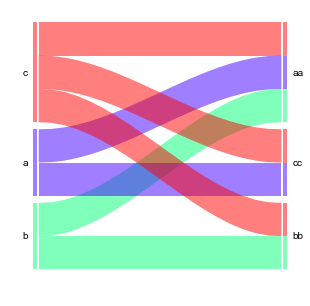

In [225]:
ax = alluvial.plot(input_data)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.show()

In [205]:
# Generating the input_data:
seed=7
np.random.seed(seed)
def rand_letter(num): return chr(ord('A')+int(num*np.random.rand()))

input_data = [[rand_letter(15), rand_letter(5)*2] for _ in range(50)]
input_data

[['B', 'DD'],
 ['G', 'DD'],
 ['O', 'CC'],
 ['H', 'AA'],
 ['E', 'CC'],
 ['K', 'EE'],
 ['F', 'AA'],
 ['E', 'EE'],
 ['D', 'CC'],
 ['N', 'AA'],
 ['J', 'EE'],
 ['D', 'CC'],
 ['N', 'AA'],
 ['H', 'DD'],
 ['K', 'CC'],
 ['D', 'CC'],
 ['F', 'CC'],
 ['F', 'EE'],
 ['L', 'BB'],
 ['I', 'BB'],
 ['G', 'BB'],
 ['J', 'BB'],
 ['G', 'DD'],
 ['G', 'EE'],
 ['C', 'DD'],
 ['G', 'CC'],
 ['J', 'CC'],
 ['G', 'AA'],
 ['B', 'DD'],
 ['H', 'DD'],
 ['O', 'DD'],
 ['A', 'BB'],
 ['I', 'BB'],
 ['O', 'EE'],
 ['M', 'CC'],
 ['M', 'AA'],
 ['E', 'CC'],
 ['L', 'CC'],
 ['C', 'BB'],
 ['E', 'BB'],
 ['C', 'CC'],
 ['G', 'DD'],
 ['L', 'CC'],
 ['G', 'DD'],
 ['N', 'DD'],
 ['M', 'EE'],
 ['A', 'EE'],
 ['E', 'CC'],
 ['L', 'DD'],
 ['C', 'DD']]

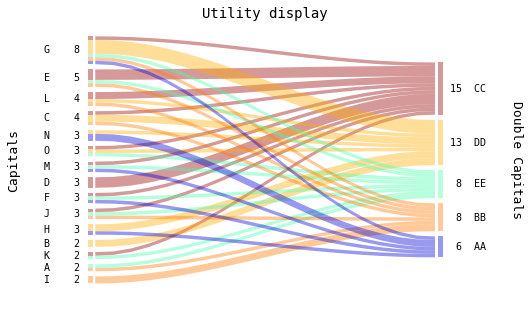

In [206]:
# Plotting:
cmap = matplotlib.cm.get_cmap('jet')
ax = alluvial.plot(
    input_data,  alpha=0.4, color_side=1, rand_seed=seed, figsize=(7,5),
    disp_width=True, wdisp_sep=' '*2, cmap=cmap, fontname='Monospace',
    labels=('Capitals', 'Double Capitals'), label_shift=2)
ax.set_title('Utility display', fontsize=14, fontname='Monospace')
plt.show()

[Bunch(text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000029A85AD0B38>, <matplotlib.text.Text object at 0x0000029A85AD0FD0>], patch=Poly((-0.25, 0.5) ...), tips=[[0.16954982 0.        ]
  [0.6947228  0.        ]], flows=[ 1 -1], angles=[0, 0])]

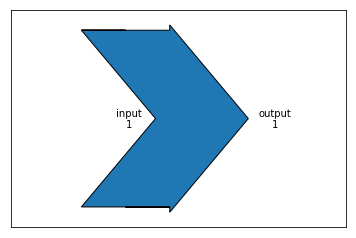

In [221]:
sankey = Sankey()
sankey.add(flows=[1, -1],
       labels=['input', 'output'])
sankey.finish()

In [17]:
history_graph1 = history_df[['fighter1', 'fighter2', 'event_name', 'event_date']].copy()
history_graph1.columns = ['source', 'target', 'type', 'date']
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
8                   Jay Hieron              Jason High   
9                   Jay Hieron              Jason High   
10    Antonio Rogerio Nogueira    Vladimir Matyushenko   
11                Josh Barnett            Gilbert Yvel   
12           Fedor Emelianenko         Andrei Arlovski   
13                Josh Barnett            Gilbert Yvel   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
16    Antonio Rogerio Nogueira    Vladimir Matyushenko   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
21                 Jens Pulver           Joe Stevenson   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
24              Anderson Silva            Jorge Rivera   
25              Anderson Silva            Jorge Rivera   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
...                        ...                     ...   
9781            Eddie Wineland               Ken Stone   
9782              Shane Roller            Jamie Varner   
9783             Ricardo Lamas          Iuri Alcantara   
9784             Chris Cariaso             Renan Barao   
9785            Donald Cerrone         Chris Horodecki   
9786          Benson Henderson          Anthony Pettis   
9787            Eddie Wineland               Ken Stone   
9788             Tiequan Zhang            Danny Downes   
9789          Gilbert Melendez           Jeff Hougland   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9792          Gilbert Melendez           Jeff Hougland   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9795               Chris Leben              Mike Swick   
9796               Chris Leben              Mike Swick   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9802               Frank Trigg          Dennis Hallman   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9809               Mike Russow           Roman Zentsov   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  
0                  2H2H - Pride & Honor  
1                                 AFC 1  
2                   Affliction - Banned  
3                   Affliction - Banned  
4                   Affliction - Banned  
5                   Affliction - Banned  
6                   Affliction - Banned  
7                   Affliction - Banned  
8         Affliction - Day of Reckoning  
9      

In [156]:
history_graph2 = history_df[['fighter1', 'fighter2', 'event_name']].copy()
history_graph2.columns = ['source', 'target', 'type']
history_graph2

source  \
0                                                 UFC   
1                 UFC Sweden 2013 Live from Stockholm   
2                                           UFC® Live   
3                                            UFC® 138   
0               UFC Fight Night Boetsch vs. Henderson   
1                UFC Fight Night Miocic vs. Maldonado   
0               UFC Fight Night Henderson vs Masvidal   
1                     UFC Fight Night Hunt vs. Nelson   
2                                            UFC® 144   
3                                            UFC® 133   
4                                            UFC® 120   
5                                            UFC® 116   
6                                            UFC® 100   
7                                             DREAM 6   
8                                             DREAM 5   
9                    Yarrenoka! - New Year's Eve 2007   
10                              K-1 Hero's Korea 2007   
11                                K-1 Dynamite!! 2006   
12                                       K-1 Hero's 7   
13                                       K-1 Hero's 7   
14                                       K-1 Hero's 6   
15                                       K-1 Hero's 5   
16                                       K-1 Hero's 4   
17                                   K-1 Hero's Seoul   
18             K-1 World MAX 2005 Champions Challenge   
19                                       K-1 Hero's 2   
20                                       K-1 Hero's 1   
21                                K-1 Dynamite!! 2004   
0                      UFC on FOX 8 Live from Seattle   
1                                                UFC®   
..                                                ...   
3               UFC Fight Night Lewis vs Abdurakhimov   
0                   UFC Fight Night Cowboy vs Edwards   
1                    UFC Fight Night Werdum vs Tybura   
0                        UFC 217 Bisping vs St-Pierre   
1                     UFC Fight Night Lewis vs Browne   
0                                     UFC Fight Night   
1                    UFC Fight Night Santos vs Anders   
2                         UFC 224 Nunes vs Pennington   
3                  UFC Fight Night Machida vs Brunson   
4                 UFC Fight Night Weidman vs Gastelum   
5                   UFC Fight Night Lineker vs Dodson   
6                  UFC Fight Night Teixeira vs. Evans   
7                    UFC Fight Night Condit vs. Alves   
0                     UFC Fight Night Shogun vs Smith   
0                                          UFC® Macao   
1                                            UFC® 144   
2                                            UFC® 136   
3                                            UFC® 127   
4                                              WEC 53   
5                                              WEC 51   
0                                     UFC Fight Night   
1                    UFC 227 Dillashaw vs Garbrandt 2   
0                                             UFC 232   
1                UFC Fight Night Dos Santos vs Ivanov   
2                        UFC 222 Cyborg vs Kunitskaya   
3                               UFC 200 Tate vs Nunes   
4                          UFC 184 Rousey vs. Zingano   
5                         UFC 178 Johnson vs. Cariaso   
6   The Ultimate Fighter 17 Finale Live from Las V...   
0     The Ultimate Fighter Finale Tavares vs Adesanya   

                       target  
0                 Papy  Abedi  
1                Besam Yousef  
2                  James Head  
3                 Papy  Abedi  
0                Jake Collier  
1                Wagner Silva  
0                Alberto Mina  
1               Amir Sadollah  
2                Jake Shields  
3           Yoshihiro Akiyama  
4           Yoshihiro Akiyama  
5           Yoshihiro Akiyama  
6                Alan Belcher  
7            Masanori Tonooka  
8           Katsuyori Shibata  


In [158]:
history_graph = pd.concat([history_graph1, history_graph2])

history_graph

source  \
0                                       Dylan Andrews   
1                                         Papy  Abedi   
2                                         Papy  Abedi   
3                                        Thiago Alves   
0                                       Ricardo Abreu   
1                                       Ricardo Abreu   
0                                   Yoshihiro Akiyama   
1                                   Yoshihiro Akiyama   
2                                   Yoshihiro Akiyama   
3                                       Vitor Belfort   
4                                     Michael Bisping   
5                                         Chris Leben   
6                                   Yoshihiro Akiyama   
7                                   Yoshihiro Akiyama   
8                                   Yoshihiro Akiyama   
9                                   Yoshihiro Akiyama   
10                                  Yoshihiro Akiyama   
11                                  Yoshihiro Akiyama   
12                                  Yoshihiro Akiyama   
13                                  Yoshihiro Akiyama   
14                                  Yoshihiro Akiyama   
15                                  Yoshihiro Akiyama   
16                                  Yoshihiro Akiyama   
17                                  Yoshihiro Akiyama   
18                                  Yoshihiro Akiyama   
19                                  Yoshihiro Akiyama   
20                                    Jerome LeBanner   
21                                  Yoshihiro Akiyama   
0                                         John Albert   
1                                     Scott Jorgensen   
..                                                ...   
3               UFC Fight Night Lewis vs Abdurakhimov   
0                   UFC Fight Night Cowboy vs Edwards   
1                    UFC Fight Night Werdum vs Tybura   
0                        UFC 217 Bisping vs St-Pierre   
1                     UFC Fight Night Lewis vs Browne   
0                                     UFC Fight Night   
1                    UFC Fight Night Santos vs Anders   
2                         UFC 224 Nunes vs Pennington   
3                  UFC Fight Night Machida vs Brunson   
4                 UFC Fight Night Weidman vs Gastelum   
5                   UFC Fight Night Lineker vs Dodson   
6                  UFC Fight Night Teixeira vs. Evans   
7                    UFC Fight Night Condit vs. Alves   
0                     UFC Fight Night Shogun vs Smith   
0                                          UFC® Macao   
1                                            UFC® 144   
2                                            UFC® 136   
3                                            UFC® 127   
4                                              WEC 53   
5                                              WEC 51   
0                                     UFC Fight Night   
1                    UFC 227 Dillashaw vs Garbrandt 2   
0                                             UFC 232   
1                UFC Fight Night Dos Santos vs Ivanov   
2                        UFC 222 Cyborg vs Kunitskaya   
3                               UFC 200 Tate vs Nunes   
4                          UFC 184 Rousey vs. Zingano   
5                         UFC 178 Johnson vs. Cariaso   
6   The Ultimate Fighter 17 Finale Live from Las V...   
0     The Ultimate Fighter Finale Tavares vs Adesanya   

                                    target  
0                                      UFC  
1      UFC Sweden 2013 Live from Stockholm  
2                                UFC® Live  
3                                 UFC® 138  
0    UFC Fight Night Boetsch vs. Henderson  
1     UFC Fight Night Miocic vs. Maldonado  
0    UFC Fight Night Henderson vs Masvidal  
1          UFC Fight Night Hunt vs. Nelson  
2                                 UFC® 144  
3                                 UFC® 133  
4                

In [159]:
from ipysankeywidget import SankeyWidget


SankeyWidget(links=[{'target': 'UFC', 'source': 'Dylan Andrews'}, {'target': 'UFC Sweden 2013 Live from Stockh…

In [18]:
history_graph1['value'] = 1
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
8                   Jay Hieron              Jason High   
9                   Jay Hieron              Jason High   
10    Antonio Rogerio Nogueira    Vladimir Matyushenko   
11                Josh Barnett            Gilbert Yvel   
12           Fedor Emelianenko         Andrei Arlovski   
13                Josh Barnett            Gilbert Yvel   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
16    Antonio Rogerio Nogueira    Vladimir Matyushenko   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
21                 Jens Pulver           Joe Stevenson   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
24              Anderson Silva            Jorge Rivera   
25              Anderson Silva            Jorge Rivera   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
...                        ...                     ...   
9781            Eddie Wineland               Ken Stone   
9782              Shane Roller            Jamie Varner   
9783             Ricardo Lamas          Iuri Alcantara   
9784             Chris Cariaso             Renan Barao   
9785            Donald Cerrone         Chris Horodecki   
9786          Benson Henderson          Anthony Pettis   
9787            Eddie Wineland               Ken Stone   
9788             Tiequan Zhang            Danny Downes   
9789          Gilbert Melendez           Jeff Hougland   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9792          Gilbert Melendez           Jeff Hougland   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9795               Chris Leben              Mike Swick   
9796               Chris Leben              Mike Swick   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9802               Frank Trigg          Dennis Hallman   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9809               Mike Russow           Roman Zentsov   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  value  
0                  2H2H - Pride & Honor      1  
1                                 AFC 1      1  
2                   Affliction - Banned      1  
3                   Affliction - Banned      1  
4                   Affliction - Banned      1  
5                   Affliction - Banned      1  
6                   Affliction - Banned      1  
7                   Affliction - Ba

In [163]:
SankeyWidget(links=history_graph1.to_dict('records'))

SankeyWidget(links=[{'type': 'UFC', 'target': 'Papy  Abedi', 'source': 'Dylan Andrews', 'value': 1}, {'type': …

In [ ]:
history_graph1.drop_duplicates(subset=['source', 'target', 'type', 'value'], keep=False, inplace = True)
history_graph1.sort_values(by=['type'], inplace=True)

In [30]:
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
12           Fedor Emelianenko         Andrei Arlovski   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
21                 Jens Pulver           Joe Stevenson   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
31             Michael Bisping            Miika Mehmet   
32             Michael Bisping           Jakob Lovstad   
33             Michael Bisping            Ross Pointon   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
30              Anderson Silva              Lee Murray   
34              Gegard Mousasi       Tsuyoshi Kurihara   
35            Katsunori Kikuno        Daisuke Nakamura   
36            Tatsuya Kawajiri            Drew Fickett   
37               Eiji Mitsuoka          Bruno Carvalho   
...                        ...                     ...   
9738               Chad George        Antonio Banuelos   
9739                Mike Brown           Cole Province   
9762                 Erik Koch        Francisco Rivera   
9769      Zachary Micklewright          Dustin Poirier   
9766          Joseph Benavidez         Wagnney Fabiano   
9765          Raphael Assuncao                LC Davis   
9757              Yves Jabouin          Brandon Visher   
9760          Anthony Njokuani        Edward Faaloloto   
9758             Clint Godfrey        Michael McDonald   
9775             Dominick Cruz         Scott Jorgensen   
9772            Danny Castillo               Will Kerr   
9783             Ricardo Lamas          Iuri Alcantara   
9785            Donald Cerrone         Chris Horodecki   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9809               Mike Russow           Roman Zentsov   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  value  
0                  2H2H - Pride & Honor      1  
1                                 AFC 1      1  
2                   Affliction - Banned      1  
3                   Affliction - Banned      1  
4                   Affliction - Banned      1  
5                   Affliction - Banned      1  
6                   Affliction - Banned      1  
7                   Affliction - Ba

In [ ]:
SankeyWidget(links=history_graph1.to_dict('records'))

In [89]:
import plotly

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json?pretty'
response = requests.get(url)
data = json.loads(json.dumps(response.json(), sort_keys=True, indent=2))

In [90]:
plotly.tools.set_credentials_file(username='mdarwish', api_key='kdPsnfrHUoU6X2nPwS5S')
print(data)

{'data': [{'node': {'thickness': 15, 'line': {'color': 'black', 'width': 0.5}, 'color': ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)', 'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)', 'rgba(23, 190, 207, 0.8)', 'rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)', 'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)', 'rgba(23, 190, 207, 0.8)', 'rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)', 'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)', 'rgba(23, 190, 207, 0.8)', 'rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.

In [91]:
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))

layout =  dict(
    title = "Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False, filename='Sankey.jpg', fileopt='new')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mdarwish/0 or inside your plot.ly account where it is named 'Sankey.jpg'
